# Fourier Series II

We saw in our previous notebook that we can express most any function/signal/data via

$$
  c_n(t) = \cos(2n\pi t/T) \hskip 0.25in\hbox{and}\hskip 0.25in s_n(t) = \sin(2n\pi t/T)
$$

We explore this week a more economical way to work and compute. It exploits Euler's Formula

$$
  e_n(t) \equiv \exp(2\pi j n t/T) = \cos(2\pi n t/T) + j\sin(2\pi n t/T) = c_n(t)+js_n(t)
$$

and the two sided Fourier Series

$$
  \boxed{f(t) = \sum_{n=-N}^N u_n e_n(t)} \tag{FSe}
$$

As in our prior work we obtain the Fourier Weights, $u_n$, by multiplication across (FSe) followed by integration over the time interval, $[0,T]$.

In particular, on multiplying each side by $e_m(t)$ and integrating we find

$$
  \int_0^T f(t)e_m(t)\,dt = \sum_{n=-N}^N u_n \int_0^T e_m(t)e_n(t)\,dt
$$

and so we must evaluate

$$
  \int_0^T e_m(t)e_n(t)\,dt = \int_0^T \exp(2m\pi jt/T)\exp(2n\pi jt/T)\,dt = 
    \int_0^T\exp(2(m+n)\pi jt/T)\,dt
$$

This divides into two easy cases. If **m+n=0** then

$$
  \int_0^T e_m(t)e_n(t)\,dt = \int_0^T\,dt = T
$$

**else**

$$
  \eqalign{
  \int_0^T e_m(t)e_n(t)\,dt &= \int_0^T\exp(2(m+n)\pi jt/T)\,dt \\
  &= \int_0^T \left(\frac{\exp(2(m+n)\pi jt/T)}{2(m+n)\pi j/T}\right)'\,dt \\
  &= \frac{\exp(2(m+n)\pi j) - 1 }{2(m+n)\pi j/T} = 0 }
$$

As such, we arrive at the lovely

$$
  \boxed{u_n = \frac{1}{T}\int_0^T f(t)e_{-n}(t)\,dt}
$$

Not only is this much more compact than our expressions for the $a_n$ and $b_n$ weights it also leads to a significant speed-up in computation, a speed-up that has permitted analysis of long complicated time-series as well as images, e.g., in brain imaging.

This accelerated version is called the **Fast Fourier Transform** or **fft** for short.

Let us put this to work on our old friend

$$
  f(t) = \sin(40\pi t/T) - 3\cos(60\pi t/T) + 2\cos(80\pi t/T)
$$
  

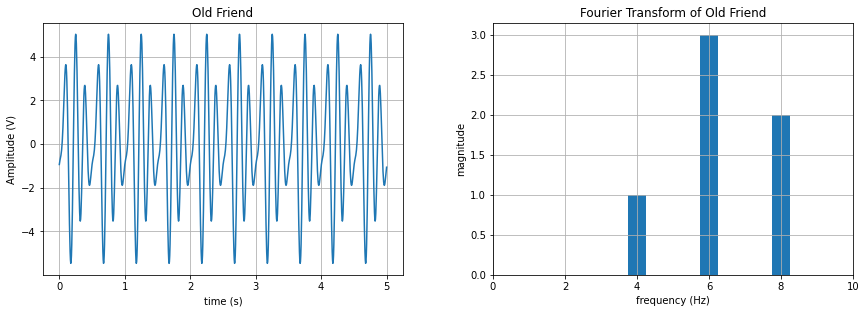

In [2]:
# fftpack example

import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

T = 5
Nt = 1000
dt = T/Nt
t = np.arange(dt/2,T,dt)
f = np.sin(40*np.pi*t/T) - 3*np.cos(60*np.pi*t/T) + 2*np.cos(80*np.pi*t/T) # old friend

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

ax1.plot(t, f)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Amplitude (V)')
ax1.grid('on')
ax1.set_title('Old Friend')

freq = fftpack.fftfreq(Nt, dt)
u = fftpack.fft(f)
pinds = np.where(freq > 0)  # it is enough to view fft at positive frequencies
pfreq = freq[pinds]
umag = abs(u)[pinds]*2/Nt   # this extra scale factor (2/Nt) stems from fft implementation

ax2.bar(pfreq, umag, width=0.5)
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('magnitude')
ax2.set_xlim([0,10])
ax2.grid('on')
ax2.set_title('Fourier Transform of Old Friend');

Let us now see how to use the fftpack on real data.

To begin we illustrate how to record and analyze sound files in <a href="https://www.audacityteam.org/download/"> Audacity </a>. Please download and install it now.

The figure below depicts a typical
Audacity session with an acoustic guitar. In the left window, we have

1. selected Mono recording
2. hit the record button (red disk), pluck the string, hit the black square
3. select the active part of the signal (lightened window)
4. under File select Export as WAV and save it to a name and place you can find
5. next, under Analyze select Plot Spectrum and achieve the the window on the right.

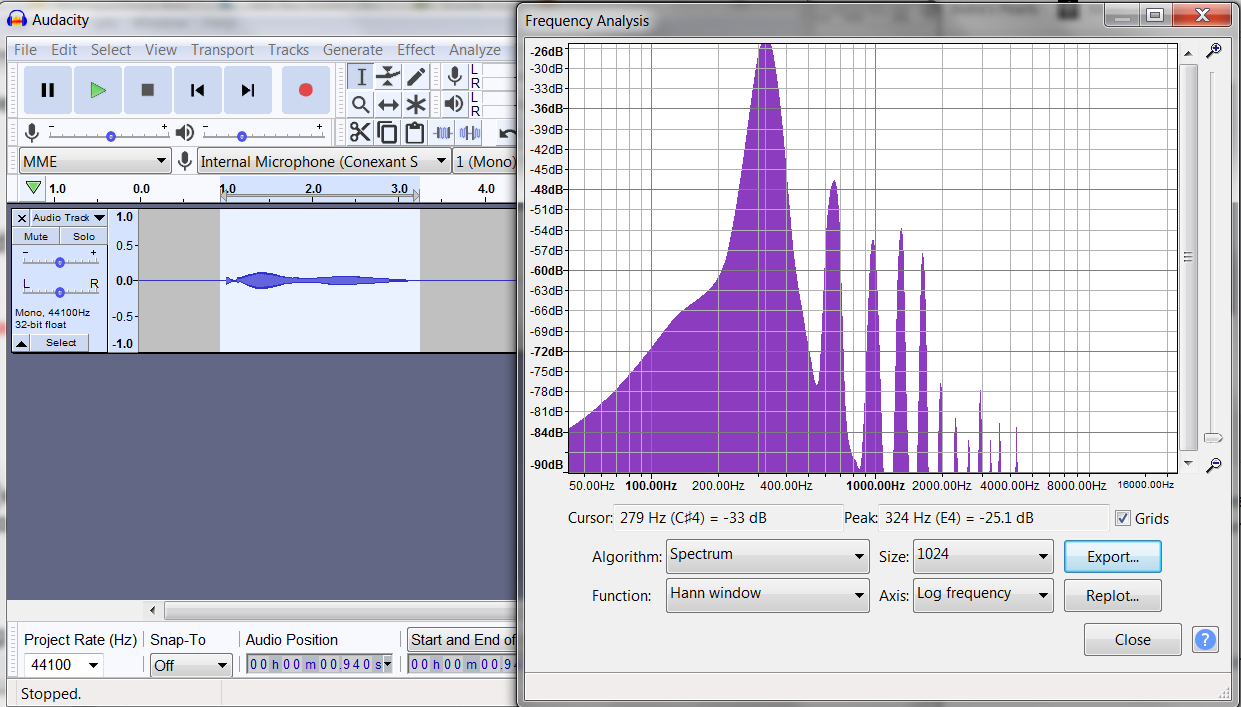

In [3]:
# used https://www.base64-image.de/ to code my image
# copy code into data slot below, remove leading data:image/png;base64,

from IPython import display 
from base64 import b64decode

base64_data = "iVBORw0KGgoAAAANSUhEUgAABNkAAALDCAIAAACn10F3AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7L0HvB7Vfed9ySbvJp/dfd/1Jo4Td68bptlJ7N3NxoXeJFENjo3BYJsiQEhCQiDUJQRCqPeu23vvvffee7/qQiBwYjuOnby/3/9/zsw85V7dK4GzbO6PH49mzpw5c+bMmfvM9/mfmQnp6elpbW2tq6srLy8vLi4uLCzMy8vLtcrJyTFTAcKinJxsdXZ2VnZWRnZWenZWSlZmQlZ6dFZaaFbK4azk/VnJe7KSdmYmbstM2GK9NTNxe1bSrqzkfVnJB7NSj2alR2Slx2ZnJmVnpbGQ7EwWyFJVmZmZGRnpVFpaalpqalpamsxRGRCWZ2aavB+kpFyKG/HKSdLtm6qweqhdampKSkoynCzGhygpOQlKpBISEuLj4+Oo+HjMJCQkJmKZyYi1WYCvgiZOJm5IJJtKwJZiY2MCFBsTGxsrVdA6QFo3VSLnfGQKtTIbm1yoMBrD72Ch6UzrWuE4IyktIyspLSMhJS0qIeVYTOL+iLgdx6K3H43C567jMXtCYw5GxiE9MiElISU9OT0zLSMzgyVhbXZBlemaIpPEbsR+pIcRddBjJI053fbU1ueRNfvCg24Pu6c8jzS/s+8++y1VmkSSQbuXKdq/XFO0FWtmZfKIzEHyyCyYrkyBUjDFNOm/6Bvae00/ciX9yXQn9BauITIleKsNYe+mL23GAJmlqtQ0bAGbS0pMQh1iYuIio2JCI6KOhUYeOR528FjYAfh4OB0acTAs8nB49NHImONRsWExCZHxiTEJyfHJKYnJqckoByWbLRjJkdAGRlPK6cC91DOXqWb3UA2zxlQy9bW9RkvU8sy5aJuPpU5aphSCYtgBg4nL7bo6jUTdJjaJrehBjIyMDAsLO3r02KFDh/bu3bt9+/bNmzdv3Lhx/fr1a9asWbly5YoVK1599dXly5e/8srLrpa9tOylJcuWLF62+IWXFs5f8tzPXnz6x4t/9vDCn9y34JE58//+9qe/f/PP7v/uY/O+/cO7//dDt/+vB2/7n9+//X89fMff/v2d//uRud99/IHbnvz7uc/+5MGFP/vR4meeWLLg6ZcWL2BpS5ew2JdeWob/RUs9MklWko0yVRK9EiCzwEevBMn3yivYQ/XksusHFZrIa7e8gCJNMcte1h2wMsmB5aP1L0tmdZEpWjdEmwTv1sxqVjjujtANPgyhZGwIm0aNcEyXLFmyePHihQsXLljwwnPPPf/ss88988z8p59+5mnoGUzOn4+k5xe8sHAhsqFLcF+k2qY4j1hp7oTumW83YAKXUb67ZhI9krUnk8kztUxeEc6pb3zjG48++uiTTz65YMEC7C+qg7MM6evWrduwYcNrs7oyOW2IA/vYTx6/e868O+6ac+ddc+6ee8/jT/xs7bp1+BO3Z8+effv2HT58+NixY/jrFxERERUVFR0dje8wFa/OZvUBKcSjq0TOtE6o/sN/+A9myiNTxKz+rxAuD3Gtg4sQXOHiKh3IWVVVVV9f39LSEtLZ1VVSUoIcP5iBHqYf9uqhhx/+/sMPPfjwQw88/ND9D3//3oe/P++hB+c+9ODdDz1w10MP3PnQA7db3/bQ/bfJxB2SftdDD85Bzoe/f8/D37+P67IElIPSvv+Q+vtWD4oeeAD204MP6DJ/ff9BrGXWnoHM2o6CbHEq3R+g++6/L0D33mscKOQPrmDlXFL3qu6ZQiaLo/uC1Qr1cmT2dBKZZrMyrWr1kJU5wN9/CDkeePD79z3w4L33PzDvvgfm3Hv/3ffcd+fce2+few89Rzz3njvn3Yt0LEUe5LzvAa71IDoICzMdMYh0WyKtj1YSO2F2BmLDOnbFBY50NZGWY0ty5C2R4jasnC6qNbmUTGazskco0dh/a5Sp9wxkVqTMFiaVZDKraT8x3cdHusTtQbKWb+Fm54zMHl+msDrKYPtKq2Bz2DJqMfeee+bMnXf33Ll33j33jrvn3H7X3be5nnM7UpA+Z+6dc+fdNe+eOch/733z7rv/HnYrmEfLMaUVp8z+uE1t5kUmz9QyeSFTgiPTdh5pPrOiSOtD6U7PRFoaisVWcKjmzZs3d+7cOXPm3HXXXXfcccett9564403fuc73/nbv/3b//E//sc3v/nNv/7rv/6rv/orXDpDX6du+PoNtOj6G66/7obrrr3h2muuv/Zr133tq9de/aVrv/rFa778ha996XNX//fPfPULn/7y5z/5pc/95Zc++xdf/Mxf/PfPfAKfX8T0Z//yS5/75Jc//+mv/vfPXv2lz3/ty//9mq9+6dqrv3LdNVejnOtRGspEydej/BmI+T96Qp19dtMkz0RyXAJkFroyG5hSJquPTHkfnsx2bA2vu+66a0XXiL4muvpqGJIJTZKlkhFrcEVTisgUPUkrzLSr8CAF6Yxm6TSFFXTXnJ0ScW90R3Q3kBP1xun2V3+Fk0/1N1PJ5PGVu66fzEozkFnxkjLZfYU/IR+uzHakmthp/TOlrY0WRbuiddFnvvrVq7/61a9+5atf/eKXvnLt9V+/8667Fy5c+PLLL69evXr9+vUbN2584403Nm/e/NZbb22Z1Ycgg5WTCEft7rvvxinwB3/wB350CpkiZvV/hbZu3bp9+/bdu3cfOHAgNDQUdAooLSwsrKysDDl69Cjg8kc/+lFOTs77l6n36Pcuvv/eu++/9w783sW337t47r13z7737pn33j118Z2TF985QV+YcM0UpGPp6Yvvnrn47rmL756/+O7bFy9euHjxnYsX33X9LvSO1QVXb1MX3jZzjt65YLJevkxJjmRDkwlVCKrz9HlH586f8+jsWfjsmTP4oM54dDZYop9OX1qnTp9SnRSdOHnCVxMTZmJ60lJOmjKnktm+r0y9gwnLTp0+c+LU6YlTp8ZPnBqdODk8fmJwbGJgdLx/xOPRicHxEyMTp8ZOIOeZk2fOnkYbnnv7HBqZvcA57O++ww7DT5Mg4oHSw4JDYY4BD4GKrT6ZnONhVqP0kIowbRIpk9WVSRfpCuwY05Hm9uk1wWW2ZGWqbWUOgFdO15hSzOiVHH/tDBOi8UmlyzUvJGuaUiCtxFRdQmX2Z3KZfBTKQ8EoHBvCFscnToyOjw+Pjg2NjA4Oj/YPDfcNDvfCQ+qRPiQOjw5g6ej40Nj4yPiJ0RMnx0+emjh1+sTpM6ekV1o529F6606IfHbLSnP5yywMbHppHJE2FmTm3cJZgKnDpXUa9QwwPiiUifJxhEZHR4eGhvr7+7u7u9va2hobG6urq7OysiKjovbs2YPrsxdeeOEvL6G/+Mu/oP/iLz5Bf+LP4U/8+cfpj//Zn3/8T//8z+D/9nH4T+GPWess0iUDc/6ZrMXV/+ITUhT9wQh1VNt/Z/WB6JN/+ckrlSkpQObIeYRO8Ql/mUWOzMr/B8tUdHKZfCLTRh9VferD0KcDZBZ4ZLbv6V3atqbXiP5c/5F0ZEBmrIjSPvOZz3xW9Dk/aWqAzNIg+mzQVczCK5cp77OfRY1dmTSVyTltmdX8ZZYafX66Ql6sjDqhVdHCaOw/+7M/+9M//dOPfexj//W//tf/1+r/m0TOUuTHWh//+MdRAsrBYUKZbF6vtKYzkFlPZdL8ZZZepkwhXpklH5bMViaV9BDfLiIyq1+RzEGfqZ5//vk1a9bs378/OjoaOFpcXBxy99135+bm4poXlym4QJmmxsbEoyOj6pGh0ZH+keHekaHukcHO4YHW4f7G4b7a4d6q4Z6Koe6Soa7Cwa4C4878wU58Fg10lQx2lQ12Vw721g71NQz1tQz2tQ32dwz2dw0O9A4O9A309/b39fb1Qj09uGjq6uzsELWLcA0lam/DtCY5C/GP5LTCip0dWL1zOjLrSEF2K62Y0OlWH3lmW+gWqLmlWdVk3NTYhKu9xobGBrqhvr6hrq6uthamamrgmupqfECcFtXWVCNRVEVXOaqsqqysrKioKPcIsxQWYBFmxeXlZWVlpSUlONBFRUWFRYVQgSrfyMwWFnAZPs08JSmyElZGESUlJaUqlFrmblQro5LtG5nainQ/zJ6JMFNVTVdWV5dVVhWVVeSXVuQUlaXnFyfmFMZm5Eek5hxPzj6ezM9jyTlhqXnRmQUJucWphWXZJVUFFTWlNQ3VDU31za3Nbe2tPLxd6CPdPSr0GIopXeg3nTySOD4tzU1NPBb19fVyCEzjX1I8TlgBq+EQNjaiECtzaHlUbZHGslZdbR2SZT0ce7OqdA72FNNz2I2kb2nvkj7E7iNVxYpSuL9QKrZHuR1JpG0NoadYmcMD4aBJ19AjWF7GCR5PM287khWziHDY0ZHYjQrZeXQkvw6CzuLYYjGHGSMNS7Bcepf0Huk80m90A6hQ8E7BhvOT2cdgkuVYQ3a1CuWi+OKS0vzCoqzc/LSsnMS0zNhkDvoOi008GpNwmE6kY5OOxKccT0oLT8mISs+Ky8pJyslPzy/KLirNLy0vqqgsraqpqKmtqqmtdo6mbMOcdbY1jErNaaHtZJrRR2aJrKb5ZELW1nNT2pWyZ53njEOJTpvh74D5S4FPMcV0iH8X3ENeKScjPsQoAdIto2RsAkcIRwtfAykpKbFxcaFhYVu2bl2xcuXChQtxffaFL3xh586db7/9tvyw4+idd/ljT6AuvMMfAeG35ce58+q3z59zfe6szyxtsl3gL32wU8gFFjg9yc+B/tK1zczvV/o70vSFb179/ABlfqMKkPkJ58OR+SXksqQ/lHhlfoSZrsxa/4fLVHYSmUwi0y6XJ6wtPz+pTYlGsuTKZKobTLpUs01Hutb0NcUq8tsddSLYD6ZjY7CvJF1/MT15kiWj5dCNcZroSTSjc9I5l/2k552ZuZRMZv3HI+9SSs+3yc84s3j6MusFkckAmW2LtEIi3XFH3r+BWIq8KARHB40sR2FM8WFkBNRA6aFQaQavcHRwQLE6CkFRKBN/1c0XkY/4117FryevfOYu/tM//dPjjz/+29+Ldu/ebaY+NO1/4Ukz9RHRI3fc8pvf/ObixYv79u378pe/DCJdsmTJ9u3bw8PD09LSQnDliCONznG5Gh4ZGRoZGRwZ7h8Z6hke7B4eaB/ubyFb9tYN9VYNkUVLh7oLgaMDdMFAV/4AWLSraLCrdKBbWLSnbrC3Yai/eagfLNpJFu3vMSBKAyxIFEQKIqIwoblkN2oVDhTpJT3kAOoMxPUsXtqSRUAHAYgAuckWTAx2eg0MEXow/KAUKhSE62heUvJK0hGuOeVSXS4oPRQBKWDy6paWy1laxWtcXmvK/2JIL3eFIBRAPXcDgxjADMSGvHyQA+GBjKEpEOcdWLVM4VwhQ1oXUzV30kjrD+m+cJcg9+K5GkkVlVXllVWl5ZWFpeW5xWVZBSWpeUXxWflRabmhyVlHEzPhwwn00aSs8NTcmMyCxNyStMKy3NKqooqa8tqGmobmhqbW5lYc7Q7+1IB+0tUtVMouwz7TyV8VeEB5jIh2ijH2et69kg+wXNybKvP6H8KKOIjCh6p64UQpEouZU/aNJVIOPIBoAI0QcmMlQVqIvcbAqUoTuEhKl6KVulTabaQulO6C81OFNrjDHqbDSG8hdrocRGnn0cMp4iF1DqvKLGEufxAFdZqbW3l/q7HcFgsozcn2JVIHSLV8VA3V1DobJnWlDebK7HmAZCHyowjuanlFSWlZYVFxbn5BRnZucnpmXEpaVGJKWFzi0ai4g1Gx++HIODoq/mBs4pH45OOJxNHojKyErNyU3MLMguKcYuJoCXpldXUlfyepqbKbsBwqjeEQpAgzSJAdDCqeNSKTvwj5+Y9gp5xecqrJyadNJqcdzzmshALQbDyaIrabx3qwff9MSGPo8bPS446isFkUjWOD45Senp6UlBQbGxcWFr5v3/6VK1c9v2DBxz72sT179gwNDSEnMJU3ruIfuQNeb5gVJSUnJSYnJiQlxicmxCXGxybERcfHRMZFh8dGhsZEHIsOOxJ5/FDEsYMRRw+EHdkfenhf6OG98kkjJfzowYjjhyNDj0SHH4vBKlHhsdGRcTHR8bEx8XGxCfFxvCk5nreX+EhvOpmGsFO850ts7gCbufQ2aBGmORsdTcfgMyqaFkV5FBkZGWGFr1hHYaJQq+MeHfPo6NGjZurY8SOYER05wkl84B87feTw4cPeT9Uh0cGDBw+I9u/fj299aK8Ih3XP7j24SNol2uloh3xQZoL/QDab/Kv5d2FGJoxkLVfbt+/Yjk/rbbjQ2L6dn5qCpZgVbYW3bt2yBd7y1ltvbd781qZNb76xadMbotdff33jxo1y799r69dvWL9+/bp1+HcDjH9VelsgsiEzVtn0JrVZhAIDpEt8ZJZ8CELZuglUaZPslLNHcj+jj5CCJVjOvUArvPkmSnCGtGlz+QvpWCYtSJmtykbRBtISXqNUKVjTOe01NutYastPERa5wi5AsgtGukfOJ6R5ILOOlOUpENOmHOTVNbAqjGbw3CnrnWUeLVgL1AmWYJsUnWHt2rWrV69etWrVihUrly9f/vLLLy9d+tLixS8uWrRowQvujcdPPf30z5986qmnnp4//9nnnn9+4cJFS5cuXblyJToTDhk6ME4RnDg4o/QsO3Lo8OGDPKMO7MfpdGDf3v379u7bvw8nFnLhPNMTznP2IQ15kcOcdnv01JOzkKuZNXly8vSEdBHEYvGBvHvNCYv1ZFWupDl59uKsw3m0dSsOtpwwaFQ5sJtwaHn8pe/wzIJwmukZaHuNI9NruIL2F5ZgDhDKxJyeHygDZy7O+t17sC9Sz/37uZeHDqF50Er8U3X8uP5Z0z96mEU6GgSNicJxaF566aUXXnjh2WefRdM/8cQTAMKf/exnTz+NozAfic95hJRnnnkG2TCxePHiV199FQcX1UBR2BD+JCfxCQ2J+PZJ0UewJOoDUfjX2f7Rl28NfOK/uLiEOHxD4XsKmZMBt7fffsfp06cZ3ppEfR71Ww30D/hpcDLJUvAz+ifwV+Yos9RH+I41Gg4UEs1CHw3bvGfPnt3zzE/OtDYOxkfAIwlwODyeED5Bh50Wn00IO08fv5Bw/J2E4+8GcWhAio+xltovHX4nIfSdxNC36fDzieHnEsPPJIafTgw/QUeMJ0aMilE31PBUbcUPb/0eqo2rEVzhnjx5Ep3o4x//uOIoek4IlpmdDKIR1wKdYkkwwlqDw0Nw/9Bg79BA91B/19BAxxBZtHGwt26wuxqoOdAD4CwZ7CoWlwx0FQ10FQ8QRMsHu6sG4J76wd7Gwb6Wwf6Ogf7Ogf6ugf6efrAoPvt6+hjiEq7QuKhBRv8ApUdYojlUjGia2KmlU7OE8i/MsqeBApVgg5USZoCIDiKyCRnCcQMplPypJkvgYlspQi7GcSnN60leV2LCEp1cT/KSEteRRuRMc02JC1xe4/peB3svhiWTXATLRS8udw2G5lD4FGNWEiE7LcshTDrXxrw0hvwCNiJe6QaX2Q/umf4jn7qjjNaUV1SWweUVxWXlBcWlOUUlGfnFKTkF8Zl5Uak5oQDRhIwj8RmH6fQjCZlhKdlR6Xnx2YUpeSWZxRUFZVWl1XWVtQ21Dc2NzS0tre2tOLSMaEsIXGLgpr/wsPKA4ugo2TkQo9fzUjd1ECEDDxIpicLqypT8pMxBdUr0k2yDUMoCBEtZggmzQtprTC8y3UgWsGgtWcT1rYR2pfMoj5hdsAxiQ51G6DM4XqZHQKUONWFCLQfUkVkP0nl2omLpRQUF2ifQP7Kys0GeiqDp8hwvfTpVRmaWPKfJCZFq/1Ee1Q2x19imhbgfAeIOQmbnAyTNoAwue1+BQotLSgsKi3Ly8tOzspPSMmKTUyMTkkNjE45ExR6MjNlvDCiNOxCTcDgOLJoanpIenZ4VTxYtyGBotCSvpKwYvbKyqgLnJdtXNxEAotIa+HCEJCQHSIcjQJ5BB3aa1GkRlKeekSZIs2E9NBtaDceCp5Tvzz2ueNQhe+D5h8L8GqWSY81qo1RsAYcnLS0NnImv7IiISHwrvPXWFlwKfOpTn8K3Ps4U4ieff0TJY4+M0ulUWB6YlJyanJSanJiSlJCcEJeUEJsQG5UQExkfHR4XFRYbeTw6/CigNCr0cNTxQ0BTGBNRxw8zBYsijsdGhcVFhcfFRMVjxbgYMG0SykmM16sNa33sm4/k6VGu9IFPQRTvPA3KR8K1kLtQZ+2EiuuaSSvhXCMDrCIFVsgPTR2BUVVCqa7CBFP1Wg6fAqeucPmFiz3lU1zeQXr9Ry71yF4K6yeuh4PgKIRrW9KolRImZGGTEwKYFjhNsitvksnJlN27cIWsqVay1EcKq7isNf8STYmpeomM7odLX70slktihZY3yCrkjY1ET1cGURRLkNleOfMKWy7Cg0iWBZfJQb5zfPkSEqBQIWePDD6JBLEgUqgDorovyItVdE+0NKWIILKVlC0JjfqwqCPM0YqdfrMekxi1LXVWJ1Qy69kFaX0VdkP+4YfugkpX0QK0EVSkJ1OOtoZhUTF/ehAENbP4lGLZE2xhPrXSopBt/foNYJ5Vq1YDLJe/+urLL7+y9KWXXnxxyaJFi194YSGwE9BDyCGLPgkafZqPwXr2+ecXLFq8+JVXXsG6KA2NiY6K8wQnEU8q/APgBDyCv4CFu/fs3gXjzMFJhDMJZxNxETIYqeeYnmTmJODPOnJCYDWsz3XMmviPPwxJUfILkVlqZykCoNKsOXlZKE4cHHycL2gBtAyJnH5DWkllAZXNzi4h7W/+EWExpJnRgFhfG52SY4BWR4EoRNgWnXD7TuyB2V9hUQFxNBL+HDk4qj+3YRp/lLAUFcY216xZoywKvETbA0QdFsURAYuq8O2DT6QgHdkwsWjRouXLl69btw4VRltgQ/jrij/RwpbGwqEx+PMaFRmBv7L440vLX2H9uTAmKhqgGhdLQB0fH7/tttsAit0yfo6fErTwSEbTUUHQFOp3+TQATyGzpB+bQEO+8847XMODtL4ySAopgqksgppFwcTFZ86c2f3kY2ea6wejj8EDUUeHoo6ORMOHx6MPT0QfPhl9+HQMfS76kPoCHHP4g/X5mCNvx9LnY4+ciT1yOvbIqZgjJ2KOjMccGY05MhJ9bFiqB5+oLH34ZrIorkb0IgXtiW8ojY6iV4WMjo5Jm2DXxWgDaYnpCStgbbh/cAAs2jM40D040DHY1zbQ1zzY2zAIyOypGeytHuqpHOquGOqpGKTL5bNqsBeLaomsBNHWwYH2wYHOwUGU0DM4KGN0B3AYcTDRJdg7ZLAlUYNqd5iUqOkCZxAhJ81Ru0IqJtnKWd3AaGurBqgoS6EKCMGERT5LhSH8jMSGuloHR8miuJjGlTauthVVnItyTlRUmgtLysOivL4swzUlhatTQxG4vsSHlVlMKXs48RcTz4L0etdVnqFQAVFIKVVmdQWsx0tmE98KYFFLo1JVnXTlXCrbq2V7OY1PUChcChYtJYvmFhZn5hel5hQmZubFpOWGJ2cdT8w8nphxNDHjSELGscTM8JTsaLBoVkFKXnFWYVleaVVJZU1FTV11XUNdY3NTC3BUxrryqGr3ULfpjws4jgp42v4kGUKG2GVRx47kwBCOLBgpi7oiME7BoioGWnnIPaVIf2ConJ3G6T/mtwxvwRAxVqTdhvWBtPJ+IMoO42FR6TawB0fxqXDiTFsTW0gxIpbDBCEZHHb2IrCoExfNzgFwEkdpGxoFiJJFZbyu84OGsqihKm5CwcppXm0edaB0xwOlS+XooSwUitKVRTOycpy4aERc4vGY+CNRcYccYzYu6XhCSnhyWlRqZmxGVmJWblpuQVZBUU5RSX5pWZGyqOAoKwVJ85b7sWiAfHAUsyaZ5OmCqCOcUXJe2fPSnpoyJwtsq+mRkkazZ5RXTBbpcePhtuJhZYUhVkR+StCIaHJyMr6e8X2NCwlcKeEr/4EHHvjiF784PDwsBKoIiozmJwaGvPlBZeEIZ2bI7xBpGempGWkp6akpaSmJqckJKYlxKQkxyfFRSbGRCTERCdHh8QDOyFBrTIfFR4XHR0ckxkYmxUUnxcckY5Wk+JTkxNSUZDgNRcHAXT9ptXwFYharnIkPWBoL9kofK45Pa/PcceJsQoLGcw2zWhlaleCqfBpq9WNUG0cNd9BUL/XwoWiK6zyFUpGZIIaKcAkI6cXigQMHwaJ+OIqLYL0ChomRrnRaLrbNJ2dFzOnILDXTngUiWcuRZN7FWI4jpOJ/TOA6XcKkBkcF3rbg2ldhCtfSuBTGdTUusEksAi5WuHrmZbS54vbCm3Iag0GuNE3loU0xmY7+YMWamD16CxWU634DTkpzIkEugKjZn9eRy293THFBZbYRhEVRCMUWVCOFRmsxeGb81qZNSHGgdDNAGNZZk5kTRg67eHfAkewXJVmURLkKVmSVcEzd7TId+YR9aLKP643r7bSFIxTOEm1RFPdVysQW2ENefx358Rds9epgLLpw4fMLFoB19IHMIFGGRu1DmcFILy1bhhWxFygTvQUnBkFLzp8D+/cfAHvhpMH5shMcuNMG/YGENLsze7Tt9uzgJpMJR27dik/MMZnrMIesLCeAFMJ0EQrAeSWnxy6bWc8vPVulfBSMfot+hWYEz4Mb8Z/5WUPazdC8/kDAg8VsIv1HWhU5KRlhQKH1AOTUmrWYWr9uvR4CACmaBZ1x+/YdqArQGH9G0CryB+ag/s3B3x8HRyH8dUIilqK+ONZoW8DG888/jxYHgv5E9MQTTwA4FUe9euqpp5CupKrPlwLKohAUha0oiyYkxANC5U+tIVH+phcWyj+aYWH4A+r8MY0Mj4iMAKaSS2OiY8bGxm699daTJ092cezcFDJgCgmXWjD1J1MPmEIKKyJsAg154cIFXct3PZMd8kdSkXCVShYzKktrfsKWCCy684kfnmqs7Q09APcf3z9wfP9g6L6h0H3DofvGQveNh+09Ebb3lPhs+N5z9J63/b3XY79FxufD92BFfHoS916IoM/T+85F7j8Xsf9MxP7TEftPiCfCD4yGHxgJPzAcemAw9MCA1PBEaeFDN/6dsiiklypoqC9/+csPPvggTuoQ7iZ2UPZRbWXpNLgdcSUhUuIoMHKIMNkx2N821N861NcED/c1DvfXD/XVDdP1mBY3DPc3Dfe3DA/A7cMDnUODXUODPUNDfUOMsmqZcjDk5wYeREHSbm8v6gSdyjBMV5piHFRmKdfGBOUAKriltRXowuiooKgzZNI3NOqRxdHJDAGBYCFSGaZbC9fW1dASIDVBHmUZQ6dy/UvLpaYvYwgtOMZFqoEKOcSeC1GZcC5GZVig7x2hBc7QXCu9PsYFq/InwYNXxCb+gwJQkIsTem3sQAWss0hwLpmdFN9pBkUxbVi0rLywpCyvqCS7sDgjrygluyCBOJoTmZIVkZwdkZIdjomUnOj03PjM/KScorT84uyi8oIysmh5NVi0sbahqbG5pYmDtSUqLr9L6NHUA0oWlbgoMA8AaHHUWOguqCE9OFZESI1oGmgUGXLEcsmtKzpoxaKUQm1BLMWAKMti3/B0GM5KoSxXclJSZ9mEW3O3nk630QMh7W0bXCydxwzTxYQ5gpjQafkdAYfD5LfrSgbpZqWlOPLoA+gM0kPITkDN7BwO1iWXijGBFP6cwQHgphdJ/5HOw16KKkjPYQXZxx0QtXJ2yrXI2WvHWERZVETZoN38gsLs3Lx0wdH41PSY5NSohOTw+KQwx5hNSo1KSY9Ny4zPzE7ygmhJWVFZeQn6poAoN64bkYblNtBqPKsMkfrYX+4iMqqgqaFTJthZtA3aR07HAjQVWwuzksvnhJPjxTabQjxkIh5Zkf0TgTJQGIpWFgVkJiUlx8bF4fv60KHDuKZdvvzVr371q7jqQU5wH+hTAVQC3JT+sGBQ2QBzTl5uTl5OVk52Zk5mRnZmelZGWmZ6SmZackZqYnpyQlpSfFpiXGpibEpiDAE1AZ+xcCoSsSg5IT0lMT01KTMtJTM9NROrg28zM7OzYJSp9hfq40jB+DIkP5rQjpxpLvIs0FltDWK5fZWTI8VkleFjebOQI4njBgnkakiWsVkdUEZYjeUY4JiYyKgovZYClEqwgdEGXOvhgk9wFAKRBkZHj+BQih0W5bW0w6IEURtgUbmXuTJlJ9xZBmkkAwM0nmlJ95Nd6msHR61ZNv7HRTauq/VCHJe5wEcyoQQV37JECikRCch5jItTYZMAbiN5eoXCVQoH0xArYyZFjNz6emopWkOokOyLT2jU0KhLc4ILHJ37OncMRMgBupt1h8w+TS7mIIkK8poteWNfrpUDSZ4GCAFyDosaA/dgJ7+d0HVRHGbNLiiPujvBXYCYLBns8THwyKpJvaQObyo9vgHsVOYEfMJgHxmMvWHdug0y7RKpZVEpSOTsNAs0ZIsS1vuw6FJh0cVkUX0/EMgT7EPawf9PKQbNf/75BUuWLF2xciXADDVGq6J/4pwxLAru2rN3L5LQXdExcHC3bNsK88jwWEuH0O7l9DBzYMyPBFve0jkOl8V/2k21l7DHm6Ig9FIgKJEUJwXPCOZXStUTh1NIQGaUxzHtm153KVTAEk0gXrcWaGkGs3NcO5eRNgGZljhdAfaMVq9BA+qnEClKQNEb0fZoamesLv6G6C9c/BMjoVH9+4O/SvLTGYOiWIIMqC+6xIoVKxYvXvysHaD76KOP/vjHP37ssccw/fOf/1zhkwfEUuhPf/rTxx9/HIsWLFjw0ksvoTIoBI2DDUVFReGPJZwQHwccxURsTFRUZHh42PGwUAnMmj+X/Ispn2HhoWEAVSXS0dHRm2++eXx8nEMfPcLlPi4czQxlglK4gIQUDRjN0rF2HglOeG0E6F21ahW4i+u4MktlNcrBXUFWI3k+jom++YRt9XEoQsdYfuLEiZ2PPjhRU9F5cHvXwe098KHtfQe39R/cNnho27B4XHzy0LZTh7aeObT17KGt52biswfVW/Dpt+jcoW3nD9NnD287fXjbmSM7Th3ZceLIjokjO0bFw0d2DB7e0X94Ry98aEf3oR2jhbkPfud/+bEo2ApfTH/zN3+DoxwiFOqBTImLDg4Ney1x40B7hZUG4OGh/uHBvuGh3uGhHn2O0chQx8hgx8hQ++hg2yg+h/AJd4g7x4a7xoa7x0Z6R0f6RkcGRkcG+Rik0WG5vVklQ4F1G8qm8htBX1+/HLUpLTebqvwX0TjcdLcYBxp9QzGVgzyFTtENFWbQL00vNbeOeg3OgX0Sm5poT4rmMXArUAQ31lvXAVMtqcIKHr7X3MYGU13k0EtkfHAagGcSmcUhE4UKvYbWy+hLGJfAhXoZrSkCuqSIUtILKYWbQPliWzdWj1CBT7GTgXkk3ZuigafKqvKKqrKKyuKyisKS8oListyiksyCkvTcouTswsTM/ISs/ITM/DhMZBYk5RSm5hZnFJRmF5Xll1YWVVSXVddV1dbXAPWbmhvRwoyLAkE72js66fYOGxrlccSfmCYl0sYmNrvPTwP8dWBS63FxiLGRR1AOpf2pQuLnvgxpwuAci2uZ01jKqa9X8mRl+EuHKc1r8wuIZVT0E12R9u0tpp78dcPwqvQfdyg4bY5RMPB2Dpku5YRN4e8h0qPQxXDkhUj52wd7iHKpoqk1ZolSBUUFRCnbhRRB2XnQFbV/2m7jdHJTYdq7F46d3XSMNFmE1VGU/m6D7ok+XsC7RguzcvPTs3NTM3OS0rMSgJ2OMYvErNyUnLz0PF8KLdfRuaZesllsRX8zEirVc4onlPlt6BLGX12v0Q48lXga0pIiJ5dNoc25JtDue7rp8fKTJkrd1KiiOWpig9CKo/n5+aBKkBUwCfwTHh6B6wZc0r300rJPfvKTJ0+eVE4D6RE/FT35g5T9RYF8TAls4+gKT/MnrrzC/NyCvJwCodPcnMzc7IyczHQ6Iy07I9XXaTlZ6TlZGciTm5OVl5sNpi3Iyy1ACfl5hQX5QujC6I7YqXwklTLS386C2RX2hNb4szeF5n4aM92ZnVT8tYWm+PuLmHdK0xwa4IVYR6BZHebsfSmsxl2VV5VOgabKpVFR0RER/JU/DFAqQ3lxqXfs2HEZuGtuH7VQehTXhA6OSlzHJ7QjViKlzTjBPXv9ITNggnnshFlFM4hVRFEz48kT3BzNywCQfDpEKlfyDpEKxW1xYqTCQpThGVCJMqhACa70zdW8iFAgiGtAV8WtGPS9PDvyS3dMCcdyL1AhCDVDJUmILoua0ChtKG4jkghbDIr6DNAVWJlSiqLkHQZFg7DoG2JwnA2NigmiaENMuyxq4VNnZZGsyAIJlFIg5dmLIJIdkQ3quipWjZvTWiET9huUA+akAZ9isA/MibX8BAgJjpJFsZYUw92FSHdsW8P52CiQCeQEnlq5chVYdJncL6osunAhbxkFc/KW0fnzn9J31fJTWfT5JUuWvPrqqyA11B2Fo6vgVMGZwxNmL0B0zx70VBzibTtkq1ulwVkLNQ6UtSMu4CGRXccUj9NbSDTHS9dU6dHGwUTflUAoQZTUyuOr3RqperJIN0M61kZ7bnrzDXQiZVG0FQGeFCp8uRZIuWYNJ40UNkFIIlz6Q3ZCFnFelq9ciQnJzvXWr38N7Y/egjpKRThuGA2jOHrggBmpqyyqv5RpUBR5UHX0cLTtwoUL0eKATIDo3//93+ubOzCtAVJIB+5CSEE6hGngKw7NypUrUQiKwoYiIyP5AIA4sigcHx8bEx0VGREeFnos9LgEZo9jgpKf7vgJg0jxBzQiPGJ0hCwKqHCCAHoJFSguoiQygGsvkV7s8XGkHrU0KxIYMICQB8yyfPny06dPe1eENr6x48GHn5qR33hzJ/FDRBQxdNwBot7xg3vGK4rbdr3RvuuNDnH3rtfhvl2v9+96fWjX68O7Xh/d9fr4ro0ndm08uWvjqV2vBXrHwsXezW1fuPjkzg1qTPst8q54evdG8esnd79+Ys8bE3veGN2zCR7es2lwz6b+PZt692zq2b2pU9yxe9NIbsb9f/tNh0UhXJPgyuTcuXOf//znly1bFmLBcsTY/+5QH3d2DVdVD8I9vcjFnI7kgbrDoyPDY6ND4Mmx0cGx0f7x0QF4YrR/YqwPPkH3Ww+cGBs8MTZ0YpyemBiZGB+dmIDHJibMSyHkyVr06Kh9ABchdRTbRT09VBzUdo/80x2TvcHh/QODcF//APm2r7+ntw8moHb3SCS/uwN0Cnd0tbcTb8QQpiez5ulo46ebDkZSg5do0pGxwqoSbGNjs1p4VZC1vrGuDuxB/CA4ufhUD/ywl+8aaMU1uiySeBoXVZNpvQRSWanmZatzwcrrXX9L6JJLSYxmrSp9+K3PFj0TygZ+RCHp5oLesal2FVxdW1ldW15VU1ZRXVJeVVRWWVBSkVdSnl1Unl1YllVQmllQCv7EZ1ZRWW5xRX5pVWF5TWllbXl1fRUjos0NjS2NzW0tYE62OR+oq+7s5I8LMsHfF3gI2qXxpeWbGSyVZm9uoaXxg1t/TUB+E3eVw2cpl6CrZWoAlsXy75Jbpk5Loli2y9/hZJXJCmSZtliWzMJN+dyE2rMV0Lhj24WEZo0t05oeJTSuP4Io5WJaZtHN6hucDmZ6kZh0an4+QIfhjb6MqQLgStUKWjBniWroQtKLpAsp4no7j9uZdaNTm5UkkPvakDk7PEoFQKKO0p1Rr+KSssLikvzC4tyComygKY2JomzAJxLBn8WlBaXlRWUVJRVV5dq72VX544Pz04ORw//CwOzSbBOeXPb8cqBarCk0CjU2eO+1zSAnppOo+bm6tjy3KCe1fnW6bWIsfxnUzlGz9aRZn6pqnOY4OkXFJXn5BZlZ2cCh+PjEiMioAwcO4VrvxSVLPvnJT128eBEcpUFQsJwCqBOa5S+Z8v0B6a9f8pdCsRvoXFJWWlxWUlxaXFgCFxYUF+bTBflF+XnGBWomFiNDUQFylhZjFa7IEmzgfgohB0HdtSsfpHftSn9rM/aZVXlnvemuQOFwofxaBzCnyeP8XcYxGs4Pkh24VYjlUAJ5BjU+wf1KrWlpaSmCpnw6R1ISoDQ2lsFS3gwVGRUeHuEGSI+HCo7a6KhwKa4HDwuR4tqQoVGJjspzUg4SRxkdVRzdrzjqJVLGfpQlSadOos3Agb373Fk3kWshv7OKT5kBBoviSnaXjvK1YVIHShXqcOWNi15c2ePaF9fouAR+iwNQce1tjGlKr/4lwiSyCMqLeUVcH7sbspsz9iYGtZNzGlbcdXCUe6FELSAH1PFQnOComEFRg4xKXEQXAM10WRTCOiQzshnQEeXIFh2TLZU/N2/eYljU2mFRd5bTtAKkVonFo2yCpvCo2QtzkyIn7CczaA3s7vDwad0k0I1cZFE+lYpeJwiqFOqAKBIZHQVlAYXAoixKoI3NYqhP9xtLsM3XNm4EiQGfvCy6WFl00aIXXlj4/IIXnntenmA0f/7Tz8zHp47R1bgoeGntunXYEgpEN0I/BmgRRHFCoNfi4KKDob9ZEJVOqETp2E9sr7c2v8kW1y4rK6qkTbzCfgmLihhfRf+Rg8+ejS5FyQhhCGnYeTTpm5s3oUehMTkcl0SqwU8DnqvBo5xQLhXUBGauXLlihbFIcZT5SaqCpytXrYaBo4Zm1+MQoJEVRlEXtIeXRSEvjuITs2y9fftQ/w0bNrz88ssA/ieffPKxxx774Q9/KC/GfuChhx4ClD7yyCM/9gizYFTkwSLMPvXUU4BYQB12DkVhQxEREbHySLp4Og6fsWDRSLAomFP+Lh47qj/UHT+K6ePHjzIt7Hgoo6PhEeAUsGhfXx++KeSLRL5J+NsvZb4h8IVhhBzud52KQ6QofEf7/iTM4VPmV2FcK/f29C5duhT8YlazK4Lo/nWGwirye7iRg8qDg4Nv3Xf7SHF+wxurmt5Y1bxpVfMbK1s3rWzbtKJz04quTSt6N73at2nF4KZXhza9Orpp+Rj9ykSA/aqE2W3PPT/+xsv4DFzkWXH5xJv0+Jsrxt5cMbx5xcjmFUObVw5sXtm3eWXP5pVdm1d1bF7V/ubqFnHzptUDGUn3/M0NZzwsCqGJ33//fbDookWLQkZGxi7p7OzBL36x8w/+YPxP/uTdT37yF/Af/dEFzH772125uUP6eOyx8Qn+K/woMDl+YmLsxInRk/TYKfik4/FTp+AJj0+cOnVS7KOTJ12fOHFyAp6A+WrMcRobw0YvYamTv7loDAblEnSHR+DRoeFRsOvg0MjA4PCAAGp//0BvHwxApbt7hFH9jcSg7u3p6YO9KV3dxp1dPZ1d3Y7BS+1g3Q7AEt1KXqVbWtvVzWQn4pMFD2ODHJhQe6YbQLPGyrRN9cYO3JorV1BBUNfWgkkaNAMneBFMYrHluGb5jUHSxQo5k7oWrmusqWuoqm2orKmvqK4rq6oDapZU1BRXVBeVVxeKMVFcQQQtq66vqGmowloNzfVNrY0t7c2tHS1tnW0dwM6ezu4eNG83bNvcaXn+uMDfF9DyPcDUDscdsLZ/cGOpk1kOHAthUY61TMbVnWJlLbFPOWostXb6AMPyUoJjZ6NamlOOtfszh6/N7yC07Ug+JuLS0rUAujKBZtTfRBg9bkX/AeVKR2p2DyUZldbuIT8o0FXVMH9T8LFdCpvuZLsQuoTTOZ3uOn37nQJOPdnP2QmxiTpsExxXVVNZCQTjTy58SJbH5UrHUlOFTzAdf/9sYJS7WX87QDt47GxFbPq8nbWnmNduuwW3srT+LuC3iNFyp3B3x21l7C8Rrp1FTrM4a7HOKBPnS209aLu0rKKwqCQ3Nz89PTMxKSUqOvbgocO41lu0+MVPfYosygcg54GeiKFAL/lqxney+T7GFyq+eW3AWAPThG9+FfPbtrKqUtq7opwPYSsvqygvrSgLZqQzRM4oOfJzLQ6eoKQc/dfxpEKNJrGRIPNk9spv1l+EbnzqGBO1CX1TaCKxkV7T+NEso8gB4MpR2RzxLg+UMg8DY+w0JYUDfRMSEkGkGiONjIwmjoZHhIaF8ed+Jzoqo3MNiPLBn/rsTxMaVRbdRxalcY1tQdSRJ0ZKHvVip0y4Gezs3n3Kny61iiXsSXsT1c4itRCpd/iugKLg3HZlORMjFSuXeiw8IqMjKYYihUItE+7aDXsKpyUF//okBrGMHzb2WzSluVHZ+pQsSgF4RA6LKr9pUFQH6L7FwBp3ckoW5XKDZAZuGIQjizo4CvmwqLHAp4/ffEMnJJudQFnMjE8jFCwlqnRn+GkpFGK6LEVGoqddWaeRhqXI+xofRiVx0XXKn+vWrF0P7IHXrJHbFQVNQarKolKa8J8ce+59AIu6cdHlry5b9vKSpUsXv/iiYdGFCxkaXbBAH6g7/9ln5QGuz+IDiUuWLMEqoC5sCZVEl0IPBkqh46KzsiuABBmr5BODLE8aBN26hb+YWLsLVDyaAE2myCE1ZgZtFhFzYo+UOeVE4D2hupvStxmOFINTDY7iNCAS4zDh+PIA8BiASIHvgHgGNDUoKp/kTGFRwKjwqCukKXHyEDAfs4r5sWY1CJ0siuOJ5rcsunuvZVHQKGHU4qgSKWbRemg8HCOU+9JLLwH6H3/8cXDm97///XvuuWfu3Ln33XcfoPThhx/WMCk+dQKMijxYhNmf/vSnCxYsAMquX78eRR3Yv9+wqMFRfMTG8rlF4eFg0eNH8TfxGFhUgrPCoscYFz3OuKjDojfddFNPT48ZayN/i10VmOE4Vjr8R/+Wmz/s+FOveOov/vSOLwPzddDV1fXiiy+Ojo5iWlZSlfvR3XSEVfSbTr4I+UXLe7Rqavr7+9+ad8twUU7dhuX1G5Y3bHilcf0rza+90rJhWeuGZR0blnW/9lLPay/1b3xpYONLwxtfGhGPbVw69ho+Xxp7zUxsm/9cIHNunSRR1lrK1Te+NL7xpVF62cjGZYOvLxt6/eX+11/u2/hyz8aXuza+3L7xldaNqMzypg3LG6WGfanxc//q2jNnzpimtPrFL34BFn3uuedCRscnYMU2nR4dcz08MrFiRc+f/MnA//rbf9y+4526utODQyfhyqrTmL3mmvexaMXKXlCi84Z2xcjTlL4y/vTZM6fO4vMsZ8+eVQOPz5yDz8Fn7SuT8I/MWJ854/q08dlTp9VnTsKnLs+n1SDgE6Dck0q5J8bHT7ARxiZGRsdHRsaHhsdAp4ND9MAgAJXuHxi2HnI8IO7vD2akM/oKuDUr9vUP9fYP0n1+HnCJt7uPyNrVC7iCvQQC4qLb1R2tDPTBwFdrQ7OOsdQBWscmEutzFevvNjGwhLazbU0tTHTyNPvazWatqweze7ncQHJuqW9srmtsBmHW1DdX1zdV1TVV1jbCFXANJ5BSXddc09BS19jagMKxU9xfNEhPB9qqq7cLTYcG7B3QJu3rH9B27uun3XZmUzuWHxp6prTmcVbhzxNOaaZMOXyO9ThOblbSUyAstXKKMgX6lOm1lD/1JmilcR/LTyH47Ovs6lV3kKJNT5PO1o2upR2ppQ2Q39HS2uH0HKc/yFFzSMwYR9Azy2Nq7Bx026+a2SFZso91czOyWbddCtROji6KrQiDcTx2Y31jQx0AtUEeaG3cUM90Q56NzS3NragSQ+sG1+UkssaJxtZwTiinwhK+DqgSbDPMyGbTZisemzpYe/4aOPb8TfCa9edxbO1Am+NA1NY1VlXXlZRW5BcUZ2XnJqekxcTGHzp8FFeilkXf0zt88UXMb2FSKPgLlGgIVH6UJbWbcUuONHasI5sYorXBWTMkgqFw86kTtTWylAM4TEjXX1qen30k4WtrKUOtP7GJZSPmpms/Q84EpdVSOdNaX53V0QEcre0Z+s6rA3eYtDvkBFbi5dAAM9JELloMwergbQqtXFRUUlhYjHbPzc3PycnNysrOyMgEkSanpCYmJcfFJ8TGxUcBR3kfaSQfaxQaJs/WPX7kyLHDh4/SQqHAUWFRwdGD9IEDwNFDuGJ0cXTffrUDlg5bkjb3cJoAaQKnbh5jyeNnXJ1qCaYcCZmKXWo1Rk5rS6RqIToNLWp0Ub2dJpp6rImaYccOrILLdKFBFiKlObjrZ3kCqmzdULG3PldgLdwQKSrPeipFb9k6CYsaKc458KZoQuKy0HUJBSNSwT6Cn2xXWNTiKJiC5CmPKfKxJrrgSqM6ypIKYCxbcVQlu0TbXcOEFZfr7mgJsiKNXNhjjYsaECU70aDQNSQifgKByKK8XZGNhBVZDTaMP4uiZGx4Y0BcdImM0ZXXunCY7sKFC18QHH3++QXPPf88oZTvEHnuhRcWLl360quvrgCMoVYoDRxI3IJ288G12i/JojgmqMBb+EcPDmPyHnvFo2JsszLaqYjJZKZzF6yxBBvBdiEHRyElUfNLikgW7zLjeNHBcHDQNmhetLocBUOkeoOotCNJ0/IoiFSxVGY09Mn7QpGfN5pCzj2lRFQuQrOg22hgFDVi43hYFPLiqAZF2Xi7d+PooIilS5c+9dRTjz76KMjz/vvvv+uuu+644445c+YASsGcIE+VxkvBqBAWIUWH6QJlUQiONYoNDw+PiYkBgAJD7atcoqPxRzEctCm3jDI0KhQq9zPIXaOh9plGJi7a3dXFkSo6amVS8TYQh0gFSikFU0jvq5EJz8AbLBd3dna+uJgsan+O1MWlfoA3HWEV82uofp3wq4Vo2tfXt3nOjcOF2bVrl8F1a15qWPNS07qXWtYtgdvXvti57sXudS/2rn+xf/2LQ+tfHF7/4sj6F0eDeev8ZwPJ00yJMLtl/rN+q49tWDIiHt6wZEDcA69f0rV+SQfrsLRl/dLmtcsa1y6rlxr2JsfO+frXwKJO3FmlLPrMM8+EjE+c8vXJMY9Xrhr+xCfOvPzKxdExJ8Np9cSJ061t51555X1kOB46cvIkGO/sKfj0WRAjuJG4Cd4UwhSd17fk6oT12/R5+TS+4PHbZz0+c+78mbPBfMaxD77ClmCNPSnn8XkKE6fPKdySUU+emTjJ/Ro/Ibs/fmJ0/MQI0RRMPq4WQKUHg3jUZ3bItaxi1pUUi7ikXAO6fcRUurdvCO7pHaR7BpQrCA/GDkLAJIqOTrHMSorYcIVxGwDD6/ZuINw0LNnarNu7wH4tbfxsbcUFrpgpk5t5QDKTWQinGYRj3Ei3gTMbmtrqm1rr4MY2dT3chEXI0NHY0tnM+nS3cTelHbqJoGwxtB5pf7hvAE060j9oLI082m8siVg6U9vSbDle20V+q0g1Au2Tx1nXW06g/dYS+xXLXnQJa/vQaCtaehpaD+7qGUBLai+SfqX9hx1G+4wefTjgUE7i1k7Y01W0BNOj5IcV3555CaMne+1Z1N7Neppp9A0PS7ehGoRV123tdpFApsBee2d3O/bXMjkQXaxnljnL2mnmoeXM6oD1BPS15JyObWnuFj0bFev5TuPcp50/BZNYDp/X2B20T1NLR0NTa3VtY3llbWFxWXZuQWpaZmxc4qHDx95407Doe++/bzm0FLwEgsJ3HwAMzGYCx01NvF+GN86bG1h06LjcSm8lt81Qzq3PqsZGJ8Vk8JEziF2MYvzsl8EaZQW33RR/bvBzozt2PZgFrq05LezNT41mm4C2IeRAGNaRVDpA2tDsJPiqyIp2Li0tLy4uBZGi/XNz87KzczIzs1LT0lNS0xITk+Li42Ni46KjYyIio0LDIuCjx0KPKoseOXZIcZQ3izqPL+JF4QGw6EGAqPG+/SBS2LCoJVI1OXO3g5fKnEw0S4Nz6d79WCXQutTyp88ia5dLd+3eu3PXHqE4rxkIAmSKd9sJr5EoOUmAXv5kgVrypDYVm8x+VQ1ibSVPCotV1kV9gMcaGgV0WBYFASq4BbAoES4oiwrUTFtKNoKMDMXpvYqKf7J115Y/wYSbQBl8ecfrnKZlkYOjWh1TIxvtI/xZISuQlNxpwqU6KYvkU1gRH5QmCgkDHcGi8iIWAVHy55p1q9esXS0TpCFAkIzRRU40EVaUSrBhICCR7rIWiw0j2/oN5rUuAMuXX5Hn6C5Z6uLoIuAoB+sueOGFBQvUC4CmixYtAu28umIFKAyHA6WhaHDUHgmK0sqi8usIY/E0AVEZkZZpQuMk0mimZBWZZAOnKiTrRkFxGo7VvIqfukSqxH80ag8iRcFcWUkYhwitIQeCHYs3I5tH5kKCmgRN5Uw2MTBVtIGNLJk5IpqPQVJT+uwiPkpXUBQ7jiqhr8sYZpEPi0KYQCoyoIJYC8S7ePHiJ5988pFHHgFezps37/bbb7/llluAo3Pnzr333nsVPiFMQ8iAdA2c/vjHPwai4OgAmHH09+3bFxYWBvaMi5UxuvL+0Fg+kDwqKjIiko/SNU/T9SAobxOFsRw2LNrdbXhTidNM5hfgP03Bn2ArD4daoCSFGo6iBEWFSOVnRVnqxEW53M1c5mU8TE9hk0my6QAfiD9wivD10dfXv9nDouA9L4uCBsGEIMM+oUTgonIjANJ4vWd6w5JtATjqCOkKojNk0SXN6yZhUW/rWRZFDwkZB3pZvITHJk7Bo+Mn4frG8U984mRs/HlJxCJPzhOnJ0hudELShY/9t96WtpMnwXWKeZYSz54lQ5Iqz9Pnz78jnxfOv/1OoM9xaaC9aBrEZ137gCt85mwwMx11c6dRW9QZNUf9T5w6e+LkWe7XiTNsjXH4FDh8dOzkyCg9NDJxCQ97Z0/oxDAMoBUzg3jQeHxgSDw4ZqhmYKS3Hx4WVDCQ0C1Q2tXdD1SwBjYQHrp6zDQSMY08FlwJFXB7p9fmCrito9fHQS6OcWmuxoVsT6uf27pbCCdeI92dxVIHPBRKFUsCDGIB2Bg30R1NoE1jIc/mjgYxl7bCAjPtsgudgt/c8YGuXjTXMNoNrdc3gGZEY44NDMFoXv46MOA09b8vayM4TaE9TT2KhgLB2v7GLtfdO9jVM9ipUNrd347+08XuQXc4HaCbHWAals7grOWx5UnpaU7fm74Du3Qv6umXonWeys66AMgu9iXagTo5iRyjNTq6glsy6Dl4Re6avnt4mKbpzq5+NAsOB06u2vqWiqr64tLKnLyilLSsmLikQ4ePv7HprYWLlnzqU59+//33HRAFI+FrT4KhAC7AGGgS6Ce3TOuNze5rk2AjBVSxjyyyYsqkBMi77lTWMoLYbsIZ9BHMk6AsqDUAYiczn1Umj0CzY7MNphpS9TKqxmlpuX3X3MFrwq2Kpg6RosmLGSMtzgeO5uVn5+RmEEczkpNTExITY+MSoqNjo6JjwsIjwaLHjofpSDSwqNwjSh88RANEdYwuQJS2LLofILrv4F76ALxnrzoIkTpmyh5nqWtvHj+7KDgNwCM67oKBcL7eCQtqeoAzqBU+vd69238rfvaGbSex//5OZadk2TqqBFRmLNdh0be2KIMBEhi38uCoCYpKQFEZTqjNYhelITS1itzhlQUkBRJauRHloLzNMijXQuCbrxsEfWPjRgYnX3vNmLPkF3IpcdTDomarTgUkGqlCjqDSRZrHK6RJNZz7RXlfKLBo9eq14jW8S3H1WuIowQkwxLgoWgiVQZtw/2T3Bd/YvGgqbAZNhzKRF+ugkJXyKN1ly3jL6BLg6JIli198kUS6ePGiRfAi5VINlmLRyy+/jFWwLo4Iqo3yQXoyNsDgKGaBf8J+JEqioB2ITiklQkimSIpiivgokqwETaYKYhpJVmRwbsLUAa6yNtKxjgyq38fR9cyD/1mO3S4qiELkzmbQLRpIfy/Q3waspMsJb6qEPRlxhtC80vvYhjrW107w5aXa+NINtm3XEC3OZ60KJTDqwVF8IhU1B2yjzFWrVoFFf/7zn+udonPmzAGI3nTTTSDSu+66C+Tp8Kd+IsPdd9+NT7Ao8BUsunTpUrAoOg+KJYvauKg+TVdCo+DRqOgoecUooZMvyNJ/kaYvdAGuglkBh9g6QFEeXWekIBpUDpYKkUIGSqESe/OFxD15P4ZKY6CMiwqLCr0agbvAdf9ghWkdKWOCnhLzJHBWVfplM4uRwblttbKqr7dv813fHSrIqlm1BK5dtaR+1YuNq19sXr0Ibl+9qHPNou41i3rXLupfu2ho7aJh8ajrhZ5peusz873bVSFly9Pzh9cshEfEox4Pr6WH1i7EJvrXLuxeyy1iu9g66tC0elHjyhdRK9StetWSnsToOTdcHciier8oekjI2MQZ5Ux4dPz0yNipEXLXCXjDhr7b7xjnNFLAY+PMMMqBrEDTM+MnzsITJLezf/iHpza+MUgWPa0hRwN7SokCou+cP1++4aqQkHviOkie7wZYiNQfRNUXzp7vjr4nJGRD2dnz70xpD5qevXCmIw4rXbW+7PTZtwmcyp9iScHEBU6cefsUfPr8ydPnT5w6N3GKLDp+4oyAKPYXDcI2GR5VAy/pwZEJfw+fgIfkk2YiPo2xyvDwiWFM2DwDxhMDQ/B4/xDxgGBANjBU4AEDXID6XQEP0HIJy1leK+u0zIrbO2kAW1tHMHf2tvqlkEv1Gt0YzEC397Z4jNnWtp6WKd1Mdze3dqmBkY3BDdTsdNxkJgyLKoKKO2FmaOkCiza1gnOUZ7AX4CW0AxpqqBvuJVP19qENFbQc7gKDKZtpg//+3D+5/XLO1H6lTc/oaXTfIIz+Bo+ircQjPX0jaMDu3iH2uu5B7UvsRd4eoh2A7tFuIMc6iLUnWP501gpi84PIDOzUx8eop7Ao+rzX6CSB9smjZwrsnDse6zk1lYUk2WKO0SEvz37ldE3mHhyj6bqzawD7iCOCU6m6rqWssr6guCIrtyg5NSs6NvHAoWMb39j8wsIXlUWLi/EFga9IfuWBlMBOdXWMiILBAKJAQSIon+THZ9TLI8dp8+Rq3sNsntwmDi6Dr1oO1aHTepOzbwnOIrGLvpPaPPfL6wCaVZungrlwK9MKtB6ydUwOtw8P4+3E9tZcx96Iqwmr2iCq5ylTNOlUhhCDTqura4H8lZXVjI6WlQNHCwqLc/MLcnLzsrKy09IzU1LTkpJS4uMTY2LjIqNicKEFFj1+POzIUYDo0UOHj4I8DxwkheKTEwyHil0KPbTPNUFUrDRliBTevccx4WqXgbr9u7HIopfhrmD2AiE8NY462XbuCmp/5vRZ6tmKmFV17buhyRzAn342+zsdmxbj1lnzHTt346p927YdgKUtW7bhOl5RkExgcdRILvsFBpQHlOBAExCggtZBnO6sYKFIiUxjbDYwxwHMwqUyPBhF2YcVMRxqQHTjG6/BRNCN8mIVmrOkU1rqsxkAgsrIFmVjyroSjXRrQ+4xkVOVIKfPhEzrLAeTYjcBO4Ah3i9qgqJrV61aYwwcXSU4qqFRRuoYlxMW5U2VXhbFhBT+FpoNlQZcOaHRFStWLF++HJD50kvLSKRLlyqUvvgi/KKgqREWvfLKcqyyfv16VExZFHBHzBMJkeqkTpALBRsPHJSbsUli8gkpTDriM6w1h6U1ndZniFEgT4FP5NPlinPMo+lSggCf2QS2xc0hSYpnIagPIVeoWcKueqicIyVNT5E4lTulq0FcxMOkR5Iy2ZABWSQXMhBESaIkZzaBRVHZS4oVE2ECpIoGxAFCNwKLAv6ffPLJH/3oR2BR0Oatt956880333bbbXfeeaciqEpB1MHR+++//9FHH50/f76O0UXFsBWwaHR0NOCTY3T5Viy+1SUObMo3YRFJAZwwRGRFNj78DRmQPQ7S94vW1dZF4G+oSN/w7CcpQAuk5GlJruTV0YDgOD7Hl1OckSmjhISE6urqp556qqenR9/gZZUEtLtghWm+8is52TxOXZQmj1n3y2aW8dnrfHOYvkussbFx/Te/0p0Qlf3Y/bmP3Z/32P2Fj91f/JP7S39yX/nj91U9fm/t4/c0PHFP00/vaf3pPR0/vafrp/d0//Senim9+ZFH/Db95iOPdD0xT90dYE3veGJe6xPzWp6Y1/DEvLrH59U8Pq/qJ/eU/eTeksfuLXrs/gKpW85j9zcf3HXz5/8icIyusujPfvazkBHwJxGUFArW0lCehuxuv6NrwcIRwBKwCvg0MtI9Nlh7oid5YiBvdOzExEg70FRQ9uzXrhm4865eQOmJk+dOkEjPnyKRCu9xbO0FuD3mvhDq3uhOP4B0DOakNT9A0ePuKGDl+jKz6Nw7Z86+g8+zHvvmJ2SiDrRU5tSZzsh54NJSrRjhk/zJTyKoUujJs+PwxJnRiTPaJsNsk1NDbJaTApBuGBNsI1fzrpEinhDjct+5+j+hBnkqpmKif/BEHz2BFXsHxuj+0R6BgS5DAuRMJ6qJ62xwI67aPUwoKbgEt0vb2jHR3+qaicjZ3AZ7IKFVJ5je0g5a6IX98rQAIz2zcFNrELOoADe1wN2NcHNXA93Z0NRZ39RR39gO1/m7w5lmhibappjRuWLMogQapQmXdjVic6gqYIaNMNDehUv5oU5efA939Y5096Ex0aSwNO8A2tk5WGj2f/eWBuntH0P7sJX6RrvhXnS/kc6e4c7uIXARIB8Nq50K/c3a02F8D/2kZhfSVYLbdunp26mMv1vNeSF1nobtyWLsBVRfS1NMYjQUut8H6A525qmNAzRdo3rYNZywOImqaltKy+vyiyoyswsTkzMjoxP2HTi6YeObz7+wGCz6Hli0hO+S0cG5Mjq3HigFFI1dcpX8Abe6Y39Jp89TuPQJW2KXUQPtUmvA7FT2fTTXZDaP7PI6gFH9kZVc2l649w7s09J4f1j1TpsHX/tCKc27oMGicWihW3cVeEcCS+DUGzJl1FS5lI/yqo1ahEa9ZXtGNViUj6dWFi0sKs7LL8jOycvMyklLz0pJTU9MSomLTxIWjQ2PjDwWGnH0eChY9ODho8qfIM/9B8if+BSTP00slOYA3T37HB/YvdexoGYAhap1Vhc5iYH2AUVrX1xUT5r50gbmYV1rZ9OXY+wgdmqvnw1ye+xtJWOL7rSkuO0mhaOqyqK7hEW3b9kqLGpuGRUclZG6vmIilwoCWBxVjghih8eEPp2RnBRndDypvWH1rbfMIGGyqAzEJYvacKiLo68RRyUuCkAmizrVQDmyIfeGR68IPF4JLfNfykxDmCHomBimDKldz0fmcmjuatLjypViTAiUylNgwaoMjaJKWEuJCEVho05NtGTUFTV+/XXsDgejCtyuWrFCXjT6yivLXn552bJlgFJQzVJ4KQw0XaJoillQ6+rVyqImLoqWJHkKiNq4pIQmLYLKcFQ+qUef1uOKj+8x4iPF+Ewx8xZgfdq1TB7hAHpXnGN+K10diUA7+WQm5DD/2KUqw3+WXRkxJZS6nQG9QZsL7SWHQnoPxQaUBe7BdfI4v4BA2gEURE2g1ogU6pXDohoXVRYF/D/99NOPPfbYww8/fM8999xxxx0AQoAogBOzOjQXcqZ1Qu8Xfe65515++eV169bhKGN7hkU5RjdOWZQ4SjAU3JRnGsmnK9JhnLzEOT5+fHwcmy4sLNR95W6L0EhsL49287Zc7IT5EQJ7pDK7bd+PJf0hiPLz8x955JHm5ma0Bg+QCMcOdAcYU2Eax1GP+FGKDwDgMwCOH/fLpnfA8rHAHpWUlLz6uf+35cje6O99I+5734i/8RtJN34j9cZvpN/49eybv5538w1FN19XevN1ZbdcV3XLdXW3XNdw63VN8C1TeeO98/w2jZSmW65VNwZzwy3X1t5ybc0t11bdcm3ZLdcW3XxtwU3X5t50fdZNN6R974ak73094Xtfj//e1+O++/Wq11f/74/9MYo1DGrlsujw6OkheOTU4MhJhunAToNj/QOjlVVDX/lq+8M/6F/2ck/f4NjgUMf4cPzZ+mXnGxae7tk4MZZxpm73yPgogO3VFQPXX9939dWdTc0nGSllsPQc0O7kKUYalfdOn1GYjLNISZI0SOlrEqzDiq67dMXTyOD4nK/PvnPq7IVTZ2BZ5fT5k6gDaqKEfLIjHCy6rgS1UvI0n5g9eW7ixDmGeSfOSmT49MgoERQNYriRbTLRNzTeC24cHJdr9zFyDmnHGNfxgj1CPq6FfwZw3S/2kEAvDRIY7+4fw7oAgK7eYXAUrjL12teQJCGwG2jX3NKNCQJeiwKeTvc0YinwT6/pyYf47MWndY+uUt8UYCmERiEtXUQ7QUdZ1B1gs9GGJpPS0NxDt0gJwVzX1FXX2Fnb0AHX1LfD1XVt1XWtdC3cIp90FRPtIuOWKrjW4zpmq6lvoxvaa+nOOkBpk9SftAMO6W8lGAy2dQ218xJ8uKNnpBNk1TvahRbuQzuPsbX7cQR/r8YW/4/0GNpEjO43ioZCc3X0DLd3w0NoQ7Qk2hO01tzej+ZFH0OPaqTZ4Gh2sf9xD25kM/mDWLrxTK01oT293RpVpVHnmRm72dw+maUdJje6n8AtWuwDcCvceUnjAE3LqBj2DqdtdX17eXVzUVltbkF5WmZBfFJGWGT87n1H1m3Y9OzzhkVLSsGiFXy0bRVf+soBuvWNjY3NZNHb9ha2MnrZDoz0PAJazDcnXdI+4Ar7PlPa34ZsA30JiG2zDyS3OOpv+5goh0gTlypoL02wdAqbCRMvVZu3cPmzqOCosOjuAn1ulsVR2AzlJYuaGKmESU2MtF5Co2TRMnlPUnFJWWFhSV5+YXZOfkZmNlg0OSU9MVFZNB4sGhYedTw04sjRsEOHjx04eBTkuW8/vXffIRjM6ZkwI3KFnQ6KD+ze41gJ0zFpaucuawf8AjjQ8Y5de6ewrOVjvwxe+2Cn1zut3cSAGk7DhkI9tpjtZ4ctYW9bTWaTWcvkbgZhUUODDo5CDpFKZFRnkeyyqHhroC2L6rX0Tj41eNduE7iT8aQQLqblTkLiqIFhPh1XIFBG5wI7gXjgT2M3NMoxm14WxbbsVbtzn6PlFq8M1RBvgkpYlDgqVLwJGyI0yuhckKcB0ZWrVtCr8ck3XMotjWBRgCsqj3WdPVdhErPkpi2MPKPWiqPrPDj66qsrli9/9ZVXlgNKX34ZflnQ9GXLpUuBqa+++uqaNWtAvTgS2G0UiAaUBjXcpcjBUOSBA8A/QQiDDn6EoIlemQXHj4eqguVREDmK/6z0+dgiYoqSrCbqlC5TedDUDajaIbyU9goHUPmPR2aBI/eGVldIVi5ziYxNEkRYolvEWmhMNCwaGUj505/+1LllVCn0vvvue+CBB/TxRfrgIp2GHnroIWR+6qmnFi1atHLlShxWHG7smH12EWkTFJooL2QWIhUmlZikO5GQgMUmIimvbwaL3nbbbWRR9hztRD5Eqo3j20QGR1Wy+9Q+/jrhMLk0Bj7siOW8vDyHRSEDowcPgu5OWGGaPyp4adTKL5tJ9Qg9pLi4+NXP/OeWw3uivn197Levj/vO9YnfuT7lO9enfee6rO9dl/u9awu/97XSG79WdtPXqm76Wt1NX2u46WtNU3rjPXO921UhZeO8OY03Xj2ZG268uvbGq6tvvLryxqtLb7y68HtX53/36pzvXpP53WtTv31t4revi//2dbHfvi7m766rfG3l3/7X/+j3ThdIWRTdI6R/+FT/8EkG7sBIYKf+0e6+kebWoc99rjskZHzu3L5rrmnt7u0d795+uuf59/P/5y/y/vpC191nh555L/n20ZH0oZHea69rA4si88039/X0neQ4XgZLZRAvR/CCA8+daI2ZFxKypvBcS9S9ISEbCs6cP0m/bWZlfCxsZgGxpMRO0KPRvA1rML2u7OTpt0+e7o5w0rEkqlv488LJ0xdkdau1xeMnilaHhMwNbxtrippjUqm5a9Zjdm54x7hUElXNZr6oOvLnqYERALm0BgNHbsgI1+uCi8MSZ1CDG43bOwcYyugaJAUhDyiIlrXMFT/d3Teu5mzvGDCpo3ukvWsYl/64uMQ1KK56CZCtJMP6pk4TIWxoI32B6MBswnVEO352CJh11DYiJ9jMTjQAAo1rBAUBe1WgPnElP9uqiH8opANmObbYGiR6XCWurmM2mxMTKBbuks/O2sYux5oCM39tG7ZVUdNaUd1SXtVcVtVUVgk3ihvMRBVdymldSmOWrrCWWaSXVzWVV8PNKBDFyl6gBYC7XXVNPfXNvQ0tfY1tAIOBlnZcf6NJAVRoW8DVCNzRPdrRox7r/IgYVf3QLE3RPdpOj7R1wcOtnfBQa8dQS8dgc/tgc9tAU1t/Y2sfGrahube+uae+qQdNXdfUDdc2qt2jfyk7q/i4DpYCZ27WJ7hRVRp1noGxjw0tk1kaYUqjoRpb0VwfgJvgtukYB+jSRsWwdzhhK2raSiua8otrMnPLktPyouPSj4XF7dxzeM26N+Y/t4gs+p7GRSvKDYvW1dY1BGNRsKIXRIPZ83YicXAu9ZsNbh8Q9doNt8J+RGpsA6qGS/2sdJqw7KqQ2/fu5eeeIgdQre07kIKiqXluM0ftxktctNCO1xUri5p3/DihUR8cranhMN0KjtGtLC0tLwKLMi4KFs3T+0WTklPjE5Ji4xMio+MjomKOh0UdPR5++GjYgUNk0b37QZ4H9+w7xIDn3oO7AZz7zKdf/HPXngPW+3fudkxU27EriLfv3KsWXJx06WTeYVakt+/cY+2TxzEzT8fBauLYxdRp2IFSWiKlAUaLXcqW5NmMLBaV3LN9x+5t24OyaHAcVRDlXZqbDItu9gNRfc+qWEaqksg0nIOLfu8lMsRLZvvAHYOj7vOTNCb5BlBQgqLGBkRNXFSoGNWQoKiwKGNivE73yFy+2yt4nYXMBb6RG0pVYrQsyne6ADPXrpV7RIVFhUJBjzRmNTS6di2frSMsugkoy/p4WBTStkDhAGe0HeTFUX1gLGBmxYoVgFIwJ7h0+fLlRFMJlkIAVCArMgN6UTG0PgrEHjmtqqShRAHaAzwoDDh4GSYCJvGpOcHERR6Z1DCzohYCeadRuDApJCBrZn04VrFEpUBjoFSwR4fwqpSXIN2jQHFfXXS17Gpjg/qJfsaspqTJUNTEZsFwaEMcMBw/NPjixYvnz5//s5/97NFHH/3BD34A2sTnD3/4QwCbSl8uyneM/vjHPxH9/Oc/f+GFFzQoioOCSmDf0HrKokqbyqICm4KeXvK0Sk5KTsanaGJi4vbbby8qLNLOYzuvS5449PwBRjoqPv2EbuaE/aXfsZ8obXqFxs/Pz8eOgEV5OESCnYyLjllhegqbTJJND7fpB1YfLIsqiJpN+grpU+DoTFn07BQs2jdwom9gord/ggEcEtdIZ/fQa693hYScCQk5P2dO39euaenpzT7b9Mi7Df/rVxmf+KeYj/2i8XPvtX3jn/b9xbmWn44MRV17bcN11/cic0jIyOYt/QMjJwdHTw6NnhoeOzXC+y3PjI2faQy/ByiZO3F2ojl6bkjI6oJzYFS4KQL0uD5PbjoFuDZGMPqZR5RtD0U+rsIxwA1cHXhZMnHy/ERL7Nx5sc2n3j5x+u1mwue94W2cbookiK6Rksebo+esKR4dL1oVEjIntEVu+Gw9PifkqtVFo2OoUhumCZ9jrOTQSOGKkJC7jzVLTHiid2Ac/GlilRysqGEiAqfgYn9Lh8RPNALD8aiMRqqZztCKhEeQv4vxpfYughDdMwqTiAwAjAIAeN3fPsSLfl7x4zIal+ZdIE9gYVVtS2VtS0V1U0VNc2VNU0VVM2CsjJ/N5YAxxzUEs0pYwU+mK6rpclo5UAmQFq4TtKtkUWVVLaA7ZTw1NgGXVrpGHsnGAnE5C1fWtFfWdlTWdlbWdfib6e2oBjYt5TSVlDeWlDUUl9UXldYV0rWFJWJMONYUr4vhGm8KVi8qq0M5xSiwoqm0ghWrqG6rqAUwA5JBO8Ck3rrmvnqCgV6pk6nQwkBT0mmH4tZwW6fS10fBqOoH7VbXw2gTNg46IQ3+HGS7tQJg+hta+hvQmM29oD5AY00D3IV2rjburK7rrKI7pm2uEtwojXYKn5ZRGflNJKi1wjO2hWTscnDXTWZSOtrqA7CDx5cyjs6ljYphv3BillW2FJU25BZUpWeVJCTnRsakHjkes33XoVVrXn96/sJPuixablmUcdG6hsaGJsuibby9E+AHeuzq6i47cGdIyMvLXpao4sspRNCygxztqrrjQKnDpUmvOGN8cQV4Vcgd+0uRniJTZZZXOXv7/lKDoElarmhZsiYmEhgP7MOn6vYDJS6aJjvJ2PbefVx9aYITIy3dezvmk9raOn2jox3xL6HMfYUSHb1tb7HwZ0dra/Ee5t+7G5+qJfE2LpqAxnC0JFbjosqiBU15e24LwUS+hkYbGpuiX+SCnIamnJ1YYrQoqqG2Lnf7rSEhCyOrqsiiKZtvNstCQp7aX5CVnZuekZ3KAbqpcfGJUTEMioYyKBquQdH9B4/uO3AYFAryZGhOIJNoJBMCn2onPEhk8uO3oCi4fQeAyrHiInLS23bsnb6x7rYdewLsLnXsW4E9U9ovs3rfZZj0aFpmCjvQPrkFbsnJrEkAixIFdZiuD45aBHUs6cjgx6IuhYptUFQuoRkRVUBwgIMxmz17gQ5YjEzIiStnXFqTRWV8LIfpmmcXGRNEN+rjiyQoykryalxAlIEjuVC3kkt3vYhX+XGqQqlKrvkpVBpX8MqivF8ULLpuwxq+wYXEGIRF9SFGEhrVxxcBjr0YwDI9LIqSQSxoW+Tc+PrrG2Sw7lotf82aVRZKfbmURPrK8uVI1LgoOBbloEDshcAX2xYNC8AgTmhAVCKigAEQI+hR8TJiSumtiY5MKlfjmn6oKnzqQqlK6MOZcKWUAlkiVeShUGFhUkoZCTK8GCDTdazInJZOOSlioggZzGrBhKXIjNZDG+K4bNy4EW2Ldn7xxRcXLFjwzDPPgEifeOIJfII2n3rqqaeffhqJ+gleffZZvmrn+eefX7Ro0SuvvLJ27do33ngDxxrFYgfRbBoUdSOfVknmX8pgqEXQFCvDokVF9lcU6c8GtSkApz5nyFd8NC6+FAFO5kWhVugqpokpjqbW3ysKCgp+/OijLS2t5mDY6Ce4bniGEhY1h9tR6PFQVEtZNPrbN8R++4b4796Q9N0bUr57Q9p3r8+68frcG68rvPGaspuuKb/5muqbr6m7+ZqGm69pmsQKomZ7osBZ5Gm8+WvGN7lGsbU3fa3mpq9V3vS10pu+Vnjj1/K/97Wc712b+b3rUr9zXdJ3rk/4Djk55u+ur9p4KRbt7p8w7hvr7BnpAHp1DnzzW63ClufvntN7zTU1w71vvVP97X/I/uw/Rf6Xf97/x7/K/tg/5v/F79744/eKv3WqeeF111Ved12P5D/zP/5ne98A75kE18nzewClJ4dHW8h+qwrlAUhthMzVRXKj6ZnGMGHU8TP6YKSGsHkgzhxky12L7+NVuRwxS3ocI1WGrCkZ42Ba+Pw4oPTk2+RS8ufbEyfL1jDU2QlwhUfHz2KtkbHClWDR4y3DI6zDUbDoqgLe/Dl6svY41pt3tE7u3sxcE3LVmjSOmB3r5u2avF9Ogp/Cn6DKdo5RbJYxijI2VWMyZgxqHWzCknAXYLKhubdRgiS4pgdkCgUNt3TSrYBPWDCAiR3Dze247sdFPy4ZcZmLy2sgKEgPiNVczthgPV1eX1JWX1JeLxjWQK4rh8FjnMBnSUUjeU+NaXV5I/IUlTUUldULAVoOFAPqkF4sZWKC01K4TBP5CH6loEc10huLypuKK5pLKoCXgMzW8qq2sup2uByuEXMaiW1YijzIWVzepFsvKKnNL67OK6rOK6zKK6jC1XCOx7kFlcaFZiLHY5NOV7GEopr84tqCEuwLa1VSzvqgMhU1IOHOqnrgRE8tL+j7BErRtgMNIKu2QbipbaipnW5uH25G43+EjAp/CG6ihxrbYLZPY+sg2gpGu9U1w31oyZrGXjRpdX13VX1XZR3cqa6ohTvQ7OW07QOXMPMHN4qitdjpmr+G8AeRyawVnpmxm2Ls71RGg1Q3BHXPB+KaxulYjs6ljFqhNXBiFpc355fUZ+VVpmQUxyXlhEWlHDoas2XHgVdXbXzymReURYuK8aVbUV5eVVlZU13N+0XrPHHRAjcuyjG6pWRRS6EWRO84UCazBEsusiBqmLNUYdWwKNFyf1lHZ7dYZ4VFBUSXJQmUlh7AKrfvKwVwkkUhoCnqUGLSJQSaxCW37y+WWGjisjv2FieBMUNeShIQ7Wgr3ke0jDexUAdE2zwISiiVfWxhFFRYNCTktj3FDIHGsbAl8RILxfSSeB2dy2YJWRrjjNHl/aIFuwiju3PkBbz1DbGLrwq5ZUdefRSXb89prK1ryNp+66JIsui2W0JCXogE9pcff+GqkJs2JZUXFpXEbrzxqb35mVm5aWlZSSnp8QkpsXGJUVHx4RHRx0OjjhwLP3zk+IFDx/YfOLp7L0D0wM7dB3bsIhHhkxMALU4Y2nTs8ORkVEl03L4H3u5ngVJdNCNv3bZ7G7zdz/7Z1NyKGz61dpHYawuxNqx6eSY62shtgJ12Y5NOYiePwq0Uy4bCPvqyqDzS9k3CEnkpCI5uct7tCaYiiBry3MKnH9FbaQtioDxcR+PimYzgxwaY3bcXPMB79nCdjZw2NKo4ah6oK3YrwFtJZYIkyqcWMQ6EFYUo3cCRI0KnJ6DkzgqZylqUkCyJFJVWYkQdsBWwqLlfdO06suKqNSvlzZd64yiDoqvBkCAReX7Rxo2oFlBT2wRFkW4tiEJI8sVRPhP4Nb6dxLxmEwV5w6SQEOmroB0QKRKRQcfoohAUhTpr4wLL0KSgOA1tkUQ9QdEwYVFFS+VMefZNZNQkD8VRaU5HurojJVIVylcRQz1SIIEURCFBUUqZRyUQpPLhUjPlYVRIOw/E/uMrw6BGTDFZgwlLlUXRF3CMcERwINC8aHC09tKlSxcuXAjOXLx4Meh0iQiJL4mWLVuGPM5BwRHB0cSxwFbR/thxNJfzJCEFUX8itVIKVRkSdVi0uJgdldKQL2pL45SxLOp9EQuEL0QDnyK+HbpcjB20/OkVWLTw0cceExbFccBBMQbUDcxQWIXsKUaPc4wavvqZ/9J6ZG/Md74R951vJHzv63q/aNqNX8+66et5N11fKDeLVtx6Xc2t19Xdau8XDbDeI2o2JiJ5TpLYdOu1XnvvF6285drSW64tvPna/Buvzbnxuswbb0j93g3J3/t64ve+Hv/dr8d+++vVr6/824/98WQs+sQTT4R090100eOdvWOM3XUNgb7+8A/7lEXvurv3hi/mXYz53/+49dP//MP/9M8//uPf3faHv73pP/7u6j/8189e9c+3/Kdf/uCrN3wl/1rDouf/6I/69YExvQNjffLw0v6h8YHa8LtDQlZkybNkR0/WhRI4s/ls3pP1Om0eUXuy7jhm12SNnKgjK67JBEMSI+G2Y6DZ1cVjE+eAo2PNMd4xt6vzz4/lbwgJuSe06dzoxNmR8bMjY2f4KKaRAgl4Nskzh5qO3B1y1co8fSzTwFDe8pCQu441onppK0KuejXXxIQdChUE5V1krT2NLeTP+mbAZxcHvtZ31Ojg1do2dTXMIa8cQFstg1cZV2nqrTcj9whCBoE8UEEMAAPg0r+l34JoR2UtGK+Z0UsQZnldcVltkQkb1hQQwBgeBIaJ3XBikbhQCM3XtflFNYC3vMLqXNdVFuqq84vBdXRBiWRjzhpvNp0m/hXVFhTXFZY0FJUCSpsJpZWtpVVt4nY7QSO9pLIFV71FZU3ARVQjr6gWhYAqs/MrsvPKs9S5ZXSOcaZxqY9z1WXqrDwYJVTm5ANfUSvwbV0BiJSQ3IJNl1eTi4AT1fVyNd/AC/FaQilaGHwFygJr0Y2tCmD/Xo3dtzZt0jKI9qGbB0ihTf1ot5rGPrQhWhLohVatqIU7K2o6y9XVHfwxgkffpwNMaf54MaVR5owtMDyZWVXUeQY2oKv7O6kr4QCOtUZzfQD2ou+UxgGayqgSmgInZmFZU25RXUZuRVJ6UUxCdmhk8oEj0W9tO7B85Ws/f3rBJz/5KWXRktKKsvKqisqaquraGrBoXSOYKobQ5QrECLAs3Q8WvUOokiY/3nGg1AQ5denLiZ3l+4RQS0ibZMsSWWtfKaYZyXQDoRLYFOYs4yoKnB1dQF8NhxYbFn05gYngz1JmE/4slhUSzHBcY469DVkWL8Nxi5CBwU+XQo3jWfSeQo7CbZHp3YVk0RZl0dv25stA3GaNhVoEbXIcS5LdldfS2BTH8OfOfLRVLmH0th05ANEmQdAXI+ubsncgcXFEXQOa1DpHWDSi0gRFnz9UXJZfWJybV5iVnZeWkZ2SmsmgaEJydExCRGTc8bDoY8cjDh3h6Nx9B47u2Xd41+6DO3YBRAGWNFjITNDgon07YJCnA2+S6Ieg8FZw43YfMnQMnjTermbOqb1l224/23WnKoGbc2Onl7T/Lqh99/RS9nDp5DZB1EB7wd5k1rqBRbfpc3R9WDQojsqnmOm4dAcN6XhAkictrGUFAHNG5/Lq2Yap/HECCxQJAIi4mlccRckAOlbDvujFYyVhRmWdCihJCmQSLbxioi+LmikRZr1SbjQsymfe8sbODRteWyfvdJGXi5I88enYeQWmPLuI94sKi1KsmS+OIgXCImFR7ovBUXmHiRApNqRECso1RCq3ki4HkXpZFCWgKOw19kLbV5sU5EbI8MFRsoETE1WwNLgZTPJwVjMNaX5HphRfFoXCgok8KjJIauVgqaCol0Up5SRIQRQSCIXMrO4pWXPa0lW8QqLb93biLNiGJkXDcuD0OhzoNdr4OAqY5mHGMbbCIUC2jfKyGayFdVEICkTlsXdoDbSggqjcE8r7Rb0yGCoyGOqAqEwoixYXl+LYwvrqKX1XMI4zvGXLNiVPx0qejsvLK8SV6u3bd8ornY3lJc90QWHRo4/9pLWtna/dOorjEqoG0fXNUFglLCzCz+HhkaVl5cu/8LHW0INxt30r7o5vJd7xraQ7vpV257cy7/pWzl3fyrvrW0V3favsrm9V3PWtqjnfqpvzzYa532ya+zeB9qsSmfOB+5COz8BF3hXVDXP+pnbO31Tf/c3Ku79Zeuc3i+/8ZsGd38y985uZd34z/c5vpt7xzcTbv5lw+zdjb/9mzVtr//ZP/9NULNrVO9HZCxAd7+jR28bIon/wB+87LPo3/zHun/7uE7/7y//nX//wqt9d/0f/8p//4F//6Kp/vcr4X/7kj/7mj2KuubZb8//BH/yCDzLlayGG+SDT/pHegdHKoxxu66cV2UTTWsLn6gz7WpSaY4Kgw84E45ZDEtUUFi0anTin43VX5Z0jlzYRSldjOk9ZFCB6hh47zeffWhaVwbdNh+8KuWpFXv+gPOR2cDztVSwLrRjIfSXkqlfSJBzaPcQbPjsHWtsHWnQUrlKohEBrGniLpsKnDILl+Fi5d1FuX8SnjpWtRR7eUVndQByta+rlQEfAD+NOQ4zLGR7gLNzAq39c+gOccHXbXl7dUlrZKCHQOlAoELEAxEhurAJPCj0qGdbkWYxUquRSw5BeM+SYna+u8Bg4JyFHAU4TgdRseRXgPWvLjfkVjF4WYlt1+cUNBaWNuKgF/gl2tpVWgj/VmG0thitaisqaC0sbC0rqBURrsvOrUCCRMqcsI6c0I6ckI6sknS42zixOMy5Kyyr2MzNkwyVwBktArSqzC7CDaAcgN/G4pIJsDDJhuAzX8XW8Cq8GjjaQqWqb+utIWcAtQBfd0AIM+3dvNELLkNMm2kS1TTBYtB/thgasru8VnukGgJXXwJ1l1TAhsLQKFhatbC+hnZ4wmZkNmc1ak1pLnq61MpOYtS2fkR3YpnWXg9jLpcGM5rpSO1B6KePoTGXUB01RXNFaUNqUU1iXnlORmFYUHZ99PCJ5/+HozdsOvLLitZ89ZVi0sKisuKSitLyqvLKmsrq2uraet4w2NJFFAWatbeA3YJ7eMipUCdrUqKYwp7+w1Al+CnDCwqxeFkVpYsOiOuEvh0U5YW4HlVmwaCmfg2tCoB4XObHQEoDlbXtLlD9b1BL/jJOoaEFLezOdyL3cXSTwWbQb8Lgkvqm5rbm5ram5kICJ2abWxqYWQVBHt+3IbW5ojHVY1I2F1jdGYmpxdF19Y21dNJ+aGxJy87YcgmhNfXVN9lZh0fKK6rKy0Gdl6Xc3JubkFjAomg4WzUhISo2NT4qMjg9jUDTyyLGwQ4dDOTp3P4fmgkIBQgS5HYJzCmmKdopnJtE4EAUnJ0ak7AqwmznQb23dFdRb4GmsDvtC79T22Qu1wvMlbeO908RRL3BOZhYlDY7yNSjqZVEOkVUWdWBJtUmsNChLJSIq/CkieYp3gEBBhgKHuMLXkKiCqCVRsqjBUeEBLxLswnooBxCHwgmlwqUeUzIweAtH5moAlhsTlCSKGilqOpJlrjQ3RIT1yGFR4WFgMFlRHuELUHwNCAIecbxWPgEmDpu8ruOGiemKoh4294CosKgJjQLxsQkgDbgGbINCUBAKdYgURKShUXyCi5CIDEFZ1GlhUBygyGFRoGCYjYsqTxrKtC8FmVomq5WWoFIohYRGXWFzKgVRlVKoSliUIo9aKZdCAqSUEqnKYKhIe5FKOxLEHjYNmdw2P9oNQodBZ8DRR5PqcXcODSbkgNqfPUTy88J2rKKNj9JQQ+wCdhO7j5ZxbhaFNCIKGRK1MjAqMjxqiVRZtKyscq883Q3Wp77B+w8cgXfuwh/MnV5v376L3kHv2Lnbz3v3HjhyNOzoMd40gU/HRcWlP/nJE21tHfiL7fWLL60B0c3IS5etDY+IgSMiY70uK6985Usfb4s6mnjfTUn335Ry/01p99+Uef9NWfffmHf/jYXf/17RQ98pe+g7lQ99p/YH36n7wXcafvCdpmDe+IPvezeH2eksctwohcOV3/92+fe/XfL9bxc++O38B76bc9/3Mu/7Xvp9N6bed2PyfTcm3ndj7Y5Nf/fx/28qFu10WXSsnfenDbd2DH7+Cy6L/vV/TvjdV/7jb+77L7998j/+8/w/+e23/p/f/e0f/vPf//G/fO8Pf/3cn/3ysS994xPplkXf/sIX3ufb9nrkVey9+rLH7OX4in01t39gjK/QHBofGG46AoK8O6x6eKKazDnnSK2+KGUsA+wINMV0Jp8mdKTWDvQVqgSLjox3cojvmhKAKLhUEFRYVKB0Tlinsujw2OkhYVHy5rEmgc8GYVFWo48vUBnrTefNpAcPrwy5alWyiYgSRBkRbet3QLSuibFQAdFW3sBZDettluqmcn2mjt7JSS5traxpq6ztqOKdbN21jb0MynHco8biDILKxCBgQCJRYNHemnrLohWNcmulxEIJmRLGJFXKRFFVrqJpkS9zyihWEqYhT8cMRdK55VmOSZgkUj/szMyFQXqKi0KMZkICkgZH6/NLyKJF5S3ATgJGhSENoVAaiwrLmoGs+cXCogXV2FZmboWUXKZICbxMyyoCeaZmFhpnFKbQRfjEdCoX+djB1PTs0kzF0Xzse21ecX1hKeuDOoBkcNltcFRYVHC01wdHm2dx1FpYVHBUiLRZcJQs6oOjVT44SmCzpNdRRhoUgJwWi6oviaM+qHlJu5UJ7pnjKHxJFr00jsI+bDlTe2hzavuQZ6BRE7TDTFi03GXRGsuiIC0JEl6CRZelyLTXnpG36kRh0RI3EBqURT3pXW3W8pih/UWWNu2sZVG5F1SBU0wEDVma2EootcFPY334UIKXKY1u25PH4KeFT41/Nsnsi3EAUQkR37YztwXY2SCMThZ1+LOhqb6+iQh6y87suhjw58LIhppa4+oILIBu2ZJRV1WdvfXmkJAF4WXlVaWllUXFZYWHnlMgXRORk2oG6KbGxCZGRMWFhkUfPRZx+EjYwUPH9u4/snvvoV2792/bQRAF5r21FSwHHlOi2wNvcybAaUEAL1j0Uh2cQtU++R37waefPSw6aQle+9ZzMvtQqGMvc07XBtRNZNXPNoLqB5/WEn+2maUcw6LEUWXRLWRRJzTqw6IipAW9LBf4JMrx3jZFUNoZm6skGiQ05fIAciEr1sCKKEHLROFqVA9bI8jhf9mufJIHuFndJAmTnCkgShZFoso7DfnNQiiBZRkQVRYl92JvJTT6hoCiYUVyKXCQYUxaw2MConzSsBK700Z+QqKWrIUjqwIPhJVRgkCpD46CP3WkrsbogrIodtk2srllFALLgevAe2A/MFLY5eKoyWelqztSFoUEQl1hcyrhUCMFUUhB1JGyKDQFi0KGRH1ZFDKdyUrbYWp5cxJGBUfRkto3pE9RmPZrXl1Rq6G1QoVRc+wd9hrtgCbye9WnIVErQ6JWBkZ9B+uCRefOnVtaWnHkaMTBQ6GHDoepDx8J9zMywEePRXp97HgUfDw0Wh0aFhPosPBYuKS08vGfPtnR0R0eERcRGe/nyKgEx1HRiY6jY5Iu6ZjYZHVFZe3Kqz/VkRCR+ui8tEfnZTw6L+vReXk/mZf3+Lyix+eVPDG37Im5lU/Mrfn53Lqfz2n6+V1NT97V8uRdbTN3q7VfOoxEFAtjE7U/u7vyp3PKH59T+vicwsfnFPxkbu5P5uY8Njfjx3PT4cfvqz+867uf+LPJ3unixEWJo2RRxkWH2zoHFy46CbBUFr3u2tL3Qr/5fu7Vv4z/i1+m/Pmv9v+3X8f/t1+UffbXR/707ZrvjrYvu/baCsui7y9afELfDs+3tPcMdfcM96SuxJfr8ozRvgF4rH9wDNjpImhN2N0hIXcdaeSLZGpC7+LX8Op0cmkeMDLk7vAaCY1m8m7RkJBVYNGzOWswtSGHLNolzzcKWZV3fnTifA7oNeSe440coDvcEHX3qsLB4XwUctdRFD7eN9hwCKXfHVrBd/rrG1lyXuHaIVctz+YDcruHNSja1tEPFm1q7W3kk4RkXK4+h7ampbKmhY8Csk/38Tz3FSBKC4u2lNe0ytN0Oqvru2uURVsGGlp4M54FUWvCAAAALNpX29BdpSzKmzzlHsviWomIVufboKg6v1hxlBFRy6JyO2VBZa7DohzL6sOZQFBBTRpAqBM2g82TJ6Nhs0sNLrouRebs/KocCY0WlDQWlDUXVVgWZWjUhMUsjvqxqBMX5aYBtyzTy6IKn3C6B0ddClU0dVKwIvAYe1SZlV+dXUA8xraUjUEyoCNQBK6/cZlOHNXoKFi0kXAF0CKOGhb9d4+jfixqQ6OWSMGiDo4K2JCRFMYIbAp7LkMKZFrgnMIfMIvCOOiWPIP6SnD0SojUhy0vw2hwX+wMah/yDDRqgkaYPosWgUXLKssrqs2jdGsbAFd8AM9te/KbgXDt4L32dr7WxbCojKS1N3O6s+p2O+DWAcvifRyju7cE0xL/dBYV70fG2/eWtrfbwbe+Y2498Ok/m8DbOZfF+4Aon4IrLw59afeeOxj89AXR5pa2fKLq7bsKMN3KJ+KaMbchL8a0NnrgUyx3gb4Y19CoY3EL6huaYXkc0a07cppsLDRXQqCNtZHMtW07PheHy4hcUL24zgmHVlZlvUUWDUNrg/8Li0rzC0tycuPXfSck5Od7U1IzE2SAblRMQnhkbGhY1JFjEQcPH993gCy6a8/B7TsZ9gSFbt7igB+wEDhnJoQt92zBhJk2Fjj0wT/HAegY1D75p2OW6Rbrrh7UAdg5mf1B1LEPal7ShkXVDlj62YyCDrA3jxboZdEdhkXN+FiQkg6OJVmpFUN9QNSgIK/YaV7JKwfi6h0ChxJEzVW8L4uaNJCAhQHiqLzrRXhAkIBU4NjgomIqLduWrbMCXIsfrnT1yWTWttKiZa8YjxViZDtskif6Ki5CZEVDjGJOKkZiIe9iZXuZhmJLBUoXsTVFHPvs83QosxUHR53BosqiSHFYFKWhzthTbWttT7StYhJYTjEJsAf8AyyFeXBUwVJloHNymXxWSqEqYqiVQKgrbE4lHEopiEKKoI6EQylBUSPFUUiRD1ICdGRI9LJY1E+2B9oea4VFKBCbwNZRE60Y6ok6Yy90p7CD2Hc0BVpGmwssajDUjtGFDIl6ZGA0WIAULPqDH/ygpLQCLBcahr+odFh4nJ/DI+LhiMgEryOjEuGo6CQ4OibZzzGxKY5j41IrKut+9uT87u5+TMNx8Wnq+IR0xwmJGUGdmJTpdVJyVlDX1DatvP6/96Ql5Dz3aO5zj+Y9Txct+HHJgh+XLfhxxcJHahY/Urf4kcbFP2xa8sPWpT9sg1/6YedluUPslwgjEWWiZGwCblj8SO2iH1Uv+lH5Cz8qff6RQnHucz+GC5Y+UxsZes+XPwcWlTty3ftxfVi0q3ccNsN0+X6R4dKK4ZCQXwEv757Te+211SMNa8/U33+h+tvvlv/1+1lfuVjx9XMdN1/M+Jvxjud6uiO+9rV6ZdFPfOIXZRUDHZ39nQ6L9g6lMiq6KrV/tG9Q7iAlZ5o7SEGJA0NjwqWqOa+u4JBbxkWHJjSP0arIozJGl/eCSghUNWfNBkwri45OnBMcNbo7tHXQiYvyJZ9jfQyEUncdbtBX16Qsx9ycgxX6vFy+FL6tSx6W297X1NbLp9o2d9U2dtQ08IUofJ4QHynEx9KWV7XoQ2g9AVIzC5g0I3XBojpM1z4+R0bqmmfn0MKiEozCdX9/bWMPVsG68uBZ88ChgpJa3iYqd4oWFFcXFHN0bj4YlY8CgoFhankmkIZPGUENjI5KaJREqvdeanSUFGpG7brsyps2M7LhEiComNHRTE9clGNiy5qLNRwqNwHSFkdhCY02F5Y2FZQ05BfL/aIF1TnE0cqsXGekbhk3YYnUdQZpE8xpBuhKogmcmjxIR5XA0mBRxWNl0WbdOi67ARISGuUTaHxuHGVoVH8a8N47GvAbwb8fu3eNwsFuHG3mjaO1nhtHqwg/Clq8u7K8RmHP3vBpYNK5QTSomc3YWdHfWuwMrHcLT27PHaEz8pT3jk551yjsJcbLNBrcc2vo1HbvEfUaNUELTPN+0YKiUrCo55bRuprahjpl0Vv35DW3trSA8UxoVKhS794UM+DpsiWW3r6vtK2jk/dqMjwpAFm8Xx4JdMfeYguTIcvikd6mPEkWxXQRGZLTrW2dcPxLVy2NJ2HaZ94a4DSzrR2thRyOi20oasYtvX13oUQ+C/n0XMiOvFXs1Ls9hTZvw061NMHmXSxETSJoYwEx88VYBj8bm+sb8+V+z5j6hrwdt4aE3LIru76prp78CRbdlg3+ZAj0Fo6/1TtCoxZyER+TW11dh2ZM33rLC2G1VVW1lVURC64KuemtzPKKDLlLNAytnbDppmcOluTlF2XnHHzyqpC/Wx2ZrEHRuMTI6LiwiJjjxyMPHwnXoOiuPYd27tq3dftekNtbW3e++dbOzTCJVD/FmNiiEAj4tAjqYqEP/jnQCMvSS3q6FOq1s+7UJjD7Y+dk9qdQtQ9qTt9T4agfgqr98mg5YNHdDotu3WpuGSWDEZY8N2oqNhGxgD8GREFBQnpEIQ97qgiWRnqxTwES5NWG7pN0KeQwOQVHsbISKYRiLdxSypAemURZ6CNFWZVhTQulZs5KCJQSCKUYvjRxURMaBV+aG2W93GimIZMICbq7LDqZpC0paV6KK6tspFQCsHqTqpdF1wSyKHZK2x4NqE0KfAKqOfjkZaewDxpHyaAeKYU6wuZUim2QoKiRcCglHEop7DkSFKUERSmlUJWCqEog1EfaFFNI+pvbaCpdEZ9aLLaCjaICqAzqiTrrXmCPdAexy9ogaCIgqEZEHXlQ1MhgqEeGR0WGR5OSuru7V69e/eKLSyqr6pNTs2PiUqNjU9SYVsfGp3kdl5Cujk/MUCckZaoTk7O8TkrJhnWirr75mfkv9PYNJafmOE5Jy4VT0/Mcp2XkB3V6ZoHXGVmFgW5qbl/7za/25aQVvfxc0SvPlbwyv2z5/Irl86tWzK9dMb9u5fymVfNbVj3TtuaZjrXPdK17Gu5d92TfB+0u+umOtU+3rX2mddUzjSufblz5TO2KZ2pefabylWdK4RXPV6xf1nJ8f9SO7Wsfvt9hUSiARc2zi8zji/i6EcHR8MgT1177q3n3nPzOd1tb29p6u8P7e3YPdG8ZbVo21LWut+tgX9v+ro6kppbO73y35Yavn7nm2l/GJo62dfW3dw90dA909iiLDusto05EVMynBw0O67S/B2F5vBBH5+oA3dFTfEPMKAff8gG54xydC/gcO/H22AmlUMOiXARY5RjdM8N8WehJlIAyZYwuh+b2MShKo1Y9/aNk0btCy/2fnTvQygfn9jY1dzc0ddc3dsr7Oc0bUzx3ivJTX51C8+UihFVk01tGq+oBsd11jb31zf2+IDrc1DbcaCwAYEOjyF9V1w7QLatsLq1oMk+15fNs+UjbwpI6GhMwSVWtzyhiENWQKqzBUj6f1nlWrbkRVJmTFkY1d4p6DC6VIKoiqzHAFZlRZh6Dog3eAbHkCiUHjU1JCu8arWgRHG0UHGV0NK+wJgdEispw06iDbEVHAgN3ze2jYgnGCg+ThHmzKHiVJp3KvaOM04JsUWAun2DEKhWzSiB5Pt2X4EFOkEt5Ny5qhunaoKiJDRLG3CPy79Ktxk6wNGDIbn9tY39NgydAKuN1KxgbZORQAo/ChIxSKo5e0tMKZk7fvpHMQEsM8zJM5vSJVXr9gcQtp7be+Tw962hqf6MOaAGcsIVlzblF9Rm5lUnpxTEJOaGRKQeOxAiLbvz50y8YFi0sLSryfXxRDR9fFEUW3Q0WBc6B9wRH5YFAIUKSjhVHjcxzg2BhTpXzJk/lST7G1mjpMrl509zVKSFNK3m1aWtre7zkwLRGOM3dnjqrOGq0NNaQZ5G8lGVpjOFPHXBLN5qXrxTIi0BbGoybSd0hL0YpcxI+m2TYbR7fv6J3frItjBYuAo3eui2rvqaG8HnzthwNfgI+wwijt7yVDvisgdO23GLWgRaEoXnLytM33xQS8tzxouLyuDcwZSVB0cRkXAklR8ck8FUuHKAbfvBw6D4+O/fgrt0HwEKALgDe5i1k0Tff2iGfwqJbdopdFuWEi5GOCX5eVlRPzaLAXbHPKtO0LcSHPCdzAHYGtT+Feu3DmdPxVCwK+4Go2ptBy/FlUWeYrg2NAqp8QdQnJAqQAwXZmJyIOKnaR+vVPaX86dhfyBlIpI5QvNCphkx9rBL8FHC1s0KdRsqcVkFYFFSN3REbEIXIok4MU56p67WBTmVIS5KSYNoK0nUdaZJjtq1hUdgrzoJsJfRKHF2zdm1gXPT1ABbVg6DtKSxGmvKiFEhPUSrM4ihkgNKXS4PK5LPS1R0pmDnCJlRKbpCwp5HyJ6T86UjwkxL8pAQ/jQQ/KaVESHfTke67V6Y/BZO0lpFJsg9/MhhqWw/1Qd1QW9Rc9wU7qHutTaHt40ehXpkIqUcGTK0MlVoBSouKihobG+++++5nn3++rLyiq7uvrb0Lbu/o9rqjsyeoO7t6HWPdQHf39DtetGjJ+fMXdLqnd8Dr3r7BS7qvf2gy9w8Mq9/8u+tPd7T2pcYOpMYOpsYMpdEjaTGjaTFjGfTJrCj4dFbUGfHZD8FnMiNPZ0aeyow8IZ7IiBxNjx5NjR5JjR5UZybWJkaHbn5j3nVf7ejoaG5uBoUWFxcrjkIeFu0/0U0LjjJAOtbJd2AOg0ib24crqodq6vtb2wda27ra+KLv5o7OjPb24ubWtqbWzqbWjqY2vuyhuJQvJGzr7G/vAogOmccX9Y309I0C/7wgOiScqZ/ATk30MdJHLIUanxoeOQ28lHtBgZqGRUdPnKPlxtER9ThsWBRrDQ2fGiCL8mFFfRoaFSrmzaJwVeidISF3Hm5APe2LVRkdbee7/gea+QTd3oaW7romvrilpo44WlXTWsUHF7VVmifoyvtXPEZKtTxit5ogytdd1jf3NbTIc3QFRO1bNMy7NCQ6OsgH7bYO2NcAdlbVtSnrllWRSEvLm0oqrGUaiSV8twroSw1kVQudyuNzOb5X0BQEKI81kqip0GkuH/lDc5Ed9+vGV2FhV731VCwPLiLlEkSLfO7MbHeDURqYEopg7KuyVd7pok/TNUSqMVI7uli3IlBKLjUGZNqwLS1BVMur9v5V4nGe1gq7Wc9H6dpnKaFWWiUTF63rrq73iYt6H6grFErL0fEemn9PbnMtaGripdpEGiOVUbv+T9b1CZDWKu+ZniAkqT9STG232/hbi/KByUvbhjGDWqs6MweEPb2E6fpSoUsvLl6O9bnQ0zbvkfYadUAL4KwsKm/OK67PzK1MziiOTeQ7XQ4ejdmyne90cVg0v6C4sKiUt4w6w3SrzTBdcBoQTqOLgqOOTZTSY+9SMqTXvo+rnYbNWz1dax0cN+nwWj8LcHrv81Tm9GIn3dAEK3DWqesbjetktC3dANt7Pu1TcM2AW3F1LaAd/FlZDfKsraysAcbLW1q2pVZWV1RUoyXLK6rgsvJKcUVZWUUJXFpRXFKGBi8oLM5lUDQ/g08tykpOSU9ITI1lUNS+yuUo7xTdd+Dwrj0HdvCNLMAtBkU3bwGFbhcW3bH5rR1vbdkBOiWLCv5x2qKjH2ROQZVCsD6ZxX7gitmZmRHaAObcsm1PUPNm1wC8DOa9k3nbTO0Dlj7e7j7lKPCWUSeboOx2wVFhUX18ETDTPDHIhEZdEIUAVIAfAVEOzgUCEQFNQA4yACCy2Gmu7n2ExKBEqrJc6g8S2Ait43gVUJUkSKr+QrW8oVGVgCjH/co0h/jSHhCFDImKsLOQEKkJkFq95TSL0qOdNhOamQBKWaA1woRhUa/8ygHZyk2qk7Po669jBTkc5kcB7LW2hh4IbWoFKkCdH1CBEoMC1dTSnI50dUcCoUbCoUbKbypBUUpQlBIIdSUoOrP7RXVPIek+QWQ6kK+0rVQmSaRFoVhsBVtEHSZrOm0EbRkNHUOGPoPJYKivDIyKDIla5ebmgohwrH/0ox/dJrp9Et3hqzuD6S6PgLhezZt3j9f33HNvUN97733T9H333e/nJ77yyfu+aHz/lz55/5c/9eCXP/3gVz7z/a9+5qGrP/vQNZ9/+Jov/ODaL/zgui/+/fVf/NH1X/rRDV8Wf+WRG76CzyD+utg38Yc3fOXvxZgwiTaPpv/ghi8/fP2XH7ruS9+/9osPXvOFB675wv1Xf/6+r37unq98dt6XPw3//K++sv2R+wcGBmpra5U/waIOjrosKiDq4Og4bXB0pKMLRDrUBjbrHACetbT3t7T1tbT2NrfyGbP6ys2W9l4ktnb0tXUOtHcCRG04lA/RHe0Z4MtdgIIcczskkDlygm/4FMg0zEnsFHNaFg3zVS5E0NGTw2OnhscIosqiwE59apFMnBeb2VGCKD08dlbioqe5CZQ5dGJgEDg60adEys9cDs4NCbnq1ZweuXe0u3e0C7vcM9LRo7us7xTtbWzRh+h21NaDMNvAmXxrS12HcX1njbW8r59v82ciKLShq66hR4Oi4ExSaJu80xLuGBHrSyMNjja1DTRyVCRxtLa+q6auo7KmvaKmrbwabhXrtM66n2VVgqwSRy217xQtFjQtLAGX1tuXuwigmpG9INU62l2kEVd+mpy8VdUY9Gje5wkQBfIBRPnEWgEJAwDyWkhMVMMECWKGxVGHSIvKGgGlhaWoGF/0AqNYcqmEcE38Nl/szDJFYVVeACMRWgBqtoJooYvHxWXmObpweXU7a+Ido2tAVF7uYgfoekDUUFlzux6aj4JR1Q/BTbQB1AAoJZcKkfIOUpdI+boXWFCN/CbgZ+DQQcqpLZ3Hz1cCkC46BtoFyBlZ99QPEb2eEhd9yPCyjW48PctPBh6jDth3nJU4efNLGrLyqlIySuKScsOiUuX9ogfN+0WFRfPyiwoKS5y3jFZUmTe76BOMAG8gOpBeswRIjVt97aQHdXNbcyxH1u7Ox7SUI/bByClsCLPVsKUxatXcoFbCdBzNBw0tjtbYJl1nrLRJyDSo6fO2FUVNS5syyFYszMk4Zy1ahsxZBeyshoU26bLyKrRbWerWm0JCbnwzrVSAU1wOA/LFZcXFZUXFpUqheQV8j4uAaA5A1LzKJT45OgYgGnM8NNKCKB9ZtHMX+Ae0BhoEiDIiummzwVGZYGiU5oSZdtAR7OfLkyY9qB1c9OY3mGoseBmcMCd1wBBcP7Y09gQqp2MHCH1MhpypDXNObS+OmhVli05o1MOi8uQe37tGVcQnpIDQSGwcneu8NlQu4eWiX6/jrQAJgfYXudRrB2InD2oZKPXYQVNiqjO+11dCoK4YEvWIoVGxtoC1wVFHApWUbRCf9jFTRk5mL4uatSCZVbnrOtNk0Tcsi5pH6a5csXLlKj67aN0GvjyGd6aCk3E0ZA+wTxIV9sCVHpFLYpWSlUr5amqZrFZagiOUqRL2NBL8pAQ/XQl+UkKglBDopRFUO48j6X2udPcdSZP4S/qIkUmywiooBMViQ9goKjBZ02H3TaN4YB5EqoN1g8qAqa8MmFoZNo2PLyoq6u3tHZ9EE8F0IphOBtOpYDodTGemp7NXrHMfhExZU8rUeBI1NzcrgkI4BJBOuyza039SDRzt6Z/o7huH5fZREmkn8IwxUuAZb6QEkba291v36URbBzzQ3jXY2TXc2TMMruuB+8b6+sf6+8f7B8aBgjIul7Q5BBbVV4bKu0MFSpni8SmhUB2XC5825itDz0rYU60jcjkol+NysYgIKh6FGRcddOKiDI1aFhX3wv3wWE8/9ne0S232d8SERtv7m1r75AlG3XUNnbUNnXWETEzw9aF1cFNPvU40dvOFouK6RiCoUGiTGZ0L1ARzCoUOt3SMtPDTtSwCqQ42cbCu4mgvyqmp76qG6zqrPHZm7URHZa1Qqx0qzEcrVbUATRUCGUc1sVMwaoNgqjVTnEWEWM1sabZRAq34VGNdBmNLK1B4W5nEHgUY5NIf1OdYQIKAIThaVtVaWolVgK+mSuBSs1Ep1gRyi8GlakPL1hKqlTtg1TKQGBSKRBI1sJZvl+ELXfh+0bJqDtAFDwOPUZkqvmgULdlT09DDBxo39dUzLsrbdxvlUVL6ip3mNvmNoH24pR1H5yNlVPgDtRCpaQ2JlErEmMOYB9FiZHg+hVgetQXmAR0BtED7DAx20U5nMEjJAzENM7+/nR5FS3xyJkZNTJX8LTHMmZu7SQtzBrN2s8mtzXVFRptPzzIc3WNUAPuOU7KkvKWgpCE7rypVWDRcWHTrjoMrVm18iiz6abAooCi/oJgjdYvLikvLy8oryyvNQ4x442hdo5dIL+lGrx10lHdy7uQ7OYNZQpde2zCmjWTy7k1reYCQRjUtbdqoZs6uW+U3x1u256LaEuR0sNOPOW14U8bWgjYlvMmBtaBNtQIn7UQ4nSBnWWVpWWUJPgGcJM/j+jDckGePCnDShYKdhYUl4HxxMRoZzisoys0rAIVmZuWlZ2SnpGUmpaQlJKTIbaLxvE00NPKoguj+w3s4Onc/sAc4J0Nwd765ecdmUOjm7Zve5Cdm1ZsZI+VNpJ7BurqKM3DXOoAVXXuzBdoTL52Rp8misHCdH3NOYRdB/Wwgc5r2Yc7J7GVRwVGYq0tNXBadLDTq4hNgzKCoos8uXsTb63a9dFeBGQLtChmN/UnVzwZKvcLW/C1BVFRE7ApkRtvRvBIm9dqGSe2o3e1W3EOPJERqpESqEsh0x/FSJt1MORMyzZwywUSdpV0xUZtaWPRN0OZrGzeuX79hLeOiq1eIAKVr1q5dv2HDRr7IdBPy85Cw1sRRMrfstbaAkhgaTY+NF6scpnKwSqV4ObVMVius7pWW6UgIlBL2NFL+VAmBuoFQSPCTEvw00p4DSU8z0i4B6Z460t33ykCnr+Q3CgF4X+kqKEcLx0ZRAdQHdUNVUWfsAvYIe4f9RQtosxgkFTlQOpkMmHpkqFRkkNTKgGnAu2HMraWBbyhNSUlNTU2zShdliDJFWVbZohxRrijPo3xRgVWhleIZpISm0sghVFpaaqZEeqelozJflU9DFQEKTNScfjLbEJnNi0zN7Phbrb8js2/BBBb93Oc+RxbtHTjZo+4/0Ss46hJp31hXL/FMnjHLwavtnYOAUnJpB93Wyagp0rG0o2sEObt6R0ChPf1jgL2+AeAfIPBE/xCA8OTA8EmGPYeJmtOy4OiQgCg+h4CXApkCpWcInMKfYqZIBsk5AguIDp3EplGBPjXqY00QHRgHiKKq3X1isDd3lgHh9u5hRoM5UldwtLmnoakbrmvqrm/qqW/ubXDc0ueaKX2ASRmXC0tEVIBHKFTcOdzquIOW637iqERHOV6X7yNt5otJ6UZAlGsv9NY0dNl4rIRka2mLpm0miFrVCgMIxS2uK62dRU6KWAGS4VZr5GEwVqKOQE3yg0KChJvkKp94bOBBOIQ5pRp2K2ZDpnCQrdKvxWOF3qLSesFgsbkhtrZA74O1LiiqZdRXh+aWk5BRuGwLW2T1Kg2LdoLnaxrQVtJ6/HVAjgtYVH4j0J8JWkCh5gCNtHZ+dIzaftD2gK40iLdzMpLMdkMDyi8m+qOJgpZyWle17QZVhiGlQ17azIxVgtj85qIdbGZGZVglfztUOTPXwNKRJnPt1Ob568XFy7H5mzAD62ECjoKWuypq2nGm4KzJya9KyyyJT86NiE49fCxmG1h0tbLopy5efC87Jx90lJdflF9YAoKSwbq8dxT0BTYDpwmUMkxqkG8S1/rZHe/qMqG/a72uV7vQaF2t9mXI6mp1rQldGp702EOVoGtaqZL3bRIpS9UClqTKUoYx6RK4jJHMkrIiuBiUXloEsCwqgQtgwUsCPPGyCHiJ1oNB9XBOXgGdC+Akc8JZOXlZ2eKs3MysHCBoWnpWampGUjIpNDYuKTomPjIyNiw8+nhoxOEjoQTRfYd37yGI7thJEN2yhbT55uZt8BubtsKb3uQ0PmWCXLoZliG7wFGZUC413rLVzz6cOUkex57MM8fRyR9N5M+ial/gnNr+FKr2Qc1L2gXOKexBUDXXlTro/aKBcVHfJxi5OGpvFtWHFvEy3rlkJxoQL628FOoBiUD7wGegPbwR1GY0r4OjRqiYUhk9CYuqFEQh4VBXbAqPseewAUihSkgbBbMW180inZZEg52SaNbVpWbWFVO0qd/UuCgfpQsWXb9mzdqVq1a9+uoKGCy6es2adevXY5G+yRSFoHo8Jhw1zScJE0ntvuuvBeYHAxyASaDK4arpGDm91tVdAzu9PnYMW3EN+BSjAmpUhgZ5eg34FDv9BB3Ma6cD6N45xv567bSDWhvnktbMWgLKZNt5Wi8oj8JAUq/BpmqA6WQGrXoNQvUaeOoYeKpWNiWeJiSoAaYOmxJPk5PJpikpBkxTUxVMyabp6X5gSja1VEowzckhmObmOmBq2DQ/n2BaUKAGlaoVTNUUQE55DoDnMJ5MuwIKWhsBFH3tCjwZYFcV+K636X6SFJYmMlvUWnnrZiusNcceOLsTxIWFPizqMVgURApUm+jpG4cFSh0iHVJ3wIRPWlKGuRQgyhsvGWkE6fX1A0TJgf2gUAFRZVHaoU1wqddOutqwKHHUEKZOSIyUkU8fexBUjO2KFURJxb2OyaKCo2BRZx91N+FuuV22c7itY6jF4CioEgzT29jSB5NOW5nY1IalYrlGR6K6iZyjFCogyoAbyFbg00Ohln/UICLkHGSAlNf9LJ9Q6lr5lq43F5p6gauXyLC92jYwYNGUbgeg6m2uOo2rUo95ByzwtaJaZhlX1FnHrcgj2bAuA1kGHvyv/nW7xtyuLd/YIWTGb8WgU6VfRlxp985YYwnnlprwqZgDj4VCGddlqJaoDMqVqpot0qiAwAzbBO1jWLRJfylwcVTGTtPOsSCV+VHf/8n2hckrtIdFDY7qbyUSILU4ykHOFkfJSCAxopr0PZ/OMFMcZacKtPYr2il8Wp6ERdU+nDlNWxyFfSjUa38EdfxBsKjag5qX9OWwaGZWbnZOHtgpL58BUuAW0AswVlqKr6LK8vLKCkCpREqrqvhU2JnaxBsDHRiB9LpCXeVYg5PGOizW3IqpgcoK8KRjHSVbbIbICljKEFmOkhUXFME2aCkRSwYtgZR5hdYFQHRQZXaugmV+djbA0qHKPLRbZiack5GZDafDgEzhzLQ0ODNVnJKaQafA6cl0WmJiqiJoTGwiKDTCUuiRo2GHDh8/cODI3r2Hdus9ogA2gB/ZErRJCgV5GhZVC4sqjiqLckLuIyWOeoh0i5ctt8FESnsHqY99cgbarjsjYy+2bnfsR6T+3rZj+vZyqWtQ4sy807GHNqe2XdeA6PRYlGTlz6ImMCoX64ZFeclu5IKopgexD3YGtUsdPvYgqGOHRZUi1OQKGxoV+xEp32XqsCh2zHUwFvUjUochfWYNmtp0d6mZlqU2gzSsk6Kt/eabfKnpxtdf3/Daa+vWrQd8rly5avnyV2FM+AzT3fQm1tJDhsMnBwZisFf3TmSRFA0nh+nAgeBI6gRKp2fm9xqFeI1i1diE19gojK07RmXUqJhjbzdAtdW+x5rGrvna53A7R1mtLTMda35pOv/WC9p02iagUsdgU6/BppMZtOo1CNVrEKpao6dqsKkaYGrjpgkSN01UA0wlbposQdMUiZimSriUYCpBU18qzcxSg0qdcKlETHMDIqYmXGojpoWwFYBNqRQC2rkWgQBdW+H7mg4QvsT97RG+34U2fRJ9MospKZ+ymzaydVMVa+XNfoC0Zb+8hlwW7Rs8aTxwAgaOii2tCZH2MHLIp/t43WmNaSwlhfaNkUKdiCgHx5qIqIDoCU6MWEuiaycdPOnv0/gErMoEp9UDI6d9LIFQiYU64VA3ECq2A3SVQmkgtwmKwmBRuMMTGpXo6KAGSJtb+5rwCbcPtLQPtnQM8pNRNZ0YRLpZBJtxuSRMcmYHyhlq60CZtBsaNVzKpbAQqZYpXNouTAsY9tgQr8RdG5p762lQFg0uFXfVgL6sq+s7rTuM9b5WXyu7TmI+jQmr0Ji1bCDxWO/1vWxF00kRzEz0dS2PffJYANVAqbjFsfOmHL6+VYYQmzHGYkZTK5okWisBW4nZgkUrq72b093sZDs4LGpC2fKTAdsWjSwNbo6ROShtnSNtXR8Ro6ofkP0pl/b+UCJ9kr+VmF9e+LOIBvDd30S0y9n+YLqK9Jxp2fafQJs+7BQ+LbM+k9oBy5lZTjFly+C2o/R9LWeohxKvyHLWT8dmmAY2jV3GSVFW2VJU2pBbUJWeVZKQnBsZk3rkeMy2nQdXrtn49PwXPvkpsig4ClgFvsrOybdEWlRQaKCUFFdaXlKmwVKX/Yz9ZgNMRJzSKNnYCUtaG4Z0XOxaqdKyZQntBi0NWObnF1kXYqfAloqXubnYTTGDltjrvOxs7H6usGWOOiMzR9kyPSMrLT2TTqNT0jLgVOKlgiXZMimZTkxOTUxKTUxMSUhMiU9IpuPhpDg6MTYOToiJpaOj4yKjYiMio8PCooCgx46HHT4aeujwsQMHD+/df3D33gM7d+/bvhNUBlbcsXnL9s1btm3avPWNN9Vb3ti05fVNW+zsVizatHnbm29t10+1rIV1d6AEQ5hkSNcOeQbaxc6gNiUIXs7QhtlMIHFSb4d3TNMenrwy74B3wnuntmVRZ0WtM3bKM0B3ahYl9iCLb2BULtP3AhVwoe7ww8yA0z/q5eNJyFONjTtW+DT28IlDJmIwhry21Bp74jX2zWvsrhoY7jWaQgnThyTttLfFLHy62OltUnfWtT5H942NG18HcK5dt271arDoyuWvvgqvWMFbRtesWbtu/YbXNso9oyhCayU4KkS6Q719B/YO+7hrJ6gM+47WAL+h3XiwhEhJVUcOAxEZqzx2FAAJjARVTtfCnD5m8BNF0cBOr8Gf4oOAT/EBwKfH+8GfNDqDGOTpMaqtxi6osTsecwc93oW9pqUFXNuWuaSRU1fR1tOtsKsTSNGr0XSH2XRKpNxr027HQ8PUoWHhQR0WHhFoCaVGeh0RGeWYjBoVrY6KjnEcHRMLS+A0Do6Ni4dJp/EJcHxCIpyQmAQnJiXDSckpsIRMGSxNSU2DU9PS4bT0DHBpekYmnJGZBUu8lFyaJVCaLVBK5zJYmpuXD4NL8/LxtUvnF+DL15JbIb6FBe1sUNHKIUDlQYcPlRYNlwaaSGlcplbUlCWMfwamw8VmdQZCi2QrJv5pQdSpHivManMXHMu+mFCw+r333vvs5z734PcfDmHoUmwGshp7+I1BTt5aybsr+0aDmYNyZVzuGO/JlCAkQHRgGCYcDg7xTlHeumks0VFJHxDLtLUuBXm6DkyUWY24Oh6EnX1x6m/MG0S9lj2SBxeJCaJqDtPt5EOMeKNsR9dgWwcsN8qqdZSy0qPAqrXmBLgasBQP+uTp4HhmdzaYUT5WsavrDbrgW9rEYMUaOBUzVGsGDNM9HEXcZO5iFXfBAFR1XWOn3PuqN76q7bTnUUzB3GHtl+61zeMDuubZwtZtrgPoVNxiXuUqb3OtqG6uqGour2wClFoDUM3bXCWDvNCVbquCzSOO5ZnG8lhj1Ae7VteAfecQazRRY0sv2g2t19zW39LGtpVfHHiA9Ci0d/I50h8No6ofkPWHEl9Ln9SerD++mB7IvifDBEyX057m25GcbsCjMA07HcbfKEf6ldPNZmZTqyDmM8ZmajmhvOeXv+snc5Naz9APwGj5S9n8WcB2sb84Kcorm4tL63MLKjOyihOTc6JiUo4ej9m+88Aqy6LvvnsxPT0rIyMbAJZFIpXvy1z5juS3I75O5DuGaEo6LSwMdHFAimMs8jeK8lgLx3eYMTZnjE2LiZEkSWMZBwuedGzBMjcPRuXhLNjgZU4GDLbMyLbOcvAyFVQJtmTQMl0NsKTBlkmpcGISwTIhQdmSVCls6YBlPBwdGx8VEx8VDcdFRcGx4MzIqJiISDg6PCIqPDwqDA4Th0eGhkUeDws/eizsyLHQw0eOHTx89MDBI/v2H9q77+CuPft37gbnkEKJi1tAlaRQAVHA51uvb9oMb3wDn5h+CymSTm+CJeebb8HbNsPEUWMhUrV3mt4SzFv9vdPHfHkJ7I+al/Q0WVT9eybS6bGo5pEIKtfi1u1OEUTFLosqbhlSstSEFMbghEWBbQqjeolOMsRluhDppW3DXJPZCyGMgppYqI+w1aAmfNoxmWpU03WQ4JiAh8fSDtIUvuFQWPnTQVBtE0KmthIwEv8rUmqiTAAXTYozre/LMZZZfbmLpAAwGRcFizIuChZdvQIsuvzVVwij8vwiZVFGRsGtKFYrRhzdshU130Fvp7ft2Alvx16D0BTb0ESAOrQzmOrgwQPAQiAiWFEBEjx5PHRmPnYca3l8DEWJiaAo2RgU6vowtksDQa33HTjoeO/+A8agUDHqbAwKtcYeeUwKxW6Kd2GXXUsjuJaWmY5N0zmtZ5sOFUMlUWfsQmDTHQuFw2D8tZzMoeERgQ6LgCO9Do+MckwujYpWR0bHqKNiYtXRsTCJNCYuHo6NT4DjEmASabwQaYIQaaIQaVJKKog0WYlUcDQ1PQNEmpbhIdIsODsTzs7B12sWR/DySyob31b4zrJESiuRFsCW5QqLYH4/Ku+5aKpfx0KDxEJSooIih86WECC9dokUbCl2sHNKm8x0SWmRsKi6sLjYWFgU1aOlqlJtW3+x3SljD4sO8X7OAHue9yOP/OnnC1E8HgxieY2nvpqFT69VBNWJIXlwkVgeYmQolM80srb5aUZKDXC6j9g1HGvNEkxtLYKiwv3Kz/7Y6bW80KWPFoQmTktc17p3tLtnuEuHIpsByYPtYh2W3G7NWZNBb6a15lKzitikC+Q4GSazd0Vjl4Rd9/OxxmJ9/YzjxhawFtzd0CyWO1097mpo7MJnfaPHmG3qrAemTuUOa78L+kBbInUNIITbAl3NpxN7XKtuhavoFuPq5ko/18AtVbDJo/lldbfA9hpl0QZWW/YUbaIs2ot2awGLtvdLe+qN0M5RGO5Qd/8e7Wz0cu3DqB+Y2SACpeiH7IryywgYXjteXxPHrgN7CFrCafpjB7uBpydoB7iknfz+1tLETjebrlEf24cDrWw5A9vzhX1pCgecd9Y8K724ePm2Z/olDRzFoenEGVFe1VxSVp9XWJmRXZyUkhMVm3I0NGbHLrLoM5ZFNeIHIpWvzywJk+bAYDkNGyrs8cvSJUDaQqBJz/GxWUTnuM72scQkGZY0dm6qVDNQKTVxwpViYDMtI2MJlmLUX6KXDGCSMOnU9BSxwcvkVFoIMzExGdZfu/WXbx/CjImPFhMvo2OBl1FRMfxBPTIalzLEywjBSwHL0LCI46ERx4+HHzseduwYTM48eiz0yNHQI0eOHz5y/NDhY2BOGBPiowcPHTlw4JDy5569B3bt3rdz196du/Zs3w5g2wkUBIUCJt8EW4IwN7216U36DYAoKFSM6TeAo5xAOpYKi765BavABNG3tqEQr7VYXGQ7wHlJBxCpr3mx7nDptMzIIZiNdrh0UqM1tu+Ypr1cepneAe9UG+Cc2tt3OutqhX1ZVHEULGqGlUI6QQZTFFUWxTW6A6MOjjoMOQlY+tlyptpGOyexkUZB1RIi84RDxURQNxBK65BLxwERM4mI+o7RtU3hy6JOUwhYOgZA+hGmzOq0TBjOtNhpFsnrW9Sb3qTfpN+wDy6SuOh6oCcIFCAKLweMCovKKN2NGhjdzEOD4wXrYF0NkGo/x35hB9nZ0ENwqgJHd+9G06HBD+zbf3D/gUMHDh7GeY2zG2f6kaPHj8LHQJjTt6xy9DjWFZs/GtagUPURbMVjgKj6EOogPoj6OEb1xPv37FWDQh3vxS7sEmOPvLYnAvu2x87JqzYtc0lLjJStxw5jWg/9bR/q420923TSetIm/IsqPh4aPoXxFzjQEimN9Fr/bsM2Uoo/5tGR/MNO4y88/9SLo2PiYP2pEcaXAixhUnxT4PtCiBTfIBy7K0SaLESawgApvm7wvYPvIBIpw6T6lUoTR/Gtyi9W/W5V8ydU+Q5VIuXgHVp/ijU4xx9nlfQmx1FDpCZGGkCkDo56UspcC3wGS7f5OUKq1LBoEW0qYH5iNtWzPyjbmpsflE3UV00W/eznHnv8iRCLf74emvDa5/2f4kHHg2JMDMPy1lCPh+ARWB+fSw+OmEWMmnrL9K6omXV1j2WpU0mZFY415GwMePbFZnW/mu877Q3qvpHuXvWw1129Q+BS2Nwu22PcpXbSfTzoGBzrMq3HAauoBzu7BjyW1YGj8r6cQMsTjPWBxnBvSxvd3Npj3d3UEuiuxuag7mxomtodzjTBdSo71Oq4PcBtdQ3W9W21/m6trXNdU9daXddSXdtSXdds3VLj79aaejURl4U0qHVzHahVQ3Mn9xSNgMbh64jkXURoQzRmFx8E3YHjpUfHHOXhrn9zS9+b2qbz9PAp1h+OtdM6P44MoMXaOsHwcB+aEY2J/tbU2t3Y0tXQDAftDM6hn9pO/iBGaWJv+dOy03V9jD7P2l6OpSOxL83UaCV0vw/EPMfbpuNebBT7i5Oisqa5tKK+oLgyK7c4OS0nJi7leFjMzt0H1qzdOP/ZFz4lLGrITYYY8etTf9DFN2hGlgN+WfI96mO7iJ58kd5L6W8pXEOUfjY8aanSBUuxsiWNL36PeSmACwLSplwcgDYtcOrVg0Q1CZxxPsAZF21p00QyI6LFuGSRyxcZ+oUrG73oOQbgdDjzKDnzsLAlLNeFjHDC+w8c5kXhflivCPVy0F4R7tm/e/c+8CcuyMA/gBklGbAfWFExcpOypXCmIOibG19/E58Oi77umRUWNTj6puCoZVEXRx00dVjUHyxnZM8l5mV4Oy9MzZX91JaL1+nYwcgr9U5eK/NyeWoLjtq1TG25X2wTwVFhzeADU/1IFFAHzOM4WI1JOtDoR5iOnQyXso7GDLCLoI4Jn3YsrmMvhTo2CGos4VA/B2VRMUFUWsDDorSXRcVETS+REjsthZppkqcyp6FQ4KTYCBMgzI364KING9auW7fKw6J2kO46Z5AuSngTNbEg+paYAdJt29VOiM9E+XxDfDjH9x80IT4nQMpAn41z2sG3QezkEQyjg0ZEPeFQ2EZED7kRUdoJitqIqIZD9+yz4VC/oOhun4ioDYfudmOhYhMI3bHTCXWqncaZ2kR6/q2YtPUuESBljJQB0qntFzJVB4RMvcFStQRLnUipDZaaMCkjpXGMlMYxUsrhuzJw1w2TJnnCpCkSJk2FBUp9wqT8Sk0XIjVh0mzfMGkuw6SE0jw3UmrgTWKJBu34rCOlvkINRQqUiiVKaaFULKNqJ7eFTK9tCDSIlUJtaFRA1OFhVsnWzVJoQaGptkXQXD66yZdFh4bHxS7yXXjnvXcvvi/GhK/fDUgJbq5+0deBBb7zrrFfumT2pui6geZSp5AgfsfPF33ttxQ2iy74+cLFty+8+6H77XdcX1CbReffNn7b1+fffsf4vPE54wvWb589d0F9zjUSg/nseV8jxc9m0ZlL+swV+tzpqXzW135LgxgFslipm+4sGkGb6DxtmxGtatv8As1DP7k1z9T2W2UGfjtor/N2AL9FrgPLman9CnTsNJS1p7NJN3v7jPQTtyfAPkfWsR6UoPbL6Wu/wq/Atj97e/hM7D13pm12PJ+T8Ypt238KY2dPnT47ceLUyOj4wOBQV3dPc0trdU0dvlSysnKiomNwAf3yy6986lOfFhaVb03LonSa/KBrLdAo36ZBrdn8EtWeQtzCHQtqCm2aCqTKj8oSz5Svcy9q+tGmAKcwZ3KCG+EUxyfCvGLg79nxsbF0DC4p5NpCfvmWX8F55cHHMJpQp/58Lr+pC3mG4RqIP8/bGMWRI8cOAzsPKXaCORmOEOYU4BTaNMGHPfA+ACeZc9deeOfOPWoG38QM+tE7AXXChwBFxmTe3AyYNN60aTMsIVBjjY76pcDOKjLOkBRqy5TraZmGlSGJkYYkL58n4ekjZVCjB04TI8mHU3sa9Dgjy41tJmQ0qd38rINUlTslbWLvqTM3TAZIOdSCKINsFkRhkqQLn5PHP/3sodBp2IdFOSjX3zY06muNiDqW0blBjN1T2xYw7WDgfCu6qEYgaQYkHS4FhbpoSguXgkLVLotqiiVSDsd1La8VlaAoB+i6LLrCYVEdo+uyKAtUFpXzRVmU00BonKF64uBs1c6Po4zDjUOv8T1DU6RB/E0QFlWYVMgMhTXQF9SawZpBUazo+sgxlEYfBo66PoA/QWr8FXJ9CNWg9x/cawwcVfNP027jfbv2WO/ei70w3rUHO0XvBI56vAM4KpYW8JjNou0ztYVduYrLotJ6qADqg+qhqoyO8g5YkDbYGyzKBjl6PAxmdDQ0fDo+jr/eARYQjXQcFhHlWFg0Wh0RFaNmpDQ6FhYiZYw0Wu7FiIlLgAVHE+MSkmDgaDy+ffAdhG+iZDgVOJqELywJkAqOZgiOZgJH0/A1ShzNBovKqN0cwVHeUWLGB0mAlJYAKWOken8KuQ50Z+5esThKFhUcVSAUk0INLtKTMScH3Hpn9YkMANEysTfRBEtp84AGKdk8ncFsV2+3McOJOUxXrdW2d9kQR2l/Fh0eMQaJ4ct4/vznPlQ/M/9ZP/tkeBZ+3vGzk9ibZxJrUT5+lvYvys/+hXjrdklzKz4l+BXutV/O+fM99lsUsO6/N/u1BuyXwbFfNsdTZ3CWzsh+hTj2yzZTe4pyu5bfKaOe75w7no7nV9pM7ZQzU/uVM4X9Vpy+/cqZ9XTMzvPMs08/Pf/JJ5/+2c+efPzxnz766E9+9KNHHn747x944ME5c+bedNPN/+N//M9Pf/rTFy9e5OMWfN3T0ztkNTjoemho+IrtL2/5HgfXwICfqf5+r/v7+rw26u113Iu9s+7p7lYbdXWpuzo71Z0dHV53tMPtdBvd3tbW3ipua2trbXVMtbT4uLm5xddUY1MTHaCGoG6w9iQ2NmJ1j5tQZnOT/XTd3KIOqIa45Yos8t/ffxu3tn0g9hxKPzsyKZIf2/WriSvTSr6tbSWZndLQhdCNjNi1rsCXkFP/aVj2zrG7j+rgMnvtu+9NzeiHHluZs8Cx6czTkue8aKiv93N9HVxXV1tbV1NbW11dU1VVVVlJU9VIqK2pxXJkxNpantbBnph+JxHMmnuPIxuBrcRGbccfBP3j0K5/LszfkMsx1jV2//jQKNlYN+Rv1kH/Lnmtf6Noz5H1dHjvAfXa/wiqnT8mxn5NNIUlPwth00HoUbY+Uk+RbT1YWwN/jcX2j/PlGn/eu3sc27/8YnwR9PSq3W8HfFOIPd8dfb34KvF+v3i/evTbiLJfT95vNH7XyTfgMD08PGI8QluNuh6Fx0a9HlOPjxlhQjzuenJNzMATASn+duVu3amPxwODgxIa9Rmp62XRMdhh0YsX38OFy7/8y7/OetaznvWs/y/wb3/7u9/85p9/+ctfvf/+Ly5ceOf06TP4esP3K64DcCmWkZF55MjRdevWffrTnwGL6t0s5p6WzCx84+7atfvuu+e4njOlvTn97Jdzavut+29rv7r5e+5kBufP+t+J5YjbLuHXf0R3qe8KsC7WnHNUnpLnfvj2bu7/cPvV3NoRZ01mv2OhrU3deeedd9xxx+23336bCBN33IE0LEFGFjZv3j333HPvPffSovtmPetZX6H37t07ODhYINFRHa8L67OLbr9rTsjQ0Ag8PDyqFhZ99nf/8i+//d2sZz3rWc/6I+/f/PNvf/1Pv/mHf/zlxffeP//2hZOnTg+PjHR19zQ2NZdXVKanZxw+fGTt2nWf+QxZ1D50Xp2DnLg6Q/qsZjWrWc1qVrOa1WXo3vvuGxsbNyOKCwp5m2th4Xvv2feLysAoV+++++4z8+f/9rf/8k+/+d2sZz3rWc/6o+5f/fqf//GX//Te+/944Z33zp57e3zi1MDgSEdnd31DU2lZRUpq+sFDh1evWfuZz3z24nvvZefoq8/Ms+ZHRkbmzptnvkxmNatZzWpWs5rVrGao++67f3x8XF+Kap4AXFj4/vuWRe2NNzKueXCQLPrMM7/559/98te/nfWsZz3rWX/U/Q+//M37//Drdy7+w/m3L546c3507GRv/3Bre1dtXWNxSXlSSvr+A4dXrSaLvgcWNa/hhvLgkZHRefPuMV8ms5rVrGY1q1nNalYz1P33C4vqc32tXBY1D3Po6+sXvfPOO08//fSvf/Pb9//xN7Oe9axnPeuPui/+4tfvvPfLcxfeP33unfGT5wZHJrp6BptaOitrGgqKyhKSUvfuP7Ri5RrGRS++J687owVKc8Gic2dZdFazmtWsZjWrWV2u7n/gAbBosZVCKVn08583LMpHQ/X2KpGCRZ966qlf/fq3777/T7Oe9axnPeuPui9c/NX5d/7xzLn3Tpy+MDJ+tm9wvL1roL6po7yyPregNDYhZffeg8tXrFYWdV8HyrtGeb/o3LmzLDqrWc1qVrOa1awuUw8Ii5aIitXCop9XFlUG1aAoxLjoU0/946/++fy7v571rGc961l/1H32wi9Pn/+HE2cujp54e3DkTHffWEt7f019e0l5XVZuSXRsyo7dB15evvrT8uyidL76LDOdLxHNysjMHhoemTP33/5+0ZBZzWpWs5rVrGY1iX79619PTEycPn36woUL73pkvkSt/FLee+89AOG5c+fM/PT0aY9M0qXkZVGVL4tKRBQUynex2TG6v/jH35x5+5eBLju0wKsDlU7i0TKbYX3KmJP/Ct2VslE3ZLUxqdc/D8xshxp02luZK7HPntrCJ/MHu9eXNOsWUCUn8YNqgenYp5UcXaq5PnL+cHZzLGmDOYM+YFceNTVU/d9yOKb4a2AXmW7vN/t7NI/pgg2ZXf7pMzP62wf79+TUOYDo+2Mn3xkaO983dKqje7SxtbeytrWwpDYjuzgyOmn7zv0/ved/fvrTn8F3VGpaRkpaBt/KnZaRlp41ODR8193/9s/RxRftv85E6enpZmramtEq08w8nWxT51mzZo2Z+ojrMo7IByJnu1u+Xew4NDTUOwtrnmnqyvflMkqY0SrTzDydbFPnme2fV6gPY7tXXuZllDCjVaaZeTrZrnxnPyqaek9/byyanJwM/vzVr36l0y3NjZjFhC6dQmBRVK+0tNSQqCgIi6p0jO77//Cbk+f+MdAlBxesTx71S/T6khlm5PbkjQsO1vslBnrSbOVHF2zIaPdLvLRHE3BB6SmwJPkShVz+Xl9eDbHWgqMlPon1+xcs2F/uTfm9Gi0wnSP1b+/L7BLGH+huspt90IdMuq5P36jffwX7e0W+sqYO9KSneXfG+gUbE7onmZ2Rr7DO2PSGjZe/desP9q8oPHHmF2On3hueuNA/cq574GRr10hdc095dUt+cU1aVlFYVNLWHfuXvrzyU2DRdy8mp6Qnp6TJZ0ZyasbA4NCdd80xXyb/dppl0Y+6LuOIfCBytuslz1kWVU0n29R5ZvvnFerD2O6Vl3kZJcxolWlmnk62K9/Zj4qm3tPfG4tqIFSINBR2Ei+Jow6LlpWVOUTqsmhPT4/cLmqEfQCLnn37l50DFwKdsXvBmug+v0SvL5lhRq6I3rBgd5VfYqAnzZZ7aMHa1Aq/xEu6LnXNgg3hdQHpk/vy9/ryajhQtXPBgp25nhSUs+BQhjP7ezdaYDpH6t/el9ngxh/obvaFr/U9iFdsnghXsHcfsK+sqQM96WnOE9bT+f1mZ+Qr7h74O3DlneTy/55M4o6+8609Z5s6T9W3jVc3DZXV9OSXtWbm1SWml0bG5ew9FLP+jV3PL3zlU5/6NL6kkpLTEpNTE5NSEzmRNjAwdPsdd5svk387zbLoR12XcUQ+EOl2/cgzkEVhzT8dXfm+XEYJM1plmpmnk23qPLP98wr1YWz3ysu8jBJmtMo0M08n25Xv7EdFU+/p74dFNSKq2OllUSQqo04hh0Ud+bBop6hLhInz58//7Gc/ExZ9J9BykdQ/RaJfhoro12SwHPRaeJ1JnL65+u5qv0Q1L/hUa1MzPNmcCrgZoEkKmcTVQnp+icZB92iae+1JZ/lXUENZ17OKd/aSlfFd12dnp2jwqe1Xn86BfgEtFr5gweEMpJAQrHi5783GT5GnuXIPa5K32tgvd3fcQmhv23pq4lONnVfQ4OrL3U3a7+jbdXWptoCUELDj0/ZU/VYd2BmmOgRT5b/ELrOhHNkWC1baDMzVA46at1Wx1G82IM9ke8d2C1rnmRhtIuWzQaRljCdv4Ul6i3Z1nfDWhBVGNreHWF1qTzv63m7tOdfUebq+baK6abispje/rC0zrz4xvSwyLnfvoVhh0eXKoolJaQmJqY77BwZvv/0u82UymRIexxeh6vEEk+ZN/dbrzSbNSpZJ3ubXv6WZrAIzQ0g3X7nT02VcoMxolWlmnk62qfPMXutfoXS7ftg5y6Kq6WSbOs9s/7xCfRjbvfIyL6OEGa0yzczTyXblO/tR0dR7iq/I3w+LOhFRr51Fmi2oAlkUclm0pbkFahVDZ8+eRerZC7/sGnwn0Bl7FqyN6Z8i0TtdGcMrp0rNlofrp8MZOj1ts4Q91X6JMLbiW/ICJ5tPDbHIyTYTc7vYQsCeTrZH09lrKdO2QENqeJ7NcFk19JbcNSgXu1rgdCrj3SgTfVrPKWdG5hHxOVKs0tq1h8MbTEpljDMtF+Ums16gv6aLWIhWrCF1rU3sykt1l7oHxVuIb9sGlO+txuU3uPhydzPo0WcGbe2pd3y69ukSQTxJz5R6Bh6CKfNPZ5f9mnqS0mZgluDT+NZsNE9pvrOTbZfpTrYrPx9hd133yIqnaOHgTYc8pp/71MevWNq7d1O0cGf/222955q7Tje0T9Q0D5fX9haUt2Xm1yeBReNz9x2O3QAWXWRYVBA0xWHRvv6B226/03yZBJXApAKk/6TApmCnP2D6saiz2HfO55FF+Cae1aw+EIFFzdSsZjWrWX30ha/I3w+Lyufls6gO0HXksmhtTW2do9raU6dOPfroo+cu/Kp76N1AZwkPWB3OsolrYwacDHaaUYKIRrNi99BABC+knNlpuZrXix6tTatmul/JUqs91c60U5luXsnpKjN3YxovIAk/trTJ92gae430YLt/+TX0bIhVNccCvnRlmN+kI/POmLS1kzTs9O09BGJuy9N0vnb32jebsyO+e6T234S7FwHVdlcPqMaVdInL382gR98cDpbpVCnYjk/X2JxnXc+5o4mTdIbJDsE08/vZ27w+TT1ZaTPwJH8NAhrNZ3ay7QY9IlfUPXAcnWZhVd1+MlkL+9qzaU9RnvoHrsgUZ++mauGugQvtfedbus80dpyobRkpr+srLG/PKqhPziiPSsjdfyR2w6bdC4RF3zEsSscnpMBg0Vtvm5JFvXIQ00VRH0kyszw+CYt6INVHSDQ//05P+G42U9PWjFaZZubpZJs6z2zc6QqF7frFP+HZuKhqOtmmzjPbP69QH8Z2r7zMyyhhRqtMM/N0sl35zn5UNPWe4ivy9zZG104bCoV0jO40WdSLoy6LOsn6OTEx/sMf/vDcO7/qGb4YaF4kxQ5MkehO5+PK2F+78n1WvKRrYnFJV+OX2KPXZJ4UbzafGqIOa9NqbLbLse6FFj75Hl16r5nuU2fjK6ihs1G/VprGIRiIXKsTNbtYK3y+Ftl4pZXxPVLOJlyzno7MhnyzybU1ayLpkLcEnyNLe6rt37Z2UWA1rmAf4cvczSA1hLnu2rXI7F0UZMen66BbcU4WLvWXbMV3F5xDMM384mBH1repJy1tBvbr5679/iB4ZyfbLtMD2gr21nlGdrtu4OwkLSyzQZvO29Wd6YDdl/7jnBFTtnDX4Dsd/W+39pxp6jz5/7P3JvBRXPeeLy/zefNm3tx75y5z703iJe/OvDvzMvcmseOQ2CTxEjs2m8F2jJd4U4yDN8xmYwM2NtgYzGYWs682O2hfEEhCIPZdILTvIMQiBGIz4D3vX3VOV58+XX30rzpVUhf9/+UXufrU7/xPna5qVX2p7tbeQ0e376sp3F6au2l/Ws72Vcl58xatHQcsOnRU6D26YRB1yqJhrjSQsmtXBp4WW0autmXRGChKLBp4udgjngjGlZgTbMuiYN6nPenPxUUFR12QYUxMnaHjU1N+jKtf00UFR12QYUxMf7JBkXqmcIpUsOjly5evXLkCP2GZtVhy991F5kKYRRmIarFofl4eeOOGDRtBGzY0Njb269evte1adeOFaG+YbVz9KBrDywXG1d4GIebCe+Dya/ZuqTG6shiL2EJIjs3cE4q59EHj2nHlQdWM2p+1ot31FvK+tSvHvjazINyO2QX8GYOpmaNDF6gAjeGnzqGhQuSekrYK4PC18EzDs46MWU91+CGITyFizxo2gDPGfgmtinpytJ5w19O03xFG3zFjAUWEKTNHThxr6dkLN5p17LcBHGMXIPMx92zUstPpRNn+twHYmmP0w1jjKtqtbXZiY9uiFDpcYzzDsZ+6iEOdt0tPuzmiuKmxZmS6sr6tvPbskarTh8pP7D98dOf+mi07SjcW7s9Yv311St78xWs/nPjJIINFb2oDFk2zPi/qkEVlwOSEaTYbiyJ1hpmTRQVZXCoK2vkpFycXFyiOuiDDmJg6Q9f6moJxJeAEE4syYWLqDB2fmvJjXP2aLio46oIMY2L6kw2K1DOFU2QsFmUg+pOf/IThKLTw06opp/dFmay7o9YdUTWIgkQWBcksuj47OxummJnJXF9fDx3Onv+i5ujFaG80LpLqFI3h5WLzkqs4IunU5tXnHqkxujIMasUitrBgkXG5Foq59R7jC0QKVDNqf9ax2rW2EDZs3MoCqLxoo9CO2gWwamzmRgM+zSRsxuxMuNg1pinG0BZ3gem6iGrGloQ3kl9G28ekDTYCbCPlIWCbWc3oXuHhIuuD9Q4Jl9O0mReY9zUxxn5t+EjGOWrzhE2y3wZw9BTMmIO87Z6NfKpjVnNg+98G4MhtiHgYa9xY7S4PD5ud1f5BHrnZ4lMXfgkbtnuZGwd/5PbHmpHpqobzFXXnSqtbDlecPFBybNeB2qKdZXmbD2Tmbl+Tmr9gybrxk2YNHmawqHlfNDM5NZP9BCKtrqlr5/OiTCJ9gsT7m6FlkUXN5TCLhvnTItdIQSM/5eLk4gLFURdkGBNTZ+haX1MwrgScYGJRJkxMnaHjU1N+jKtf00UFR12QYUxMf7JBkXqmcIq0ZVGAPUDQm2++uWvXrr/97W9hGVr4adUUnkUZhYIAO/mSKQyIgiQWBUWwaAbUSE1NTUkxnJpaW1v70EMPnb3wRe2xS9E2L5LqFY3SskELPFa/anbmXr6M9V7z6lNqBBuVx4aqbYLLMuMS3FoV3kJjlbUBaB/KHCMMamxDqEisGWFmHdF+KHPVJnPB3RaGbNYMz91qROwCA7DhcnbVIfMhTHnsOONil691bGOgiM2oXwXX32yOYKgvjgUj890XI7ZpUagxHGCTDbUb2x9zmgYYsFWR9cH6T7ibaUZuId/74b7hY8xu4k5s7lbrpQE2NoOPKz9L/GCIOQWneWnK0lMdo5oDx/ptIM4x+mGsce32iNvDQ3wSIhrZExXjGRN7mWHxaAn/EmMPx4pzjzj4LSueYXZrtKzmTEnlqYNHmnYfqNu6qzxvy8Gs3B1r0woWLE2eMGn24GFvs78vmpqenZqWBSxq/E2X1Ez779E1idEQp8Yoggyzpj2LhtqiWFRYIwra+CkXJxcXKI66IMOYmDpD1/qagnEl4AQTizJhYuoMHZ+a8mNc/ZouKjjqggxjYvqTDYrUM4VTZDSLWiD6y65dH/3DH4YNHfriSy+yu6P8zIpmUc6dAnmyBSaWUQtYtLm5mWNoSGEWBRBNSUlet9bQunXrampq+vbte+7Cl3VNl6OdN+e1MWsbFI1SAB5aiu7Yrvevld/5NquQrWpYPZa3vDZnrxGbs5d1idyAUCy0Fue9s8xOIS3OE9bazgg5a6F93OrDrNHdFoZcuBi6hp4TbgcbMzZrP39oboa7bTBtVIvobhQUNyy8K2FQ2Gw+dGTscBZcnRvPjLHAFfkk7+VPFyhya8VDRZimvBmaT7jbaRoWdgTb+xF92dpZa20m7tTCQIbEzRNXherH2AXIvGrK8lNtV82BxV3MxDfD2GbhRSo9jD2u0K71ejTqCDs6ZLOUUSfmMxzrqYOCEc9P7J3C1d4zzG6Nlte2Hqk8XVx6fM/B+m27K/K3FGdt2LkurWAhsOjk2UNe5yyalp6TZuJoWnoW/ET8fVGTJuV7mWEYtcNOs82WRc01Ui0QNPJTLk4uLlAcdUGGMTF1hq71NQXjSsAJJhZlwsTUGTo+NeXHuPo1XVRw1AUZxsT0JxsUqWcKp0iJRS0Qvefuux97/PHXBg4c8957U6ZMmT1njoijGBblGIq+BWorWxaFzeAsmm7cFE0GCgUWTU5ONlj0oYfaLn7ZcPwymRw/zocL9HUNUiOZfP17s4GpB6RGJ647drGm8XxlXWtZ1elDZcf3Fddv31Oxqag4Z+PO5PSCRZ8mfzR59tDX377RZNH0jJw0y+nZwKIPdO/FTya2YlwpKHRT01oRRkuGrRCRvkc3QqH+oqCZn3JxcnGB4qgLMoyJqTN0ra8pGFcCTnAsFgXzbkrpz8VFBUddkGFMTJ2h41NTfoyrX9NFBUddkGFMTH+yQZF6pnCKlFgUgLNfv37PPffcsGHDJn700dKlS7Iys7aYys3NhbXs3Noui3IM1QNREGPRbdu2cQw1FWbRzIyMtNRUoFBQSkpKbW3tww8/DCza2Pw5mRw/Lpj72th1jVIjmXy9u3HN+7pHfn3TpdqjF6rqz5ZXtxwub95/qGHH3srCrYfW5+1Kydi0+LOUiVPmDH3jHYNFL1zIyFyfngHOYQYW7d6jNz+ZdJ6IRYMuF3vEE8G4Em2CiUWZMDF1ho5PTfkxrn5NFxUcdUGGMTH9yQZF6plGsyi7LxpLyPuiHEO1QRRksaiIo2EWXZ+TnZUJQGoo0/zuoj88+uj5S18dPXGFTI4fGyyafFRqJJOvY8Mxb2juPqndqdmt0eqGcxU1Z0oqThw43Lhzb+XmbYdy83enZhYu+Sx10tS5wywWzVqfDjjKnVNb19CDWDRKyDAmps7Qtb6mYFyJNsHEokyYmDpDx6em/BhXv6aLCo66IMOYmP5kgyL1TKNZ1BI/iYYktahZFPjTExAFiSwKklnU+HMuG3LXm8rNzW1sbHzssccuXPrq2MkrZDKZTA66G5sv1zddrGk8V1l75kjliQMljbv2VW7Zfii3YHdaZuHSZSaLDg/fF2U2WDTDZNGexKKykGFMTJ2ha30dAVvCuCJqMhOLMmFi6gwdn5ryY1z9mi4qOOqCDGNi+pMNitQz9YlFQZ6AKEhiUVAEi24uLNxUUJBvqqCgoKmp6cknnzRZ9CqZTCaTg272Nt2axrZK4+uLTh4oObprX9WW7YdzC/akZW4Oseho9nnRjMwccDrYeI9udm1dPd0XjRYyjImpM3StryNgSxhXRE1mYlEmTEydoeNTU36Mq1/TRQVHXZBhTEx/skGReqb+sahXYiy6fft2TqISi24tKgKzz7MWbd0KM3nq6adzNx0gk8lk8nXg9QX7s/P2ZuTuSsveti5jy8rkvE9XZi9Ymjpr3sopMxaP+XD6kNdHP/3cS2EWzcgGCjVtfI9ujx7K7y7qEBGLBl0u9oi+gC1hXBE1mYlFmTAxdYaOT035Ma5+TRcVHHVBhjEx/ckGReqZBohFGY4CiMLPMIvu3AHabvwwdeLEiWeffZZ3JZFIJFLA1dbWdvbs2dOnT8Ov96NHj9bU1JSWlu7fvx9OCXl5eWvXrv3kk09GjRoVYtFsYNGMjKz09Ky09Mza2jpi0Wghw5iYOkPX+joCtoRxRdRkVrAomHeOLf25uKjgqAsyjImpM3R8asqPcfVruqjgqAsyjInpTzYoUs808PdF9xjaDTIX9pw8eTIpKckEVxKJRCIFXvBLv6ioqLCwMD8/Pzc3NzMzMyUlZeXKlUuWLJkzZ87EiRNHjBjRv39/9nnRTGDRTOOOaHp6JphY1FbIMCamztC1vo4ALGFckTOZiUWZMDF1ho5PTfkxrn5NFxUcdUGGMTH9yQZF6pkGkUVBYRbdb+pASKdPn37++echfe3Lv8Syei2ZTI5PY17XA4eO9dZQ8y9ffPGXq1f/8iUMc+0vX3/9l2+++ctXXxkLYGi8csXw5cuyWTsYeoHZgvnTqOm1ME+O5xKHUBhG1xH8xsew6E033QQnjKysHMBRMOAovy/ak1hUFjKMiakzdK2vIwBLGFfkTGZiUSZMTJ2h41NTfoyrX9NFBUddkGFMTH+yQZF6poFn0UORgg164YUXIC1dDIlWryWTyfFpzOsa6PHQwePFh08Vl7YerGjjrroQdvXF8ILalW2AnVDzu+++a71k75YLXwv+hpmtOnPxW1vPW5wCNUFnL3vm+UtSMU+O54Py+hXTb+8yIEMYTrLmr9wr1769fOXr8xevtZ67fKql7WjT6eraoyWlVXv2HdpStDMtPWfe/MWj3x170003wwkjO3t9VnZOZlZ2RmZWekZmbV1dz3ZZNDkJToSmkpJ5EyjU2nV8MW8RVTy+q5k2/hshsYQlaDeefbRcXKA46oIMY2LqDF3ruxYDSxjXgkzLxKJMmJg6Q8enpvwYV7+miwqOuiDDmJj+ZIMi9UzhFAksun///pSUlPmRWhApqWXdunXFxcUd/3lRpjCLHolUa2vrgAED1Jc+6rVkMjk+jXldA4serDzPaPMAwjJ/RhooFGqCJAxrbr12/MwV5hNnr4Fhoen05+CjJy82nrwIC1IXywzhomvqmFgUWPTmmw0WzVmfm50TxtG6uvqevZTfoxuCyliLQqOoULO02nhoA6/EokGXiz2iKQaWMK4FmZaJRZkwMXWGjk9N+TGufk0XFRx1QYYxMf3JBkXqmTIWBRAF3rsa0hVT5yLV2nruzJnWlpYzJ0+eOnr02OHDR1JTUzuMRYE/4XoGJLNoeaTOnj374osvqi99FGulK9FOsbRJYCnQKZY2CSwFOsXSJoGlQKdY2iSwFOgUS5uksNSxUyxtEjPmdW2waFQ114ZfkVATJGFY68Vv16XnvvPu+7FcULSn9dJ3Ui/meGbRo6cuDXjplfc/nFh/vE1aFe24ZNGLwKI5Oes5jmZmA4v26o3+my5hsExOsggzgjatm6VJSbYsajwmFg2LrvVdi4EljGtBpmViUSZMTJ2h41NTfoyrX9NFBUddkGFMTH+yQZF6pnCKBBadO3euRaGXLl2+cPHi+fMXjh8/Ifro0ab6hqM1NfUlR8q279hdWlo+e87sjmRREFzSsIUwi1YKqqqqAmh++eWXMZdl0ZYuQzvRtFV401bhLW5VLEtdOtHShoExr+t2WXR/5XlbSzFm+BUJNUEShgGLVje23B9bsBYyUi9mHRZtbr128uwXZy58I7V7wqJbdhzkW3///Q8+2GffoWopIDn+WPRHwKLr128wWTQn27w1Cizau/eD/GTSnsJcGUGUwJ/8QcQSezuuxKL2KEosGni52COaYmAJ41qQaVnNomBeIob05+KigqMuyDAmps7Q8akpP8bVr+migqMuyDAmpj/ZoEg9U4tF2b1QYDw4m7e1nT979lx9/VHR1dV1FZXVpaUVe/Ye2Lp15+HDRzqeRUFwVQM/wyxaE6m2trZXXnlFvPSBZUtWi7XWsnQN2ummrcKbtgpvtlWxLIU73dLmia9c8wXNJa5Vs+i24ua8HVVZBcUZ+Qctw8P8HdXbi5ulMBh+RUJNkIRh4KaWzw8cqeXoFiloh7VS3rJrFt1fUsPqr07OklZJLGo+K1xWC/xUDFrV0NK370MPhASjDHvjrVPnvpRiouOVRY336Jog6uS+qIGUoBBHhqFTfAALFnaGGJR3FCSwKG8xBWdiEskTAYvyJRKJRAq+4BRpsejnn39+8eIlBqItLa3VNXWiy8urSkrKDh4s2b17f1HRjkOHSjqFRUFwYRPBorUh1dXVnT9//tVXX1Vf+tiula5BO920VXjTVuHNtiqWpXCnW9o8zOu6XRZlOBctpyx65uK3x05fPlAi4yi0QDuslfKW3bHo1l2HoDijxAf79FmVnCXeHZVYNNpsrWLQvM27Hn74EQaiTDDQ8TNXpJjouGTRCyEQDX13UW1d9OdFzZuapoQ7mqZC2Blxe1NoFDpwMI1sjH7MBEMZzz5acG7mS2g56oIMY2LqDN13ci12hxPGte52Wqb7okyYmDpDx6em/BhXv6aLCo66IMOYmP5kgyL1TOEUGQgWhYsZTqKmwizKMdQEUWJRv01bhXc8b1UsS+FOt7R5mNc15r5oRv7BT9dsNMDx/vthAR66uC8KtsXRaBCFh+Cjpy4xu2PRPQcr+z32ONRnlAgSQVGfRQuK9kSzaHPrVSkmOv5Y1Pjuoiyg0IxMoND09IzUtPSa2toePXqycwlGoVufof+CwnQpNFqtUewphiwRiwZdLvaIjiyqhHGtZcvEokyYmDpDx6em/BhXv6aLCo66IMOYmP5kgyL1TAPEoiBOoiKL1ofUYAo6DBw4UH3pY7tWugbtdNNW4U1bhTfbqliWwp1uafMwr2vM50X3VZxL37ifEV163n546PTzopY5jppv1oWfIohyBD15sbz2BPDq9j0lkKmoO+X0b7ps2LTjD4/2gzrVjS19H3oIijzQvTv8FL+ql1iUsej58xfS04FC01NT01JSUtclp1RX1zzQvQc7l9gL2DH6FqiJmOGlEFyGs7Bk+3nRyHKWiEWDLhd7REcWVcK41rJlYlEmTEydoeNTU36Mq1/TRQVHXZBhTEx/skGReqbBYlGQzKKNkYIOr732GuSs6xjWjclqsdZalq5BO920VXjTVuHNtiqWpXCnW9o88ZVrvqC5xLXtsigYyDMj7wCwFigj/2AsEAXDr0ioCZIwTDQAJxDm+IlTwY0nLkgIum33YTYQ08EjdY5YdO+hKt7z/vsbTlyoOdr62GNPwPKOfaViTGJR81nhslrgp2LQ64BFb7rppvPnz6elpaekpKxbl7J23brVa9ZWVVX//v772bkklgyc5BIx0sRNqc3KRnyPboSib4qCoN149tFycYHiqAsyjImpM3St704WVcK41rJlYlEmTEydoeNTU36Mq1/TRQVHXZBhTEx/skGReqZwivSbRRcuWpQRUtv587wVLevzouaFlaEIFj1q6lhIFy9eHDRoEISkqxnRtmula9BON20V3rRVeLOtimUp3OmWNg/zuvaJRRlh2hr484Pxk+82NeaDCcCf0QhqCQAVz6IllcegC0fD0Ac4D5bWbd5+QErGwX3RCN0+pZavEkZ3bUcsmpycsnbtutWr16xctXrFypUVlZX33nsfP5l0nuA5MZ59tFxcoDjqggxjYuoMXeu7k0WVMK61bJlYlAkTU2fo+NSUH+Pq13RRwVEXZBgT059sUKSeKZwi/WZRQNBTZ84wf/vtt7wVLem7i+CqBn6GWfS4qaamJrZw6dKlwYMHYy7LJEvXoJ1u2iq8aavwZlsVy1K40y1tHuZ17QeLwm8VYMiDR+oYZ0oeO+4jBqJM3c030EZr+54SKIL5vGir+YdJt5nv6eVcGNKDffqwtZLdsahYSotF27N629o1kkVvvPFGYNF169atWbNm1apVy1esXLZ8eXlFxT33/I6fTDpPxKJBl4s9oiOLKmFca9lyuywK5oXspD8XFxUcdUGGMTF1ho5PTfkxrn5NFxUcdUGGMTH9yQZF6pkGhUXhYkZUmEVhnaUTJ07AiiFDhkBCupoRbbtWugbtdNNW4U1bhTfbqliWwp1uafMwr2unLPrpmo0Hqi5IAcvwKxJqwi8WFrYVwCfHUFPRLLpt92GDQk9ePGN+lFTNoowPczYWQUcOhUxm2fTsAjFs2R2Lgj8YP2nJsjWwsLFwZzSLHj9z5dS5LydOmbF0+dpjpy+LHcF4FtU0nkXb2tpCILoCQPTTzz4rKy+/6+67+cmk80QsGnS52CM6spASxrWWLROLMmFi6gwdn5ryY1z9mi4qOOqCDGNi+pMNitQzDc59UbiYCivMoicjBSuGDh0KCes6hnVgslqstZala9BON20V3rRVeLOtimUp3OmWNk985ZovaC5xrVMWzS48LK0VDb8ioWZdXR0Lx5KFoyKIAoIeKKkVKVREOJDVIhlAtGfPXlCBQyHILLt11yFYi7kvaj4rXFYL/IweFMq+/MprsFDV0PLII3/gw5kgOvC1ISfPftHcehWWXx8+ovHEBbEjON5Y9IYbOIuuXLlyuQmiS5YuLSsru/Ouu/jJpPNELBp0udgjOrKQEsa1li0TizJhYuoMHZ+a8mNc/ZouKjjqggxjYvqTDYrUMw0Oi1oyrq/CLHoqUjCHYcOGWVdgtrZdK12Ddrppq/CmrcKbbVUsS+FOt7R5mNe1UxYt2n9M874oE1CoBaLijVCRQkWEA0ntzOzviII4FJqCh3uKK6WkaIlFo83WRg/60EMPP/nHp/YdqoblNSnZbFz42aNHD9Z4uOIoPJw0dabVxTKeRWF0HcFv/aKiosLCwvz8/Nzc3MzMzJSUFADOJUuWzJkzZ+LEiU/+z/8IZzLGoqtXr2Ys+tmyZYxF77qL7ovKQoYxMXWGrvVdSERKGFd8yEwsyoSJqTN0fGrKj3H1a7qo4KgLMoyJ6U82KFLPNP5Z9OGHHj5+/Pi2rRxDjf+Inxc9bYqTKLGoz6atwjuetyqWpXCnW9o8zOu64z8vKjn6RqhkBYseLm+ETWL8aQlaCor2SknJrll02coUqD/mgwktF76Bh3sPVT39zHPD3nirpPIYPDxx9hqs7dOnr+17g8MsGvXdRV0iv1ZXvW3t2tF7dNeuXbvK/NaiZcuWf/qp8R7du+++h59MOk/wjBjPPlouLlAcdUGGMTF1hq71XUhEShhXfMhMLMqEiakzdHxqyo9x9Wu6qOCoCzKMielPNihSzxROkXHOon379m1qOl60pWhr0VYg0q0mlMosaolY1FfTVuEdz1sVy1K40y1tHuZ17QeLgtgdzlg+euoS8Cf8ZA8lZpMci0UPHDHeCfxA9+6cQU0K7d69+7r0XCkZbdcsCh40eBgMNGvu4u17SqzGY6cv7ztU3fvBB9kqaIl+b3Aki0bAZ8YLXbrcPr0s9FC9be3a0XcXhb9Hd+Wq5ctXlFdU/O7ee/nJpPNELBp0udgjriUiJYwrPmQmFmXCxNQZOj415ce4+jVdVHDUBRnGxPQnGxSpZxr/LPpg7z7HjjYVFm5mOMrkgEVh2ZLVYq21LF2Ddrppq/CmrcKbbVUsS+FOt7R54ivXfEFziWt9YlEJwywDeQK2HThSC6XgJyw7ZVHGeAVFe6ACZ9CQoGVd2noro7DEouazwmW1wE/biTS3Xn3jzZHGc3H//QuWrAAv/mz1myPeYS3zFn4m5S0rWFRqsTbDnZEsyv6mS2pqWnJy6rp1yWvWGERaVVX1+9+38/dFO0DEokGXiz3iWiJSwrjiQ2ZiUSZMTJ2h41NTfoyrX9NFBUddkGFMTH+yQZF6pvHPoj279zraeDQ/r6Bw0+aizUUgIFK6L9o5pq3CO563KpalcKdb2jzM67ojWZSDaIkBokyw3C6OSiwKTs3M6y7cDjVkfvR0Y+FOWNsuiIIlFo02WxtrIg0nLuw+WPGHPzzKZsE0+r0PNm3dJyVFxx+L3gwnjIyMrPT0jLT0dANKU1Kra2q6d+/BziWdKGLRoMvFHnEtESlhXPEhM4ZFwbxclPTn4qKCoy7IMCamztDxqSk/xtWv6aKCoy7IMCamP9mgSD3T+GfRB+7r3lDXsGF9XkHeps2FBo7GKYuyb0BRfA+KI7vbquLKE4+9+vy0T1duKWnYXd5yoCrmRbY7e/VceWvaKrzZVsWyFHbhfRVte0vPgGFBWuXC0uZhXtftsiiQ576Kc+kb9zPiSs/bDw9j4Sj8ioSaIAnDwNEgytQujkaz6Dvvvg8dOYWCTBAFOLQC7VqTRZmBSOuazsHQL7/y2qHyxpNnv5ACkhUsarxH94Vc66F629o1kkVvvtlg0ezsnMysnIxMINLMtLSM2tq6nr16s3NJJ4pYNOhysUdcS+RJGFd8yEwsyoSJqTN0fGrKj3H1a7qo4KgLMoyJ6U82KFLPNP5Z9N677qurqc/JXJ+3IW9TvomjW4rigkXXZO36H//645/87BfMVvuUWStvue12aPnxv93S/+Xhu0vPWKvwdrdVxZVHfzfqnj9tf/quwXflFh/ZVtq0p7zVQyJ1/VztPtKSmX8we9OhWM7aVLxpV82B2HeoFHa9VSaWtKmpyfU/LrjeKrB60Ha3WWG2VbEshR05b0dN3or1+ZPnZQ8aDi6YMj9v5XpolGKOLG0e5nWtZtFtxc15O6oy8g9+umajAY7m3xeFh/k7qrcXN0thMPyKhJogCcPATS2fs7fmRgvaYa2UtxzNou+O/RB6cRA135q7Y+8Ray3GnrAoM4w+aMjrR09dktqjHcmiEbp9Si1fJYzu2mgW/dGFCxfXr8/NycnNzlmfZUJpXV197wf78JNJ5wmeE+PZR8vFBYqjLsgwJqbO0LW+C4k8CeOKD5mJRZkwMXWGjk9N+TGufk0XFRx1QYYxMf3JBkXqmcIpMs5Z9K5u99RU1WalZm/I2Wi8U7egcMvmosuX4uDzokvXFJjXXYa+973vWe3vfDDz//w/jb8xALq/5x92HWmxVuHtcqvKa+5993evVg14pfSFx9Ieuf+V3hsPlW8rPb634pycdGXXz1VG3oF+7WnU6A/3lp2VOmLseque7T/o7//hH39yS1ep3fL6ovL3J86XGpF2vVXgMR/N3XH4lNTIvHF79U9v/eVf/83fSu1Is62KZSmM9+L563a+NOhIr17He/ZoChke7np58NLFaVIYb2nzxFeu+YLmEte2y6IGLNrJEYu2Xvy2urGF97QTrIWM1Is5mkVHjxnHu5nKXF9orUJaYlHzWeGyWuBn9ESiDRsw8LUhjScvSu3RjmTR0H1Rk0v7Z/ItYbY2w52RLPqjH/3owsWLubkb1+duWL9+Q44JpfX1DX369OUnk1hKTmK/rrt0SUrmTTEawyoe39VcYfw3QrZpaDeefbRcXKA46oIMY2LqDF3rO5XEkzCu1AImFmXCxNQZOj415ce4+jVdVHDUBRnGxPQnGxSpZwqnyDhn0d/86s6q8ur0tZnrszfkbzRYtAhYNB7uiy5duwmevv/D1H/4D//BagcW/Y//8f+CRlj7QK9HO5JFD5RW3f/+71+tHPDSkRdePPQ8+KHPej869NmCw9XbS0/sr9R926Tr5yprU7GBm489FtP9+r37weQOZtHf3v0A7KO//bu/l9rBe8vPTfh4yX/6T//53396m7QKaddbBYat6v3Qk4tX5Unt4DWZO7//w5sgILUjzbYqlqUw0kvnry15+JFjPbofjTI0Hnnk0VWfZkhdkJY2D/O6xtwXzSoozsg/aBkeOr0vCpy5Lm396uSsdem5gI4z5yyUvPiz1XgWhfDwt0a9OeId+Ll8dRq0YD4jKlpi0WiztdETifZ7Yz9csmzNibPXpPZo27MoOHNAly7dJleEHnYgi160WJTj6IaGhsa+fR/iJxNbhaAyYtG2MUKhZmm18bDr+GL+yBK8YI1nHy0XFyiOuiDDmJg6Q9f6TiXxJIwrtYCJRZkwMXWGjk9N+TGufk0XFRx1QYYxMf3JBkXqmcIpMs5ZtNsvflNZVpWyOi0nY31ebj57m26YRVtaWjiGmiIWfWhy3zdqB71y5M8Aoi+BDz//YvHzD0z5/dBJYwpL6naWndofesuutYC36+cqPln07vt6wW76h//2T1L7gaoLv7u/D+xE2INdb79TWou0660C/81//TsYGn6+8fbEHYdOiqvWZu++8aZ/gbViI95sq2JZCmOcW3hk17N/sgVRZlhV/OdXNu+qkzpiLG0e5nWN+byoraUYM/yKhJogCcOaz1wFWjt+5kpz6zVYaGr53LLxx11OXqxrOgdrpV7MEotGf7LUKYiCPWRRvGOyaCf9TRfjvuiFixxEGYvm5Na3y6KibLkzojF0t7RrUpItixqPiUXDomt9p5J4EsaVWsDEokyYmDpDx6em/BhXv6aLCo66IMOYmP5kgyL1TOEUGecsevvPu1WUVq5bmZKdlrPR+AajAoNFxffonmIiFg2x6Mja19+sGDqk7NWXDvc37o4WA5H2f2FP0t1v3zV1xfItRxp2l7UAiG47clzq3q5dP1eBYFH2Kc1JM5f96F/+X9h3TJ3Con/9N3/Ljp/vfe97d/zmXpGU4o1FN85eXtezp8Sfkht69z6YsknqiLG0eZjXdbss6sjwKxJqgiQMY269+C1wo/FTNLQoYVJiUU8cbyx67cvc/nCMhr6+SL1t7drR50WNt+aa787Nzl4PNt6j27e99+iG1C6KAoly0DSZ1IZF7VGUWDTwcrFH3EniSRhXagETizJhYuoMHZ+a8mNc/ZouKjjqggxjYvqTDYrUM4VTZJyz6K9u7VZ+pHLt8uTM1OwN6zcWbNxUuElgUUBQzqKmolkUli1ZLdZay9I1KMZxzqLDy4eAXyt5ib1Z17xN2j9py1N3Drrr0w15W0oa1+8plbq3a9fPVVDui951b0/2WV9zrxp7sBNZlAlwFDbDWhVXLLq/+sKmN0Y39ewhwafs7g9UzVh40PlbxKXNE1+55guaS1zbkSzqztchi7Zn9ba1aycseiE7x0DQrOwcw1nZdXX17X9eFGQgpfFyj+BIuREA1MLOEIPyjCChBm8xBWdiEskTAYvyJRKJRAq+4BQZ7yx6yx3lJRVrlxksmpu90fjIqMiiJzmEctF9UYlFRSJl79cddPjll/Je6Dmo9/LN+VL3du36uYp/Ft1bfu5X3e6xdigTPOx0FgUxHL3zdz1g1bqcPfHDonuqzm94pF/7LPrA/cfefb+4rFXq3q6lzUPilreCmgBd3tqPmjB9tXyaSAcYzaLm33QxWNT4Bt3MzOyMjCzb79ENvdE2+ouGwjc+BYUaQ/jJxME0sjH6MRMMxY8nnODczJfQctQFGcbE1Bm67+RU0r1NGFdqASPvi4J50Ujpz8VFBUddkGFMTJ2h41NTfoyrX9NFBUddkGFMTH+yQZF6pnCKjHcW/dkd5Ucq1ny2zmDRnCgWPXHixMmTBpCyN+sSi9qyKPeRIe+UDR97ZPTovSNHbh1+z8C7pe7t2vVzFf8sOvjND9guM3ZnSPAwHlgUBFvyV3/9X6fMWpmRXxxEFm16d2zHsGjCGqZ/vWrbtm1FRUWFhYX5+fm5ubmZmZkpKSkrV65csmTJnDlzJk6cOGLEiP79+zMWNf6Ui0mh6RmZaenG3xft3ftBdi7BSLz1aSnUKK4U74tG9LCtAC9YfsrFycUFiqMuyDAmps7Qtb4jSSQJhnGlFjCxKBMmps7Q8akpP8bVr+migqMuyDAmpj/ZoEg9UzhFBuO+6GfrMlLMP+tisGhhmEWPH28GmUBqICmxqC2Ljq4Y8VHNB1OrJk49MvHdHSNf+DSp72uPr9xSKHVv166fq0C8R3fCx0v+6q/+xtqnIFjudBaFbQA98vifPpy6CFatydoVvPfoPnB/3azFB53/8Vhp8zCv6798991fvv32L99885evvzZ87dpfPv/c8NWrhuHhF18YZmvZ8pfQ/1o4efnyXy5eNHzlCqw1anotP2qinhyvJQ6hMIyuI0csmpmVnZGZzUA0NS29tra2V+/e7FxiL2DH8K3Q0APbRmnJ9vOikT0tQZg/ZTi5uEBx1AUZxsTUGbrWdySJJMEwrtQCJhZlwsTUGTo+NeXHuPo1XVRw1AUZxsT0JxsUqWcKp8i4Z9FuwKJrlq3LTOHv0d28Sfge3aNHjx071sSIFHTp0qUhQ4fC5YvtZZDVYq21LF0EYxwIFjUpdByj0Al7P3gjdcgfRz+XX1xZdPjYhr3lUvd27fq5CsrnRVekbb31F91gx33ve99je7BzWRQ2ADRq7DTr64uC+N1FjQ8+WLV+u9QRY2nzxFeu+YLmEtd+953x1UFnLn7r2tDd8rzFKVATJH1UUsfsra2e17SeB1uztX5MxLDNdxdFWL1t7drRe3RNFs1KT89MS0tPTUtrn0UZTnKFMdK2Mdwc8T26EYq+KQqCduPZR8vFBYqjLsgwJqbO0LW+I0kkCYZxpRYwsSgTJqbO0PGpKT/G1a/pooKjLsgwJqY/2aBIPVM4RQaARY9UGp8XTcvKNf7E6CaDRa37orV19Q2NjY0mkoIuXrw4ePBgzGWZZOkiGOM4Z9HRlSMm1o77uHrSx2WTPgIKTRvy9Ojn8g5WbD18bHfZmf1V53eVnZa6t2vXz1VQWBRctP/YopUbYd8xdSKLwuh/+3d/P3NBirgqcH/T5Wj3BxrfHFVa4/imKFjavM7CrUDU7Kwnx3A8saj5YVHzPbomjtYgWLQDBC9Y49lHy8UFiqMuyDAmps7Qtb4jSSQJhnGlFjCxKBMmps7Q8akpP8bVr+migqMuyDAmpj/ZoEg9UzhFxjuL3tqtzPzuoqxU4z26eRuM+6KXLl3iLFpRWVlVVQ0XHHWmzp8/P3DgQMxlmWTpIhjjeGXRPmNq355cN/7jGpNC940bmTP8iTF/FCmUhTv074sWmCyq1OixE/c4/0gh2PVW2bIo84q0rTfe/N9hD3YWi37ve9/7Vbd7pHZwvLEoePVnWVVP/hGYU6ZQMDQmPV9T1ix1QVravM7CrU6pebi8MSdvKxgWpFXR9pZFT579Aiw1Rjv+WNT8Ht3s9Vns1mhGJnuPrqPPi/okeMEazz5aLi5QHHVBhjExdYau9R1JIkkwjCu1gIlFmTAxdYaOT035Ma5+TRcVHHVBhjEx/ckGReqZwiky/lnU+O4i9jddgEXNz4uGWfRwScmRI0dKS0vLTLW2tr700kuYyzLJ0kUwxnHJojUDFr0ws3HqjMopE/cbFPrHMU+tKtiy5XDjrlLjb4pKead2/Vxt3Fbx2uA3hrw+YsjrI209aMibM+Yu31dxTuqIseut+t39fWAf/bd/+r7Uzrxpd0O3O+/77T3dpXakXW8V+KYf/ffh70yEBfYnT0Unr98bbywKLj5Q1zB2/LEnnzz6wP2W4WH92PE1VY5vv1uWNs9D3EK6E1l03qJl95uCBWlVtL1i0Yq6k/Azf8tuGPexx5/YvqfkxNlrYkB0fLKo+adccth90dRU474osWi0kGFMTJ2ha31HkkgSDONKLWBiUSZMTJ2h41NTfoyrX9NFBUddkGFMTH+yQZF6pnCKjHsW/XXZkUqLRfPzNkWw6J69e/fuC+vUqVPPP/+8eOkDy5asFmutZekiGONlyZu/973v/dVf/1fwX//N31rt702Y83d//9+g8T/95/+7zx+e7lAWLasduPjVKUcmjt709lPvGxS6+VCDJxTK7Pq52ld+bvPehs17VN5x6ITUC2nXW/Xh1EWPPfXnF18bKbWLXpXh5oOOYNdbBc7IL4af0SAKLtp/7KVBox55LElqR5ptVSxLYUcuqbtUsbWket2GhnmfgmEBHkKjFHNkafPEV675guYS14IkZGIurz05c85CRnegx594ctmq1FNtX0oxyQFlUfNZ4bJa4Kd60OKyBhgOFnbsKwUQZaO/OfKdqoYWMWY5TlmUfXdRelZqWjpj0V7EolFChjExdYau9R1JIkkwjCu1gIlFmTAxdYaOT035Ma5+TRcVHHVBhjEx/ckGReqZBoJFyw0WTclIzbK+RzfMopu3bNkM/zN+bN5cWNjU1PT000+rL31s10oXwS5sSw6u7W6rDpQf7T/5+WcmPjM3NdWre6GivXquvLXL50rYX97uO+Z4fq5iWQq7c3HVebDU6M7S5mFe1yAJmc5c+GbBkhWMrHr07PmHR/s99NDD7GHv3g/WNZ2T8qLjlkXZdyxZDyUWjXasJ8fyzn2lffr0feCBB2D5xNlrhdv2L1+dxjbgtcHDjp2+LIaZ45NFzT/owr9ENzklraamtmcv+ryoLGQYE1Nn6FrfkSSSBMO4UgsYz6JgXlqQ/lxcVHDUBRnGxNQZOj415ce4+jVdVHDUBRnGxPQnGxSpZxoYFuXfXRTFojnr1+fkZDPBVOvq6vr1ewxzWSZZugjudNNW4U1bhTfbqliWwp1uafNc4BYA27r0XMZUH3w4adGnqwqK9mblbp6zYCmgFzQCmh6pahK7iO4AFm06/fmGTTv2HKxsufCNlQHHYlFAa6DEJcvW1Deftxo1WXTn/rJHH+0HY3Xv3l1s332wgjXOt+Ph+GPRm88b5xvjK4tSUtOSk1PWrkuuqq7u0aMnP5l0nohFgy4Xe8SpJIZkhnGlFjCxKBMmps7Q8akpP8bVr+migqMuyDAmpj/ZoEg90wCw6M/5fVHzPbp5+Xn5ESyanJqyLnnd2rVr1qxZvXr1qqqqqoceeghzWSZZugjudNNW4U1bhTfbqliWwp1uafNc4NbRkxcfe8x4u+mMWQvEdvC2PSUG6t1//4cfTZVWWVaz6PiJMTuCY62Vah6uOJq3eRdsxksvDwT2s2K2LArb/OLLr7L2HftKz1z8lrXrsGhp9fGevXpBwQceeICx6K4D5Vt2HGRrN28/AKv69n1o+54S1mI5Hln0/HkDRFNS161LWbN23arVayqrqh7o3oOfTDpPxKJBl4s94lQSQzLDuFILmFiUCRNTZ+j41JQf4+rXdFHBURdkGBPTn2xQpJ5pYFh0mfEe3dzsPPm+6LLlyz797NOlS5csNrSotLS0d+/e4qUPLFuyWqy1lqWL4E43bRXetFV4s62KZSnc6ZY2T3zlmi9oLnEtSOSlZatSAaVe+PNL1UfPwEP21tYzoTuQJZXHYO1zSc8fOFLHWiQrWBRQE/pKjaJhrS2OijVhSwD8IGnpgw8n1TadhVUSix6pahr59nushemxx5+wbo1KLGo+K1xWC/xkg1Y1tHw4Ycprg4a+NnjYoCGvA4gChTIxFi3cth/qZ+Vuhufq5NkvXnplIDzMydvKxrIcbyx60003AYsat0PXrlu9es3KlatWrFhRUVH5+/vv5yeTzhOxaNDlYo84lcSQzDCu1AImFmXCxNQZOj415ce4+jVdVHDUBRnGxPQnGxSpZxoEFv0NsOhq476o3Xt0FyxcMH/+/Dlz5syePWv27NmHDx/u0aOH+tLHdq10Edzppq3Cm7YKb7ZVsSyFO93S5mFe1yCRl15+5TXgqIVLV4qNgFjwk91UNKju/vvXpa231oqOxaIMREFSu2gWiMZRqWZz67XZ85b0Mu9MMvXp03fpsrWz5i1mDyd//AkYfq2xh6AHH3xw/qJl0FGsiX9yduw9Yn1iFsQx1JTFoj179oRVNUdb4SG7bQvPZMOJC2w45kgWjdDtU2r5KmF018azaFtb25o1a1etWr1ixcply1d8+tmy8vLye++9j59MOk/wnBjPPlouLlAcdUGGMTF1hq718ZIYkhnGlVrAxKJMmJg6Q8enpvwYV7+miwqOuiDDmJj+ZIMi9UzhFBn/LMq+RzcjJSs3+ruL5syd/cmsT6bPmDEd/jdjxqFDh+CKCnNZJlm6CO5001bhTVuFN9uqWJbCnW5p8/C4ZfmZZ5OAo1auTWcPgUItMxZ9sE8fMSDZlkUtEAWJ7ZJ5IgpHbWuW154c9c4Y3sEUcCFfEgSNUI3dOBXtjEX3lbJPhzL+FGWxKEPflMyN8JB9ahTWSl+oG2bR9qzetnaNZNEbb7wRWHTVKuN26GfLli1d+umSpUtLy8ruued3/GTSeSIWDbpc7BGnkhiSGcaVWsDEokyYmDpDx6em/BhXv6aLCo66IMOYmP5kgyL1TIPBoiUVq5elGCxq3BfNLywQWHTmJzOBQT+eNg08bfp0YlFfTVuFdzxvVSxL4U63tHl43LL85xdfBo5a9OkqsRFA1FoG+oLAmpRsq0V0NDeKIApam7o+2p+uWAcFecKUiKO2LMq8ZceBPz3/Au8TpTfeHFlc1iB1YfaJRT9bmQIP9xRXmuPf75pFNY1n0XPn2gBElwGIfmqA6IKFi44cOXLX3Xfzk0nniVg06HKxR5xKYkhmGFdqAROLMmFi6gwdn5ryY1z9mi4qOOqCDGNi+pMNitQzDQqLrlqWbH5eNOq+6MxZBotOBRb9eNqMmTMPHZLfowvLlqwWa61l6SK4001bhTdtFd5sq2JZCne6pc0TX7nmC5pLXAsSeQnIECBqwIuvNJgfrWQUarHovkPVsBbw73B5I2uRLHGjBKKxZHtL08JRBYuCT5//+r2xH/I+IQEiRn9cU7TEouazwmW1wE82KJ5F2VuX2X3Rnj17xjmL3nCDcV8UWBSu1AFEFy9ZMn/BwpIjR+686y5+Momh4vFd4URoquv4Yt544UJyEm+MaGUy1yUlw5LQmSk6DIJ249lHy8UFiqMuyDAmps7QtT5eEkMyw7hSC5hYlAkTU2fo+NSUH+Pq13RRwVEXZBgT059sUKSeKZwiA/Ee3dXAoinZ63M25m2IZNFZs2fN/OSTaTNmTJ85c9bs2SUlJb169bKuwGxtu1a6CO5001bhTVuFN9uqWJbCnW5p8zCva5DIS/XH2x588EFAqXfefZ+1nDh7DQwLtcfOPv3Ms+KqaLtjUVthWLS0+rj0Tl1L/R57PCVzo/XFuZIlFo22+OTgWfTY6cvA7evzt8HyS68MjPl50fYMo+to27ZtRUVFhYWF+fn5ubm5mZmZKSkpK1euXLJkyZw5cyZOnPjk//yPcCYDFj13rg3aly1bBhfrixYvXrBwoXFf9C7lfVEGkwZXhpf4srloYqcMmBKLWqsjH4UFaePZR8vFBYqjLsgwJqbO0LU+UhJAWoZxpRYwsSgTJqbO0PGpKT/G1a/pooKjLsgwJqY/2aBIPVM4RQaDRZeb90WjPy86b8H8OfPmzpozZ/acOfPmzy8tLX3wwT5w+SJdDIm2XStdBHe6aavwpq3Cm21VLEvhTre0eZjXNUjkJXBKxgaDu7p3f+KJPx4K3f+cu+DTP5g89vQzz1nJaEdzo4SjH02eHu0585dOnjqTJ0xZIAq2ZVHAvCnTZjECVOjlV17bc7BS7MjsiEWPVDUNf2vUn55/4fn+fwYD5UJlkUU3bd3Xs2dP9j26p9u+Gjz0DQjkb9ltDcccZtGo7y7qEvm1uupta9fOPi+6ctXy5cvhYn3p0k8XLlp8pLT07rvv4SeTdiSAZBhFI2Q2g5KSYrCoAKkRgkbj2UfLxQWKoy7IMCamztC1PlISQFqGcaUWsCMWBfMxQtKfi4sKjrogw5iYOkPHp6b8GFe/posKjrogw5iY/mSDIvVM4RQZ7yx6W+i+aGr2+pwNMosu/dR4L9bCRYaWLP20vLy8L/19Ud9MW4V3PG9VLEvhTre0eXjckjx/8XLGWibQccHDPn36MvxblZwldWG25UYRR8V2yTzR3ncXnTz35dJla+G3Fk+b2AxdgGnZQ0DBx594ki0zfTCe/90Xy45YVHJd0zlWH54QxqJ7D1Xt2FfK1rIv0QVu33WgnLVYjmTRCPjMeKFLl9unl4UeqretXTti0TVr1q5cuRJw9LPPli1durSsrPx3997LTyYqRd7+NB517crA02LLMHaaYTsWjYGixKKBl4s94kgSPVqGcaUWMLEoEyamztDxqSk/xtWv6aKCoy7IMCamP9mgSD1TOEUGgkVXLU9JNz4vuiFvQ37hps1hFl29ZjVceaxYsQIuPmChsrLqkUceES99YNmS1WKttSxdBHe6aavwpq3Cm21VLEvhTre0eeIr13xBc4lrQRIytZqfDi0o2vPyq689+1zSU08/A076U/9BQ4ZB+4svv2ry3f2Z6wutLpZtWRRs4ajULpoFJBAFizVPt301ZdpslmR6ffiI4tJ6WCX+fVHbv/vy6Yp1Yk3reQCbzwqX1QI/oyfCXFzW8MSTf4SyjEUtr03NgUZg1FlzF4vtzAoWlVqszXBnJIuyvy+6bl2y+Wdd1qxYsWrZshXl5RW//z3274taJMnufzLCtCBVpM4wc7KoIJbgDwTBVS+J5ImARfkSiUQiBV9wiox7Fv0tf49uStb67A35G/M3ifdFMzIzUtNSk5OT18E1SEpKTU1Nv3791Jc+tmuli+BON20V3rRVeLOtimUp3OmWNg/zurbFLYaj4Prm85X1pyrrT1sfvGy58M2rAwebfMe/qscKg2OxKJjhqNQoGtZGgyhYqrnvcA17E+zz/f9cuG2fFRNZlLWU154c+fZ7rBFkvd8YLLFotBVPDnNVQwvwLWAnLMMzsO9Q9fiPprI7yX9+8WX2CVvJ8ceiNwOLpqampaSkrjWIdB0QaWVlVffuPfjJpF1ZiBlmzfCyyKLmcphFeSvIDIcfhgSNxrOPlot/LHfUBRnGxNQZuMjgSwGXiz3iSNKdTMswrtQCpvuiTJiYOkPHp6b8GFe/posKjrogw5iY/mSDIvVM4RQZ7yz6C4NFVy1P5vdFjffoCvdFCzYV5OXnbdiQu359Ts76nIaGhieefBJzWSZZugjudNNW4U1bhTfbqliWwp1uafM0cSuWj5669NqgoQzw2F9/sXBUwaJgW9S0HGutVLPp9Od7DlZu3XXozIVvrAw4mkWZt+w4kPSn/ofLG8XvMdJnUfDptq9gOFjYtvvwo4/2YyAKnAy4LsYsK1jUeI/uC7nWQ/W2tWski958883njfNNZmpaRkpq2rp1qWvXplRXV/fs1ZufTCyZxGhIokYLQcOsac+iVlBmUWGNKGgznn20XFygOOqCDGNi6gxd6yMl0aNlGFdqAROLMmFi6gwdn5ryY1z9mi4qOOqCDGNi+pMNitQzhVNkQFjUeI/ueuO7iyLvi+7Zs3vnzp3GVy1uBRUdP3782WefxVyWSZYugjvdtFV401bhzbYqlqVwp1vaPH3ciuWT5778U/8/A3r16NFjyrTZVruaRd05uqbtt+PGYlEwoHLzmatiiycsCq4/3gY/2ffoPvLIH9r9QzK8vsGiEbp9Si1fJYzu2mgW/RGcMDIzszMystMNIk1PSUmvqant/WAfdi6xlwmPDCYFjgzDqB12mm22LCpUEwWNxrOPlosLFEddkGFMTJ2ha32kJHq0DONKLWBiUSZMTJ2h41NTfoyrX9NFBUddkGFMTH+yQZF6pnCKjH8WLT1SuRJY1PibLsZ90QgWLSk5fOhQcXHxwYMHDhzYv//UqVP9+/cXL31g2ZLVYq0VLV0Hd6Jpq/CmrcJb3KpYlrp0oqUNA4uvXPMFzSWuBUnIhPdjjz3RvXt38XuMOoZFba1g0WhLLGo+K1xWC/xETqTlwtex/niM6EgWDd0XNbm0fybfEmZrM9wZyaI/+pHBotnZ6zOzckwczUpPz6itrevTty87l8SSiZNM4g1NBpygMFqGkvL36EZIrBESNBvPPlouLlAcdUGGMTF1hq71MZLQUTSMK7WAiUWZMDF1ho5PTfkxrn5NFxUcdUGGMTH9yQZF6pnCKTIYLLosOS3V+Lyo+d1FAotWV1dXVlZWVFSUl5eXlZa2tra+9NJL6ksfxVrparhTLG0SWAp0iqVNAkuBTrG0SWAp0CmWNgksBTrF0iYpLHXsFEubxIx5XYMkZHLktOx88WFAWTTanjw5ku1ZFJw5oEuXbpMrQg/b23Ht2hmL5qzPysrJzMzJzMrOyMyuq6vv2/chdi7pRBGLBl0u9gheEjqKhnGlFjCxKBMmps7Q8akpP8bVr+migqMuyDAmpj/ZoEg90wCxaLrx3UUb8zbmbyoQWPTo0aMNpurr6+vq6tra2gYOHIi5LCOTycFyx+BWK+67i1wbWbP22Nl9h2vAsCCtinZ8sWgn/U2XMItmg4FFgUhNFn3oYXYu6UQRiwZdLvYIXhI6ioZxpRYwsSgTJqbO0PGpKT/G1a/pooKjLsgwJqY/2aBIPdOgsOgqzqLGfdGI9+g2g44bajJ18eLFwYMHYy7LyGRysNxZuBWImp315BiOYtFrX+b2h3NL6OuLNH/lOmfRnKwssHFftNa4L0osKgsZxsTUGbrWx0hCR9EwrtQCJhZlwsTUGTo+NeXHuPo1XVRw1AUZxsT0JxsUqWcaCBY1vruIv0d3Y96GvIj7oqdMnTx58oSpy5cvDxkyBHNZRiaTg+XOwq1A1OysJwdjzV+52O8uMlmU3xE1QTQjM6u2ro7eoxstZBgTU2foWh8jCR1Fw7hSC9gpi4L5SKb05+KigqMuyDAmps7Q8akpP8bVr+migqMuyDAmpj/ZoEg908DcF13O74tu3JBfULApzKKnIwVzGDZsGFz6qCVd65DJ5Pg3f/XGFmQAkLx1UGrypyC2fJpIBxjLoub36BofFs3KNr9NNystPbO2lljURsgwJqbO0LU+RhI3ioZxpRYwsSgTJqbO0PGpKT/G1THDxloAAP/0SURBVK/pooKjLsgwJqY/2aBIPdMAsWgasGjORuM9uuJ9Uc6gp0+3mIJpYFiURCKRSIHQtm3bioqKCgsL8/Pzc3NzMzMzU1JSVq5cuWTJkjlz5kycOHHEiBH9+/fnf9OF3xTNSgMWTTNYtN3v0e0AEYsGXS72CF4SN4qGcaUWMLEoEyamztDxqSk/xtWv6aKCoy7IMCamP9mgSD3T4LBoivU9uhGfF+UkGpLFotK/rItWryWTyfFj69VqQAnidU2KQ4m7SW1bwWnj66+/vnbt2uXLl9va2uD3/NGjR6uqqg4dOrRz586cnJzFixePHWvcFz0P55usnPTM7PR046Zoanp6TW1tnz7EorKQYUxMnaFrfYwkbhQN40otYGJRJkxMnaHjU1N+jKtf00UFR12QYUxMf7JBkXqmAWDRrncanxddnpyeav590Vj3RZmIRcnk68nWqxUW1K9cthYkfaxRx/OXpFoF2Z/cbLnw9clzX5xq+0phxR/nFAt64kAUFHeT2rZDw/N5+vzXJ1qvHTt9uf54W0X96cMVR/cUV23ZeSi3YOeq5JwZsxePeNti0ey0DHBWaho4o6a27kFi0Sghw5iYOkPX+u1KgkbJMK7UAiYWZcLE1Bk6PjXlx7j6NV1UcNQFGcbE9CcbFKlnGhgWXZGSZrDoxo0bCiLui7a0tHAMNUUsSiZfT7ZerbCgfuWytSCJZLbtLsnbvKuu6ZzUjrEFZgwvH37k0d/de1+7fuKPT1sVJLdLeq3mX5QB1po4ZeaSZWubW6+Ja6MNBb/6SkW/Th10Fs3MXJ+eCSyamZqWmUIsGkPIMCamztC1fruSoFEyjCu1gIlFmTAxdYaOT035Ma5+TRcVHHVBhjEx/ckGReqZBoJFjfforkg2WXRD3saCiPuixKJk8nVs69UKC+pXLlsLshjmxNlrXQUNHDzs+Jkr1lrJQDsAfsywzBpFMBs1eiwv1J66dfs16xJtDOl9tjKl70OPQJ3bb7/9qaefVWwz2A909LyguJvUth3aEYumZ+WkZ2SnpWenpmcmp2bU1NQSi0YLGcbE1Bm61m9XEjRKhnGlFjCxKBMmps7Q8akpP8bVr+migqMuyDAmpj/ZoEg902CwaGnlyhXJ6Wk5OTkbTRbdHJNFYQ5esWjr2UsvvfzK+AkTT7W0SavIAfWFS1+ApUZyPNt6tcKC+pXL1oIYwOw7XPPrX/8GiK5X7z7PPPun+35/PywPe2OERTiiWy5888ZbbxscaWrVuizWLoJZ0vN/ZmvZQ7VPtX0ltTBLpMfughbtLM7bvCtv8+78LXtyC7bfc8/v2EBMI98eA6uYcwt21BxttbqDiUXtWDQnLQNYNCslNZPui9oKGcbE1Bm61m9XEjRKhnGlFjCxKBMmps7Q8akpP8bVr+migqMuyDAmpj/ZoEg90wCw6C/vLCutWrUiNT0tO3e9waKFhZH3RZlisah5BctltVhrY3n33oP3h9SnT5/SsmopQO54w8EqteDdeOwk/Ny6fTfs0Mcee3z/wZLzF6+JAXLHG7NDxZet+MplD5msFvgJYgDz1qh3AeSefOqZw+VH4SEw3u/uvQ9aao5FsBwzu+f5y1/+En5OmvqJ1a5gUeCibbtLtuw4qPDmHQfLappZnjma9Pr0fZiVtQSbATgKq5atSuVNkRKnQCwqf140c31aZg67L8pYtDexaJSQYUxMnaFr/XYlQaNkGFdqAROLMmFi6gwdn5ryY1z9mi4qOOqCDGNi+pMNitQzDQiLVq5aCSyas95k0U2bIu+LMgGInjp1ypP7ok3NLX379mUgyjR8+FsXL38pxcgdbNcsWlndADsRFg4WlwKIsn06atQ7sKPFGLmDrcOi0WZrQQxghg0fCdi260A5LLPbj3/qPwBaCor2soDV/trg16GdgejchZ9Za8GxWLTlwtcDBw9jD9W69977jlQdZxXAEumtScm58867YOhnnv0Tg1JYBv36179Zvjpt8rRZYsuzSc9379ETlqHRqoBAx++aW6+ymYo+c/E7oDupEawuCHVaz19tOvsNWGxnLcdbIxqZO4xFbwIWPX8hPdO4L5qanp2Sxt6ji2DR5CQ4FE0lJfOmCxeKx3eNbgzLWG2sCMe4bNPQbswNLRcXKI66IMOYmDpD1/rtSoJGyTCu1AJ2waJgPp4Xc3FRwVEXZBgTU2fo+NSUH+Pq13RRwVEXZBgT059sUKSeKZwig8GiK1IsFrW5L8pA1CsWLdq266GHH2bEAnrggQfg57nzV6RYLJsXJGFJa8kuzJ/KkKS1agN/sn9ZgOXzF6/t3L1/bXKauWPvHzxk6Nlzl8VwtPmQIUlrye7Mn82QpLWirVcrLKhfuWwtiAHM6yaLDh/xDntYUnmMwd7ugxWsheEZAB7jPfi56NPVgD1sLXMsFp06Yy5bxqhX7z6sAlgivbVpuXfddfevfnU7LAMkQ9gET2NjmH71q1+xloce+QNk5iz4FBrhoVVBgY7mXIw5VjWca2r5uvnMN8Cf8PP4mW/M5W9PnfvynJH8Tpy1oiA8Y8dbvy2r/+LPps5afHvpO3j45sjRdc1fRkNvx7HoTTcDixpfogsgmp6VkpZlsGhtXe8HlSwagsrIRQNP2aLR2HV8sdkqSGRRAT9jpOEgN+aGlosLFEddkGFMTJ2ha/12JRGjZBhXagETizJhYuoMHZ+a8mNc/ZouKjjqggxjYvqTDYrUM4VTZDDeo2vcF+Xv0TXvi162+byoVyy6bceeaBZtu3BVipE72GposXXxobJH+/VjO1FsP1xSwRqXLF0mtpM70pgdar1aYUH9ymVrQQxgpn8yv1u3bsByb40cfaSqaeCgoYzu9pfUWpDzzHPPM9KD9tnzllrtlmOx6OChw9nyyrWZsZy1Ycu95ruCb7/dQE1mifTWpYdZNHP9ZlbTVn36PgSZaTPnwTKeRRk0th0vfX/mqfKGr+qav4afbLm2+etzpxpZQMGiwJbNrd8CgjKXN3w5ZvpJ1iuaRcvqr7EYdIGOjEs7jEVvvPGmtvMXUtONv+Zi3BRNy1yXmgGnrnZYVJQFlrAQJkrgUutB6BZq16QkWxaN7GkJehhzQ8vFBYqjLsgwJqbO0LW+WhIuRhvGlVrAxKJMmJg6Q8enpvwYV7+miwqOuiDDmJj+ZIMi9UzhFBkIFl29MjUtLSd3fZ55X3TzZVsWBUWzqHkFy2W1WGttTSwan4aDVWpRu67heM+ePa2dCC2HDpfv3nuQrd215wC09+3bd//BEtZC7mBjdqj4shVfuewhk9UCP0FAL4yCXnplEOAoYzmQhZ1bdhyEtezGKWv8YPxkhj2SY7Ho0NffspYV7tX7QcjccccdVouCRXMLdkDy17/+ja0f7fc4ZNyxKNAj8Cf4UNUXbAF8sPILiyoVLApUGcLXL8GwoGDRg5VXWYZxL/QFu2PRY6cuW9/ShGTRG264Ec5e61LS16Wmr0vJSE7JMFm0Fs+iYa6MwaIRS+zGqcSi9ihKLBp4udgjGEm4GG0YV2oBE4syYWLqDB2fmvJjXP2aLio46oIMY2L6kw2K1DMNCouuWmV8XtTmvihn0JDovmgiu6m5ZeKkKYOHDAUPHfY6gCjbd2wnQmDn7v2wnJe/+eoX31249MUrrw6Eh5sKt4pFyHFlETXVr1y2FsQAhuHo1BlzX31t6MBBQ994c9T993c3+bHrPff8buvuw6lZ+ffd93t4+N77E1iXaHcki8IGt1z4RmHIuGbRTbs/B0TcdvAK/Czcw5fbZVHYJEBKCDPvOXINfhbsvsx6RbPorhKjMjPj3voTX7tj0bzNu2DHNbV8DssWi27ddXjOgs8+nDD1vbETRr3z/psj350wafrMOYuBRd96e+wPf3jDuba21WtT1qxLXZOcBl6bkg4s2qt3H34yUchASpDFkQZrWlgaaodGCztDDMo7ChJYlLeYgjMxieSJgEX5EolEIgVfcIoMyn1Rk0Xz8vKM+6LEomQbHzh45OGoHcdksSi7U9p8shUeFm3bBctApC1nLlhFyHFl69UKC+pXLlsrghnDUcuF2/bf87t7AeQA5wBH9x2qzt5YNGP2QjEjuSNZFGPXLLrtgEGhjEWtnxgWZTdFLXyFn0X7Y7IorJLCFY1fuWPR9fnbYKZvjRwNEA6b19Ry5elnkoAqofGWW2752c9+9pOf/OTf/u3ffv7z27p1+8299z0w4u2xP/jBD8+dO7dy1ZpVa9atXpOyxoRSYNGevR/kJ5OQzJuapoQ7mqbCNz4tyOw6Ppnf6wzhJxMH08jG6MdMUMeYG1pwbuZLaDnqggxjYuoM3XdSS7p1GW0YV2oB031RJkxMnaHjU1N+jKtf00UFR12QYUxMf7JBkXqmcIqMexa9i7Noek5ubl5+3qaI9+hyBg3JNYte/eI7a1mTRUFSS5y7pfXbxcuvPDOgDQwL8FAKxJtjPcMHi0vZp0OjZbFojx494GF2zkZ4yD41ClJ8oW5H7s3A7QhPrH6GrVcrLNi+ci2ztSAOSHaubjwDMPPUM89N/2T+nXfetW13iRSQHEQWBYBkbrkgsGgkhbKfFotCknWRCkILY1Gxo8Ci3/Bel76BhxaLimHXLJpbsMN8gru+8964Dz+aes/v7r3N1M9//nORRX/84x//67/+67/8y7/8z//1/33/+z+AU9fyFatWrFyzctXaVWuSAUerqmt69OrNTyYIibc+Q7LaxJUh5oxiT7sKxKKBl4s9gpGEi9GGcaUWMLEoEyamztDxqSk/xtWv6aKCoy7IMCamP9mgSD3TYLBoWdWaVWkZGetzc/M5i15Gs6h5BctltVhrRU/4aBJcxMBC0dadjzzyCKMUEGPRc+evXLz85cfTZsBVjvrLV0FwqpAa49blVV8/+NhZydAoxeLKsZ5hPIvCRSo8LDlSydaqWbRj9mYQd4QnVj/D4stWfOWyh0xWC/wEMZix9TPP/gnwplu3bnfdfTcsAATuPVQlZUQHjkWbz3xTf/yryrovwOW1Vxk0tsuikIQ8dITuEosCTEodLRYtb/gS1oJhAR76waLsJralO++8K+n5AWU1zezzomvTcvs+/Oi//du/A4vecMMNjEU/Xb5ymYWja5MNFu2pZFFgx/C7aq0H4VYRNsOtsGT7edHIcpaIRYMuF3sEIwkXow3jSi1gYlEmTEydoeNTU36Mq1/TRQVHXZBhTEx/skGReqYBYNFf3VVeVrV6NbBo7oYNeXkGi25xwKLRjrUWmOSVVwfCApDJwwKLgl4bNPjCpS/aLlyF5eHD31K/pRPULr2ApJZoe5JRB9oufCfBj2VYJSY1B2L2MKPJohmZ6+Ehuy/as2dPTRYFSS3RVmc83BHgdjOeFAF7kgG5YNFos7UgBjPMJ85eq2s6V914Bpb/POAV4BnAG2C/bt1+DQsMdfYdrhG7iA4ii749udYyg8Z2WfTdaSeZHbEoLFuGhz6xKBMsj35vXKzvLvrNb++66aabOYsuW/EZw1Fg0dXrgEW79+jFTyYxZOAkl4CRJm1KbeFsxPfoRij6pigI2o25oeXiAsVRF2QYE1Nn6FpfLQkXow3jSi1gYlEmTEydoeNTU36Mq1/TRQVHXZBhTEx/skGReqZwigwAi5ZXr16dnpGxfsOGfGDRzZv9YdGHH374ySf/WFpWDctp6dkmwhgCemGN1bVH4eG06TOtLrYGYeilYzLqABCZRD6WYZWY1ByI2e8MnkXPnrt89YvvCjdvg2X150V1tke0OuPhjgC3m/GkCNiTjDpgvVphIdYrl5mtBTGYAVfWnwaGEcWoZswHH23bXXL/A8ZXGUHLb37zm6Jdh6xeooPIonF1X7S8wRsW7dbt17DXYIfasWj2jNmLe/Tq8/0f/ODsOcaiq5avXG3cFwUWrWqfRTtAxKJBl4s9gpGEi9GGcaUWMPzClFow5kN6MRcXFRx1QYYxMXWGjk9N+TGufk0XFRx1QYYxMf3JBkXqmQaFRdesSc/MzN24MT8/v9AvFl2zNgXIZNyHEz6/+g08PFJa9eyzzw0f/lZN3TF4eP7iNVjbp0+f3A0FVhdbgzrmIh7cbkYdeG34BQY8Lw0qPXXm2/MXv5u7+HPWAqvEpOZAzH5nauubRowY1b//C8yPPfY47DImxqI7du3r2bMn+x7dS59/Nez1N2DV1u27xSKSdbZHtDrj4Y4At5vxpAjYk4w6YL1aYSHWK5eZrQUxmAHaZH/Q5Yknnxo/8eNH/tAPlkHjJ05jgbzNu9n36IKASzebf+hFcuBYFAwAydzO50UPoD4vKrIo+1Iii0XVnxdlYa9Y9Be/+MVtt9029I0RFfWnYv1NF/bdRctWrAavWLVm1eq1q9cY79ElFo0WMoyJqTN0ra+QxIq2hnGlFjD8wpRaMOajejEXFxUcdUGGMTF1ho5PTfkxrn5NFxUcdUGGMTH9yQZF6pkGhkXXZmRmbti4sSC/wCGLmlewXFaLtVbykKHDAE7mL1gs/s3Js+cul5ZV9+7dm62CFvGLjqIN54mgqO8TZxjwTJ+ZtnTpZ4sXL5vycRZrgVU8FMeSnnnJJ0+fe+KJJw0SDbHokdKqg8WlbC37Et0/PProocPlrMXWfCSfFfQd4ZWkJx8svmzFVy57yGS1wE8Qg5m3Rr0LMJP0pxfKa0/AQ0BNdiO0suE0PGTctX3vkTvvvAsaQd179CzaWcz6WhbB7NXXhkIMuAiW45lFLUd8j67Ah2x50+7PLRZVfI9u/Qnjb7qIf5h0V8nnrFf09+gW7DZYlP3pF+a6Zpd/0yUnz/geXUuMRUEvvjywpLLJlkXZ33RZuXrtitVrVxnfXbRuNfvuImLRKCHDmJg6Q9f6CkmsaGsYV2oBw69KqQVpNq7+XFxUcNQFGcbE1Bk6PjXlx7j6NV1UcNQFGcbE9CcbFKlnGhQWXbsuIysLWDTfZNEiX+6LgtsuXH3rrZGMXj79bAV4+YrVo0a9w1oWL/lMytuaXVUHQs+80MCAZ9bsdYsWLV+8ePkH4/NZC6zioTiW9MxHu7K64ckn/wj7jrGo5fSMHLZP2T8uKMxH8llB3xFeSXrywSJqKl65YLYWxGBm2PCRwDAHj9Sxh2DgUmgpKNprtYBLq5t/9atfmbzTFbBw574yca0IZkW7Do354KMJk6bDcuBY9GBlGCYtsGyXRcHNrd+CASnZF+qWN3x5sJK/9TeaRaEgy4DNha+grzsW3V9SO2jIG2+OGA0e/tY7b7z59rA3Rg4Z9taAl17ddaDClkVvuOFGOHutWZtq/olR4w+6rF2XVl1d2853F3WIiEWDLhd7pF1JoGhrGFdqAcOvSqkFaTau/lxcVHDUBRnGxNQZOj415ce4+jVdVHDUBRnGxPQnGxSpZxocFs00WdS4L7pliz/v0WVuOXPhcEnFHx59lLEK05ixH+zYtU9KXgcWP6ZYUvb1inVXrYfSxxSD66bmlj59+sBOhOWrX3xXWlY9cdIUtltfeunl8xfjYpqJsCPc2Xq1woL6lcvWghjMvPHmKMA2+MkeAnM+9PAfoGXn/nLWYrmsppm9mxcYD35C0loVi/SCwqJtn3+XmZ177lRjbRgmv7LAsu14aWpq8vkr3ylYFNxqvhEXqPK46dbTnGBtWRQolMXA0AU6umNR0bB5p89/faL1WqzvLmIseuONN7Wdv7AuNWNdSvq6FPiZkZyaUV1b17OX/PdFO17EokGXiz3SriRQtDWMK7WAiUWZMDF1ho5PTfkxrn5NFxUcdUGGMTH9yQZF6pkGg0UrataZLJqXV1CwafOWLb7dF7UMRHry9DnAlVdeHVhV03jh0hdS4Pow/utbA+1Ln38FuxIW9h04/Gi/fg+Yf6Rn2OtvsA8Gx4MTZEe4sPVqhQX1K5etBTGAmbdwWbduvwZyG/n2mMaTFwcPHQ7Ld999j0U4oncfrLA+Owo6UtXE2gPNosCBZy9/1/b5X463fA4413zmm+NnvoGfZy5+Bz+bWr6uP37xnJFsh0VFG1za2haLRcvqvzBg1Wo33XEsetPN589fSEvPSk3PTEnLSk2Dn5m1wKK9iUVlIcOYmDpD1/oKSaBoaxhXagETizJhYuoMHZ+a8mNc/ZouKjjqggxjYvqTDYrUMw0MiyZnZWdvzMvbtMlg0a1+fV5UMhDL0GGvt569JLVfT06QP2t5qqUNfrLv0X34kUc2FW4V18aDE/bvi6otvmzFVy57yGS1wE+QxTAfjJ/CbnUy3X9/dwsyo71h086Bg4e9MnAI/MxYX8ga22XRyvrTsdxy4esePXtBprNYFAyoCTZZNIIPwUCMza1XAUSldnVBcOv5q01nvwGLjazl9LkvJBAFdxiL3mSyaHpmdlp6dloGEGk2QGltbX2v3n34yaTzRCwadLnYI+1KAkVbw7hSC5hYlAkTU2fo+NSUH+Pq13RRwVEXZBgT059sUKSeaSBYtKKiJjklKzsnLz+/cJPxFl0nLBpt9VrRwKKvDRp8pvWi1H6duaX128XLrzwzoA0MC/BQClw3vnzl6yvX4nd2ibMj8BZRU/3KZWtBDGAYFC1ZtvaTuYsNz1kU/e5cy9EExVpigdl7708wURSle+75ndUxFos2tXxe3XhG7cYTF8ZPnMZqWhXaRUen9qOguJvUth3aAYteABbNARxNz2A4mgUsSu/RjRYyjImpM3Str5AEiraGcaUWMLEoEyamztDxqSk/xtWv6aKCoy7IMCamP9mgSD3TYLBoZW1KSjZj0cLCLUVFHcWiY98ft2Llmjj5SCGZnIC2Xq2woH7lsrUgiWR0HAvMjp669NjjTzIsVOuOO+7I27zb6igVBKBi3+7rSIOHDrcqEItK79EN3RfNTE3LSknLrKmt69GLvrtIFjKMiakzdK0fSxIlxjKMK7WAiUWZMDF1ho5PTfkxrn5NFxUcdUGGMTH9yQZF6pkGiEVz1ht/XHRT4ZatW7fZs+ipU6e8ZVEymdy5tl6tsKB+5bK1IIlkdKwAs10HKt9+98PhI98bPXZCLI96d9zyNRlir+iCKZl5/M4tztNnLYBe1o1cKPjddxEf+NR0gFn0xpsMFk3PSkvPTAWnZaakmixKf9MlSsgwJqbO0LV+LEmUGMswrtQCJhZlwsTUGTo+NeXHuPo1XVRw1AUZxsT0JxsUqWcaCBatrKxNTc1Zn5tfULC5cHORPYsCiBKLksnXma1XKyyoX7lsLUgiGR37AWYJWFDcTWrbDo1k0RtuvBFYNEShGeDklPSamtru3Xvyk0nniVg06HKxR9SSKDGWYVypBUwsyoSJqTN0fGrKj3H1a7qo4KgLMoyJ6U82KFLPNAAsevvdlVVhFt1ssOh2mUUZiIIsFlVLugAik8nxaevVyl65akEMyIccb2Z7EGOpI/O8xSlzFq6bNX/NzLkrp81aNnn64gmT570//pN3xkx5c9SHAwePevZPr/R56IkbbgAWPZ+alpGSlp6cmp6ckpqcnAos+sADPfjJpB0Vj+/aJSmZPzAfcYUbwwqFhRiTXZhYNPBysUfUkigxlmFcqQVMLMqEiakzdHxqyo9x9Wu6qOCoCzKMielPNihSzxROkUFg0bq09PW5uQWbNhksum1b1H1RTqJoFiWRSCRSIAS/8YuKigoLC/Pz83NzczMzM1NSUlauXLlkyZI5c+ZMnDhxxIgR/fv3v+GGGxiLpqamp6ampaSmJaekVRss2p2fTJRiUBkiyeSkLl3HF5uLxorQclgiiwr4aR8mFg28XOwRtSRKjGUYV2oBE4syYWLqDB2fmvJjXP2aLio46oIMY2L6kw2K1DMNBItWVdelZ6zfsKGg0PwS3W3btsOmhlmUY6gpi0Wlf24XzdZC6enTp7/11ltDSMEU7DvYg7AfxZ2raToqSIkm63UUtwf/4MGDBw0aNHDgwFdfffXll18eMGAAkOdzzz331FNPPfbYY3379v39739/xx13MBZNS88wnJaeCk5Nq62tfaA7gkWBIbsmJVlYCSgqAKbwCBZNWWGJRc1CxKKW6Fo/liRKjGUYV2oBu2ZRMAytPxcXFRx1QYYxMXWGjk9N+TGufk0XFRx1QYYxMf3JBkXqmcIpMiAsmrthw6bCwqItRYCiO8Isyhk0JDyLTvjooxkzZgDKfkMKpmDfwR6E/SjuXE3TUUFKNFmvo7g9+L/66is4S8HvdjgftLa2njhxoqGhoby8/MCBA9u2bYMz3MKFC8eMGcM+L5qZmZWRkWnaUK3x3UXtvkeXAaSMlSGF75FGLLGbqFInexQlFg28XOwRtSREjGUYV2oBE4syYWLqDB2fmvJjXP2aLio46oIMY2L6kw2K1DMNCotmZG7YsLFwU2FRURGgqBcsOnz4cNh6uMq5RAqmYN/BHoT9KO5cTdNRQUo0Wa+juD344TTQ1tYG2wa/4Zuamurq4GxUfvDgwR07dhQUFCQnJ8+ePfvtt9++8cYbIZmdk5OdbTgrKxtcX1/fs2c7310U4kdbFjUaQ3Qp3B+1wsZ/IyWwKG8xBWdiEskTAYvyJRKJRAq+4BQZ7yx6x93VNfUZWRs25hUWbvaORYcMGfLNN9/wix1SMAV7EPajuHM1TUcFKQHFXkdxe/DDaQDDojfddBMk1+fmrl+/Piek+vqGXr3kv+kSeqOteWczRKJ2LGoEw2gZuZ6DqdwpuoghGIr/8y9OcG7mS2g56oIMY2LqDN13spV0r1JhGFdqAdN9USZMTJ2h41NTfoyrX9NFBUddkGFMTH+yQZF6pnCKDASLZmZvzMsv3Lxl69atgKI7vWHRr7/++iIpyII9CPtR3Lm2bj176aWXXxk/YeKpljZplWQ6KkgJKPY6ituD//z58+fOwTmp5eTJk8eOHautrS0rKztw4AD8Js/Pz1+3bt2sWbNGjRoFLArhDSHlmlDa0NDQu3dvfjKxk8GOkRLINBpNrYYQc0axpxiyBGX5KRcnFxcojrogw5iYOkPX+raS+FBhGFdqAROLMmFi6gwdn5ryY1z9mi4qOOqCDGNi+pMNitQzhVNkAFi0tiErJy+vYLPBott27Ny5K8yipyMVzaKwbMlqgZ/swosPQgqmMCy6e+/B+0Pq06dPaVm1FBBNRwUpASWyKG+KJ7W1tZ09exZ+vZ84ceLo0aM1NTWlpaX79++H3+R5eXlr16795JNPLBaFFtDGjRsZkTY2NkbfF40hASttQNQQcCYnVeOOqS2LhiOiiEWDLhd7RCGJDxWGcaUWMLEoEyamztDxqSk/xtWv6aKCoy7IMCamP9mgSD3TQLBoTW1j9vr8/E1bjC8u2rZj1y4nLBptYtHrRu2yaFNzS9++fTmJmho+/K2Ll7+UYpbpqCAloK4nFs03BSzKaBRYtN3Pi4YUxkoTRSMUws3Qmojv0Y2QCKaWoJ2fcnFycYHiqAsyjImpM3StbyuJDxWGcaUWMLEoEyamztDxqSk/xtWv6aKCoy7IMCamP9mgSD1TOEXGP4vW1jbm5BYUFBYVbYWrj527du/2jEXPk4Ksdlm0aNuuhx5+mGPo/fc/8MAD8PPc+StSzDIdFaQElMiivCmedO7cudbWVvj13tzcDGxZXV195MiRffv2bdu2DYhzzZo1wKIjR45kLFpQkM/uiwKL5ubmNjQ0IL5H13cRiwZdLvaIQhIfKgzjSi1gYlEmTEydoeNTU36Mq1/TRQVHXZBhTEx/skGReqbBYNG6xvUbNm3abLxBd8cOQNE93rDoV199BVc5pOAK9iDsR3HnSt62Y080i7ZduCrFLNNRQUpAsddR3B78AKLsw6JNTU319fWVlZWHDx/eu3dvUVHRhg0bVq9ePXPmzBEjRoTui1pv0c1dn5MDLAoven4y6TwRiwZdLvaIQhIfKgzjSi1gYlEmTEydoeNTU36Mq1/TRQVHXZBhTEx/skGReqZBYdHcDYWFm7dt275zx05AUWDRKx58XlS88Fr7HDwVXT88wB8KMtc8t1Z40H7swIfS+7Zsu5B05SuLhndiHOw9OLxiH3bI4zb0wC8ZT5jfY0TLmJowauRLr+M3xwOZOyukDplBbBaNfXwJsnZB7LS5xu1cFCy6+MUfd7n3LcaiN954I2NRRqLml+lm19fX3ff7+/jJpPMEs+enXJxcXKA46oIMY2LqDF3r20riQ4VhXKkFTCzKhImpM3R8asqPcfVruqjgqAsyjInpTzYoUs8UTpHxz6J19Uc35G3evGXb9u07d+7as2fvXthab+6Lng1pzbPwVHTpOm4ffxzSvnFdQV2eXcMeImPw0Fom+SefWJRXZ/sxemdLgmOi3Yy2Yg2CPCA7RJ1x1MP8w0MaG9BF3IQ1z8bpqzDmMWNOQZzBON8PLZDIoryJP5ldx41r7/AWdoFPRyOcZuB3+4kTJ44dOwYsWlFRASy6Z8+eLVu25ObmfvzMv/7Lw+8Ai95www3su4uARc0v0c3Oysqsq6u7997f8ZNJ5wmeFn7KxcnFBYqjLsgwJqbO0LV+tCQ4VBvGlVrAxKJMmJg6Q8enpvwYV7+miwqOuiDDmJj+ZIMi9UzhFBkAFm04ujF/y5ai7Tt27tq1a8/effs8Y9HWkIyLQ7hagssl3sC014AR8yqKPUbGjMdShOREf/u3f2tc1Ubpr/7qr3jClE8syqvz/TpuL38UQyZXtJPRVqxBkAdkh6jjj3oYMfysoHZWnCjW7vR6Do5eR9LBz9XO4R2xC3w6GltaWk6dOtXc3Hz06FFgS2DRQ4cO7d69G1h0/fr1q1a92a1Lt35vvfVDk0U3mp8VBRbNyeEsevfdd/OTSecJnnN+ysXJxQWKoy7IMCamztC1frQkOFQbxpVawDosCtafi4sKjrogw5iYOkPHp6b8GFe/posKjrogw5iY/mSDIvVM4RQZ/yxa33gsv2Dr1q3GTdHdBoru94dFx62RL6ajWpEx4+LL7YUXCdTY2AiXy+Zlc1jSBTTIlkWvfvGdtewdi7Jdavw0xVthz4cl7n0u6zKddWdxyNlXMyR0FpvNQ8x6FBbygJS6i4OYEWnz5IxYnZUKrw3XZUWsNRHbG6MasktEe1iwKeFSxsYLmynLkw0wW6zOwiMhKtQwWpHHTEjtzMKpHL2OpIOfi+1v/iBKEbuAZds/GkHiEya02z9jjEW3j7mNtRr6wyyBRVe9/fC/3HDvgB/+8IfifVGTRTPq6mrvuusufjLpPMEm81MuTi4uUBx1QYYxMXWGrvWjJZGh2jCu1AImFmXCxNQZOj415ce4+jVdVHDUBRnGxPQnGxSpZwqnyPhn0YbGpoLCbdu279q1ey+g6P79BxywKCxbslrgJ1x4Xb16tT6kxU92+fnozZtH/9z4D28TGp9cLLcoY+IyyZ327t37X/7LfzEvPA3Bck1NDV8XEuxB2I9st4qe8NGkFSvXwELR1p2PPPIIA1EQY9Fz569cvPzlx9NmrFy19uy5y2JHqCYeFcKONha7hB7AHg8fAGz3s+WILizHjgOz+edPhlbErLZ5dGQm8sBjy6JYe8SgYqNd94i6m0ePNpbMAuHNi8xEbUl40yNWmcuhNUbMLuSgS2jZXGF1DwsyViRWhsm7DQg3i4EYey1mceOBtRypiD5eCP86AokHP1fsTQXB1oorWVZ8ZkDhxtAeMOfoYHfU1tYWvH1rly6PzSktPXTo0N69qYP+vUuXXh9mZ2cnJycvWrToo6RfdfnJQz/4wQ8EFl0fui9ae+edv+Unk84TzIqfcnFycYHiqAsyjImpM3StHy2JDNWGcaUWMLEoEyamztDxqSk/xtWv6aKCoy7IMCamP9mgSD1TOEXGO4t2u7uxsWnT5u3bd+zevWcfoOiBAwe9uS8KF15wlcO06Ikut769Kfxf0Ca4/HliUfi/hpAxY1lUKEtypD179rDLaPhZVVXFWwXFYlEAzldeHQgLTc0tDwssCnpt0OALl75ou3AVlocPf6vlzAWxo3RUGPuR7zthkT+Sj4noB0IusruimiihmFTXUqhdWB+qJlaNrBQ9mLR5UaMJteT+4a6RRcJdFNWQXcIrREEo3ChvlihPN4AvRtW0FF4Tq7jNFkXISHr5awP5OpIOfi7lpsLK0JQMhbJCn9CshdlHVQyvM5bC60Lt1dULH+9yy1u5ZSUlJQcPHty9e/fWlQN/3KXXe1lZa9euXbBgwYTXe//gB3cyFmV/XNT4Et31OdnZWXV1db/9LbGoLGQYE1Nn6Fo/WhIZqg3jSi1gYlEmTEydoeNTU36Mq1/TRQVHXZBhTEx/skGReqZwigwAix49vrlox46de/bs3b9//4GDB4uvXLnKWbSlpYVjqCltFg0vWBdIwlUUNiYuk3QE152xLqBBsVj04YcffvLJP5aWVcNyWno2o1BQjx49WGN17VF4OG36TKsLs3RUGPuRXxpH7lJhRcSlNSxHKeroAMWuxh5ZshtEFPKADHc3tlDYEK7I7bHJRBSI3BKrIbKI8chsV1VTdJEllTDTwobYjBKS1xvAV0aWNLpa4tsVozjIGl8hNoy04W6FeR1JBz+XalNhShHrrKy1YD0F4efCmJc0q+i4qdAzZqBol8fnlgksunViry4/fmFeiEUnJP2ky08sFjVvjRp/XHT9+uz6+npi0Wghw5iYOkPX+tGSyFBtGFdqAROLMmFi6gwdn5ryY1z9mi4qOOqCDGNi+pMNitQzhVNk/LPo0WPHt2zdtWvX3r37DhgkWnwILpm8YdGakBY9Dlc9BcaS8W6wxxcZ/4lsMIWMicsk/8SuocWdy7xmbQqg5rgPJ3x+9Rt4eKS06tlnnxs+/K2aumPw8PzFa7C2T58+uRsKrC7M0lFh7Eeb3RuxQjgmzGX7HS8dEbGqGf0jqtkNIirczkvCfyIbTIVjxgjRWxi5PTaZiAKRW2I1RBYxHpntqmr4LjaClE3faHm9AUZK2EssHX5s1Y5VHBTOKCV28VPsdSQd/FzKTYWV4tMUNXX4T2QDCELyc2v1C6cMhaZftfCxLl0em1taevjw4QMHDsCpoKhoYk+DRTPXrFkDLDrevC/6fZNFC0wBjhp/YDR3fUNDPb1HN1rIMCamztC1frQkMlQbxpVawMSiTJiYOkPHp6b8GFe/posKjrogw5iY/mSDIvVMA8KizUXbjDfo7ttvkuihw3DJFGZREUejWRSWLVkt8BMuvGDOVSEtgKuhUXnmYt4ouB56XHq8wFzExsRlkn+CPQj7ke1WyUOGDgPgnL9g8f6DJVbj2XOXS8uqe/fuzVZBi/hFR2DpqDD2I9+/kbtUWCEeExHtEZKOiBjVYjSDxEFEOT5uxaJhxR6YSVgPpYSo+DhGEVU1dBc7RT4nRp+IDbMUXS08bHjJkJWM7mKJ9RADMWooVkibHlvyk+2T2OtIOvi5lJsqrRQemnO3PRrF54Epcl30M1axceQtXW55M7ukuLh43759O3bs2Lz81R936Tk6PX316tXz5s378LmuXf69D7DopUuXNhUWbtq0CXA0Pz9vw8YNjY2N9N1F0UKGMTF1hq71JUlY2K5hXKkFTCzKhImpM3R8asqPcfVruqjgqAsyjInpTzYoUs80/ln0l8CiTYxF9+8/UHzQQNESmUVBsVg02u2xKLsCDD8Ur4+QschLKpJfYtfQ4s613Hbh6ltvjQTmBH362Qrw8hWrR416h7UsXvKZlGeWjorQxTBfjL5KNmQcBuE15kFhPcwb9bhd91jVxLLGcvjwijjwBCEPSDEWsYV5o0YZS5HbI2UiNoutEgtbqyKLCJ1iV0N34U9jpCAU7gwyO1kbClrwOFvv3QaEE3ZLbNnaBuOBbXGzenhNWJARms1idjGvxV5H0sHPBZsa2mobwVphAyOy5jNoPRSfC3ON1U18XsRUeE1FRcXcx6DLo59wFl3z6r91+fGLi9NDLDqs180/uPPZH5gsunnz5sLNDEeNN+sePXoU/Tddisd37ZKULDwIy2q2FApH5kDRURC081MuTi4uUBx1QYYxMXWGrvUlSVjYrmFcqQVMLMqEiakzdHxqyo9x9Wu6qOCoCzKMielPNihSzxROkfHPoseamrdub49FQS5YFK5ymOY/1uXWkRv5A+PRY/P5csXGkbdaj5AxYzlS4RzJO7FraHHnim45c+FwScUfHn2U8SfTmLEf7Ni1T0paFo+K8E40drm4e9k660AIBYWDxFIoFNk9drVQLbOncLRFHnhhIQ9IqTs8DIk1S5tnKLwl4VkYMkvND6+0H5A9CveLUU3VRdjIiA0QJE0LJI4TNVJIrjfAaIlczx6Fi8Pj8EYpiod6hFcziWOC5NU+ib2OxIMfJG1KxNMWVni28gPjUeTshdmEn7GIuvbPWHl5+ZEjR7KG/4x36NLl315Ztn79+rS0tJUrV86dO7Brl659XnuNseiWoiKwQaSFhZsKNx07dux3v7uHn0yUYlBpkWRykj1VhiSyqBA0HnYdX8wfWYLK/JSLk4sLFEddkGFMTJ2ha31JEha2axhXagETizJhYuoMHZ+a8mNc/ZouKjjqggxjYvqTDYrUM4VTZBBY9MS2HXv27D1w4OAhINHDJUe8YVEIl5GCLNiDsB/FnRttINKTp88Bhb7y6sCqmsYLl76QAqLpqGhXc/uZX2kaJ4Kt6TeXL5Pcir2OXB78/u+CUvOTogcPHty3b9+uXbu2bt2an5+fk5OTkpKyYsWKMY/+95t6DBk4cCCw6OXLl7du2waBIlNbtmxpamq69957+clEIWDIrklJYaw0HkcjpYmopqywxKIxOkIPfsrFycUFiqMuyDAmps7Qtb4kCQvbNYwrtYCJRZkwMXWGjk9N+TGufk0XFRx1QYYxMf3JBkXqmcIpMv5ZtOn4iR072YdFAURLjhwpdcCisGzJaoGfRB3Xgdg1NNutagOLDh32euvZS1K7ZDoq2lV8sai5PYSjmmKvI9cHv9+7QMGiU57+1y6/eeX99983WfSHwKLbd+yA3/Dbtm9jOn78+H333cdPJjHFAFLEyhBzmrJYE1o5aJrrbVjUHkWJRQMvF3vEVhIWtmsYV2oBE4syYWLqDB2fmvJjXP2aLio46oIMY2L6kw2K1DOFU2QAWLT5xM5d+/fvLy42b4qWlpZdvXbNhkVBMA1H90WPkIIsdg0t7txYBhZ9bdDgM60XpXbJdFS0qzmPdrnlzRz+gHRdiL2O4vbgLykxvrUIzgB79uzZsWPHli1b8vLy4MS2bt26ZcuWzZo1a+zYsa+++uoPf/jDy59/vnPXrp2mduyE7I7m5ubf3/97fjKJoRA/ClhpLFpMafGl+L7dUNj4b6QEFuUtpmCDSSRPBCzKl0gkEin4glNk/LPo8eaTu/Yc2H/w0KHDR4y7omXl1zxh0cuXL8NVDim4gj0I+1HcubE89v1xK1auOX/xmtQumY4KUgKKvY7i9uC3boru3r0bfntv3rx548aNmZmZa9eu/eyzzz755JMxY8a88sorwKJwDtu1axfE4P+wADpx4sT999/PTyYhhW96Ak1apGnhZZQ4g0aut22MVQSG4v/8ixOcm/kSWo66IMOYmDpD950kSbco2zWMK7WA6b4oEyamztDxqSk/xtWv6aKCoy7IMCamP9mgSD1TOEUGgEVPnNq99+AB4w26QKKlZZ6w6PDhw5uams6ePXuIFEzBvoM9CPtR3LmapqOClGiyXkdxe/AXFxcfOHBg7969O3fu3Lp166ZNm3Jzc9PT09esWQMX5TNnzoQLypdffpmx6B5BAKUnT56MZlFRBjtGSrivyRW6HxrrvmgEe4ohS1CWn3JxcnGB4qgLMoyJqTN0rS9KYkKMYVypBUwsyoSJqTN0fGrKj3H1a7qo4KgLMoyJ6U82KFLPFE6R8c+izSdO7dlnfFjUfH9uWXl5hQcs+tFHH02bNq25ufkyKZiCfQd7EPajuHM1TUcFKdFkvY7i9uC/ePHi+fPnW1tbT58+ffz48fr6+oqKCgBUQNOCgoLk5OTZs2e//fbbN9xwA/z+37dv/z5Te8F79546deqBBx7gJ5N2JGAlAGUYSaE9qhmWbD8vGtnTErFo0OVij0RLYkKMYVypBUwsyoSJqTN0fGrKj3H1a7qo4KgLMoyJ6U82KFLPNBAseuLk6b37DxUfNt6eCyRaXlHZPouqBdQBpcePHz98+HD25jRS4AT7DvYg7EcRJjVNRwUp0WS9juL24B88ePCgQYMGDhz46quvvvzyywMGDOjfv/9zzz331FNPPfbYY3379v39739/xx13MBY9ePDggQPgA/tNA752796dza49RWCl8YBLZMtQc8T36EZIBFNL0M5PuTi5uEBx1AUZxsTUGbrWFyUxIcYwrtQCJhZlwsTUGTo+NeXHuPo1XVRw1AUZxsT0JxsUqWcKp8gAsOip0/sPHj5cUlpq3BOtqKis0mVREolEIgVC27ZtKyoqKiwszM/Pz83NzczMTElJWbly5ZIlS+bMmTNx4sQRI0YAnd54441Xr149dOiw+bZe5mI4KfTo0YOfTDpPxKJBl4s9Ei2JCTGGcaUWMLEoEyamztDxqSk/xtWv6aKCoy7IMCamP9mgSD3TQLDoyVMtB4pLSo6UlQGJVlZWVVVf++ILzqKwBYxCmRiLfv2NfL9LNFzcwE/PBYOSyWQy2Vt/+dW31774+vLn185fuNza2tZ84nR9w1E4IR04cGjbtp2ZWTkLFi5+b8zYG2+8CVjU/N5d46t3zS89KoETRK9evfjJpPNELBp0udgj0ZKYEGMYV2oBE4syYWLqDB2fmvJjXP2aLio46oIMY2L6kw2K1DMNBouebjl46EhJqfHuXBNFq2GbwywK4iTqkEXPXvbM85ekikOQE9nlx8lk7y0dZonjK9e+vXzl6/MXr7Weu3yqpe1o0+nq2qMlpVV79h3aUrQzLT1n3vzFo98de9NNN1+9dq2srBxcWlpmurS1tbV37wf5yaTzRCwadLnYI9GSmBBjGFdqAROLMmFi6gwdn5ryY1z9mi4qOOqCDGNi+pMNitQzDQSLnjp9pvhw6ZHSivLKKhNFayJYlGOoKWJRcqdbQggy2RNLh1niGMmiN99887Vr1yorKysqDJeXV4DPnj3bp09ffjLpPBGLBl0u9ki0JCbEGMaVWsDEokyYmDpDx6em/BhXv6aLCo66IMOYmP5kgyL1TIPCoodKykrLKisqqw0SrakNsyhn0JCIRcmdbgkhyGRPLB1miWM0i/7o2rUvqqprqqqqmSurqs6dO9e370P8ZNJ5IhYNulzsEUkSECIN40otYGJRJkxMnaHjU1N+jKtf00UFR12QYUxMf7JBkXqmgWDR0y2th4+Ul1VUVVbVGCRaWxfBorARTMSi5HiwhBBksieWDrPEMZJFf/SjH8GJoaamznQtuLqmtq2tre9DD/OTSeeJWDTocrFHJElAiDSMK7WAiUWZMDF1ho5PTfkxrn5NFxUcdUGGMTH9yQZF6pkGhUVLjDfoVlcxEq2r94tFWy99J7UgTSxKtiwhBJnsiaXDLHGMZtH/B04McHoAw2mCGc5nDz30CD+ZdJ6IRYMuF3tEkgSESMO4Ugv4OmNR2CS+FBKyPiamztDxqSk/xtWv6aKCoy7IMCamP9mgSD3TYLDomdYj5ht0qxmJ1jdEsKgoTRb9z//3//W/b/vXH9/6/6oNGUiKHYlFyZYlhCCTPbF0mCWOnbFofYNhRqR19W3nzz/0MLGoLGQYE1Nn6FrfkkiDeMO4Ugv4emJRtkn8QUjI+piYOkPHp6b8GFe/posKjrogw5iY/mSDIvVMA8GiLWdaS8sqK6tqamrrOIt++aUv311087/eUPGXzXuuZOVfXF1wcU20oR3WQgaSYkdiUbJlCSHIZE8sHWaJYwcs+uWXDY2NDQ3c9Q0N589feJhYNErIMCamztC1viULBR0ZxpVawPosCj/5ZrmSi2cjVhdrq/hjU8j6mJg6Q8enpvwYV7+miwqOuiDDmJj+ZIMi9UwDwaJnWs+WVVRXVdfWAofC5UVD45cii1o4CguaLPqzW26bkT52Z1v6sLJBsQxrIQNJsSOxKNmyhBBksieWDrPEMZ5F4cTQePSo4UZuOIUQi0YLGcbE1Bm61rdkQZcjw7hSC/i6YVFxq3iTKWR9TEydoeNTU36Mq1/TRQVHXZBhTEx/skGReqYBYdFz5ZU1sA11JojCBYZfLNrQbFw0FDStWtw0bXj5kGgvaZq+91J2ly7/ByTFjnYsWjv5dig2IENu/8u1iunGGkPdJldErQ261bO7vudu2iSH2hG3wRwHzIvECcPbp9/CnoAu3UZsj1p7fXjZAD7FLl36LYtamwDPwIYx3fgUbefo6hmQDrPAONM4GG6fUiu3o38VuGHREI5euHCRWDRayDAmps7QtT6TCF2ODONKLWBiUSZMTJ2h41NTfoyrX9NFBUddkGFMTH+yQZF6pnCKjHcW/fXdra3nKipramrrbViUUaglTRZtvfRdSmb+//rpf6/4tnBUxRsSiL5RPvjgtdyud/1s/OQZUscoFs3tb15k2bGoueqFXFjOeAGu0aaXyYFAWz2763vu3OXHc/sZux4UzaLmqqdyYXneU1263DZ9gxwIvk3QumVMLSybSCbhVqI8A+Ycbf9JwuUzIB1mATH7J7loFnXwq8ARix49ekz0hYtoFk1Ogi3qOr5YfGgq3GbJXJmUDEvF47uyVEg2aWLR4MvFHhElQpcjw7hSC5hYlAkTU2fo+NSUH+Pq13RRwVEXZBgT059sUKSeKZwiA8CiZ89VVNUCi9Y3NDY0HoULjAgWNW6MmtJnUea77vn90Il/zmxZOqxskAiia0/Mn5E+Rnp3LnMki1ogCopiUfMuQf9Ma/n6uj2ont31PXduC0RBUSxq3jDktwqN5ev31iizON/oluv/GTBZVKJNt89A1JEWAJdN6dbl9m5AozKLOvlV4IhFjx1rOhbS0WPHLmJZlDNliCTDsBleEiSxqMWfkY/CgrR5wsXKxQWKoy7IMCamztC1PpMIXY4M40ot4OuDRcVNYuYr0PUxMXWGjk9N+TGufk0XFRx1QYYxMf3JBkXqmcIpMggs2lZpfFi0ob7BeO8VXGDYsyjIExYF/4f/8L20wws/rBltseioyjeKP98Q/e5cZplFjX/mj/EeXfkiLLR8fVg9u+t77ty5/Qz2iPEeXZlDIjnturPNfdEEegbMf5WIvu3p9hmIOtLi3sa7cLtNzjTei9sei6p+FThj0aYmMIgtIFnUYMiuXcMcKTCliJfmMigpKQaL2pMrsWjw5WKPiJKgC28YV2oBE4syYWLqDB2fmvJjXP2aLio46oIMY2L6kw2K1DOFU2QAWPRcWxX7sCgj0WNNYRZlCMrk1X3R1kvfbd5R/P2b/vHQdxuHlA4EEB1WNij3/Ipf3PXT6HfnMuM/L2rcKLh+eUw9u+t77pZNcrBnUfYxwsQgMT5B9mZUy4n1DLB34UYeBq6fAekwi3ubvwBfyGWfC5VY1NGvAkcs2tR0PGRDKBY1SXR8skiVdvdFw9hpttmxaAwUJRYNvFzsEVESdOEN40otYGJRJkxMnaHjU1N+jKtf00UFR12QYUxMf7JBkXqmcIqMfxY9y1m0sbHReNfVsaYoFgUKZfLqvij4hRdfe+GtJ+YfmwIs+mHN6FkZH9i+O5fZwXcXiRde1x+PqWd3fc895DFjxkgsaraYRCGyx/VNYuwzk97dFQyqo+eIeAbCB4zQIh1mcW6TNs133tqxqKNfBU5Y9Kvjx5tNG2o6fvzipUvtsahJk8CP0h1ODpwgzpbieglQRbEEfyAIrnpJJE8ELMqXSCQSKfiCU2QgWNT8sOjRRkaiTcfhkkNmUbbgIYu2Xvrur//mv6aWLBhc+urGcytjvTuXGVg06rs3kCxKnxe93iyxKDw0W0yokDnkev20ZIy3p4IT5RkIOZo2Ec9AxDETapEOs/g2++0XKfObirid/CrAs+hXX33V3HwCfLy52fDx5kvtsWiYMEXWFJatxaj1NvdFGaSGH4YEjcYpBy0X/1juqAsyjImpM3CRwZcCLhd7RJR0AxBvGFdqAV8H90XF7bHM16HrY2LqDB2fmvJjXP2aLio46oIMY2L6kw2K1DOFU2T8s+i5tvO1dQ0Nxk1RA0ThAgMuOWzeowvykEXBhdsO/OBH/7znctYv77b57lzR7d8XDV97Jd736CbK3LlNiuAsCss7duyAn/DAxI8E+BZZPvdYHxNNgGfAnCz7JuHwe3SdPAPWYSO2SIdZYCzeF3X1q8AFi1q2Z1HrlmfXpCRASUlJySZghu6Hhu6BitQp3RcV4DO8RhS0mSdcrFxcoDjqggxjYuoMXeuDJOJyZBhXagETizJhYuoMHZ+a8mNc/ZouKjjqggxjYvqTDYrUM4VTZDBYtL6xwbgparzrquNYFDx85Hu3/fYninfnMjth0ev9b2xGzy5x5m7aRAiDxxhRRLJoAvx1TRO6RBkTD5NYAjwDoQ+Fmgp9WNTJMyAeOVaLdJgFxvYs6uBXgTMWPXEibINFL2O+u8iQSJXCcngxvMRYlu6LGlJn6FofJBGXI8O4UguYWJQJE1Nn6PjUlB/j6td0UcFRF2QYE9OfbFCknimcIoPCosYbdM2boqCOY1Hwrbf9sq6pTWqUbMei5AQ14wcLJ0AWUZDJGEcfPPBTOswSx45Y9IShkyGfuHz58kMuWBTEeNOUdZvTjBgN0vfoRijqpigIms0TLlYuLlAcdUGGMTF1hq71QRJxOTKMK7WAiUWZMDF1ho5PTfkxrn5NFxUcdUGGMTH9yQZF6pnCKTL+WbSt7UJdA7BoU9Nx40NAzc0nwizaaoqBKMgPFsWYWJRsGbABxEnCFGshkfDih44p1iIdZoljZyx60gJRww5Y1E8RiwZdLvaIJYm4HBnGlVrAnrAomG+fc7l4NqQu1sZIZmuR9TExdYaOT035Ma5+TRcVHHVBhjEx/ckGReqZBoNFz1+obzxqfFjUIFHjn72JRcnxawkkQNEtJFIsmeBpcwhJh1ni2CGLnjJwNGSDRR8iFpWFDGNi6gxd64Mk3HJkGFdqAROLMmFi6gwdn5ryY1z9mi4qOOqCDGNi+pMNitQzDQ6LHjtqfFiUsehJYlFy/DqaJVgLiYQXP3RMsRbpMEsco1n0RwaLCjdFwcCiffs+xE8mnSdi0aDLxR6xJOGWI8O4UguYWJQJE1Nn6PjUlB/j6td0UcFRF2QYE9OfbFCknmlQWLShMfRhUeO2aBSLguKWReEplloSzYn2DAA22H7kL5ENx4DUkmh29AxEHzzwUzrMgmh3vwqQLHrzzSKLcl26fPnBPn35yaTzBBM3T7hYubhAcdQFGcbE1Bm61pdYy6lhXKkFHHQWtbYk2iyArI+JqTN0fGrKj3H1a7qo4KgLMoyJ6U82KFLPFE6RwWBR9sVFzcaXI544aceiIGLR+HSiPQMWeVpEYbUkrOEYkFoSzY6egegjBxakwyyIdverAMmiN910c9R9UeO7i3r17s1PJp0nmLh5wsXKxQWKoy7IMCamztC1vsRaTg3jSi1gYlEmTEydoeNTU36Mq1/TRQVHXZBhTEx/skGReqZwiox/Fj1/4WKj8QZdANGTJ0+eAtmzKIhYNNq0AR28ASJ5MqgQWzrF8AxILR1s2gBHGxB92MCydJg5dQe/CmztbhuQLHrjjTd++eVXx483W246fvzipUvdu/fgJ5POE0zcPOFi5eICxVEXZBgTU2foWl9iLaeGcaUWMLEoEyamztDxqSk/xtWv6aKCoy7IMCamP9mgSD1TOEUGhEXNLy46YXwbBdAosagD0wZ08AZI5AkPpZaONzwDUksHmzbA0QZEHzPwUDrMnLqDXwW2drcNSBb94Q9/+MUXXzY0NDLXG244f+HCvff9np9MOk8wcfOEi5WLCxRHXZBhTEydoWt9ibWcGsaVWsDEokyYmDpDx6em/BhXv6aLCo66IMOYmP5kgyL1TOEUGf8seq7tfF0D/x7d4+bXF7XPogCcCsH1DdCjtxYvnkR3+iUgbUAHb4BEEQwkpJYONjwDUksHmzbA0QbYHkLSYebUHfwqsLW7bUCy6D//8/evXr1aWlrGfMQ0nBTuvOtufjLpPMHE+SkXJxcXKI66IMOYmDpD1/oSazk1jCu1gIlFmTAxdYaOT035Ma5+TRcVHHVBhjEx/ckGReqZwiky/lm0pfVsWUV1VU1tbV19fX1DQ0Pjl19+qWLRt995j0wmk8nXgUe9/e7IUaPfGvH28DdHvv7GW0OGvj7wtSEvvTzwhT+/+FzS848//sfevfsAcP7jP/5Ta+vZhYuWLly0BLxgoeHS0vJu3X7DTyadJ2LRoMvFHmGSWMupYVypBUwsyoSJqTN0fGrKj3H1a7qo4KgLMoyJ6U82KFLPNBAsWlZZvSo5Iz1rfc6GvI15BQWbCi9dusRZFLZAFGNRmBWJRCKREkf/8A//7dixpldeHWr51YFDN28u6vrL2/nJpPMEm8dPuTi5uEBx1AUZxsTUGbrWl1jLqWFcqQVMLMqEiakzdHxqyo9x9Wu6qOCoCzKMielPNihSzxROkfHPott37x83acb0WfPnLVy6eOlnny1bce7cOc6iLZFiLPr8ix+SyWQy+TrwnwaMS/rzB8+9MPaZ5997OumdJ58d+dhTw//w+NC+jw7s3ffF3/d49jd3PfLzX9z7d3/3D42Nx5L+9KLovPxNP/95V34y6TwRiwZdLvYISAItF4ZxpRYwsSgTJqbOEItqyo9x9Wu6qOCoCzKMielPNihSzzQQLLpt1773P5r28cy5c+YvXrh46dJPl4VZFLaAY6gpYlEymUy+noxk0b/9279vaDz69DMvgJ8KecPGgltu/QU/mcRQ8fiucCIMKSmZN5sy1kW2cIVWRHYG2aahnZ9ycXJxgeKoCzKMiakzxKKahnGlFrBXLArmG+pQLp4Nq4s1dCyLYbUwMXWGWFRTfoyrX9NFBUddkGFMTH+yQZF6pnCKDDaLcgYNiViUTCaTryc7YNGGo0893V80hkWTk+wB0lgRky5FFhUCxsOu44v5I0vEokGXiz0CkijLhWFcqQVMLMqEiakzxKKa8mNc/ZouKjjqggxjYvqTDYrUMyUWJZPJZHL8Gv0e3b9vbDz67HMvPPPcC/CTOS+v4Nafq1kU8NGGHk0O7To+ORI1Q3japWtSki2LxqgGPfgpFycXFyiOuiDDmJg6QyyqaRhXagETizJhYuoMsaim/BhXv6aLCo66IMOYmP5kgyL1TOEUGfj36DLFYlHzwoFEIpFI17P+/u//4ejRY/1feEl0QUHhL37xK34ysVcIL02JWGkoEjUhykHT7GTDovYoSiwaeLnYIyCJslwYxpVawMSiTJiYOkMsqik/xtWv6aKCoy7IMCamP9mgSD1TOEVeDyzKQBRky6LfORf7+378wXUtmOnX3/zFJ7/9zntFiafWS38hkz03P7wST1u2bCksLMzPz9+wYUN2dnZaWtratWuXL1++aNGiWbNmTZgw4c0334STAfse3ZdfeS3kQeDNm7f86ld38JOJrQyYtPAxCiUjUBMA1FoOrTD+GymhAG8xBWdiEskTAYvyJRKJRAq+4BR5nX93EcwQiOtg9UVHtlhUar/+zFjU+pP63ppYlEz2yvzwSjwhWfQf//Efjx8/PnTo62EPe33r1m2//rX890XDd0KFO5pMIm4aElk0gktDycjG6MdMMBT/51+c4NzMl9By1AUZxsTUmUS+7yTd7nNnGFdqAdN9USZMTJ2h+6Ka8mNc/ZouKjjqggxjYvqTDYrUM4VTZELcF5UArF0Ti3piYlEy2SvzwyvxhGTRf/qnf2pubn7rrZHcIwzv2LHzzjvv4icThFQsGvO+aEQPuYIpYtGgy8UekRDLnWFcqQVMLMqEiakzxKKa8mNc/ZouKjjqggxjYvqTDYrUM71OWNQSsahTI1i0dsRt8CwOmCe3/6V8+/RbYI2hbiO2R60lFiWTvTM/vBJPSBb953/+5xMnTowe/a7oXbt23333PfxkYitgx/C7aoEsI0EyEjXDWViy/bxoZDlLEOanXJxcXKA46oIMY2LqDLGopmFcqQVMLMqEiakzxKKa8mNc/ZouKjjqggxjYvqTDYrUM4VTZKBYdJGKRem+qAu3x6K5/eAZNBTNouaqp3Jhed5TXbrcNn2DHCAWJZM9Mz+8Ek9IFv3+979/8uTJsWPHjoH/h7Rnz57f3XsvP5nEkIGTXFEYKaNmKBvxPboREtOWoJ2fcnFycYHiqAsyjImpM8SimoZxpRYwsSgTJqbOEItqyo9x9Wu6qOCoCzKMielPNihSzxROkcSiNrZh0fwJP+2SNNN6qPTMx3/5ej4spDzSbpeF4pc4GnpkYVQmtjNG/dJRPtpKFrVAFBTFossGQGu/Zdayza1RYlEy2SvzwyvxhGTRH/zgB8Ci70fog717997bHot2gOBXJT/l4uTiAsVRF2QYE1NniEU1DeNKLWBiUSZMTJ0hFtWUH+Pq13RRwVEXZBgT059sUKSeKZwig8aiSzx4jy40ghQt0Sw68/Eujzye9NNRh6wWhUMsijeCWu2sYFE2I4VYrB0WNe52xniPrsyioWXBxKJkslfmh1fiyRGLfmBqXEjAovfddx8/mXSe4NcjP+Xi5OICxVEXZBgTU2eIRTUN40ot4OCyqDWuwla4XWFi6gyxqKb8GFe/posKjrogw5iY/mSDIvVM4RSZiCwKhnZQ9DJzFIumPHLrhAyRGPMn/PTxFLbWIk/gVVNJj0TdFw2t6tIl1CvSESwKhPnTW38JdaAluiOs5S23TphpsqjRYleWx+xkZZQsymzPohvGdINWYtFoSQhBJntifnglnvAseurUKc6g48Z9aGrfvn3EotFChjExdSZhr/UlvnJtGFdqAROLMmFi6gyxqKb8GFe/posKjrogw5iY/mSDIvVM4RSZoCwKhlWWpFUSi1q3H8P3IaNZdGFSCAgBLCNZNLzKYEu7O5kyi/J8eJRDr99q1oQWg4pDsS5dHhkV3pJos9lJEgOuWZTui8aShBBksifmh1fiiVgUI0ddkGFMTJ0hFtU0jCu1gD1kUTDfYidy+myAWBdx3Fi2wu0KE1NniEU15ce4+jVdVHDUBRnGxPQnGxSpZwqnyMRlUTCsBUmN4EgWBVAUxFAwikXDmGrRaYgwxVXApXZv9JVZ1Mow4DTFiVfsztfGZlGw2Tcsaa13LEqfF+WSEIJM9sT88Eo8EYti5KgLMoyJqTPEopqGcaUWMLEoEyamzhCLasqPcfVruqjgqAsyjInpTzYoUs8UTpF0X9SQtCqCRYW7mmB+YzN8fxIwklNiKBa6h2kRpvP7ogw4BSi1uS9qlDW/66jdj6eyOYKkdrBjFg0jKH2Prr0khCCTPTE/vBJPxKIYOeqCDGNi6gyxqKZhXKkFTCzKhImpM8SimvJjXP2aLio46oIMY2L6kw2K1DOFU2SwWbS1tZVRKBOeRaEdFL3MLLCoBZYhAwEaNAjtrJ/16VCDM00Zn/aMYNHwKvTnRRmCAnnybr+EURjECndKk15nd1xFQI1hSEstzBosSn9f1F4SQpDJnpgfXoknYlGMHHVBhjExdYZYVNMwrtQCJhZlwsTUGWJRTfkxrn5NFxUcdUGGMTH9yQZF6pnCKTLw90VbBCFZ1KCnSDaTWiLui17XRrCoexOLkslemR9eiSdiUYwcdUGGMTF1JjGv9SW40jGMK7WAiUWZMDF1hlhUU36Mq1/TRQVHXZBhTEx/skGReqZwikxEFm3XxKKemFiUTPbK/PBKPBGLYuSoCzKMiakzxKKahnGlFvD1zaJgZH1MTJ0hFtWUH+Pq13RRwVEXZBgT059sUKSeaQBYtJuSRTmDtrScNgVzIBZ1ZGJRzyUhBJnsifnhlXgiFsXIURdkGBNTZ4hFNQ3jSi1gYlEmTEydIRbVlB/j6td0UcFRF2QYE9OfbFCknmlgWHRCDBZlCMoEFyIwh6FDhxKL4k0s6rkkhCCTPTE/vBJPxKIYOeqCDGNi6gyxqKZhXKkFTCzKhImpM8SimvJjXP2aLio46oIMY2L6kw2K1DMNEovOsGNRuPg4GdKJEycuX748ZMgQYlG8iUU9l4QQZLIn5odX4olYFCNHXZBhTEydIRbVNIwrtYCJRZkwMXWGWFRTfoyrX9NFBUddkGFMTH+yQZF6poFn0RMnmo8LunTp0uDBgyUWBdxyIUApvnS9i1jUW0kIQSZ7Yn54JZ78ZtHi8V3hNBFSUjJvZjJWSk2mQu2RnUF2YWLRwMvR0yuRlY5hXKkFTCzKhImpM8SimvJjXP2aLio46oIMY2L6kw2K1DOFU2SwWfSYqaMhXbx4cdCgQRKLfhdPAvbjS/EhYlHPJSEEmeyJ+eGVePKbRZOT7AESxEizPRYV1hsPu44v5o8sEYsGXfinV8IqTcO4UguYWJQJE1NniEU15ce4+jVdVHDUBRnGxPQnGxSpZxogFp1my6L19fV1gs6fPz9w4MBoFpXemNqJZiwqNXaiiUU9l4QQZLIn5odX4skRiwJ/OmRRwEcbejRkrElKimBN4FZTVrvEojGqQQ9+ysXJxQWKoy7IMCamzhCLahrGlVrAAWVRcVC1kfUxMXXG2+MTtpwvdbhc7BFP5Me4+jVdVHDUBRnGxPQnGxSpZwqnyGCzaFVVVWVlZYUpWIAVr7zyCrEo3sSinktCCDLZE/PDK/HkM4uG8NJU5C1OoMoI1oQoB02zkw2L2qMosWjghX96RabSN4wrtYC9ZVEw33S08M+GJduJxDKyPiamzhCLasqPcfVruqjgqAsyjInpTzYoUs8UTpHBZtHS0iMlhg6bP0taW1tfeullYlG8iUU9l4QQZLIn5odX4slfFjVg0sLHMEqGlkTWFN/MG2o3/hspgUV5iyk4E5NInghYlC+RSCRS8AWnyGCzaPHBA/v379u7d8/evXv3HzjQ0tIyYMAAYlG8iUU9l4QQZLIn5odX4skpi4LULBq+Eyrc0WTiuBnBpKGUiKViMqKK/JgJhuL//IsTnJv5ElqOuiDDmJg6Q/dFNQ3jSi1gui/KhImpMx4en2zL+YMOl4s94on8GFe/posKjrogw5iY/mSDIvVM4RQZbBbdvXvnjh3bt24t2rpt644dO06ePPnCC38mFsWbWNRzSQhBJntifnglnlywqCXMdxeJYoRpAGWkTDKNdV80gj3FkCWowE+5OLm4QHHUBRnGxNSZRGNRi6a8MowrtYCJRZkwMXWGWFRTfoyrX9NFBUddkGFMTH+yQZF6pnCKDASLjp3wsT2LbtlcWFCQv2Hjho15Gws3b25ubn7++f5uWDR/wk+7dPnpqEPhloVJXbr88vV8ISN45qgJGVGNGDti0YxRvzSug0w9slBeG3LKI12SZsqNWBOLei4JIchkT8wPr8STvywK7Bh+Vy2QpQSSEawZzsKS7edFI8tZgjA/5eLk4gLFURdkGBNTZ4hFNQ3jSi1gYlEmTEydIRbVlB/j6td0UcFRF2QYE9OfbFCknimcIgPAojtjs2hubk5WViZcnaRnpK/PzT3W1JT0pz+5ZNFbkx65NQx1Mx//5U9vjcWiKY/c6j+LGptkjXLodcXGEIvGkySEIJM9MT+8Ek9+3xc1cJIrGiMl1gxlI75HN0IimFqCdn7KxcnFBYqjLsgwJqbOEItqGsaVWsDEokyYmDrjOYuC+eOOlYs94on8GFe/posKjrogw5iY/mSDIvVM4RQZFBY1/77owoWLIlk0NWXd2rWrV65auXrNGuDRxsajzz73nFsWnTBz1C/57cf8CY+MSuH4B6seT2ExAFRomfm4cc3RxWzky9I91dh2xqJ2N2atEdkGiCwatap9E4t6LgkhyGRPzA+vxJM7Fh1vyul7dH0S/Ermp1ycXFygOOqCDGNi6gyxqKZhXKkFTCzKhImpM8SimvJjXP2aLio46oIMY2L6kw2K1DOFU2QgWPT98cCis+fMW7hAYtEVKz777LNPFy9Z8umyZWuSk+vqG55+9lnXLJoRws6MUUmv54duRUaxaPi+6MIki/oyLI5V2gGLGgbODIkNJIwI5GmOGGJRm1Xtm1jUc0kIQSZ7Yn54JZ6IRTFy1AUZxsTUGWJRTcO4UguYWJQJE1NniEU15ce4+jVdVHDUBRnGxPQnGxSpZwqnyGDcF/1w6sfTZ8+OZtGFCxfMnz9vzry5CxYtWrlqdW1d/VNPP+OeRY23wgLXHXr9cbbcDouKn+cEYW6NOmTRsAEvoX4E8S5MMkfkLGq3KvQwtolFPZeEEGSyJ+aHV+KJWBQjR12QYUxMnUkoFrVoxEPDuFILmFiUCRNTZ4hFNeXHuPo1XVRw1AUZxsT0JxsUqWcKp8g4Z9FfGSy6NyaLzpkza9bsWTNnzZozb/5nK1bW1NbpsahJdKMmPGKAnMCi7C6oQX3yfVEk8ll2wKILk7rwcQ3zW510XzTuJSEEmeyJ+eGVeCIWxchRF2QYE1NniEU1DeNKLWBiUSZMTJ0hFtWUH+Pq13RRwVEXZBgT059sUKSeaWBYdNzUqbYs+sknM2d8MnP6zJmz5877dPmKmtraPz71tA6LGgscOK2vC4IFKANKesS6LwqPzDxQnyUM/jm6Lyred7WgNzwiJ88Qi9qsat/Eop5LQggy2RPzwyvxRCyKkaMuyDAmps4Qi2oaxpVawMSiTJiYOkMsqik/xtWv6aKCoy7IMCamP9mgSD1TOEUGgEV37B0zbsrU6bNmz1mwYOHipUs/i2DRmZ98MuOTT+bOm/eZDot2lB2xaAeYWNRzSQhBJntifnglnohFMXLUBRnGxNQZYlFNw7hSC9hzFgXzOeCEeTYk2Q4ay8j6mJhtho0CC14dn9aWs7IdLxd7xBP5Ma5+TRcVHHVBhjEx/ckGReqZBolFp9mx6Jw5s2E7Zs2ZM2/BguUrV5nv0SUWdeD2WDS3HzyDoNumb5BX/WXDmG5spakB86ICxKJkslfmh1fiiVgUI0ddkGFMTJ0hFtU0jCu1gIlFmTAx2wwbBRaIRTXlx7j6NV1UcNQFGcbE9CcbFKlnCqfIYLDoB1Omfjxr1pwF840/MCqw6PwF8+fNnzd3/ryFixatXL26ts7t50U7yoFi0doRt3Xpt8xYNrDzqdzItX+Z9xRfG8vEomSyV+aHV+KJWBQjR12QYUxMnUkcFhVpxEPDuFILmFiUCROzzbBRYIFYVFN+jKtf00UFR12QYUxMf7JBkXqmgWDRrdv3vPfB5CkffzJrznzGomctFl20aOHCRQvnG58jXbJqzRr336PbUQ4Ui+b2s+52bp9+i3znE0i124jtYotsYlEy2SvzwyvxRCyKkaMuyDAmps4Qi2oaxpVawMSiTJiYbYaNAgvEopryY1z9mi4qOOqCDGNi+pMNitQzDQyLvj95ytRPPpk9f7755UVhFl28ZPGixcCjC5csXbp67VpbFgXcIikUk0WBP8NvzQUulcgz9PZdU7Y3SIlFyWSvzA+vxBOxKEaOuiDDmJg6QyyqaRhXagETizJhYtEZaxRYJhbVlB/j6td0UcFRF2QYE9OfbFCknimcIuOdRe8wWPTd9ydNnjoTWHSezKIAoosXLVgUYtF6GxaVAIksGp6fmCy6bIDwMdEoFjXulFotEfdIoSYTsSiZ7JX54ZV4IhbFyFEXZBgTU2eIRTUN40otYGJRJkwsOiMORCyqKT/G1a/pooKjLsgwJqY/2aBIPVM4RQaARbftfnfspElTgEXnAYsuXvIpbCFn0YWLFgKILlhofKXR6rXr6oBFnyEWdWB4ftzeF42w7WdHiUXJZK/MD6/Ek98sWjy+K/waDCkpWW4xZLRGyIjYRqOShqCdn3JxcnGB4qgLMoyJqTPEopqGcaUWMLEoEyYWnREHIhbVlB/j6td0UcFRF2QYE9OfbFCknimcIuOfRYu27R49ZuKkKTNmzpo3z/jAqMCi8xcsWLAQvHDpp5+uWQcs2vD0M88Si+INz4/bz4tGmFjUkoQQZLIn5odX4slvFk1OsgdILljddXwxf2BJZFGht/HQJk0sGnSppymiiLeGcaUWMLEoEyYWnREHIhbVlB/j6td0UcFRF2QYE9OfbFCknmlQWPSd9z6aOHn6jE/mzp2/cNHipZEsumjRwsWLP1u+fF1Kan1D4zPPEos6sJJFje/RvWVMLSzbfI9uxDt4IUl/04VLQggy2RPzwyvx5DOLAj7a0GNIEonCQ1Ndk5JsWTRGNejBT7k4ubhAcdQFGcbE1BliUU3DuFILmFiUCROLzogDEYtqyo9x9Wu6qOCoCzKMielPNihSzxROkfHPolu27nr73QkfTZo+Y+acOXMXmCx6NvzdRUvgF/Oy5StWr0lLz2hsPPrsc0nEonjD8xObRcGhLyiysFO4QSr8fVH7t+8Si5LJXpkfXoknn1k0hJempBukEmmGwdTsZMOiMcAWwvyUi5OLCxRHXZBhTEydIRbVNIwrtYCJRZkwseiMOBCxqKb8GFe/posKjrogw5iY/mSDIvVM4RQZDBYdPeGjidNmzJw9e45xYzTMoitXrly1evXqtetS0tJzcjcca2pK+tOfiEXxs4akkkW1TCxKJntlfnglnvxlUQMmLXyUUDL6pqiFnSEGNf4bKaEHbzEFZ2ISyRMBi/IlEolECr7gFBkAFi3aOeqd8RMmfjx9BrDovAULF4VZNC09PQPmkQMcunHT5i3NzSee79+fWBQ/a0gSi3orCSHIZE/MD6/Ek+csGr4TKtzRZBJxU0bREH4y8WRkY/RjJhiK//MvTnBO40toOeqCDGNi6gzdF9U0jCu1gP24Lwrmk0EIc2BIijWorZH1MbHojDiQH/dFwby1A+Vij3giP8bVr+migqMuyDAmpj/ZoEg9UzhFSiz6+eewEPaxY8dFHzp0pKNZ9Pa7N2/ZOfLtD8d/NHXa9FmzZkeyaH5BwSa4Ttm8pWjb9p27d586dfrPfx7glEWNixJB0tpgmc8hJGlttCFDLOqtJIQgkz0xP7wST35/d5EokUUlFI1cKd4XjWBPMWQJfs3yUy5OLi5QHHVBhjExdSYRWFTiEG8N40otYGJRJkwsOiMORCyqKT/G1a/pooKjLsgwJqY/2aBIPVM4RUaz6C9+fusrL7804q23RM+YPj0jPb2iorpTWHTEqA8+HA8s+skns+bOX7AwzKK7doP27Nm7d9/+AweLD51pbX3xpZecsuj1Z/ysiUU9l4QQZLIn5odX4slfFo0gTiBLkTYjUVTMwpLt50Ujy1mCMD/l4uTiAsVRF2QYE1NniEU1DeNKLWBiUSZMLDojDhRXLOq6I8jFHvFEfoyrX9NFBUddkGFMTH+yQZF6pnCKjGbR98eOBezcHClAvpKSkqqq2k5h0bdGAotO+XgaY9EFrRaLwjaVHDlypLS0rKysoqLi3Llzr7zyCrEoftaQJBb1VhJCkMmemB9eiSe/74saOMklYqQtVYayEd+jG6Hom6IgaOenXJxcXKA46oIMY2LqDLGopmFcqQVMLMqEiUkZaSBiUU35Ma5+TRcVHHVBhjEx/ckGReqZwikyCO/R3fHWyPfHfTh56sczZ34yZ978Ba2tIRatZqqpqamtra2rO3/+/MCBA4lF8Ybnh1jUW0kIQSZ7Yn54JZ468j26PolYNOhSTFOEEM8N40otYGJRJkxMykgDEYtqyo9x9Wu6qOCoCzKMielPNihSzzQQLFq4ZcebI8Z+MG7SlKkzZsycPXfu/DCLHrV0zNDFixcHDRpELIo3sajnkhCCTPbE/PBKPBGLYuSoCzKMiakz1z2LigTih2FcqQVMLMqEiUkZaSBPjk+pJpivcCjXHUEu9ogn8mNc/ZouKjjqggxjYvqTDYrUM7VlUcXnRTvlPbqFm3cMf2vs+x9MmjJl+vQZs+bMmdfa2spZ9ESkLl++PHjwYKcsCpJa/PDeym+nzr/yxxfawLAAD6WA58bMi1jUc0kIQSZ7Yn54JZ6IRTFy1AUZxsTUGWJRTcO4UguYWJQJE5My0kDxxqKu+7rYI57Ij3H1a7qo4KgLMoyJ6U82KFLP1JZF4+3zoiaLjnn/g4mTJ0+fNv2T2bPnhln09OnTcP1hCeYwZMgQFywKv9ylRm+dt/vrBx87KxkapZi3xsyLWNRzSQhBJntifnglnohFMXLUBRnGxNQZYlFNw7hSC5hYlAkTkzLSQMSimvJjXP2aLio46oIMY2L6kw2K1DO1ZVHRcfEe3cLtb7w5Zuz7EydNmgYsOmvWnDCLtkQKpjF06FCvWBQktYBdNBbXfidRqGVYJYVF6zcSi3a8JIQgkz0xP7wST8SiGDnqggxjYuoMsaimYVypBewTi4L5rNoT5sCQpBg02sj6mJiUkQYiFtWUH+Pq13RRwVEXZBgT059sUKSeaSBYdJPBou+NHfvRpEkffzxtZgSLwhaIgmkMGzbMQxaNbnfRuHjtNQlBLcMqKSzaj0bJxKKeS0IIMtkT88Mr8UQsipGjLsgwJqbOXN8sarGHf4ZxpRYwnNalFke2rcnMJ9aeMAeGJMWg0UbWx8SkjDQQsaim/BhXv6aLCo66IMOYmP5kgyL1TG1ZNN4+L7qpcNvrb7w7ZuyEiROBRWd88snsMIvCkqj4ZNEXh15g5Dly3KW2898uWrR84qzPWQusksKi/WiUTCzquSSEIJM9MT+8Ek/Eohg56oIMY2LqDLGopmFcqQUMp3WpxZFtazLzibUnzIEhSTFotJH1MTEpIw1ELKopP8bVr+migqMuyDAmpj/ZoEg9U1sWja/Pi/7qLmDRYa+/+96Y8R99NHXqx8Cis86c8ZRF4Te7r+r7xBlGntNnpi1d+tnixcumfJzFWmAVD/ksacqWiUU9l4QQZLIn5odX4olYFCNHXZBhTEydIRbVNIwrtYDhhC61OLJtTWY+sfaEOTAkKQaNNrI+JiZlpIGIRTXlx7j6NV1UcNQFGcbE9CcbFKlnasuiojv/PbrAopuARUe/++74CROmTJk6febMT2BczqJnI3X16tU4ZNFnXmhg5Dlr9rpFi5YvXrz8g/H5rAVW8ZDPkqZsmVjUc0kIQSZ7Yn54JZ6IRTFy1AUZxsTUmeuYRS3w8NUwrtQChhO61OLItjWZ+dzaE+bAkKQYNNrI+piYlJEGIhbVlB/j6td0UcFRF2QYE9OfbFCknmk0i7a1nT979lxLS2t1TZ3o8vKqkpKygwdLOplFp0ybMcNrFvXb4udFc7d/PXPpVeuh9XnRzjKxqOeSEIJM9sT88Eo8EYti5KgLMoyJqTPEopqGcaUWMLEoEyYmZaSB4odFdfqCXOwRT+THuPo1XVRw1AUZxsT0JxsUqWcaGBYdxll08uRp06fPDBiLYr5Ht7NMLOq5JIQgkz0xP7wST8SiGDnqggxjYurM9cqiFjn4bRhXagETizJhYlJGGohYVFN+jKtf00UFR12QYUxMf7JBkXqmwWHRd959d9yE8ZMnT/44eCwK7pS/L4oxsajnkhCCTPbE/PBKPPnPoslJ8HvQVNfxxbyteHzXqDZLZoekZFgKx7hs0sSiwZc0TYsc/DaMK7WAiUWZMDEpIw1ELKopP8bVr+migqMuyDAmpj/ZoEg9UzhFBoJFhw59Z/ToceM/nDx50sfTps0IHouC91Z+O3X+lT++0AaGBXgoBTrF8PwQi3orCSHIZE/MD6/Ek88satKkyZUmYTKWDMOmsRTFlxKLWusjH4UFaX7KxcnFBYqjLsgwJqbOEItqGsaVWsD+sSiYz1ApzIEhST2oZGR9TEzKSAMRi2rKj3H1a7qo4KgLMoyJ6U82KFLPFE6RwbgvOvTt0e8EnEXj0/D8EIt6KwkhyGRPzA+vxJO/LBpGUUFh1oyA0dBN0KSkGCwa0VEQNPJTLk4uLlAcdUGGMTF15rpkUQsbOsAwrtQCDhyLQln1oJKR9TExKSMNRCyqKT/G1a/pooKjLsgwJqY/2aBIPVM4RQaARQu2DhsSyaItxKIeGZ4fYlFvJSEEmeyJ+eGVePKXRU3U7MoYM4I/o5bD2Gk22bFoDBQlFg28xGla2NABhnGlFjCxKBMmJmWkgYhFNeXHuPo1XVRw1AUZxsT0JxsUqWcKp8igsejUadOmE4t6Znh+iEW9lYQQZLIn5odX4slXFmW3OhlMmiRpLLJGiUVF6gwzJ4sKYgn+QBBc9ZJInghYlC+RSCRS8AWnyHhn0V8Ci24LseikSROnfvzx9BZiUa8Mzw+xqLeSEIJM9sT88Eo8+X9fVMZO20aRRc3lMIvyVpAZDj8MCRr5P//i5OIfyx11QYYxMXUGLjL4UsBlTdO6f9UxhnGlFjDdF2XCxKSMNBAcn/CTr3MrsSAzX+FEmt2d7hGv5Me4+jVdVHDUBRnGxPQnGxSpZwqnyICw6Dsmi04kFvXY8PwQi3orCSH89s9/vkdhKUwOrvnhlXjynkVNYjQE1BjGSgWLGnQpUmd4vcSiET3DgjZ+ysXJxQWKoy7IMCamzhCLahrGlVrAxKJMmJiUkQYiFtWUH+Pq13RRwVEXZBgT059sUKSeKZwi455F77Rj0RZiUW8Mzw+xqLeSEMIPS8DpyFIpclDMD6/EkzsWBRoFt39fVLjHKXBkeDGEoiJ2mmttWdRcI6ApFzTyUy5OLi5QHHVBhjExdeY6Y1ERGDrGMK7UAiYWZcLExIw0CphYVFN+jKtf00UFR12QYUxMf7JBkXqmcIoMAotujWDRqcSi3hmeH2JRbyUhhCeWeNLyCy/U2ZqtEpO2lkYhx7P54ZV4wrPoyZOnxo37kJnhKIJFQYwtQQJFmpApNYba5O/RjRCD2UhBMz/l4uTiAsVRF2QYE1NniEU1DeNKLWBfWRTMpqwQ5sAQBTXbHVQ0sj4mJmakUcDEopryY1z9mi4qOOqCDGNi+pMNitQzhVNkMFh0MLGoP4bnh1jUW0kIoWMJHZlF5nRhqRqzNC45Ds0Pr8QTkkW//32DRT/44ENmk0jH792LYVHfRSwadME0RVroMNuOSyzKhImJGWkUMLGopvwYV7+miwqOuiDDmJj+ZIMi9UwDwKJdGYuy7y4iFvXa7bDo9um3QMJQtxHbHa4lFnVrCRTBEk96aGkgZml7OtfStnliaYhAmB9eiSdHLPr++x8yMyIlFrUVMoyJqTPEopq2HZdYlAkTEzPSKGBiUU35Ma5+TRcVHHVBhjEx/ckGReqZwikyACyaH2LRccCiU4hFvTQ8P7FZNLcfrH4qF5bnPdWly23TNzhYa5hYlLldBLICkiVu7ABLGyDadjvFWeAtFVFb2kIdS5XbtbTZnWt+eCWeHLHomDEfjh1rmBEpsOi99xKLykKGMTF1hlhU07bjEosyYWJiRhoFTCyqKT/G1a/pooKjLsgwJqY/2aBIPVM4RQaHRT8gFvXe8PzEZNFlA2Btv2XWcuTNT/Va08SizCILSauYRf4BW/m4srRh4gY7tVgnni1tdruWdqu35odX4gnJov/8zz84ceLUe++NAzMiBRbds4dY1EbIMCamzlwfLAp4ANMUaaHDbDsusSgTJiZmpFHAxKKa8mNc/ZouKjjqggxjYvqTDYrUM4VTZLyz6C9+6zuLXquYdnuXARlffie1B87mRCS1My9IoFk0tIxZa5pYlNkWb6y1sCwGyMG1tXPxtg6Dds0Pr8STExY9OXr0uHffDeMosaitkGFMTJ0hFtW07bjEokyYmJiRRgETi2rKj3H1a7qo4KgLMoyJ6U82KFLPFE6RAWHRUaPfJhZtz9ETKZtyR5fbp5XFnho8P7FYdMOYbmHCjKJN27XwUxSwqHTlnZhul1ikADmglnYr2SPvvvXWnbfcsu2WW7b87GcFP/lJ7r//e8b//t9rf/zjZf/rfy34H/9j6o9+9PYPfjDAYtEQjn4IOEosaitkGBNTZ64DFmV4ANO0UKEjbTsusSgTJiZmpFHA+iwqVrPM1zmRZnene8Qr+TGufk0XFRx1QYYxMf3JBkXqmcIpMhAs+vogYlGEoyfS7tTg+aH7ot5Kup0FbpdYxHYrRg6crR3q1NIBY2t+eCWe6L4oRo66IMOYmDpDLKpp23H9ZlEwn3wMYQ4MUVDQ0ROIrI+JiRlpFDCxqKb8GFe/posKjrogw5iY/mSDIvVM4RQZFBZ9l1i0XXt7XzSKNunzoihJCAGWWEVaCxbb2bLVJX7MNsxzS6PEoaUNVtjaoX6YH16JJ/q8KEaOuiDDmJg6E3QWtfAApmktd6RtxyUWZcLExIw0CphYVFN+jKtf00UFR12QYUxMf7JBkXqmcIoMFItOIhZV2ZxIpJQgCoZITBa1/abcMILS9+jaS0IIsAtWYXkJijrA1qZGW9pCryyNIlraNn1L9ZGWNrizzA+vxJOj79EFBGWm79FVCBnGxNSZQLOoiAcwTfFhh9l23ERgUfjJO8cWZjPEjDgEM7GopvwYV7+miwqOuiDDmJj+ZIMi9UzhFBkUFn3v7XHAopOJRRUWJ3ItE6DxjskV7UwKnp/YLGr3F0TF26H090XtJCEE2DXPWDgkMZWHtoawLG1Dp1jaJK8sjRIs88Mr8eSIRRmCgunviyqEDGNi6kxwWVRkAzBMU2rpGNuOSyzKhNkMMSMOwUwsqik/xtWv6aKCoy7IMCamP9mgSD1TOEUGg0UHv/2u+fdFiUVVliZivEG3vXnB86NiUT0Ti3piCagkmHRqqZplaVByvJkfXoknRyzKEBQ8bhx4PLGorZBhTEydIRbVtO24xKJMmM0QM+IQzMSimvJjXP2aLio46oIMY2L6kw2K1DMlFjV8vbLotS9rJ9/epcsL661AtIlFPZeEEF5ZQkdmiTMts1Vi0tbSEOR4Nj+8Ek9IFv3BDwwWNRHUsKnx+/ZhWLR4fFf4RQjqOr6YN11ITmJNXbokJfMmUUYXY4XVNSTbNLTzUy5OLi5QHHVBhjExdSagLCqCATNMU2rpGNuOSyzKhNkMMSMOwUwsqik/xtWv6aKCoy7IMCamP9mgSD1TOEUGh0WN7y6aPHGq9ywKkj9mqeQ3d95b+e3U+Vf++EIbGBbgoRTQt8SiILOly+1Taq2MZJgrsai3khDCc0s86dRSNXJQzA+vxBOeRU+dOsUY1NR4JIsCdXKAhCVGoyHSjFwUJbKosNp4KABtSPBr1vh1jJaLCxRHXZBhTEydCSKLilRgGaYptXSMbcclFmXCbIaYEYdgJhbVlB/j6td0UcFRF2QYE9OfbFCknimcIuOdRW/7bWH+1jcGjQIWnWCy6LSPZ3jPovDLXWr01nm7v37wsbOSoVGKeWvMvIhFPZeEEP5ZgsxYlnqRA2p+eCWe3LHoeFMIFg2jqL0iaDN0t7RrUpItixqPiUXDChyLikggGqYptXSMbcftABYF82fETpgDQxRUc/QEsjDvHFuYzRAz4hDMxKKa8mNc/ZouKjjqggxjYvqTDYrUM4VTZNyz6G8K80wWfbvDWRQktYBdNBbXfidRqGVYJYVF6zcSi3a8JIQgkz0xP7wST/6yqAmP40OIGY2RImxa900Zk9qwqD2KEosGQyIPSIZpSi0dY9txiUWZMJshZsQhmIlFNeXHuPo1XVRw1AUZxsT0JxsUqWcKp8ggsGjRG6+NFFjUh/foxmLR6HYXjYvXXpMQ1DKsksKi/WiUDM8Psai3khCCTPbE/PBKPPnOotaHPCWSNFcJgCreQQ0xKM8IEirwFlNwJiaRPBGc1vkSiUQiBV9wiox3Fv05Z9H3DBY1/qZL8Fj0xaEXGHmOHHep7fy3ixYtnzjrc9YCq6SwaD8aJcPzQyzqrSSEIJM9MT+8Ek+es2jojbYmg0bwZ/jGp6BQYwg/mTiYRjZGP2aCoYxfx2jBuZkvoeWoCzKMiakzQbkvKt6VsjVMU2rpGNuOC6d1qcWRkXPhT42dMAeGJVbN0RPIwrx/bGE2Q8yIQzCz+6JgnnAuq5Rovs6JNLs72iMeyo9x9Wu6qOCoCzKMielPNihSzxROkXHPor82WXSUyaITp5gseqblTIhFWzmFMrljUfjN7qv6PnGGkef0mWlLl362ePGyKR9nsRZYxUM+S5qyZXh+iEW9lYQQZLIn5odX4sn3z4u2w6Ih7LT+ayjEnFHsKYYsEYvGs0QMiGWYptTSMbYdF07oUosjI+fCnx07YQ4MS6yaoyeQhXn/2MJshpgRh2D2iUXBfDVaOn1BjvaIh/JjXP2aLio46oIMY2L6kw2K1DMNDouy+6I2LNpqOKT4ZNFnXmhg5Dlr9rpFi5YvXrz8g/H5rAVW8ZDPkqZsmVjUc0kIQSZ7Yn54JZ58ZlGBHgEsGYpGMGn4QcSS7edFI3taIhaNW4kMoDBMU2rpGNuOCyd0qcWRkXPhT5CdMAeGJVbN0RPIwrx/bGE2Q8yIQzATi2rKj3H1a7qo4KgLMoyJ6U82KFLPNIAsOnXa1GgWDdGoOxb12+LnRXO3fz1z6VXrofV50c4ysajnkhCCTPbE/PBKPPnNopwsDYWp0mBMLpEtQ80R36MbIRFMLUE7P+Xi5OICxVEXZBgTU2finEVFAFAbpim1dIxtx+0YFgXzpylKmAPDEivl6AlkYd4/tjCbIWbEIZiJRTXlx7j6NV1UcNQFGcbE9CcbFKlnCqfIeGfRW2UWnf7xjDCLtnIW5TAanyyK+R7dzjI8P8Si3kpCCDLZE/PDK/HkP4v6LmLReJN46Y8xTFNq6RjbjkssyoTZDDEjDsEcJyyq05fJ0R7xUH6Mq1/TRQVHXZBhTEx/skGReqZBYdHhr40c8/YHH42bFMWiZ87EP4uCO+Xvi2JMLOq5JIQgkz0xP7wST8SiGDnqggxjYupMfLKodOmPMUxTaukY245LLMqE2QwxIw7BTCyqKT/G1a/pooKjLsgwJqY/2aBIPdOgsOgbr40a8/Y4g0UnmSx6xmLRljOtZwLAouC9ld9OnX/ljy+0gWEBHkqBTjGxqOeSEIJM9sT88Eo8EYti5KgLMoyJqTNxyKLSdT/SME2ppWNsOy6xKBNmM8SMOAQzsaim/BhXv6aLCo66IMOYmP5kgyL1TAPDooNGjXknJouat0bjnkXj08SinktCCDLZE/PDK/FELIqRoy7IMCamzsQbi0oX/XjDNKWWjrHtuMSiTJjNsDJifcvEopryY1z9mi4qOOqCDGNi+pMNitQzDQSLbmb3Rd8x3qM7OYpFW4hFdUws6rkkhCCTPTE/vBJPxKIYOeqCDGNi6kz8sKh0ue/UME2ppWNsOy6xKBNmM6yMWN9yfLIomK9Ay9Ee8VB+jKtf00UFR12QYUxMf7JBkXqmQWDRbuy7i4zPi344acqkj4lFvTSxqOeSEIJM9sT88Eo8EYti5KgLMoyJqTNxwqLShb4LwzSllo6x7bgdxqJg/gxGCnNgWGJ1HA3Kwrx/bGE2w8qI9S0Ti2rKj3H1a7qo4KgLMoyJ6U82KFLPNCAsuuWNgQaLTgQWnfjxjGkzRRal9+hqmVjUc0kIQSZ7Yn54JZ6IRTFy1AUZxsTUmXhgUekq351hmlJLx9h2XGJRJsxmWBmxvmViUU35Ma5+TRcVHHVBhjEx/ckGReqZBoBFbzFYdPjAEWOBRY3Pi9qwaDC+uyg+TSzquSSEIJM9MT+8Ek/Eohg56oIMY2LqTOeyqHR9r2OYptTSMbYdl1iUCbMZVkasb5lYVFN+jKtf00UFR12QYUxMf7JBkXqmQWDROwo3AouOBBb9aNykqZOmRrJoQP6mS9yaWNRzSQhBJntifnglnohFMXLUBRnGxNSZTmRR6eJe0zBNqaVjbDsusSgTZjOsjFjfMrGopvwYV7+miwqOuiDDmJj+ZIMi9Uzjn0V/+TODRd94dQT7vOjUSR/PmC6yKANRYlG3Jhb1XBJCkMmemB9eiSdiUYwcdUGGMTF1plNYVLqs98QwTamlY2w7LrEoE2YzrIxY3zKxqKb8GFe/posKjrogw5iY/mSDIvVMg8Kiw4FFRxmfFwUWnTn9kzCLchDlKEos6tjEop5LQggy2RPzwyvxRCyKkaMuyDAmps50PItK1/ReGaYptXSMbcftSBYF82dWEObAsMSKOBqUhXn/2MJshpUR61smFtWUH+Pq13RRwVEXZBgT059sUKSeaQBY9Ke3MxYdCyw6brLJosJ9UfGmKIhY1KmJRT2XhBBksifmh1fiyX8WLR7fFX4RgrqOL+ZNMRotGWuTkoVUSEZjlKCdn3JxcnGB4qgLMoyJqTMdzKLSBb2HhmlKLR1j23GJRZkwm2FlxPqWiUU15ce4+jVdVHDUBRnGxPQnGxSpZwqnyACw6AaTRc3vLopmUU6hTMSiTg3PD7Got5IQgkz2xPzwSjz5zaLJSSGAhKUQeNo2ChJZVMBP46FNmljUb0mX8p4bpim1dIxtxyUWZcJshpUR61smFtWUH+Pq13RRwVEXZBgT059sUKSeaSBYdDO7L2qxqPjdRZxBQyIWdWpiUc8lIQSZ7In54ZV4csSi48aNc8iiYeoUZNsIgnZTXZOSbFnUeEwsGlbHsKh0He+HYZpSS8fYdlxiUSbMZlgZsb5lYlFN+TGufk0XFRx1QYYxMf3JBkXqmcIpMkgs+uGkjydNi7wvGql2WHT79Fu6dLllTG24ZdmALl26jdgeeuidN4zpFjGQTUtuvy4D5oUeznvKuMIRN0ZugY1/KpetYmv7LePLOoYBiEW9lYQQZLIn5odX4skpizIcxbKoCY/jQ4jJMdK2UbxFajKpDYvaoyixqI+SLuJ9MkxTaukY245LLMqE2QwrI9a3TCyqKT/G1a/pooKjLsgwJqY/2aBIPVM4RcY5i/7qZ3dsztvy5sCR778zbtL4yR9PnjZzhvjdRZFqn0VvG9DvNpEAu91ymw8saiBuNPQKLebDLhaLwsPbpm9QLxCLBkQSQpDJnpgfXokn31nU+pCnRZK2jRE3S41EiEUjJbAobzEFZ2ISyRMBi/IlEolECr7gFBnnLHr7Ld225BWNGPT2B6PHTR4/Zdrk6ZosOn3emG6c4rZP7zcmd0SIRUP3Ibt0YchnhLvdwloYDUZnbG2OsmHZgDB5yi21I8ZA99oRISoWbpnym6XRLUaRKBaFGN8eCX3Rho7Eot5KQggy2RPzwyvxhGfRkydPMhYFMRy1ZdHQG21N3AyjJltjPojVGGbREJhGNkY/ZoKh+D//4gTnZr6ElqMuyDAmps74d19Uuo/kt2GaUkvH2HbcDr4vCuZPekiYA8MSq+BoUBbm/WMLsxlWRqxvme6LasqPcfVruqjgqAsyjInpTzYoUs8UTpFxzqJ3/PzXRQXb3h42+sP3Jkz5aOq0KdM/mSn/TRcOoqCrV6+0y6IbQlC3YcyAEdsBCE0WXTbAwkt+y5GFjZbYGVY2wiF0DJNndAtzBIuGqvHG6BZje4yrp7DCGxDeVMeGOkoWhY03ZVdfJOHwPV7BxKJkslfmh1fiyRGLfvDBB+2yaKSSk6KxM1ZjGDNDzBnFnmLIEvx+5KdcnFxcoDjqggxjYuqMTywqXbh3gGGaUkvH2HZcYlEmzGZYGbG+ZWJRTfkxrn5NFxUcdUGGMTH9yQZF6pnCKTLOWfQ3XX+7rXD7u8PHTBj70ceTps34eMasmbMkFrVgtPXqFQSLcrqrHfEUWzY4U2C/EDSGkBU876kYGbYsOBLPjHuV0S2hcASLhtqd3Rc1ljVAFAybFJtFYQv5KMYshNGZYwM5N7EomeyV+eGVeHLKogxHgUVBCBYV6BHAMoSgsRr5IizZfl5UiIiCMD/l4uTiAsVRF2QYE1Nn/GBR6aq9YwzTlFo6xrbjBohFrQqOBmVhXiK2MJthZcT6lolFNeXHuPo1XVRw1AUZxsT0JxsUqWcKp8g4Z9G77rh7R9HO90d9MOnDydOnTJ85bebsWXNisGgrkkVNqhwzvZ8Be5xFbe55RrGoTYaVtXU0rMa+L2pUZjypWLBlUT0QBStZNITBYBhIvvMZeuoiGiNMLEome2V+eCWeHLHo+++/z3AUz6KcLA1JVBndaKCnoYjv0Y2QmLYE7fyUi5OLCxRHXZBhTEyd8ZxFpUv2DjNMU2rpGNuOSyzKhNkMKyPWt0wsqik/xtWv6aKCoy7IMCamP9mgSD1TOEXGOYv+7s57d+/YM37sRx9PnGaA6EwYdm7rmVbOorDEcdQ0kkVNsmIcFQYqoDsuhnwC+3EWjc4ArcVCQUcsGq4cpju5RdgetrbfMqjAMqaEtXhDv5gsaj1dhoFLw9sWagnLlsyJRclkr8wPr8STIxYdO3Ysw1EnLOq74DckP+Xi5OICxVEXZBgTU2e8ZVHper0jDdOUWjrGtuMSizJhNsPKiPUtWywKZjGnsrpL5qtxkvqC+Qq08HvEW/kxrn5NFxUcdUGGMTH9yQZF6pnCKTLOWfT+ex/Yt3v/lI+mzvh45iwTROfOmdfaarEobCn4zBnDLS0wjWFDh8ZkUe8dm0UDYnh+YrKodUvWcBSLhnkeHHGPFGoyEYuSyV6ZH16JJ3csyt6mSyxqK2QYE1NnPGRR6WK9gw3TlFo6xrbjJgiLgnmVGMJshpWxiosmFtWUH+Pq13RRwVEXZBgT059sUKSeKZwi45xFez7Q8+D+4hlTZ7A7oqB58+YLLHr6tGiYxLAhQzqQRQNveH5EFo248dvOfdEIm/dp5UZiUTLZK/PDK/HkiEXHjBnDcNT8AqNxe/fuJRaNFjKMiakzXrGodKXe8YZpSi0dY9txO55FwXxPmMIcGExWd0eDWmFeJYYwm2FlrOKiiUU15ce4+jVdVHDUBRnGxPQnGxSpZwqnyDhn0Qd7PXio+NDsT2bPmzNv3tz5oAULFggserzZcDP4OPjKpUvDBg0iFsUbnh+3nxeNMLGoJQkhyGRPzA+vxJMLFgWxW6PEorZChjExdcYTFpUu0zvFME2ppWNsOy6xKBNmM6yMVVw0saim/BhXv6aLCo66IMOYmP5kgyL1TOOfRfv26VtyuGTe3HkL5i9YCP9bsGDhwoVhFj1TXy/6yvnzwwYOJBbFW8mixudR2Wdcbb5HN+IdvBGffbVMLEome2V+eCWe8Cx64sQJuLhkOGp8f9EHHxCL2goZxsTUGX0Wla7RO8swTamlY2w7LrEoE2YzrIxVXLQmi1p9o80TOEl9wXwFWvg94q38GFe/posKjrogw5iY/mSDIvVM459FH37o4dIjpSaBLlwE/zMVZtGWioqW8nLDZWXw88rZs0NfeolYFG8li4JDX1BkYadwg9QAVC77t+8Si5LJXpkfXoknFywKYp8aJRa1FTKMiakzmiwqXaB3omGaUkvH2HZcYlEmzGZYGau4aGJRTfkxrn5NFxUcdUGGMTH9yQZF6pnCKTLOWfSRRx4pLS0FCmUyiHTRIoFFDxxo2b+/Zd8+w/v3XTl9emj//goWtT4PGXpDqfBVtNK3EAF0yd9MG37P6rwxkWFeGZBMeF8rwtF1Otiw0UoW1TKxKJnslfnhlXhyxKLvvvsuw1FgURCxqK2QYUxMndFhUenqvHMN05RaOsa24xKLMmE2w8pYxUUTi2rKj3H1a7qo4KgLMoyJ6U82KFLPFE6R8c+iZWVlcNWxeNFipggWPV1UdHrLltObNzN/3tQ05LlnY7LoMusPhIaIMdwS9YlHGxa1HP31uRaCOmLRzv8aXmJRzyUhBJnsifnhlXhyxKKjR49mODrW/AYjYlFbIcOYmDpDLKpp23GJRZkwm2FlrOKiiUU15ce4+jVdVHDUBRnGxPQnGxSpZxoUFl2yZAknUVNhFj21fv2p7OxTmZmGs7M/b2gY8scnY7Jo2DbEuGFMtygWHcDfoRpJsPzmqkCqodutsDZc2boHK+Iul9kSXafjDeMTi3orCSHIZE/MD6/EkwsWBY0xPzVKLGorZBgTU2dcs6h0ad7phmlKLR1j23E7hUXBfN84Odisvo4GtcK8SgxhNsPKWMVFE4tqyo9x9Wu6qOCoCzKMielPNihSzxROkUFhURFHwyx6Mjn55Nq1J1avPrFq9ck1ay5XVw/u10/NoowA2VfyhC3cIOUWPhgJXUxMFW5+tntfNPqOa/hGq/XXOOm+6HUoCSHIZE/MD6/EkyMWfeedd6xbo4Cje/bsIRaNFjKMiakz7lhUui6PB8M0pZaOse24xKJMmM2wMlZx0cSimvJjXP2aLio46oIMY2L6kw2K1DOFU2SwWfTEsmUnPvvsxJKlzUuWnvj008vl5YMffljNoswbxnSzcNSgU4EbDcHD7dP7Wby6bIAZdsCiEXdZeffoL/shFr0OJSEEmeyJ+eGVeHLEom+//TbDUWJRhZBhTEydccGi0kV5nBimKbV0jG3HJRZlwmwGy1iVJROLasqPcfVruqjgqAsyjInpTzYoUs8UTpHBZtHmRYuaFyxonjfP8PwFl0pLB/fpE5NFQ0wIDrGo8d1FEW/Ntbx9+i0hUPTkvqhAv3Rf9HqWhBBksifmh1fiCc+izc3No0aNYjjKbo0Si9oKGcbE1BliUU3bjkssyoTZDJaxKksmFtWUH+Pq13RRwVEXZBgT059sUKSeaSBYtLy8nLEoKIpFAUHnzGmePdvwnDmXSkoG9+4dk0Wt254gExTDD01ZpGrYYNFut7AVnCpF4JS+dzeKRaPGMt/0y9St31Psrml0nY42jE8s6q0khCCTPTE/vBJPjlh05MiRDEfZO3V3796NYNHi8V3NX8xduo4v5k3hti5JybxJlLHaWBGOcdmmoZ2fcnFycYHiqAsyjImpM05ZVLoijx/DNKWWjrHtuMSiTJjNYBmrsmRiUU35Ma5+TRcVHHVBhjEx/ckGReqZwikyECy61BTn0SVLBBadO4ez6CwDRy8dLhncq5eCRcmS4fkhFvVWEkKQyZ6YH16JJ6csynCUvVMXw6LJSSGAhCVOo7DEGw3YFBA1JJFFBfyMkSYWxUi6HI8rwzSllo6x7bjEokyYzWAZq7JkYlFN+TGufk0XFRx1QYYxMf3JBkXqmQaURc+ePWvdF51reC63cV+0l+q+KFkysajnkhCCTPbE/PBKPDli0REjRli3RgFHd+3a1R6LhlE0LEDKMFGGCZUxqqGuSUm2LBrZ0xL04KdcnFxcoDjqggxjYuoMnkWla/F4M0xTaukY245LLMqE2QyWsSpLJhbVlB/j6td0UcFRF2QYE9OfbFCknimcIgPOoosWGh8ZXby4edHi5oWLjM+LPvggsSje8PwQi3orCSHIZE/MD6/EkyMWfeuttxiOYlnUhMfxIcTkGBmDRSOW2I1TiUXtUZRYtB1JF+JxaJim1NIxth23s1gUzPYX5sBgsjo6GtQK8yoxhNkMlrEqSyYW1ZQf4+rXdFHBURdkGBPTn2xQpJ4pnCIDxKJMESxqfInusmUnli83vGyZ8T26ffsSi+INzw+xqLeSEIJM9sT88Eo8OWVRhqPs1iiKRa0PeYZJ0mBN1miuZ63QaGFniEHN1RESWJS3mIIzMYnkiYBF+RKJRCIFX3CKDASLwu9ekA2LnkxedzIl5WRqquHkFOPvi/7hD8SieMPzQyzqrSSEIJM9MT+8Ek+OWBSWRRbduXNnNIuaNzVNAU2G+ZOtCT0IQWbX8ck8EcJPJg6mkY3Rj5mgDv/nX5zg3MyX0HLUBRnGxNQZzH1R6Y5QfBqmKbV0jG3HhYshqcWRdebCdhnmwGCyOjoa1ArzKjGE2QyWsSpLpvuimvJjXP2aLio46oIMY2L6kw2K1DOFU2SwWfTU+pxTubmnNm40nJv7eUPDkCeeIBbFG54fYlFvJSEEmeyJ+eGVeHLKogxH2adGbVk0UslJtiwalnU71FoAhZgzij3FkCVi0ViSLsHj1jBNqaVjbDsusSgTZjNYxqosmVhUU36Mq1/TRQVHXZBhTEx/skGReqZBZFFQmEVPFxWd3rr19Pbthrdu/fz48SHPPiux6HfONWbMGL4UEMEGSxyINLGo55IQgkz2xPzwSjw5YtHhw4czHGWfGkWwqECPAJYcRcNQKsJmuBWWbD8vKkREEYvaSrr+jmfDNKWWjrHtuEFhUbGjo0GtMC8UQ5jNYBmrsmRiUU35Ma5+TRcVHHVBhjEx/ckGReqZBotFmSJZdP/+lgMHWg4eNHzgwJXTp4f27x/NogerLzoyY1GpMZ5NLBo/khCCTPbE/PBKPLlmURCGRTlZGhKo0mqLQEsDPc1G8Xt0IySCqSVo56dcnFxcoDjqggxjYuoMsaimbceFyyCpxZF15sJ2HObAAIkdHQ1qhXmhGMJsBstYlSUTi2rKj3H1a7qo4KgLMoyJ6U82KFLPFE6RwWbRlvLylsrKlqoqw5WVV86eHfrSS8SieMPzQyzqrSSEIJM9MT+8Ek9OWZThKPvU6I4dOxAs6ruIRaMlXXzHuWGaUkvH2HZcuAySWhxZcy6w7zAHBkjs5WhQK8wLxRBmM1jGqiyZWFRTfoyrX9NFBUdd/v/23jzMiiLP967/Z+47PdMz0+7287x37nPvvL2M3U339Nze7HbfEO12GW1AUZQWEbd2wQURCmTfdxAVlF1BBBEEBFkKiiqq2PedqqJYRESn1XbeX2RERkZGZsaJzDyn6uQ538/zFTMjf/GLiMzIyvhWnqqyDLYJSz/YrGAeaVa86GuvvcaNKOHzosf37j2+b9/x/fuZ9u0798knj3XtCi9qL3jRvKNZCAjKi8T0Kj/svejhw4e5FyXYr9N96il40VAsg23CzDFRXlRbeRe/aJhaScsotF1aBmklsZRyLHT5bCYGodaK1agMFokisOkGj5GZNcGLpqQQ7abPmSBDrCqWwTZh6QebFcwjzbwXbT58pPnIkeajR7nOffrpY488Ai9qL3jRvKNZCAjKi8T0Kj+SeVH+ahReNBTLYJswc0yoF9WW3ZkQDVMraRmFtkvLIK0kllKOha6gzcQg1FqxGpXBIlEENt3gMTKzJnjRlBSi3fQ5E2SIVcUy2CYs/WCzgnmkGfKiqh1VvGhjo6emJhrEY927t5YXfefZn1JznFsm6Eddzb6louNwvTBcw5/t+06gMFSF9KK7n/4xRXUeq5f/99ZVQ//NGWxFxX88vSpwFF4UgvInMb3KD3hRG2JVsQy2CTPHBL2otubOimiYWknLKLRdWgNpJbGUcix0EW0mBqHWitWoDBaJIrDpBo+RmTXBi6akEO2mz5kgQ6wqlsE2YekHmxXMI6VHZIa8KBHwotTT48elaBiPPfZY63jRD/r+4DJpHWsfv+ynj3+gHPVk70Vn3+IlzKGCedGFf6AIRtCLOofuWkjbY++qqPjx0EV6ALwoBOVNYnqVH7G86BNPPCG9KAEvGoplsE2YOQZeNKVC24UX5dh0g8fIzJrgRVNSiHbT50yQIVYVy2CbsPSDzQrmkdIjsvi96LZt24QTdfB50RPNzao+j+lF6ahWwpXQi1aE+M/ht1MjjB88W+uUeF40cEh5s3pZ38f50dtn80NmFcaLSiNKBLzo652p9A+vy+2QV6PwohCUL4npVX7E9aLcjnIvumrVKnjRIJbBNmHmGM2LagvuDImGqZW0jELbbV0vSrKZGIRWRd01SwaLRBHYdIPHyMya4EVTUoh20+dMkCFWFctgm7D0g80K5pHSIzITXvT1118XTjTci7p8/vnn9l6UDnG0clISL8pEPtOFe8gJHaWZJJ/pfHDX9aLBQ8qbVSr5wbN9W/u96MI/sLedEZ/R1b2ou60IXhSC8iUxvcoPeFEbYlWxDLYJM8eoXlRbbWdLNEytpGUU2i68KMemGzxGZtZUOC9KEkEWaBVJ4oA1llck7xSi3fQ5E2SIVcUy2CYs/WCzgnmk9IjMihdV7Si5TtWLch/KsPeiVK6iHU3qRT0Nv5297VR/gpRw3n8KLxpyaEJH+YLUUTF8RpcU7kUX9fwPKoUXDaJZCAjKi8T0Kj/gRW2IVcUy2CbMHCO9qLbUzpxomFpJyyi0XXhRjk03eIzMrAleNCWFaDd9zgQZYlWxDLYJSz/YrGAeKT0iM+RFiYAX9WPpRakwiBqQxItO6FihWEfyouxVp24vSd57Uf2Q+hOn7K1px2L2ongvGoVmISAoLxLTq/xI4EUJbkfhRUOxDLYJM8fAi6ZUaLvwohybbvAYmVkTvGhKCtFu+pwJMsSqYhlsE5Z+sFnBPFJ6RJadF6WSKGRMsvei6qtO6TPlD4USvs/ohhxSM1CM84lfOzuaNy/quEqG97uILL0ofl5UoFkICMqLxPQqP2J50ccdhB994gl40VAsg23CzDHci2rr7CyKhqmVtIxC24UX5dh0g8fIzJpUL0riVexR6wYlgizQKnKJY3ZYXpG8U4h20+dMkCFWFctgm7D0g80K5pHSIzITXpQWHsKMOnaUXGdCL0q7ZqS1S+BFW1Et917Us6D4PbrhaBYCgvIiMb3KD0svet5555EXpa//KitXrvzd734nHiatB32lFI9cOxIsUGJVsQy2CTPHaGv97IqGqZW0jELbhRfl2HSDx8jMmorBi2q1pMRhOyyvSN4pRLvpcybIEKuKZbBNWPrBZgXzSOkRmTkvSpDrTPUZ3ZyCF1UU5UXx90XD0SwEBOVFYnqVH/Ze9NChQ48odO/e/aOPPvrtb38rHiZh1FS2EV/DXNpU1rADszqK/YqKjrOcUAXnoFMcqC+q+6Fy8ci1I8ECJVYVy2CbMHMMvGhKhbYLL8qx6QaPkZk1wYumpBDtps+ZIEOsKpbBNmHpB5sVzCOlRyS8aIjgRfMieFEIypfE9Co/LL3od77znYMHDz7koyvV/c1vfiMeJjngttJzmNxVKpsemheVh0ODCYoWj1w7EixQYlWxDLYJM8fAi6ZUaLvwohybbvAYmVkTvGhKCtFu+pwJMsSqYhlsE5Z+sFnBPFJ6RGbFi3LgRcMFL1o8aBYCgvIiMb3KD0sv+s///M8HDhy47777Pd1//9KlS3/5y1+Kh4kRxYn68XyniKG9jhFeVA1WoULxyLUjwQIlVhXLYJswQwytp+FFUyq03fLxoiSRKwybbvAYmU0TvGhKCtFu+pwJMsSqYhlsE5Z+sFnBPFJ6RMKLhgheNC+CF4WgfElMr/LD0ov+4z/+4/79+//4xw6qFi9e/POf/4d4mJhwTGTIG03FbHpbTnCYF42wouXoRfl6Gl40pULbhRfl2HSDx8hsmuBFU1KIdtPnTJAhVhXLYJuw9IPNCuaR0iOy+L3o9u3bp06dmtyLkk8rBzQfaCk6P/Ci+UWzEBCUF4npVX5YetF/+Idv79279/d/uF3Ve+8tbNPmZ+JhEg1/4RliIiNcp+c5eU0FHiF2FGjVC0BeIC8qtgAAIPvQIzJbXpRDrjOGFwVmyDEWSKIBAAAoMN/6+7/fvWfPjTe1UzVv/ruX/egn4mESSYQV5cXuS0/VizrbAYdKRLxepULx7V87EnyzPFYVy2CbsGCM+m6HFhnqbnZFw9RKWkah7RbDe1H6V1zvaIJVLKUGi1xhUJjYisbcrjY/RR1r1LpBiaBcaLWkxGE7bE5FIShEu+lzJsgQq4plsE1Y+sFmBfNI6RGZRS968uRJWy/KReMEAABQqvzd331r167dV19zo6q3357/wx9eJh4mEv62kxCuMfSjtbqtVF2n9l5UiQpNBS+aedEwtZKWUWi78KIcChNb0ZjbhRdNSSHaTZ8zQYZYVSyDbcLSDzYrmEdKj8iseFHVjsb2ohAEQVAWdU/n3h3vf7nDfS/98d4X7+743J3tn7ntridvvf3Rtr/vekPbB668tv0vfn3Lj37yu//n7761c9fu311xvaIb5syZ9/0fBLyohu4nCacorMwp4l4W70UZWoy2noYXTanQdjPhRdV4UqxG1WCRLgwKE1vRmNuFF01JIdpNnzNBhlhVLINtwtIPNiuYR0qPyAx5UQJeFIIgqIxk60X/H+ZFf/u7G1TNnjPve9/P5UWD7zK52VTgR7lDpT3t9+j6CLwUJahYPHLtSLBAiVXFMtgmTI3RFtMkeNGUCm0XXpRDYWIrGnO78KIpKUS76XMmyBCrimWwTVj6wWYF80jpEQkvCkEQBBWprL3o39OD6rdX3PTb33maPWd+bi9aeMrBi2oraS540ZQKbRdelENhYisac7vwoikpRLvpcybIEKuKZbBNWPrBZgXzSDPnRQl4UQiCoHKR9Wd0mRf93RU3/1bR7Dnvfu/7PxIPk9aj5L2otoyWghdNqdB2i8SLkvgcCEUGc8VqVA0W6cKgMLEVjbldeNGUFKLd9DkTZIhVxTLYJiz9YLOCeaRZ9KIEvCgEQVBZyN6L7tq154orbyH9jqkdac7cd7//gx+Lh0nrAS+addEwtZKWUWi78KIcChNb0ZjbhRdNSSHaTZ8zQYZYVSyDbcLSDzYrmEeaFS86bdo0YUMd4EUhCILKQpZe9O/+7h927dp75VW3kq5guoXkeNGcf9Ol4JS2F9XW0KrgRVMqtF14UQ6Fia1ozO3Ci6akEO2mz5kgQ6wqlsE2YekHmxXMI82QF+XAi0IQBJWRYnnRq67+PelKpltJc99e8AN40QCWwTZhFKOtoVXBi6ZUaLvwohwKE1vRmNuFF01JIdpNnzNBhlhVLINtwtIPNiuYRwovCkEQBBWv4nnRa/7g6PdczIv+EF5UxzI4ZxitmClGXUBrghdNqdB24UU5FCa2ojG3Cy+akkK0mz5nggyxqlgG24SlH2xWMI8UXhSCIAgqXiXyosKOwouGYhlsDuMrZoqRq+eg4EVTKrTd4vGiJDEbAsgArliN2uQnKExsRWNuF140JYVoN33OBBliVbEMtglLP9isYB5p5rwoAS8KQRBULkrqRZkdhRcNxTLYHMZXzBQjV89BwYumVGi78KIcChNb0ZjbhRdNSSHaTZ8zQYZYVSyDbcLSDzYrmEeaCS+6Y8cOYUNd4EUhCILKQjG86O69V8OLWmAZbAiTK2aKkdtBwYumVGi78KIcChNb0ZjbhRdNSSHaTZ8zQYZYVSyDbcLSDzYrmEcKLwpBEAQVr1J40T/Ai4ZiGRwVpq6YKUbd1QQvmlKh7cKLcihMbEVjbhdeNCWFaDd9zgQZYlWxDLYJSz/YrGAeKbwoBEEQVLxK50XfgxcNYhkcGqatmClGK1EFL5pSoe3Ci3IoTGxFY243jRdVK4ZKxOVCqyUlDtthcyoKQSHaTZ8zQYZYVSyDbcLSDzYrmEeaFS/6poNwovCiEARBZaJ4XvTaP5AdlY40pxetqWxDT0GVjrOC5bxMhR1npYH6wVCCysUj144EC5RYVSyDg2HacplEMVqJKnjRlAptF16UQ2FiKxpzu/CiKSlEu+lzJsgQq4plsE1Y+sFmBfNI6RGZIS9KwItCEASVkWJ7Ua4E70VndaxoU1njboa6ShfViyqBbNdNoVAaXlRbK3NRjFaiCl40pULbhRflUJjYisbcLrxoSgrRbvqcCTLEqmIZbBOWfrBZwTzSzHlRDrwoBEFQWailvKjiRJmnDLGUToxDm44dQ71oREWqIR65diRYoMSqYhmshWlrZS6K0UpUwYumVGi7ReVFSWJ++FEDSLEaVYNFujAoTGxFY24XXjQlhWg3fc4EGWJVsQy2CUs/2KxgHik9IuFFIQiCoCJVy3hRv6l0PaeDLPbcqnM8xItGeFgKFo9cOxIsUGJVsQxWw7SFshTFaCWq4EVTKrRdeFEOhYmtaMztwoumpBDtps+ZIEOsKpbBNmHpB5sVzCOlRyS8KARBEFSkSuhFHTv6tq0XVV+Kcocpd6W/pBhpO10Pyv7vR0kjShzoSQxAXiAvKrYAACD70CMSXhSCIAgqUiX3oteGe1HvpWfIG88QhAd17ScntDC4z6GmxLd/7aBns9iyJlYVy2Aepr2u0UQxWokqvBdNqdB2i/+9qHqUK1ajarDIGAaFia1ozO3ivWhKCtFu+pwJMsSqYhlsE5Z+sFnBPFJ6RMKLQhAEQUWqvHvRIEYr6tpO+X+G+l7U5z3VIEl2vai2Pg7KHAMvmlKh7cKLcihMbEVjbhdeNCWFaDd9zgQZYlWxDLYJSz/YrGAeKbwoBEEQVLwqvBclQ+m3oj5vSkeFu/SKaSv050X9NSXwolmXzakohELbhRflUJjYisbcLrxoSgrRbvqcCTLEqmIZbBOWfrBZwTxSeFEIgiCoeFV4LxpiIJnHFKiH3GLf79H1EXwpSlC5eOTakWCBEquKTTCthilMXRyHyhwDL5pSoe0WmxcliUnjoh0lxWpUDRYZw6AwsRWNuV140ZQUot30ORNkiFXFMtgmLP1gs4J5pPSIhBeFIAiCilQt8BndQgMvmnXZnIpCKLRdeFEOhYmtaMztwoumpBDtps+ZIEOsKpbBNmHpB5sVzCOFF4UgCIKKV/CiNsSqkjOYr4YpTK6Mo2SOgRdNqdB24UU5FCa2ojG3Cy+akkK0mz5nggyxqlgG24SlH2xWMI8UXhSCIAgqXsGL2hCrijlYroYpTG5HyRwDL5pSoe3Ci3IoTGxFY24XXjQlhWg3fc4EGWJVsQy2CUs/2KxgHmkmvOj27duFB3WBF4UgCCoLwYvaEKuKIVhdDVOYuhsqcwy8aEqFtgsvyqEwsRWNud3g/BTVLNAqBiXicqHVkhKH7bA5FYWgEO2mz5kgQ6wqlsE2YekHmxXMI82KF502bZqwoQ7wohAEQWUheFEbYlWJCtZWwxSmlQRljoEXTanQdovQi5LEHHLQDpFiNaoGi4xhUJjYisbcLrxoSgrRbvqcCTLEqmIZbBOWfrBZwTxSeFEIgiCoeAUvakOsKqHB2lKYRGFaSVDmGHjRlAptt8i9qFbOFatRLVjkDUBhYisac7vwoikpRLvpcybIEKuKZbBNWPrBZgXzSOFFIQiCoOIVvKgNsaoEg7V1MBeFaSVBmWPgRVMqtF14UQ6Fia1ozO3Ci6akEO2mz5kgQ6wqlsE2YekHmxXMI82QF+XAi0IQBJWR4EVtiFVFC9YWwVIUppUEZY6BF02p0HaL04uSDNMpVqNaME8bhMLEVjTmdkvAi/JIm1NRCArRbvqcCTLEqmIZbBOWfrBZwTzSrHjRqVOnwotCEASVneBFbYhVRQ1Wl7+aKEwrCcocAy+aUqHtFrMX1UqkYjWqBfOJGoTCxFY05nbhRVNSiHbT50yQIVYVy2CbsPSDzQrmkWbCi27btg1eFIIgqBwFL2pDrCoyWF37BkVhWklQ5hh40ZQKbbdovahBsapowXyuBqEwsRWNuV140ZQUot30ORNkiFXFMtgmLP1gs4J5pBnyotKOEvCiEARBZSF4URtiVZHB6to3KArTSoIyx8CLplRou/CiHAoTW9GY24UXTUkh2k2fM0GGWFUsg23C0g82K5hHmhUv+sYbb6h2FF4UgiCoLFRQL1pT2YaegiodZ2kHRIEfdpgdCNQPjaZy8ci1I8ECJVYVHqwufENFYVpJUOYYeNGUCm0XXpRDYWIrGnO7peFFSTanohAUot30ORNkiFXFMtgmLP1gs4J5pPSILH4vunXr1tdff53bUXhRCIKgMlLLvRed1bGiTWWNf4uZTbGponpRxX5GRBehF5VLXoNswswx8KIpFdouvCiHwsRWNOZ24UVTUoh20+dMkCFWFctgm7D0g80K5pFmzotyOwovCkEQVBZqKS/q+U9mKT1HSeXSbdK2Q5uOHUO9qL+mhGqIR64dCRYosapQsFzyGmQTZo6BF02p0HbhRTkUJraiMbcLL5qSQrSbPmeCDLGqWAbbhKUfbFYwj5QekZnwoq+99ppqR+FFIQiCykIt40X9pjL8vahX6njSEC8abkWLy4vylStfwpplE2aOgRdNqdB24UU5FCa2ojG3Cy+aGN7DQrSbPmeCDLGqWAbbhKUfbFYwjzQrXpS+9qp2FF4UgiCoLNQiXtSzmS7yFagsphJpO10Pyv7vR0kjShzoSQxAXqD1kNgCAIDsQ4/I4veiW7ZsefXVV1U7Ci8KQRBUForpRW9zZPKirstUftGQZkW1l6E8zv8KVBhTf2Fwn0NNiW//2kHPZrFljU0V/gqFv0WR2wbZhJlj8F40pULbxXtRDoWJrWjM7eK9aGJ4DwvRbvqcCTLEqmIZbBOWfrBZwTxSekRmy4tyOwovCkEQVBZK5EWFI7V8L6pZUf++3BH208H1nAHvqQZJisGL8jWrXLmqu1GyCTPHwIumVGi78KIcChNb0ZjbhRdNDO9hIdpNnzNBhlhVLINtwtIPNiuYR5oJL7p58+bJkyerr0bhRSEIgspChfeiZCh9VtRxmIH3oqpFZYWhXtQLUWl1L8oXrFIUrJWEyibMHAMvmlKh7cKLcihMbEVjbregXpQkQo1oVaTE4VzwYJtTkV94DwvRbvqcCTLEqmIZbBOWfrBZwTzSrHjRSZMmqXaUXCe8KARBUOmr8F40zEA6btNBPcSsp1Om/h5dH8GXogSVi0euHQkWKIYqfLWqioK1klDZhJlj4EVTKrRdeFEOhYmtaMztwosmhvewEO2mz5kgQ6wqlsE2YekHmxXMI6VHZCa86MSJE1U7Sq4TXhSCIKj0lcKL3mb9u4sKSyt6Ub5U1UTBWkmobMLMMfCiKRXaLrwoh8LEVjTmduFFE8N7WIh20+dMkCFWFctgm7D0g80K5pFmwovW19dPmDBB2lF4UQiCoHJRLC96zbW3keBFOXydGhQFayWhsgkzx8CLplRou/CiHAoTW9GY24UXTQzvYSHaTZ8zQYZYVSyDbcLSDzYrmEeaFS86fvx49dUouU54UQiCoNIXvKgNwSp8kRoqCtZKQmUTZo6BF02p0HbhRTkUJraiMbcLL5oY3sNCtJs+Z4IMsapYBtuEpR9sVjCPNENeVH01Sq4TXhSCIKj0BS9qg1aFr1CjRMFaSahswswx8KIpFdouvCiHwsRWNOZ2s+5FZbDNqcgvvIeFaDd9zgQZYlWxDLYJSz/YrGAeaVa86Lhx41Q7Sq4TXhSCIKj0lcCLSjtahl5ULk8NomCtJFQ2YeYYeNGUCm0XXpRDYWIrGnO78KKJ4T0sRLvpcybIEKuKZbBNWPrBZgXzSDPkRVU72tzcDC8KQRBU+krmRbkdLTcvKtemZlGwVhIqmzBzDLxoSoW2Cy/KoTCxFY253Vb3olq8KhFhRAbbnIr8wntYiHbT50yQIVYVy2CbsPSDzQrmkWbCi9bV1Y11kHYUXhSCIKgsBC9qA1WRC9Ocsgy2CTPHwIumVGi78KIcChNb0ZjbhRdNDO9hIdpNnzNBhlhVLINtwtIPNiuYR5oVL0o9JOBFIQiCykuJvSgJXjRUlsE2YeYYeNGUCm0XXpRDYWIrgmAqTfCiyZA9LES76XMmyBCrimWwTVj6wWYF80iz5UXlq1F4UQiCoLIQvGhO+GKULxBtZBlsE2aOgRdNqdB24UU5FCa2Igim0gQvmgzZw0K0mz5nggyxqlgG24SlH2xWMI80K150tIO0o/CiEARBZSF4UTNyMco3bGQZbBNmjoEXTanQduFFORQmtiIIptIEL5oM2cNCtJs+Z4IMsapYBtuEpR9sVjCPNHNelNtReFEIgqCyELyoAXUxKrdzyjLYJswcAy+aUqHtlpsXJYnp7ofCxFYEVNHcLrxoMmQPC9Fu+pwJMsSqYhlsE5Z+sFnBPFJ4UQiCIKh4Fc+LXhffi9ZUtqEnIaPjLFHkwg4FChnuAa+uIDSaysUj1w7LBYpciZKoirprlmWwTZg5Bl40pULbhRflUJjYioAqmtstZi9KEkHRyMicpyK/yO4Vot30ORNkiFXFMtgmLP1gs4J5pPSILH4vumnTplGjRql2lNqFF4UgCCp9FdiLzupY0aayhm0xXyk2HehIpLtUvagSoKcQFMKLymUoF1XRSgyyDLYJM8fAi6ZUaLvwohwKE1sRUEVzu/CiyZDdK0S76XMmyBCrimWwTVj6wWYF80gz50UJeFEIgqByUWG9KLlHzzyS+xTG0vGhbSpn+a2ma08r2nTsGOpF/ekkVEM8cu0wP7blAlQVVdFKDLIMtgkzx8CLplRou/CiHAoTWxFQRXO78KLJkN0rRLvpcybIEKuKZbBNWPrBZgXzSOkRmQkvOnLkSLKjHLKj8KIQBEFlodhelCv9e1HCbzW9UMeThnjRcCuaTy8qV5+aqIpWYpBlsE2YOQZeNKVC24UX5VCY2IqAKprbhRdNhuxeIdpNnzNBhlhVLINtwtIPNiuYR5ohL6raUXhRCIKgslCBvSgh33YGbKTPalKY3HYPsP/7UZKIEgd6EgOQF8iLii0AAMg+9Igsfi9aW1s7woWbUnhRCIKgslBCL+oo1Iu61tN5s8nMpGsf2QHlJSehelGfL3WNqb8wuM+hpsS3f+2gZ7PYUpDvQEJFVbQSgyyDbcLMMXgvmlKh7eK9KIfCxFYEVNHcbuL3olqtKInoaLR4TSIoGhmZ81TkF9m9QrSbPmeCDLGqWAbbhKUfbFYwj5QekfCiEARBUJEqlRd9J9d7UfKU3ptM3w7DZy2F/XRwDwS8pxokSe9F5aIzSlRFKzHIMtgmzBwDL5pSoe3Ci3IoTGxFQBXN7YbOT1HZiFYlSiI6Gi1ekwiKRkbmPBX5RXavEO2mz5kgQ6wqlsE2YekHmxXMIy1+L9quXTvyosNduCNtamq69NJL4UUhCIJKXIX1osxM2r0XVa0qiwz1ol6IShovKpebZlEVrcQgy2CbMHMMvGhKhbYLL8qhMLEVAVU0twsvmgzZvUK0mz5nggyxqlgG24SlH2xWMI80K150mAI5Uu5F7777bnhRCIKgUlZhvSjhGEuHgI3UrSbbdwLV36PrQ42WULl45NohH9tyrZlTVEUrMcgy2CbMHAMvmlKh7cKLcihMbEVAFc3twosmQ3avEO2mz5kgQ6wqlsE2YekHmxXMI6VHZJF70Ztvvpm86FA/8KIQBEFloYJ70cKTzIvKhaaNqIpWYpBlsE2YOQZeNKVC24UX5VCY2IqAKprbhRdNhuxeIdpNnzNBhlhVLINtwtIPNiuYR5oJL1pTU0P+c4gCvCgEQVBZqDy9qFxlWipWFctgmzBzDLxoSoW2Cy/KoTCxFQFVNLcLL5oM2b1CtJs+Z4IMsapYBtuEpR9sVjCPFF4UgiAIKl6VmxflK0u+2rNXrCqWwTZh5hh40ZQKbRdelENhYisCqmhut9y8qE1OG3ijtGHZbizS50yQIVYVy2CbsPSDzQrmkRa/F23bti15UeFBhwwZ7NDY2AgvCkEQVPoqKy8qV5Z8w16xqlgG24SZY+BFUyq0XXhRDoWJrQioorldeNFkxG03FulzJsgQq4plsE1Y+sFmBfNI4UUhCIKg4lWZeFG5vOMrPHXXRrGqWAbbhJlj4EVTKrRdeFEOhYmtCKiiuV140WTEbTcW6XMmyBCrimWwTVj6wWYF80jhRSEIgqDiVTl4Ubm2kys8rSSnYlWxDLYJM8fAi6ZUaLtl6EVJ4lZRoDCxFQHVMrcLL5qMuO3GIn3OBBliVbEMtglLP9isYB5p5rwoB14UgiCoLFTyXlQu7KTosa2V5FSsKpbBNmHmGHjRlAptF16UQ2FiKwKqZW4XXjQZcduNRfqcCTLEqmIZbBOWfrBZwTzSjHpR/O4iCIKgslAJe1G5pNNEj22tJKdiVbEMtgkzx8CLplRou/CiHAoTWxFQLXO78KLJiNuuSs4+JMipkSBDrCqWwTZh6QebFcwjhReFIAiCilel6kXlei4oemxrJTkVq4plsE2YOQZeNKVC24UX5VCY2AqD1zK3Cy+ajLjtquTsQ4KcGgkyxKpiGWwTln6wWcE8UnhRCIIgqHhVel5UruSiRI9trSSnYlWxDLYJM8fAi6ZUaLvwohwKE1th8FrmduFFkxG3XZWcfUiQUyNBhlhVLINtwtIPNiuYRwovCkEQBBWvYnrR24vci8plnEH02NZKcipWFctgmzBzDLxoSoW2Cy/KoTCxFQavZW4XXjQZcdtVydmHBDk1EmSIVcUy2CYs/WCzgnmk8KIQBEFQ8apkvKhcwOUUPba1kpyKVcUy2CbMHAMvmlKh7cKLcihMbIXBa5nbLUMvapM2J3HbVcnZgWDOuH1O0KtYVSyDbcISdDWjmEcKLwpBEAQVr+J7USk7LzqrIz0IHdpU1ogygXMoUMqLO86irZrKNk5NSTCYoHK5erMRPba1kpyKVcUy2CbMHAMvmlKh7cKLcihMbIXBa5nbhRdNRtx2VXJ2IJgzbp8T9CpWFctgm7AEXc0o5pHSIzITXnTo0KHChjrAi0IQBJWFCuxFPV/pbQmE0czpRWWAf8+DouXqzUb02NZKcipWFctgmzBzDLxoSoW2Cy/KoTCxFQavZW4XXjQZcdtVydmBYM64fU7Qq1hVLINtwhJ0NaOYR0qPyKx4UQ68KARBUBmpsF5UsY+ak2S7bdoErCZzoR0jvGjQznKoUK7ebESPba0kp2JVsQy2CTPHwIumVGi78KIcChNbYfBa5nYL7UVJokIEWrAmERSNjDSfColl2pzEbVclZweCOeP2OUGvYlWxDLYJS9DVjGIeKT0is+VFCXhRCIKgclEKL3r72+8sTPhe1HGilbMUq+nZTicwzItGWFF40cwrwRXJi0LbhRflUJjYCoPXMrebaS+qRppPhYQHi50UxG1XJWcHgjnj9jlBr2JVsQy2CUvQ1YxiHik9IjPnRQl4UQiCoLJQgb0owb0lIW2kYzFpT7Gaquv0PKdTqsIjxI4CrXoByAvkRcUWAABkH3pEwotCEARBRSp7L7o7gRcNc5teWdhRdzvkvSg3qd6uCxXKNwk2mt8a752Csgkzx9AiQyvJqBJckbwotN3yfC9KEu9QXChMbIXBq5jbDZ2for4RrYpBokIEWrAmERSBGmk+FRwZLPZTIFPZtKuRswPBnHH7nKBXsapYBtuEJehqRjGPNO9edOvWrfR1srsF1DFRxwh50draWuFBXeBFIQiCykL596LyPaj4EK77PlS87nT8pYYoFTZTey+qmE/viAqVydWbjejpqJXkVKwqlsE2YeYYeNGUCm0XXpRDYWIrDF7F3C68aDJkKpt2NXJ2IJgzbp8T9CpWFctgm7AEXc0o5pHSIzK/XpRM5tdff/2pHcOGDXvttddOnjwpKocBLwpBEFS+avn3oh5qkbfNvSzeizKZY+BFUyq0XXhRDoWJrTB4FXO78KLJkKls2tXI2YFgzrh9TtCrWFUsg23CEnQ1o5hHWggv+tVXX4kdI3/5y1/IOY4bN27SpEmiKAzuRcm1ChvqAC8KQRBUForlRa+9/nZSDC9KcGvpoL/R9FtNZ49Fab9H10fgpShBxXL1ZiN6bGslORWrimWwTZg5Bl40pULbhRflUJjYCoNXMbcLL5oMmcqmXY2cHQjmjNvnBL2KVcUy2CYsQVczinmk9IgshBc9ZQc5R3Kkb7zxRmNjo6gfQHpR1Y7Ci0IQBJWFCu5FCw+8aNaV4IrkRaHtwotyKExshcGrmNuFF02GTGXTrkbODgRzxu1zgl7FqmIZbBOWoKsZxTzSQnjRL7/8stmas2fPUvxbb71F2yKFH9WLEvCiEARBZSR4URvFqmIZbBNmjoEXTanQduFFORQmtsLgVcztwosmQ6ayaVcjZweCOeP2OUGvYlWxDLYJS9DVjGIeaSG8KKXaYQf3olOnTp0+ffrBgwdFCj/wohAEQeWrBF70WnhRoyyDbcLMMfCiKRXaLrwoh8LEVhi8irldeNFkyFQ27Wrk7EAwZ9w+J+hVrCqWwTZhCbqaUcwjLYQXpTxbLThFLZ0+PXbs2K5du9bX11u+FyXgRSEIgspFSbyo60jhRUNlGWwTZo6BF02p0HbL1ouSxNLVgcLEVhg83twuvGgoOWNkqqh2DRlyJg/mzFlFw+ZsaMSqYhlsE5agqxnFPNICeVHyljkh5zhkyJBu3bpNnTqVtkX9AEEvSsCLQhAElYXgRW0Uq4plsE2YOQZeNKVC24UX5VCY2AqDx5vbhRcNJWeMTBXVriEDryh2wgjmNMcHsTkbGrGqWAbbhCXoakYxjzTvXpS+SK5cufKsBX379iXjOnPmzB07dojKYcCLQhAEla/gRW0Uq4plsE2YOQZeNKVC24UX5VCY2Aog483twouGkjNGpopq15CBVxQ7YQRzmuOD2JwNjVhVLINtwhJ0NaOYR5p3L0qQUVy3bt0qlyFDhixdtoxr48aNonTVqpqamkOHDp06dUpUiwBeFIIgqHwFL2qjWFUsg23CzDHwoikV2i68KIfCxFYAGW9uF140lJwxMlVUu4YMvKLYCSOY0xwfxOZsaMSqYhlsE5agqxnFPNJCeFGNU6dPf+3y17/+VZRaw73ocAfhROFFIQiCykTwojaKVcUy2CbMHAMvmlKh7cKLcihMbAWQ8eZ24UVDyRkjU0W1a8jAK4qdMII5zfFBbM6GRqwqlsE2YQm6mlHMI20BL5oSeFEIgqDyFbyojWJVsQy2CTPHwIumVGi75exFSWL1alzdymBzqqj5KbJEo8UbJCqEoUUGJeIiUCMNp0Iig8V+NDljZKqodg0ZeEWxE0Ywpzk+iM3Z0IhVxTLYJixBVzOKeaTwohAEQVDxKrkXvR5eNFyWwTZh5hh40ZQKbRdelENhYiuADDanghcNJWeMTBXVriEDryh2wgjmNMcHsTkbGrGqWAbbhCXoakYxjxReFIIgCCpewYvaKFYVy2CbMHMMvGhKhbYLL8qhMLEVQAabU8GLhpIzTKaKatdQnVcUO2EEc5rjg9icDY1YVSyDbcISdDWjmEeqetGzZ89+8skZMqLHjzc3NjZt375L1ebN22pr6zdsqFm9pmrZ8pXwohAEQVDBBS9qo1hVLINtwswx8KIpFdouvCiHwsRWABlsTgUvGkrOMJkqql1DdV5R7IQRzGmOD2JzNjRiVbEMtglL0NWMYh6p9KKfffYZN6JNTccbGpqOHm3YvHmrKjKfG6pr1q5dv3LVmg+XfdQqXpSAF4UgCCojwYvaKFYVy2CbMHMMvGhKhbZb5l6UxNevFMY3gshIcyp40VByhslUUe0aqvOKYieMYE5zfBCbs6ERq4plsE1Ygq5mFPNIuRedPn36kSNHzpw543xA90Rz84njx5v37t2nahf7pO7uHTt2btu2Y8uWbVVVG6ZNm9byXpQDLwpBEFQWghe1UawqlsE2YeYYeNGUCm0XXpSvXymMbwSRkeZUybyoFmyWqBOGFhmUiItAjTScCokMFvvRmMNkHlJUuzmri50wgjnN8UFszoZGrCqWwTZhCbqaUcwj5V507dq1ZEdHjR5lLzKiS5YsgReFIAiCCqg4XnTftdffAS+aU5bBNmHmGHjRlAptF16Ur18pjG8EkZHmVPCioZjDZB5SVLs5q4udMII5zfFBbM6GRqwqlsE2YQm6mlHMI+Ve9PDhww0NDSdPnjytIB6iLlrJmTNnPv30U3hRCIIgqIDKrhel56uEnsQA5AXyomILAACyDz0iDV6U/xtKC3vREQ7CicKLQhAElYnie1EuvBeNlGWwTZg5Bu9FUyq0XbwXJf238U2LDDOnwnvRUMxhMg8pqt2c1cVOGMGc5vggNmdDI1YVy2CbsARdzSjmkZq9qIpWAi8KQRAEFVyxvOh1N9xBknYUXjRUlsE2YeYYeNGUCm0XXpRE61cK4wvZIDLMnApeNBRzmMxDimo3Z3WxE0Ywpzk+iM3Z0IhVxTLYJixBVzOKeaTwohAEQVDxKqYXvRNeNKcsg23CzDHwoikV2i68KInWrxTGF7JBZJg5VQt4UZKoFkALC0rERaBGGk6FRAaL/WjMYTIPKardnNXFThjBnOb4IDZnQyNWFctgm7AEXc0o5pFmy4sSuhdtdhBOFF4UgiCotAQvaqNYVSyDbcLMMfCiKRXaLrwoF4WJlWwANUZuBwUvGoo5TOYhRbWbs7rYCSOY0xwfxOZsaMSqYhlsE5agqxnFPNKseFFuQSXkRS+55BLPixLwohAEQaWnBF5U2lF40VBZBtuEmWPgRVMqtF14US4KEyvZAGqM3A4KXjQUc5jMQ4pqN2d1sRNGMKc5PojN2dCIVcUy2CYsQVczinmkmfei1ANhRh07Ci8KQRBUSorvRYUdvQ5eNEKWwTZh5hh40ZQKbRdelIvCxErWjxaj7moqTy9KEkURmGNkEpLhEoitALyi2AkjmNMcH8TmbGjEqmIZbBOWoKsZxTzSFvaiFymIolxE/bwovCgEQVDpK5YXvf7G/7z+RteOwotGyDLYJswcAy+aUqHtwoty8TCxmFUIxkQJXjQUc4xMQopqN2d1sRNGMKc5PojN2dCIVcUy2CYsQVczinmkLeZF586dS/7ziy++4Lu1NdW0S4V810AML0rAi0IQBJWSYnjRPdyL/qd8O2rlRWd1pAehQ8dZouiTT2oq24jCNpU1okzi1HCCvTBBSDS8aPaV4IrkRaHtwotyyTCxnnWRASRzKnjRUMwxMgkpqt2c1cVOGMGc5vggNmdDI1YVy2CbsARdzSjmkdIjUvOi5DDPRXP27Fn+bI3rReWLUPKf0oLa2NGo313keVEO96LURXhRCIKgklECL3q960XfmZfLizpmkhtI5jCFlfTMplLooXlRedy/5wEvmnUluCJ5UWi78KJcMkysZ11kAMmcCl40FHOMTEKKajequqwo9sMI5jTHB7E5GxqxqlgG24Ql6GpGMY806EXJzf3bv/3bvzh8//vf//d///crr7rq1ltubd++/cCBA+kof7bG8qLyjajmPKlQetQoyItu2rRJOFEHnxelLe5FCXhRCIKgElMsL3rDTY4XFR/TvTO3F/VspeI7Qwu9l6AdO0Z4UV9FBSqUizAb0WNbK8mpWFUsg23CzDHwoikV2i68KJcaJpa0DrKQZE4FLxqKOUYmIUW1G1VdVhT7YQRz5qyiYXM2NGJVsQy2CUvQ1YxiHik9IkPfi/7hD3+49557Hn/88b59+44bN27atGnLly+n8mTvRfn7z4sumqJJHuJhoXAvOsphpAPZUXKgl1566U033cS8qGpH4UUhCIJKSTG96F2uHWWONL4XdbZDCz3b6RTx434vqtZToVK5CLMRPba1kpyKVcUy2CbMHAMvmlKh7cKLcqlhYknrIAtJ5lTwoqGYY2QSUlS7/KjYUZAVxX4YwZw5q2jYnA2NWFUsg23CEnQ1o5hHSo/I4M+Lcjva7eGHe/XqNWbMGDKi1dXVqhEl4npR598kXvTmm2+uq6sbPXo0t6ME2VFql7zoPffcU9HY2KjaUXhRCIKgUlJ8L3pXDC/K33U6/lFaTKXM85eq6/Q8Jw9V8N6RKlC5XITZiB7bWklOxapiGWwTZo6BF02p0HbhRbnUMLGkdZCFJHMqeNFQzDEyCSmqXX5U7CjIimI/jGDOnFU0bM6GRqwqlsE2YQm6mlHMI6VHZOjvLuJ2tHfv3pNfncyNKJWIx6pDss/oavDP6Np4UbLEZEcl1K7wotRv1Y7Ci0IQBJWSEnhR+Und3F6U4B6UaNOGjCWzmOr7zTAv6mx7XtTzn05w0I5SoVyE2Yge21pJTsWqYhlsE2aOgRdNqdB24UW51DCxpHWQhSRzKnjRUMwxMgkpql1+VOwoyIpiP4xgzpxVNGzOhkasKpbBNmEJuppRzCOlR2SoFyXOnj1Lzm727Nn0L21TiXisOiT+3UUq3IiavWi7du3q6+vHjRs3VkH3otKOwotCEASVkmJ50Rvb3n1jW8+OhntRz3z6XSMrd4p0L8oKDe9FlTRqTQ8qk4swG9FjWyvJqVhVLINtwswx8KIpFdouvCiXFsYXtWoJyZwKXjQUc4xMQopqlx8VOwqyotgPI5gzZxUNm7OhEauKZbBNWIKuZhTzSOkRGeVF6QHK7Sj/aC4vkcR9L8qRb0flG1GzESVuueUW8qLjHciRcpqbm7/73e8KL6raUXhRCIKgUpK9F90jvKhnR9+ZtyjeZ3QDZtMr9GynczTUizpHFGsqoEK5CLMRPba1kpyKVcUy2CbMHAMvmlKh7cKLcmlhfFGrlpDMqYrci5JEaBhqGA1TlEajxouiMHLGyABSVLv8qNhRkBXFfhhaTpsqGjZnQyNWFctgm7AEXc0o5pHSI5J7UbJyp06dEg9OC+y9KHehBNlOseVgY0QJ8qKbN2+e4MJNqedFjx07Ju0ovCgEQVCJKZEXFXY0txd13ShDNZFhpW6Z/nt0fQReihJULFdUNqLHtlaSU7GqWAbbhJlj4EVTKrRdeFGuYBgtarUScyrD/ORL5FC0yJwS1QJoYaESoWGoYTRMURqNGi+KwsgZIwNIUe3yo2JHQVYU+2FoOW2qaNicDY1YVSyDbcISdDWjmEdKj0juRcndnT59mhymJWREz549m9OLCt+pOE++weExZnJ7UW5HnTejjfCiEARBpaSkXvRu8qLz5uf2oi0AvGjWleCK5EWh7cKLctmEmWPgRYPkjJEBpKh2+VGxoyAriv0wtJw2VTRszoZGrCqWwTZhCbqaUcwjlV701KlT3GFaQkY0pxcVNtT6FWgo5EW3bNky0YU7Us+LHj16VH01+tlnn8GLQhAElYzieNH9N918N8m1o/Ci4bIMtgkzx8CLplRou/CiXDZh5hh40SA5Y2QAKapdflTsKMiKYj8MLadNFQ2bs6ERq4plsE1Ygq5mFPNIpRelx6VwmS7cbUqCJYTBiwobms6IEpoX5Xhe9MiRI6odhReFIAgqJcX0on8kwYuaZRlsE2aOgRdNqdB24UW5bMLMMfCiQXLGyABSaLvyqNhXMBySaDltqmjYnA2NWFUsg23CEnQ1o5hHKr1o0GqSrVMJlhBRXlTY0NRGlOBedNKkScKGOuheVNpR6hO8KARBUMkohRe9e97891vFi9KTVYNWvQDkBfKiYgsAALIPPSK5F+XeMi5RXpT8Z16MKCG9qGpHfV5UtaPUJ3hRCIKgklECL8o+qduqXlSD21EAAAAABOFelFxlMsSzNkBejChh5UUJbkfPnj0LLwpBEFQySuRFhSMtEi8aF3owiy1rYlWxDLYJM8ckGEhx0loDKUS76XMmyBCrimWwTZg5JsFAipPWGkgh2k2fM0GGWFUsg23C0g+2ZUjfz6yMNIocXpRsNLwoBEFQqQpe1IZYVSyDbcLMMQkGUpy01kAK0W76nAkyxKpiGWwTZo5JMJDipLUGUoh20+dMkCFWFctgm7D0g20Z0vczKyONQvWiHN2LqnYUXhSCIKiUBC9qQ6wqlsE2YeaYBAMpTlprIIVoN33OBBliVbEMtgkzxyQYSHHSWgMpRLvpcybIEKuKZbBNWPrBtgzp+5mVkUYR9KJEuBcl4EUhCIJKSSm86B/nv5tJL1oyZH39AUobzE8AgA3ci06ePFnYUAfPix5y4aYUXhSCIKiUBC+aXbDWB8UM5icAwAbpRVU76nnR/fsPHDx4UNrRTz/9FF4UgiCoZAQvCgAAAIDWIocX3bt33/4DB7gfhReFIAgqMcGLAgAAAKC1IC+6detW7kUJ3Yvu3LWb2VHyo2RHDx6EF4UgCCollYwXralsU+HRcZYontWRF7SprBElKqFHA4UstUzoECyJB++sksHrvdKV0EKJZRWnxDeU0GwJ8NpSR2J3Sn201lUIomXM9FgSwDqRcFqGFkosqzglMsK/Z4eXM9l1LMKLq1XO4FhYFY5aMYMD8UFNeNWDQwx2y6ZEkjuYmlS6T0fTDKbV4V70VQdpRz0vunXb9h07d+3dJ96OnjlzBl4UgiCoZFQyXjTsYewtN8IWHqFHwwqDlYMlMXAXFV4Gp8TZY1tisRFaKLGuwrrq1fbvpYFacPOwpF5jfFTKGQotlFhXCVYOlqSD5fOuSmjLoYUS6yrBysGSlsaZPAzZjbDpFKNQYl2FnQSvtn/PBsrkxrPKXlKnHfUc2xdKrKsEKwdLrGFVxXkSe4FG7Asl1lWClYMlOfAuCquqbAZasC+UWFcJVg6W2ONMXu+y0K62KQcda0NiE0z9V7pPxUkHUxQEvSjhedHaTfVbtm5jb0fJju4/AC8KQRBUSorjRfcVsRelJ7P2PCeUB3TIyiP0aFhhsK5bQtEe/pAI1BpuBadM7LBtZyChhRL7KqyrXmVvzwmWuF2xhqorddw9pdQ7aaGFEusqwbpuCUV7+ENiQNnadOzotZHlscRGbdZt1SkTO2w7eo6FFkrsq7CT4FX29pxgiagVhMKUY+6eUuqddvtCiXWVYF23hKI9/CHhUMWEczK0UGJdJVjXLaFoD3+ID4r3poNswroD4YUS6yrBum4JRXv4QyKoqaykMKovotlWRzeL25o7aNEZmxKJVTAVKZV4KZWJbug3YbET6kVPnDghvGjVho21dfXbtu/YvWfvnr37qMKjjz6qLWUgCIKgjKpUvCg9iz3EM1p5gDsB/qdz6NGoQv9aIVDiq2ZkVkcWyOp7Cx+n72JHbocWSuyrOE3Jzvn3CCfOsu+RUBInhe80GAsl9lVY133nIFDiqxYTXlfJ6EuWrbEkIN20DC2U2Fdx2pfD9u8RTpztWaFgJ9R3IuMXSmLl8Z+AQImvWjQ8TKnsq5eVsXits6p8M6oty0JJrDz5uSgSihfVqQ2ZiZd6x9xNmxKJVTD9n24HBS8FHYo1lCIghxddvXZd9caazVu27ti5a+fu3adOn+7evbu2lIEgCIIyqhLxouzBLB+/7qPYt3QJrGNCj4YWBp76Dmke/TyjyODboTad7dBCSYwqvNSH11lflYSwHCKje8Ic3J3QQol9lZCBEF7f6bg/dQzcuqwN7wQG+xBaKLGvUsixpIB3S3TDt0Mdd7btCyUxqvBSH95p8FXJAYsVNSl58PzbF0rsq4SMgvA6Tsf9qcNxw1g670QFm7MvlNhXyc9YKJuDDLXvQGihxL5KfgaiQjVEdW+LcL6ro2SjDrCDNiUSq2AqUip5KZTQDKF6UY7Pi65YuXpd1fqaTXX1W7Zu3b795MmT3bp105YyEARBUEYV04ve7aj4vKif4APcKfM/okOPRhX61wq+El8VS1h9byVE7cgduR1aKLGv4jQlO2jaSwJrxkvgOxV0yNkJLZTYV2Gd9Z0DX4mvSky8ukpGX8LsjCUVrBPeRKPOWs6x0EKJfRWnfTl0054Jls4L9J1MOuTs2BdKYuXxnwBfia9KNF6YUtlXNyNjYfFuEGXldaPasiyUxMqTciA6VMetTo0omdim7GmsDYlNsNI+QcVsL8lAioIcXvTD5R99vHpN1YbqjbW1m+rqjjc3d+3aVVvKQBAEQRlVKXtR+X+CHtJyWxB6NKwwWNcroa0ED39WXy7FWZu+dbmTMLRQYl/FaUpW9u058f68cXByuWPgUEa3gB3l26GFEusqwbpeCW2lHIcPJ1cmx5IO1gnvklLHLedYaKHEvorTvqzs23Pi/XnDcOqItAKq6Rawo3zbvlBiXSVY1yuhrdyDIFgNP061DI6FsnpRcse6A+GFEusqwbpeCW1ZXRQ/VMtLyJJ5l4lBnfAX2JTwj8rzLe1QoMTXPjvacZbshYN/uEUO96JTHEK86AdLly3/aOXHa9asrapaV1XV0NDw4IMPaksZCIIgKKMqES9Kj2LvqS2f0uzZzIvZlv5sDj0aVhis7JbQ/71mY8DqK4sFZ5nh7LEtkTGs0F9mVcVpSnZS2dP6EBOndqAyK/Wyi8OhhRLrKsHKbgn9nwenRm2DbWd5LAlgnVCuqvUcCy30l1lVcdoXx317WscicKICQazUyyIO2xdKrKsEK7sl9H8eHAc1Hdu263ZoocS6SrCyW0L/58E58LLyK+3ltepAeKHEukqwsltC/+fBoBUJelHC86LvL/5gydIPly1fvnzFiuUrlh86dKhTp07aUgaCIAjKqBJ5UWFHi+q9KFtaCNSlhbPkVct8i5LAUYa5ioMocSNdrNc0vLNKTq/3So5godOgqGZZxSmREd6e1nclhw1eOy7uYBKc0gRVHESJNpK4Q1HR2sj0WBLAOpFkWhLBQmcoIpdlFadERnh72llRcqh4+VzckdhdFEagkCWVJyRBFQdR4ka6+NJEoqWz6wPD3LEEVRwSjMWLVaPsOsAw9ypBFYcEAwEFI4cXfe+9he8tXLhw0aKFixa+9957+/btbd++vbaUgSAIgjKqpF6U2dGi/YwuAAAAADJBjp8XnT9//jvvvPP222/PnTtn9uxZO3fuvPOOO7SlDARBEJRRwYsCAAAAoLVo167dli1byH9KJk2a1NzcLLwoGVHyoDNmvPXmm1PfeP21rVu3/P73t2pLGQiCICijSuFF74YXBQAAAEAabr75ZvKi5D+Jifx/jhe99NJLmRd9e+6cmTPemvbGa1NenTRxwrj6+rqbb26rLWUgCIKgjApeFAAAAACtRdu2bevr68f78bzo3Dmzp7859TUyouPHjBk9sra25sYbb9CWMhAEQVBGBS8KAAAAgNbixhtvrKurG60watSo48ePX3LJJY4XnT3rrWlvvDpp/Lgxo0aNGFazceMN11+vLWUgCIKgjApeFAAAAACtxXXXXVdTUzOUGMZw/j+0qanp4osvdj6jO2e260VHjhw+dOPG6uuvv05bykAQBEEZFbwoAAAAAFqLq6++esOGDf1dBgwgDWhsbLzwogud31309hznM7oTJozFe1EIgqBSE7woAAAAAFqLK664oqqqqnfv3i+//DL9S/Tp0+fYsWMXXHDBt7/97Yr5896ZNePNN16fPHnC2HFjRtbW1t54443aUgaCIAjKqOy96O49+25sCy8KAAAAgLxx+eWXr169+vnnn3v++edfIF5k/xw9evT8889nXnTBu/Pnzp751rQ3Xp8yadKE8fV1dTfffLO2lIEgCIIyKnhRAAAAALQWv/rVr1atWvX000897fDMM888++wzR48eOe+88/7znnsqFi58b/47b8+ZNX36m1OnvvHa1q1bf//732tLGQiCICijghcFAAAAQGvxy1/+cuXKlU8QTzL+7HDkyJHvfOc73/52m4r3339/4XsL3p3/DhnSOXNm7dy5844779SWMhAEQVBGFdeLMjvqOlJ4UQAAAACk4Re/+MVHH330OPHEEyTHkD7petFvV3ywZMkHxOL3F7+/aNGihfv372vfvr22lIEgCIIyqgReVDhSeFEAAAAApEN6UfZq1PGif35KvBe94v98u2Lph8uWLV++YsXyjz5aQRw6fLhTp07aUgaCIAjKqOBFAQAAANBa8M/oss/mPvUU6SnnR0bJi5533nfY33RZtvyjVR+vXrN2bRWxvqqhoeHBBx/UljIQBEFQRgUvmi+2bd+55MOVs+a8C0HFL5qrNGPF3C0wuDWgbKkl7w5A/PrXv/7444+fffbZZ+i/Hj16PMd+oe7Ro0fF7y76aNVq8qHVGzfWbtq0qa7ueHPzQ127aksZCIIgKKNK7EVJ8+bDi3ocOny86cQn/w1AFqC5unv/MTF3CwxuDZAtWvLuAMRvf3v52rVrX2T07NnzJc6xY8fE33RZvbZqQ/XGuvrNW7cxTp482a3bI9pSBoIgCMqo4EXzBS24aREjdgAobmiutqQXxa0BMkRL3h2AuPLKK6uqqioZfSv7MhENDQ0XXHAB86Ibqms21dVv3b59567dpFOnTnfv3l1bykAQBEEZFbxovsCCG2QIeFEAooAXbWGuueaajRs3DmIMHsj/N3hwY2PjRRddxH5etK6ufss2ZkT37N23d+8+qvDoo49qSxkIgiAoo4IXzRdYcIMMAS8KQBTwoi3M9ddfX1tbO0IyciT903S86eKLL2ZedJtrRPfvP7B///4zZ8489thj2lIGgiAIyqjgRfMFFtwgQ8CLAhAFvGgLc9NNN9bX14/z09zcfMkllzAvynyoY0QPHDx44MABeFEIgqBSUkwvehe8aBRYcIMMAS8KQBShd8fgIUNiSVQDFrRt23bLli2TGJMnTWbQFnnRSy+9lHnRveREHSvKzOjBg/CiEARBpaRYXvSGm+4iwYuGUg4L7pq+HfvWiG2QaeBFAYgiyot+Zg28aCzatWu3devWKVOmvKpw4sQJ4UX37CE3yvwosX//fqqAnxeFIAgqGSXwotKOFpsXralsU+HRcZYobiEiF9w1fX8qukS4vZrVURQouMeUCj8Nt34sIjA+ShkRHgnrhZLH19OwExjqRZ1aouXQjuWHqLMSVR6N2kmlNiPuCcwucrXtn4ltKhOeAHbzRV15m1sj6ppGzEM6Hn6t1IsrSXNraDMk2K7amdDW84OvH14bevfCW3cusvUpUEeh5Y97GjOKwYvOfXdxUAveX1a9afOW7TtXrala+fEaeNG43HLLLdu2bXv99ddfUyAv+t3vfpd50Z27PHbv3n369OlH8Ht0IQiCSkXJvKhjR+8qJi/KfaiyEJvVsUBrwigiFty0lvM6wpaEoas5b7HsrP1EDXXbh7pYlMRecFMFLwlfcypJvRPoOVDa6tjR3zTVI5SWWUGsbtihXE92FpWd8HID6tnznUnnHNhkKAFULyoNqHMXJbOjSbxoxLWjy+BlYge0+cRmmG/KqfguqAslSXxrhCb0CHSGFeR//lPW8HOSqznWfRbdN8YpYHVCh+8kM5yMksHsRTfUbuWqrttWU7+DdPhI4/hpKweNX3Li1JmNNTUmL8ounkLE2XSiwo/5rkipwL3oGy5kSgnPi27esmXzZhL9f8vWrVvpwMMPP6wtZSAIgqCMKrEXJRWPF2UL4cRvdPKE1QcR2ToiZEnorZW1hUbEuiO02EtiBeXwwiP6xeFelIUQ/ijeEa1l2i3sWokt1MJaiCrXUM+euk1YZigBQr0onY+kd1ISL6oSeeb1qRk65Ty0C8qJjA6HcnjhoQldQjtDuwWeQ6xZ0aKvrwbinAJ1yNrwKU2hB1cM2HjRmvrt9dt2bd2xZ8++QweONN94z5ir7x756sw1Bw8eivCi7Fz6T9+sjtYXRaJdkdKAvOj27dunKpAjPXnypPCiGxzWO/9u3LixqanpT3/6k7aUgSAIgjKqkvCihgUSHdJW2jyQb7GKoirfZHjxLEjiNeCvy/ZYFWsvGuwppXKXJMqmA2slWCE0jVeVd00ltE2vMLwVAV9BObm1z+i63fBa5lC5bz/f6O25RJUTbIScn/adpZw97UwaMpQYNl5Umf9aiIv/XpEn1YmId2tEnnn/FYqachLtgnK8aNrSCASzGKUwNCEnqjNUXthZpPTJtq3IEybwTgxuEAsvSkZ087bdO/fs37vv4ImTp3oPX0hG9O5uU858+tmu3btDvSg7k/k4d9oVKQ2CXpTwvOhyh2XsnxUfrVx55OjR+zt31pYyEARBUEaVzosuKgovypZRUQ9nOqYto3mks0xu01EcchfNjFmVfMNZUMu06l54XSsvGraU861R9IVG+NhClyOhy8SoBRCVe8WGE8iSduyofEbXy+V1ItAyFUTkywNRvY0eBTsiO8h2vEDfmYzOUHoYvCg/Be68dlDOTE2lO/OdEK/YrchieUX7W8Nw5umQvHaGKefiu6AuodEsMiwHlavFoQkZhs5QQcRo8oPSIOuFxNBo5Alj0EHvKNvxUvmGzw4VdGDFgtmLVtdt27Zr7/6DRw4eOnzixMmazQeu+ePIa9uPWrJq+7lz5/bs3RfmRc3njp9m79TTlnq5+AGG/zsFvgNRVzcLcC/KP6Ar8bzoggUL3uUsWLBw4cL9+/d3vOcebSkDQRAEZVRl7UXlAa9c4q9IRNV1sfCilDO4YtDWus7a0t3nKw2tZ4RvAaqgZ2dx4WsUyuylZc0EG5H4fl7UzaZ2OzAuOhjaLB+Pn/D+heBW1itElUv07rEKbte1M2k4CyVGqBd1TiU/B2oxEXKHMLwoEcAyBO6N6FvDaZCwunbGKeeiXVCJHs3iwjNQanWkekJRydgZOhia2x2uSngnTESN3ckecpEcoiox9GMskZtHG35U+hLD7EUPHmnYe7Bp0xb2RvTzz7/o8uxbZEQff3nOf/3Xf505c2b//gMhXlQ9pyE40/Gn3nf61EvCqvp23ExOJXFgVl/1CmYO+fOi/CdFOd7Pi053eOst9u/MmbN27dp91113aUsZCIIgKKMqZy+q1GG7vpVWSE6ZKnxdnsuLsowhq8HwhgQdZ4WvatkiJNADquYPVZcqGv60IX1Q8XlR/ruL/B0ItMxKDAlz4p2BkI6xtsPGZSr3JVEL/AedFGk6nh1UL+oh7xVfqUCeGHG3cBQv2qaN+lECj9zfpgm/dqwTstB/pehQyKUm/GGCQDSLCq/PDvmOhCbM1RkqCTkP1rCBu2h52KGInvODEe0G+ygJjFAt8B9ke1EtlBIGL7pq7YZ3Ftde237kXd1ePf3J2QVL6/lL0Z17GuiopRd1ziOHF7IC9fool0u/cl4m/7XJNPxvurz22mvchU5x8P6mC99/9dVX6V8KItt62223aUsZCIIgKKMqBS/qLIP1dzECenDbeFEHscR2iv1LBweZKqxujgW3vtSQhLSjErHaCC2mVGoTkU06ULCXwBxKh5kXZUGEEye2NbwUdNyQLz1RZy20PFDIeu8WqNsMtl/QrhcLqhcNuXmizrBzwKvgVXZuQuZFQ5JZfGQg2KJ2JdhukOCl0i+oA+VWI80XmYL1fugJc3WGjkfnT4G548bj2ilQ0c+8b8jqNiNXF0oDgxdduGTFzj3Hbug4+qq7RvQf88Hd3aaQEe03avHnn39ORvTTTz8N/91FgZPM8E6ufpq9y6UfUQvYJhHImz3atm27desW/mdFHSYTnhed6DBp0sRJzsbmzZtvueUWbSkDQRAEZVSl4EW5iQx/INMzXVkcewuCcD/Jy1kF9/8eXo3wutELbrZiiL9CZATWIYLQcl8uNlJTZn/DzpomrCGGWPCwcOUzuiqBUVBBaDbWKx1TL6NgecIaCC0PnH41Sj+ToWe2FMnhRYPzn+Of+0qUOMD+F6gY34sGrpkORYcfD72AvmjWkCm3ltpiRgQ6QwWhVVjTOqau+Mh5Tnj+iL4G+ugRSKym0YdvcTpKAIMXnbdwydHGprfeWX/13ex16LUdRt/SeULD8U/oEOfo0WP0r+5FQ6+edzL10+pdrsA1DbsiRLYvyk033UgGc4LDeJfm5uZLLrmEeVEqnThxgmNE6fC4+vq6m2++WVvKQBAEQRlVSXhRgj2xfWtg8bcLnbWxeEw7MWLHv6ZW/pamLHeiZQgrd9P767pHIhbczkrBi/bBjunrE8XusR6Erx/15YgDhbvR0TUlFOLL4AxXrcPPCUsa8buLPJSWHah7OVqPjfKnKJ2ueiMNL/fhO8B2vCviP5Omi1Vi5PCi4jzJc+H+xiL9PvB9RpdHO8XOZo5bI+ra2VwFig+fYnm/NUIT+tE7Q1VyNBGbqHOi3pHK0Fi4vwt6H334Tgrb8dryDz+qG6WGwYsu/GDZ3v0Hz537vHvP2dd1GH1dhzHT52/44osv6NA5Kv3888bGphAvys+rduq8k+s/zerlClzKkDzBoKxx/fXXb9q0aRRnNPtn5MiRx48fv/jii8V70UmTJrF3pZMmjh83rq5uU9u2N2lLGQiCICijKhUvSvClsYu3vuZrK4L/kQnx7JdbDKWqui5XMyrlwbrRC27ZuIesGrqAYIUu+opDoq9cHOTyxdSmhwyXqE2rC/YIB+qhpaLdyJ4nxdc3pbGocg0lzP/Drv4xG055qZHTixLqRJIx3k1BRV5l303BK3asNN4aUddObVUQvCoUFH611YsrkdFWuf3J9RkSUkPrDO2GJE1FdL/V7vk7LfYCVdWuSpQ0uEGMXnTJso8OHT5y+vTpvQea/tBlYqcnp50798XZs2fpEBlRghxUqBcVl0I9/d6JVk85Q51SrJpvx70KyrdQteqZ45prrqmp2ThkyJChQ4fSv4zBg5saGy+88ELmRbkRneJ8cnfC+HF1mza1vQleFIIgqERUQl60lbH6IGJRQcsaq/VLTi/qg5ZFoatdUFSErrYLROneGiFg/pcABi+68uM1VevXb6qrP9bQcOLUJ6c/+bSp6fjBg4eOHj3W2NhERvR4c3OEF2VwLymJMpMUpswidlSgfqdAKc76lLvyiis2bNjwip+GhoYLLrigzbe/7XrRKeznSLkXvemmG7WlDARBEJRRwYvmi+wtuPnCKOmaOxR9SQWKFXhRM8luDcz/0sDgRVXOnTsntgJEeVEQyuWXX75u3bpevXq9rHDs2LHzzz//29yLkgt1rOgkeFEIgqASE7xovsjighuULfCiAEQR5UVjSVQDFvz6V79avXr18w4vvPDCiy++2LNnT/Ki55133s3y50VfnUz/TBw/biw+owtBEFRKghfNF1hwgwwBLwpAFC15dwDil7/85ccfr3rmmWeefbbHcwzmSI86XtT/e3QnTBhHXrSurm3bttpSBoIgCMqo4EXzBRbcIEPAiwIQBbxoC/OLX/xi1apVTz311NNkR3v0eM55Pcrfi7q/R9cRc6Pjx9fX17dr105bykAQBEEZFbxovsCCG2QIeFEAooAXbWGEF33ataIvvMA/o3v++eczL/oaYwrn1Vdf3bJly+9//3ttKQNBEARlVPCi+QILbpAh4EUBiAJetIVxPqP78bPOJ3SZEX3ppV69Xj7W0HD++RcwLzpz5gxiuuCtHTt23HHHHdpSBoIgCMqo4EXzBS24m06wRQwAxQ/N1Zb0org1QIZoybsDEL/+9a/XrFnDfmtRz54v9Xr55d69Kyv7NjQ0XnCB40XfW7BgwbuM+cS8eXv27Ln77ru1pQwEQRCUUcGL5ovm5lOHm05DUFZEM1bM3QKDWwPKnFrs7gAE+5suVVW9iT59yIX2e6X/gIEDGxsbL7zwQuZFP/rooxUrViwnli1b9uGHhw4evOeejtpSBoIgCMqo4EUBAAAA0FpceeUV1dXV/QnyoIMGDR4ydOjQYU1NTRdddBHzotUbBOvXr6+qWnfs2NH7779PW8pAEARBGRW8KAAAAABai2uuuaampmbosGHDhg8fPmLkiJEjR40effz48Ysvvph50a3EFsbmzZvr6jaRSe3S5UFtKQNBEARlVPCiAAAAAGgtrr/++rq6ujFjxjqMGzdu/PgJE5qbmy+55BLmRffs2c3ZtWvXjh3bT5w40bXrQ9pSBoIgCMqo4EUBAAAA0FrceOONmzdvZn8+dBIxmUOW89JLL2Ve9ABn//79+/bt3bvn1KlT3bo9rC1lIAiCoIwKXhQAAAAArUXbtm23bt3q/BlRxusOnhc9fMjl4EHypFThkUce0ZYyEARBUEYFLwoAAACA1qJdu3bbtm17g5jqcfLkye9+97vMix4hDh8mEWRIz5w58+ij3bWlDARBEJRRwYsCAAAAoLW45ZZbtm/fPs2P34s6cDdKXvSxRx/VljIQBEFQRgUvWj4MHTr0qaee6g5AXqFJRVNLTLLWBpO8aCmqeQKKCvKiO3bseNPF7EUPf/rpp4899pi2lIEgCIIyKnjRMqFvv37Dhg1rbGz8GoC8QpOKphZNMDHVWg9M8mLGfp5MWbbltiEf/OLFeZAmOi10csRpKiG4F33LhTvSEC/K3Si8KARBUCkJXrRMePLJJ48fP/7ll1/ScxyAPEKTiqYWTTAx1VoPTPJixnKeTF66+UfDV31v7dmfbP0G0kSnhU4OnSJxskoFzYtyQr0ogyYTvCgEQVDJCF60TOjevfvXX3/NF4UA5BeaWjTBxFRrPTDJixybeXLr4MXfW/fZQ/v/Oq3pK0gTnRY6OXSKxMkqFeBFIQiCylfwomUCLQG/+uqrMwAUAJpaReJFMcmLGZt58osX5/1k6zdTG786ce5LSBOdFjo5dIrEySoV4EUhCILKV/CiZQKW6aBwwIsCG2J50eZzX0KaytSLHnUQThReFIIgqLQUw4vu3nf9jf8JL5pR+DJd7ACQV4rKi4odUHzAi6YUvCgDXhSCIKiUBC9aJmCZDgoHvCiwAV40pcrai3LgRSEIgkpM8KJlAl+mnwagABSVFxV9AsUHvGhKwYvCi0IQBJWa4npRx44KRwovmiGCy/SZHSs8Os4UpQDEp4i9qDPN21TWiF2BN/nVQzWVbUQpEXJLOMcDuYA1ll70x1u/eaPhy+OfQbrotNDJgReFF4UgCCodJfCi8u0ovGiGoCXgl19+SU93h+o+tKjuMEPsnTw5o0+farGZJ2Z0qGiT75ygWKGpVSReVJ/kNAv76FORHRAl6o1A294tQfNXn8B0nMC0ToHNPIEXNQhelAEvCkEQVEpK5kW54EUzhG+ZrizGCwW8aDlRlF7URZ+KzGZ6ppPdC8p3ZST6PcLjMK1TYe9FXz/2ZePZv0Ca6LTAix49e/YsvCgEQVDJKI0XfWdeqXpR97N4Ylcwq2OwLBWUsKKi4yyxp8I6EHogMXyZfkIwvX1FRfvpYkeFDrTpvX59b/ZGiUE74gjDK/cfUMpZWpZdwpphx9tP58X8uFKdH3Q2nQPTZTK3qrcHihNLL+pMeBd3fkffBbHxT3IX/3RT55sDm5Yhc8sf5u5puUA8WtKLrn3l3/lEc/n3XnV6TOYEL8qAF4UgCColwYuGQE7Q+TCeZjzz7kV9+LIX2osKixdcVrOFuVfuRLkLcrYjKygLeC2oN9/yLdqdqm3aK5WVltlBUd1pXRxy0vr33EZAsWHhMZzv7yhzelZl/u8lKy+q7arzT0UN80L0yiAWll70R1u/ee3Ylw1n/5JGa8iL3jNfKyys5nSq+NnANVphXkWnhU4OvCi8KARBUOkIXjQId4XsdY3fDpaAF21WqeJujxbXVaKkuZm5wfbTxQ7BYvhxZxXuBbIDTqBeQ+AL97I4+FPJTHquwJ7aPigmcnsMNqMLePdwQiY5oc0cfSJpk5OjBikTFLMwHfCiKQUvyoAXhSAIKiXBiwZwTWHAD2pelJlVTpvKWf5Y5x2Qi1fOM/J6rFQm9FIR7AiPlGm8Zp0qrDWOG+vtMViJvu4PX6YTtLomItfabgEP88MqsXLPMHr4EqmrecLfiN+LKgdMe6Bl+Na3viUutp+//du/FREOFh6DzXHvVlCQd4H/NnBQZ7TAndj2k1ybOfpE0iYnQRFeiP8wZmE4+Zsnjhfd8s2UY3859mkqre7HvGhIYUWnqWJ320s/reAxU++p+HG/bc5Rh58OXK3XcvFysup3z5l/NyvtdPc9zlFOoN18iU4LnRx4UXhRCIKg0hG8qI63NGarXXX17B3hy2bfjrZulvXUPWf53KajXECrCf07Ti13X23LaUrs8CDfHm/IaUfm4tAS8PPPP98byrLnf1Txo+eXsc1Jd7pbAreA/l9x5yRRqGAo9xKxBpQgfyPKQf8B0x5oGerr6//mb/6GTTMFKhGHXWhq5fQYvjmt4Jv4LuoU9k1ndgM4s9x+kmszh3Z9M1bbV24GBtsNgpmokcd5UlAvyg0k2U7aZgGu5yQvSvBy1aOKsDD7KlL9tNNLm/ihvxyb00kzsXkXvCgDXhSCIKiUBC+qoa6M2XJXmkrfIX39LFfIwUNKFn357Av17fgjlX4oDRGBPX/LKiYvqizHIxfq2hJdElVOFb1ixW4yfMfUJgMHIvdAi1FVVaXaDNretWuXOOZi4zEYbCYzIu8Cjm/6a8eVmyGAlRfV9n1zM2o2SzALI8nXPCGj9YP6r4ftO1fT8Fkazev1M9EVzk/6z+OH1vT/QcW9Ixrm3lrxsyfWiOARf6yo+ONcvu3G8KO+MPcQVaft+id+UvGDXvXeoWn3eq0URnRa6OTAi8KLQhAElY7gRX34PaC26y2KA+thr8BvDx1kPb2ab5Xt2/FHKt3wRRn3NHzLdFpyK9aQLcAVN0i4B9meXHo7h5RV+53igK982fPPe4mUYJ8XjWyQdpSVvmkPtCTr16/nNiPUYBC2XpRDE5Vw53dg2irTneDBfrQbTGLnRZ05J0pU86lOyygwC03kZZ6Q0fp+3ddD956rPno2jeb2/FnF3XO0Qq5hzsdq1aNU8oOem+Ru9dE5t1T87PHVZ6vZC9N7hnnlyqGjmx7/ccUtU5VD7JO+r8yVuwUQnRY6OWXnRY8dOyZsqAO8KARBUCkJXlSFrYIDyGWxt2hm62PfetjzjoFDSj0viuMl1Hf8kcri3Bdl3NPgy/Tdgol3iMFx7pgoytmBy3pM7HGZOKAcYajVLuuxVJT6ymXxUpGEZWDbEZnumKgcdFqXaU17oIVZu3YtGQxaL4p9P/G8KBE5pdUjDnRYv6Ei8U9ydVpyvAnkHZLzMhCtz34GZmEO0s+TFvCi7FCFz3zCi7Yu8KIQBEHlK3hRBX0ZTKhF3qI5EOgtmIM5WIl3rDi8aCRYa4MExPaibLKKGe6btqzYP4mDN1Q0lpMctBb2XnTwns+qjpxNozlkOO+aoxUyrXrl+xX3DGX//uzRVaJw6F0VvuA3mAUdKoK9MCZenW1vevTHFTe/oRyiWj9+ZY7cLYDotMCLwotCEASVlOBFPUJXvawwuGh2SmUsW0B7L2+cPWkk1aRs23OYIatwXy0vUsnhqxK1p7bpwpfpu3Ix8XbyokvEDgB25PYYNCeVqc9mqDvBlUnM7gF94vJS9dbgv/wrxSQHrUUReFFmIL/fcxNtswDXOjIvWiGN5ZybK0SMe4ibT5JXPdyLykhpYoMbMj6+yteLqnYUXhSCIKiUBC8qCV8IK8tmZdFMOOUc/tdX9KW2QKuiREUkZBH+SLYnAv1VIvaUeAm8KCgcFh6DZqeKN7vltNUiGG6UekjM7BSTHLQWll70e3VfDdh1ds2hT9No5ov+311UUdH2tU8HkbH8Ub+ZImZ224qK771YS9tU/r0XZz8if2fyXbNlHpKaisc7qqV4yinDeAmDqq/s972Knz2y8tOQDS8+tui00MkpUy9KwItCEASVnuBF84JcTxcttAQ8d+4cPe8ByDs0tXJ6jBYAk7zIsZkn+fKiseR4UWkyi1fwovCiEARBpSZ40TzA3tqo7zuLESzTQeGAFwU2WHrR/6/uq/47P1118JMW04D/rPjeC7VaYRGKTgudnPL1ogS8KARBUIkphhfdAy/q4f88YbEbUYIv07cBUACKyouKPoHiA140peBFGfCiEARBpaRYXvSGm+6CF80oWKaDwgEvCmyw9aKbvuq348yK/achTXRa6OTAi8KLQhAElY7ielHVjsKLZghaAn722WdbACgANLWKxItikhczNvMEXtQgeFEGvCgEQVApCV60TMAyHRQOeFFgg6UX/ddNX1VuP7Ns72lIE50WOjnwovCiEARBpaMEXlTaUXjRDMGX6fUAFICi8qKiT6D4gBdNKXhRBrwoBEFQKSmWF73R9aLcjsKLZggs00HhgBcFNth60dove2/7ZMmeU5AmOi10cuBF4UUhCIJKR/G8aNu7pRclwYtmCFoC0hO8DoACQFOrSLwoJnkxYzNPbh28+F8+PnNr/Rcvbz0NaaLTwk7O4MXiZJUK8KIQBEHlqzRedN58eNHM8OSTTx46dOjEiRO1AOQVmlQ0tWiCianWemCSFzOW82Ty0s2XDVv5L6s//T+1X0Ka6LTQyaFTJE5WqQAvCkEQVL6y96J79uwnL6raUXjRDNGvX78hQ4YcOXKEnuMA5BGaVDS1aIKJqdZ6YJIXM/bzZMKS+nYD3//Fi/MgTXRa6OSI01RCwItCEASVr2J50Ztu/iO3oze2hRfNHpWVlU8++WR3APIKTSqaWmKStTaY5EVLUc0TUFTAi0IQBJWv4npRaUfhRQEAAACQkhxetMFBOFF4UQiCoNJSLC/atl171Y7CiwIAAAAgDfCiEARB5au4XrRtO+ZFb7oZXhQAAAAAaYEXhSAIKl/F8KJ79998SwdpRx0v+j68KAAAAAASY+VFCXhRCIKg0lMsL9ru1g7cjvJP6sKLZouhQ4c+9dRT4heJAJAnaFLR1BKTrLXBJC9aimqegKLC1oty4EUhCIJKSbG86C23dlTt6Px34UUzQ99+/YYNG9bY2Pg1AHmFJhVNLZpgYqq1HpjkxYz9PME3FKIoVT8PLwpBEFS+sveie8mL/v6edsKOtic7Ci+aIZ588snjx49/+eWXnwKQV2hS0dSiCSamWuuBSV7MWM4TfEPBQPF83ye/wItCEASVr+J40QO3/uEebkf5q1F40QzRvXt3WsqIVSEAeYWmFk0wMdVaD0zyIsdmnuAbCgaK5/s++SWeF/3ss8/gRSEIgkpGsbzo7/9wr2NHxavR+e8uhhfNCrQE/Oqrr84AUABoahWJF8UkL2Zs5gkF4BsKBork+z75BV4UgiCofBXPi97Gvaj4pO678KLZAct0UDjgRYENll4UF9FAkdxr+QVeFIIgqHwV04t2cu0oedGO8KIZgq/wxA4AeaVI1seY5EWOzTzhF1EYLxCgSO61/AIvCkEQVL6K4UX3HfjD7eRFO8lP6r67AF40M2CZDgpHkayPMcmLHJt5gotopkjutfwCLwpBEFS+iuVFb7vjPm5HbyU7+vt74EUzBF/hnQagABTJ+hiTvMixmSf8IoodEKBI7rX8Ai8KQRBUvorrRV07ei/Z0XcXfAAvmhW0ZXpNZZuKjjPFjsvMjhVtKmvETmtAHagIdstI6EBAC1Mk62NtkrPpVJi5wWYdAzMvHjbzRLuIQKNI7rX8Ai8KQRBUvorlRW+/837uRf/g/ODogvfgRTMDLV++/PJLerpzqvu0qegwQ+y4zOhQ0aZPtdjJCKEDAS0MTa1iWB9rk5zmc0HmBptzmbtRigKbeUIB8KIG4EXhRSEIgkpK8b2osKPwotlCW6bDi4I8Un5eFHMuCZZeVL2IQKNI7rX8ksOLNjY2ChvqAC8KQRBUSrL3ovscL8pfjXI7WnpedBb7jKhHx1miPO84DRUufQh8hXfCZX3vNhXtp4sdl+ntK9r0Xi92WISLv7T9dHlMHogq96DkSou+PV6ZNpQOmBKyypw2vae7dTmyAsMtt2kapCHO+tj5fGubyhqxayLubaJNcv919widJBzD1OIE6vIZxOuJaCXGZt5SsRLmn5FhqXiEPOJrQolnWbQzwI76wlsam3nCLyL3XYlh34ZQSfetg6L6Jl2cey0z5Paiqh2FF4UgCColxfKidzhe1P2k7n3vLVxSel7UbpEcnwKmtkJbpvP1rNhxURfF63u3V9e+bjBf64oottIVm1HlCmp2FuGtkmmPbyohkQnVbS2P2lHfnpJXq0J7sgJITIz1MVlRojA3gzbJ2aUOXN3IScLjI+aJD1bJl6FNG3mz8H01iYiMTk478oAveUQqVhx6azgH3I6t792btny5ldSthM080S5iMryzxVBPUhJ8Z9GAbVwqYtxr2QFeFIIgqHwVz4v+Z+c77uzM7KjzSV140RgUhxdtdqly1rNB2vSuEhEqzhrLOcDqeTFsr/10dyusXEEJoXzte/du4+0FtiITKiEOtO82pR/yalk0DdJgvz7m9wH9W4iPBWiTXJkbkuhJEjgUVt3BqyJ2lGpaEhlqSO4/FNkfecDfoi/eTemhJPEiWw2becIvojBeSeHnQuxorj4+zkmEFy0g8KIQBEHlK1sv+i3yogfvuOsB0u3/2Zl02533v7dw6Q9+2EY8TEqCMMPoL3N+bauziOZb7i/U9NeTpQRFs5W3xKmtNaTGK2v0iCZYQaCbudCW6aHrUmXdymAxEnHAX4/t8QNR5Soyhtqh/7utKa0qmxEJ/cWEV0CV/YeUfLmbBqF861vfEhPAz9/+7d+KCAfr9bE78fnUFoV8/stdb893m3h3kcyg3wXaJA+fEVGTxDC1NHwH/FEsvw47akrun4XyQFQqLRfbcyezvwmOzB7oQj7J4zzRLmIytJOhjZ3tCrwzz0+Ud0i5JvIccpTqXiusRUnBzjNhfa9lCSsvyoEXhSAIKjHF8qJ33vUAF39BurDsvaj0h2yd7Eb5FtY1lZV8y59G3fPF+/YimmDFSi47aPny+eef73VZ9vyPKu6cJHZcJt1Z8aPnl7mbFXJHOeCvx/b4gahyHyKI/uccpKzKHkPpQERC1i+vmPDiAodC+u02FmwahFJfX/83f/M3bHmtQCXisAtNLav1sTfv2SSWk16d0+rs9ofL0kq2EXYXaJM8fEZETZLAIW9qafgO+KNC8juYkrsd4MgDUam0FtleeP8FIr2/Vr7J4zyhgDx7UeYdPS/p21PiuJl0jzh+U/GZsobvgLanxhWMcveiBLwoBEFQKcnSi37rW9/et//g3e27cN31xwdJi95f+m+X/VQ8TEoC5vc8+FJZtY3qEtq/FvbKWQ5lke3iT6Ps+Q8QuZtIgrZMD12ZeoviiOVu9IHICj6o/EfPT5IOkNq783m1oteBqISBzN4KPNiomoO2jU2DKKqqqlSbQdu7du0Sx1wsvag61/XpLPZ9t4O3Yzf5tUnuzQ2JYZIEDoVU56jzyr8Tkp9jSk6byiF5ICpVVIuR8U5+mvpKpUKQr3miXcRksLMo0U+8uu+dTHniBcr5VOpo1f1XI3CwEFjea9kCXhSCIKh8ZetF//7b+/cf6nBPV6aOXdt3fIj0/uJll/3oZ+JhUhIEfCHhL/PWxP7VMdtzwig8dNHsT+PthcTLgxFNJEJb4akrKIm3lFLXtWxbruf89bywqHINtt7z1oYURij1lLVcZEKWQubm+dw4Z09W0jqRo2lgYP369dxmhBoMwmp9rE3gwHxmtwKh3A3KTcOi/QdD0CY5u+SBKxw9Sdh21NTywQJ9GdQoPf+dIiErD0/utCu2fQciUvlbZHsiry9+2fPPuzFU3jKTPS/zhF/E3emYeEdFxR0T9U2C7enwo3Tksh5LnSCOV+DbUpI5KPUCKQqB1b2WNeBFIQiCyleWXvQf/uEfDxw4dH/n7vfdT3qEa8mSFT/5yc/Fw6QkUNa+En8ZWxLz9bC3xWB7ThhbUIctmP1pvL2QeHkwoolEaCu8pT0u09dU/qUUC+BQkXfAX4/t8QNR5TpsLecdcRpRuqF0wJDQqcW5Y6I/Tj2m98DcNDCzdu1aMhi0XhT7fmzWx2z+BlAnNA9QS/w3jUwRdn85aJOcXXEVdW65+CeJaWp5+A6ERKntKvkNyWWNyAOE2n0vgu15jSjxWsv+gRaM9PNEu4jJYOdBniN1x3fABx3xnyOvwLelV1fqBVIUAptzmDngRSEIgspXll7029/+p4OHDj/U9QlVy5at/NnP/q94mJQE+tqX4S/zrGOEUZQbGoE0Yi8Y7yWOaCIReVnhARCKxfo4ZPr6ivhk90eF3Y+m2yC/k7ygzsJvKAtMi3gkG2x8FL+Iu9Ix8faKitsnip1dSxwvvkTb1PBX8e3TZmR1VuJW8+IKiM05zBzwohAEQeUrSy/6T//0z4cPH338iR6kxx7nevajlav/4z9+JR4mJUHU2td1hMyJ5vCiIsg9ov7uIiVcbcgX71tqRzShhliTlxUeAKHkXh+HTlpWyGe4d1gN9G6TWR29O4rfFGEJ8znJdWuSZ1QLU2Ci7VeLY+Oj8nIRw4ylOAds0zu2pMft4tQ45aqt9E4a7ajbvurquWXH3EPySHAjHTbnMHMk8aKiKigy/gsAAGJCDzb6wk5fQE6cOEFf5A8ePEhPu/r6+qqqquXLl7/99ttjx4594YUX/vk75x09eqzHc70cvcS1evW6X/3qcv71pzRQLaKC4xYZ/L0NXxV7Wwz/ylhWUD5yyCIYTh2tIfcYQymPaMLfliX5XKYD4Cfn+pjdESFz1pn4HWf5j3p73m2i3CFKiZ4x5STnbsRFtTL5hxmTwrbAECMqfEOW2PgoCjh37hw5kzSMZ65wvNhhLH72MjKXzy52dthRF7eMFV727HgWxlGqO4dEGOHkEqjl3hGqyzadg8GNdNDJyXkOMwe8aOmwLxH8B8ppAbpq1app06aNdBilECwBAJQMdHcPHz586NChgwcPHjBgQN++fV9++WUyn88888zjjz/epUuXu++++4YbbjjvvPOPHWt4uXe/l18mUUzfXi/3XVe1/vLf/k58AQLFTV5WeACEUiTrY0zyIsdmnrTWRdQMZ9FSJPdafoEXLR0OpeDo0aNkRI8cOUKX+CwAoGw4c+bM6dOnm5ub6Sv84cOH9+7du23btpqamtWrVy9ZsmTWrFnkV3v06HHBBRdQQP8Bg/sPGNS/P9Mr/QdtqK6+4sqrxBcgUNxgmQ4KR5GsjzHJixybecIvIj2GWphxt1Vc9sz7YqeIKZJ7Lb/Ai5YODYk45nD8+PHRo0fTFD97lnnRTz/1dObMpyS1BIKgktEnn5w5der08ePNDQ2Nhw4d3rNn79at2zZurPn4Y58XvfDCC5uamoYMGTZ4yNDBg0lDBg0aQmFXXXW1+AIEipvWWuGBcqBI1seY5EWOzTxprYsIL9qKwIuWDrRSVCF7KbYsoEs+ZsyYzz4jL8rek4iMAIBS59SpU/wnRY8ePXrgwIFdu3Zt3rx5w4YNq1atWrx48YwZM0aMGPHss89edNFF9EVl+PARw4YNJw0dOoxUU1Nz9TXXiESguMEyHRSOIlkfY5IXOTbzhALIa2wBEdDJKYZ7Lb/Ai5YOwla6aF6UVpxkMulfse+He9GzZz/jL0lOnDgJQVA56Pjx5sbGpqNHjx08eMj5gO72TZs2rVtXtXz5ioULF7355lvkPJ9++mnyovQlZcSIka4dJS86lLzoNfCiGQErPFA4imR9jEle5NjME1xEM0Vyr+UXeNHSQdhKF9WLciPaoUMH+lcU+XG96NlTpz/hy1MIgspBZESPHWs4fPjI/v0Hdu/es3Xrtpqa2jVr1i5btvy9996bNu1N8pxPPfWU60VHDCcjOnTY0CFDhwwesnHjxquvxmd0swFWeKBwFMn6GJO8yLGZJ/wi1oMIiuReyy/woqWDsJUu0otyI3rJJZfQtTN70U8/PXvy5Cm+PIUgqBxERvTIkaPOS9F9O3fu2rx5S3X1xo8/Xr106Yfvvrtg6tSpQ4YM+fOf/+x8RrfJ+XTuUCoZ7EBe9Kqr8LuLsgFWeKBwFMn6GJO8yLGZJ7iIZorkXssv8KKlA3eVEu5FpRG9/De/eaVfP7MXpUoHDhzctWvPtm07IAgqB23duq2+fkttbV11dc26detXrvx46dJl7723aO7ct6dNe2vMmLEvv9zn4Ye7cS86lP3iImZEBw0aNHDAwOrq6qvwe3QzAlZ4oHAUyfoYk7zIsZknFHD27Nk6EAGdnGK41/JLDi9Kiw9hQx3gRYsZx1R6kBeVRvSnbdrcdvvtr746GV4UgiBVll6U/x5d1Yj27z+AvOiVV14pvgCB4gYrPFA4imR9jEle5NjMkyeffPLQoUMnTpyoBQHotNDJoVMkTlapkNuLEsKJwosWN/xiSciLkvP8/ve/36ZNm9/feuvDXbvOnzcfXhSCIFX2XrSxsWnQoMGDBgoj+sor/Tds2HDFFfCi2QArPFAgimd9jElezFjOk379+g0ZMuTIkSNkXIEGnRY6OXSKxMkqFay8KAEvWvyIS+Ui34v+8pe/fOzRR3u++OLy5cvhRSEIUhXHizYOJCN0dWM4AAA3SElEQVQ6cNAAeNEMghUeKBDFsz7GJC9m7OdJZWUlWdbuIACdFjo54jSVELZelIAXLXLEdXJRf170gQcfGDhwILwoBEGaYnrRgWREBwwY4HrRanjRDIEVHigERbU+xiQvWkrVR4H0wIuWDuI6uXAvSnA7Omr06IULF5q9aGNj0969+7dv31lfvxWCoHJQXd2Wmpq6DRvIiG74+OO1y5evXLx4yfz5C2bOnPP661NHjhz90ksvP/RQ1wsuYF6UG1H+XrR/f+ZF8fOiAAAAAEgMvGjpIK6Ti/SiBLejOb1oQ0Pjrl17Nm/eRmtTCILKQRs3btqwYeO6devJiK5YsWrJkmXvvff+3Lnz3nprxquvvjZs2IgXX+zZpcufLrjgAu5FyYXy96Ik/O4iAAAAAKQhhhclzp07By9atIiL5KJ6UYLbUfpX7PvhXvTYsYbt23fV1tavX78RgqByUFVV9dq1zIh+9NGqDz9c8f77H8yfv2DWrLlTp745ceLkwYOHPvfcCw888CD3otyCSsGLAgAAACAN8KKlg7hILpoXNcO96KHDR2pq6lavrqKFKQRB5aBVq9Z89NHHy5Z9tGTJskWLyIi+N3v222++yV6Kjhkzvn//gU8//WynTvcLL+q+EVW8KP6+KAAAAAASAi9aOoiL5JLAi+7Zs2/FCrYqXfrhCgiCykFLli5f/MGHCxd98O6CRe/Me3fW7LnTyIhOeWPsuInDho/s06fv40/8uUPHe+RndFVVV2+86ip4UQAAAAAkBF60dDiRiGaH06dPz5o1a/36DZs2bd64cVN1dQ0EQeWgDRs2VlVtWLNm3cqVHy9fvmLx4iXvvvvenDlzp017a9KkV4cOHfb88y8++GAX/ruL+N90kYIXBQAAAEAa4EVLh1N+yF6KLQuoem1t7dy5cycDAMqJSZMmTZgwYdy4cWPGjBk5cuTQoUMHDBhQWVnZs2fPZ5999pFHHqEnwc0333zhhRfSI2DIkKGqampqrr76Gv71BwAAAAAgLvCipcNxAACISWNj47Fjxw4fPrx///7du3dv3bqVHOaaNWuWLVv23nvvTZs2jdzpU089xb3osGHDVdXW1l5zzbXiCxAAAAAAQEySeNFVAAAASoKVK1euWLHiww8//OCDDxYuXDhv3rzZs2eTBZ08efLo0aNfeeWVp59+ulOnThdddFFT0/ERI0aNHOlp06ZN1157nXiYAAAAAADEJKEX/eIv/x0l81EIgiCoeHTui7+ePffV6TNfNJ8829B06sChxp27D9Rt3rFufe3yFavnvr1g7LhJz7/w0kUXXXz8+PHRo8eqqqurv/76G8TDBAAAAAAgJjm8aINDo8tnn30GLwpBEFQysvSiF19MXrR57Njxqurr62+4AV4UAABAUcB/qKQ7CECnhU6OOE1FRg4velRyjAEvCkEQVEqK4UWbm8eOm6Cqvn7zDTfcKB4mAAAAQOvRt1+/YcOGNTY2fg0C0Gmhk0OnSJysYiKHFz148OAhh8OHDx85cuTTs2cfffRReFEIgqDSkL0XbW5uHjdugip4UQAAAEXCk08+efz48S+//PJTEIBOC50cOkXiZBUTObzorl27du/evWfP3r379h04cODMmTPdu3eHF4UgCCoNxXwvOl4VPqMLAACgSCCH8vXXXwvvBQLQyaFTJE5WNHn5nHOsjwTn8KKb6upotbF5y5at27bv3LXr9CefdHvkEdVt0rZElsijEARBrSv6MocfIDHwyCOPdOvWrWvXrg899FCXLl06d+7cqVOnDh063HXXXbfddlvbtm2vvPLKn//858rPi46TghcFAABQJNAT7auvvjoDIqCTQ6dInKwI8vU551gfCc7hRdesWbN23bp1Ves3bKypq9984uTJrg8/bHab8KIQBBWP8AMkZr788sv/+q//+uyzz+h50NzcfPTo0X379m3durW6unrlypXz58+fMGFCz549XS/qGVFSXX399fCiAAAAigB4UTM2XjRfn3OO9ZHgHF508QcfLFm69MNlyz9atWrd+g1Nx5v/9NBD8KIQBGVF+AESM/QYOHXqFJ2ihoaGQ4cO7dmzh4zoxo0bP/744yVLlsyaNWvUqFE9evQIeNGxY8bib7oAAAAoFrgXFTsggI0XpYCvIz7nvHnfuakr/tJr1tfdJn/zwPj/pn9pm0qoXET4oTw5m+Pk8KJvv/POO/Pmz1/w3qIPlqxYuaqhofHBLl3gRSEIyooMX1gBQY8Bay96nLtQZkQd6urqrr/+ev4sAQAAAFoReFEzll6UwsSLVJcdB88OfferzuP+O0p0lGJEtItNc5wcXvSt6dNnzJw1a86cd+a/+8HSD48cPdb5gQdVt0nbElkij0ItqSlTpmglkCqcn5JX6CUO/cIKJKdPn6av+E1NTceOHTt48ODu3bu3bNlSXV1NX8k/+OCDmTNnjhw58tlnn73oIuZFx4xxXOjoMaNHjyaPumnTpuuuu048TAAAAIDWgz/u6aEGQrH3omLHYdmmzx8cr5vPoCiGIkUdh7x50anTpk578803p0+fPffthe8vPnzk6P2dO5vdJrxoawleyyycn5KXwYuKL3ggwKlTp06cONHY2Hj06NEDBw7s2rVr8+bNGzZsoK/kixcvnjFjxogRIxwvehF5UbKgo0eNHjVyJBUOHz68trb22muvFYkAAACA1gNe1EwCL0r2UvOcZql2NJ9edOqb08iOzpw9Z8HCRYcOH7nvfnjRIhW8llk4PyUveNEEWHrRCy+8sKmpibaZCx02bOjQoUOGDKmp2Xj11VeLRAAAAEDrQY/7L7/8kjwMCIVOjqUX5d51+4FPtTeiA+d/s3HvN5+c++YvX35z5MQ3U1d+03nsN2oAxVMtXj1vXvRNx4g6XnT2u+8tPHT4cKeEXnR3/3+vCPDz/lu1MKO2Dvlp3CpSWxe+E1IxtFcVPx2wOxAZUHhCs1hz986jjYX3VvANRfM6V1R0fkct0UW1TMM3eK0tA34uxsZIeg5tFX5WGZ0WBoJbTmYvyk+R1aXXJC9cvPmZjztCSm1azsw090s2ZfCi/Csjp6ayjTjfjDaVNaKcUTNzprprQ4IqOZnZsaKi40yxI/F33CMYGU0gM325b25uJi965MiR/fv379y5s76+fv369StXrnz//feHtf8Xpwmyohc2NjaRBeUudPCgQQMHDqiurr7yyivFwwQAAABoPVrGi1b3UZ/EHWY4hTM6VLTpU+1sFi+WXlSewyHzv1R9JinIjNU+L0qiWry6TXOcnD8v+tabb7057S3yorNcL3q/6jZpWyJL5FFFbOWtLfSd1b/ZfeVJkYvykF45wQGjqCnRKp+NV5ixZF7Uifn3IVu0QldRXks/z6yhXAPMl4rJDhm9qPNtgk4WlyAomwsXosLcEeXnP1VFeVH14eQ8RcTDg0EPELnPjsV8miSoYgPrldJJQT4aC2QmI8p/WPTQoUN79+7dvn37pk2bqqqqVqxYsWhRr99VVPzHg8OffvrpCy64gPzqoEGDCfKhA/r3f6Vfvw3r119xxe/EwwQAAABoPfjj/kQBWd+b+dD208XuiRPT2/Od6e0r2vRe7xQVL7G8aO2uM5rJJO069s2o9795eNI3j075ZvmWb8iLNn2ie1ES1aUMefOi02e89eb0N6e9OW3GLPKi7zEvep/PiwZl70XDLVkhFMuL/uW/3+mU6w1ekhW/+lYzqRfllinijEV4rZAqbIDRnjafyooX5Sef9Tb+hMyfF83DHQEvGij0P5zYg0R5jDDoESKeIexgzKdJgio2sD5p3STy0Vgg8/Hjx/kHdA8ePEhedNu2beRF161bt3z58oUTO/9Lxb+0e24YedHzzz+/oaFhgEP//v379etb2acPWdbf/va34mECAAAAtB6F9qKGZ3CJeVEKfn3ZF5rD1ESOlLzoF38J8aJU17I5Tq7P6L7FjOgb06ZOnznj3QULDh4qjBdlC+jO/Z0PSbrLehYvkLbQt85WAnxOIFDRMRicQAdCe+X3okp1ggWHJIzqjCf2ysuzf0Yv6m+R4wVTWISNNHjR4BiF+Cmd57XoNRQcuIwfQF11yGloebxujQLXqEVk8KKuOXc6Fj7ftF12BR342ZAXLmx+ho8x9LqoEyMiA2vFQwTzppXr6E5UY38CtfQ5mTVZetHwBwY7IhABSgmhFLbv7TvCCMkZWb1N7+neId/3V0VZm96943vRpJldL/rxCz8WQRW3jmRedOpD/0fsV1T82x/OO4950Vcc+vXrR0a098u9KOzyyy8XDxMAAACg9eCP++ZCwb+VK3Y0HC9aJXaam6u8R7G/jnwaK+FKsJoj/9h7UQp+aabpj7iQhi5gXnTdrhAvSnUtm+Pk8KJvvPH662+8/trrr785ffq8d989eOhQHr0oMwCq+/IW3M66Wewq297aWg1QbZ5arizrfYtyVSG9cjyhXJT7TKP3EcrgKj+kM6q0hoxe1CdfcqbIsUR7LWdERMD5uGfe7bDyGVHDwAkeE+hbUCG9VWtZZMifor0oGyw/OcoZCHTe2/Xi+bZycniAzRhZuXZFvDsiKkNIl5zLJMvVgJz9caqHXf2syuBFna/DDu6TIORLPnsgyGLfU8d5VDh7/KHhOxD68DBWd2t45U68W8y7KGtLIhtjJM3c1NTU0LCmJxnR/5yyZ8+ebdsWPfHDioqbBy9fvvy9Cc570R5Dn3rqqfPOO0960b59K/v0Jiv60rp1a3/zm9+IhwkAAADQehTWi/qe6jp0UD6dleevf099hk/vzTfUMnMT6YnlRbtNDjGZUk9P++bU2W8On/jmkVdDwqiuZXOcHF508uRJk16dPOnVV9+Y9ubb8989EPCitC2RJfKoImcFrKMu+hVvprkyuSvX1rptc42TuhBXFVUe3iulJ1t3+1ylzKMmjOqMVxIs5AYmiJqHKezDtKH5mQzv/UiO03CR1ogNRB2vHKBh4GHxMlJTMCDq4hZeRq/u9kEdoNZ5uevvs9+ohwREjNF4R0RlYE0EUylNq33O2R8WEOdqFr2ivOjnn3++18+y538kTjlx5ySl9EfPL+Pby/j/BfKQU1PW8FVRiVt90p16sbLr4hQHEM0nzbx79+6d4++oqLht9ObNtbW1VVVVK/vfVFFx/YvvvjtrRMf/t+L/vfHJfnQOyYseO9bQr18/8qKVlZWOFe25di150V+LhwkAAADQeoQ+7vOG/2GqQQfdpYCyyWHPXaei3PDQgkMi8gidnJzmUJ7DB6L/puhzb31z8tNvjp1iPzWqHeKiupbNcXJ40bHjxo4bP37cxIlT3pg65515Bw7m872oJ20RTGtl1YDJo+6Gz1a5sOTamlsqcpHt7xULC+skSyvx9YSORnbGlyTEiyq7jgKdj3hPFXkmzV5UkeOE+RnWzoy2axy4o0hjLKTHR19cWVIwRZ0f30eyuUWMfAnJdtl10YcgrZ0TbzVG4x0RncF5d+rg9VkJUNvK2R81WC2XkVmTwYuS44pgIvmwist6LKXNpT0uE1suzkEX55AWE6yiYl1dT8P275godiTGxpJm3rlz5/Zxt1f88Kl36+o2btxI9vKjaV3/T8X/uW/s/BnDOpAXveHxvo888gj3on379mUf0CUv+rLrRX8NLwoAAKD1yfW4Twd7oAefywI6KJ60IWHyIHsAE95h3yJBENlGauy9KAU/POmvmsOU2t3APp3bd27ki1Oqa9kcJ4cXHTV61OixY8eOn/Dq6+RF57P3oin+pkvkyltbBOdaOutmQIoqpvGiJJZBN43eX9oI9IQKIzvjU3wvynbt+uzK2ouGD8RXbjFwR2IgqiH39U2Pj764sqRgijg/fKQafm/JI93d1vWirmS3/U2rkTn7o6XVdjMogxfdZWCJY9eWKBuMibez0+vuhscEdj3iVdfTsP3bJ4odiR7lI2lmegBsG3cbedH5mzZVV1evWbNmxVTuRedNH8q9aKXrRY/BiwIAAChOCutF9e/s+rDzog6qIQ0JLiCxvOgLb/2X5jClvvqaedEHxkV6Uapr2RwnlxcdNWrM2HHjJkya8sabc+e9e/DQ4ftaxovqu4G1fuiiOWoxHbnIDumV8jN7gUW8bFdNGNUZnzTzqe06ksMU21E5w+o6CvdaoWOXhdpRuWsauNI623X7HCotP0kbmjrqAiv0/Dgu2t8BOUat83JX67Pc9QXkHGMuL2p1ltzJIJtW+5yzP2pwcDeDyu1FQ92cLFSPkpdUA5m1DMQQoQmJuNVZgGIRtV1BVGMOSTMLL1rxwyfnu170lRsrKq57cV7QizYwK9rX8aLsM7ovrV27Bp/RBQAAUAz4Hvf5hz1WQ57MDvRoFQ/g4IOalWjV3KBgcCGx96IUPH7hac1hSnG0QlVU17I5Tg4vOnrMmHETJk6cPGXqWzPmLVh46PDR+zs/oLpN2pbIEnlUURwv6gS7H0FUtr0wp1CaJW+pHVEx0r+xGL1XrBW3orqI5+ViV00Y1RmfyOIqDRm9qNNQWG8d6efKU8R7P+6u1SrKmdGyyd2ogYtt7ovUMxyhkN6qtSwy5E+h5yesA7JX7DK5V80pFGNh5W4tZ1u3djZjZOWRd0RUBjlJuGSLXtPK1MrZH+3qaLsZVJQXPXfuHH2Z44wnL1Zx2bOLxe6OHYufZU+X8c42O6hsumFOiNhl22p1pYqKZXVv1+mX0nZYVr1tH0kzb9u2bcuWhX/+YUXFrSPWr1//8cfTH/r/yIr2evvtt98a0p686PWP9enWrRv/my79HMiLOr9Gt9c69vOi+N1FAAAAWp8Ce1GCfTe3QjWPE2/nLtPzoiJImk/FbrrBqj3Vg28voDO19KJ8ybR8/UHNYdqL6lIGypMfLzp+AvnQ116b+ubMOW+/9/6SI0ePdX6wS4TbFMqHFyU5K2aOWENrYUqAr25YRflTdkqJo/Be8U+c8nLvx/NYK95C358wqjOKyEV4bxoVwyDl2gylRYmX0/CR4CgvSlI/Q0t4Q452I+ED5wHyb7ro5zOgkCtLCr9GhVbo+Qm1/c7pcrrN+i+4dx6dBDkWdkIc8vs3XVRFZGDzROI2F7xwVCVnf7Sro+1mUAYvSo5L8v4zjjd0ueyZ98WBbc4LQuK2cd42g0LYHitmldUavioqVtV9u7LGZc88I8L9aB2XOBmSZt66dWt9fX1t7fzHyY5ybuj73nvvzZ07d9rgP5IXve7Rlx9++GHuReXv0SU32rv3y/ibLgAAAIoE6aMKCftGr4f7HeDx5EWV7xSrQV65UqoG828Sc9TyvGNjDtVz2G/WWc1kcpnfi1ItXj1vXvS1116f9ub0GbPnznt34dJlHx1raHywy58SedF8KNtrZdXJJBZzFEHvxGXwonlTli9BS5wfqFUV5UU/++yzLSCCzZs3b9q0aePGjevXr1+zZs1HH330wQcfLFiwYPbs2VOnTh01alSvXr26du16/vkXkBft79CvXz/mRiv7VFVV/fa3vxUPEwAAAKD1aBEvmmHsvSj/VvXKDXsfDPttugYvSvFUi1fPmxedPmPmnLfnzV+wcPGSZatWr2tsOv6nh7q2qhdVPqCYNbG3bSlfA/peruqCFzULXrTkBS+aAEsvesEFFzQ2Ng5weOWVV7gdpSq/+93vxMMEAAAAaD1UHwWCWHpRdck0e9kRzW2aRfGi5pYtlCc/XnT+uwsWLf5gyYcrVn68dv3G2uYTJ7t2fVh1m7QtkSXyaB7l/0xsRmV6q2mhHG9WCa0k/8qyF22J8wO1qkIvMf/CWg8iqKurq6mp2bBhw7p16z7++OPly5cvXrx4/vz5M2fOfP3110eOHPnSSy899NBDqhft378/t6PkRa+44grxMAEAAABaD3hRMwm8KEH20vArc6UoRjWiRN686LJlyz9a+fGatVUbNtbWb9568tSph7t1M7vNAnlRCIKgBKIvhWfPniXHBUKRL0XXrl1LX72XLVv2/vvvz5s3b8aMGa+99tqIESN69uz5pz/9iXtR/hld54dGmRclBwsvCgAAoBgI+iigYmMO+TkU36t2Wb5uV9+Zn2rmUxUdpRgR7RLXi76ponrRqqr1G6prajeRD922Y+euU6c/6fbII/CiEARlRU8++eShQ4dOnDhRC8Koqamprq6uqqpavXr1Rx99tHTp0oULF7799tvTp0+fMmXK8OHDX3zxxS5dupAXlb+7iFwoB+9FAQAAFAnwomYsvWjUt+8Xf7x79Pzm56Z93nXi1w+M/2/6l7aphMpFhB/KY+9Ft2/fMe3NN0kSz4vW1dVv2bJ123byobv37N33ySdnHoEXhSAoOyLLNGTIkCNHjtCXRRDkzJkzp0+fbm5ubmxsPHz48N697LcOkEEla7pkyZJZs2aNGjWqR48e/Pfo9u3bt5L9Fl0u9vOi8KIAAACKAe5FxVs5EMDGi+br2/eUgfJQNpHXSLt25EW3T502jcTQvOj2HeRCyYaSD923f/8BWrVoXpS2JbJEHoUgCGpd0Zc5ck30BZG+BIMg9CW9W7duXbt2feihh7p06dK5c+dOnTp16NDhrrvuuu2229q2bXvllVf+/Oc/Jy967FhD7959FPWuqqrC7y4CAABQDNATDV7UgI0Xzde37ykD5aFsIq+Rm9u127Zt2+tvTH2DNJVghtTzonvIhe51fOj+A0TQiwYFLwpBEJQVnfvir2fPfXX6zBfNJ882NJ06cKhx5+4DdZt3rFtfu3zF6rlvLxg7btLzL7x03nnkRY/16vWyqnXrqn77W3hRAAAArQ8ZLXJB4hOiIACdnJxelMjLt+8pA+URGXPR9uabt27dNuW110mvvf7G628QU8mLXsq96D6CfCh3oo4X7Zbodxdt275zyYcrZ815t+RFw6TBasNvRdE1Hjp06FNPPSVmR6lDI6Xx0qi18xClKSCb2P9WZFEBRPDqq69OmjRpwoQJ48aNGzVq1LBhwwYNGtS3b99evXr16NHj0Ucfvffee9u1a3feeeeRF+3Z8yUuh17r1q27/HL8fVEAAACtT74+X1qSxPrQbAtzU9u2W7ZunfTqFNLkV197dcprZEpPnDh56aWXMi/q+FBOKi966PDxphOfsD+5UOrQMHfvP6YNvxXVt18/Wlw2NjZ+XR7QSGm8NGrtPESJ1uJdQNY4fPgw3WvapYwSLrGZBx988IEHHujcufN9991HtrNDhw533333nXfe+Yc//IEs6HXXXXf55Ze3adOGvOjRY8de7PmSFDnStfCiAAAAigP8eggDsT4028LceNNNm7dsmTBpkqPJEye9Omnyq2SeL7lE96IMqvDww0n+vih5UW7VyoGi8qJPPvnk8ePHv/zyy0/LAxopjZdGrZ2HKHGjsvCDlVCxSbtSUvQVJoEXVTNDqt5b/NG7i5a/s2Dp3HmLZ859b9qMd6ZMnTV+8tSRYyYNHDq658uvdH/sqbvb38vfi77Ys5dUz5691q6FFwUAAFAs4NdDREGnxf5Dsy3MDTfcWF+/ecz4CWPGTWD/jp84dsKk5ubmiy+5xP2MrgJV0LxoUPCireVFac2tlZBo/n399dfCqJUHNF4atXYeSKHnRxqVTSlQV/YGiehEaKlsJGomIi9JzMgmokRXRyvhMnhRXGJ7ZJLa2tqNGzdWVVWtWbNm5cqVH3744aJFi955550ZM2bQqZN/X5T/vGjPni876s21dm3V5Zfj50UBAAAAkJDrrr9hU139iNFjh48ijWH/jh7bdPz4RRddDC+akGLzol999dWZcoLGCy9KEjUTkZckZmQTUaKro5VwwYtKiZqJkElielHuQvuQXnqpD7woAAAAANJw7XXX19RuGjJ85OBhIwYNZRo4dERjU9MFF17EvOheP6dPn+7atSu8qJki9KLiapcH8KJcomYi8pLEjGwiSnR1tBIueFEpUTMRMkkcL9rw4ot9HFX27Nn3pZ59165df/nl+PuiAAAAAEjINddeu7GmdsCQYa8MGtJ34JDKgUP6DBjS0Nh4/gUX/uv//GFuL0rbElkij0rl9qK7h/5HxX8M3S32PMLLF3YOFFKRwH8kqrxwwIu2Lum8aPUTP1hQUUFaNlKUqIQflct6s0R0IZtQJWqma07sz1/5AxazoOIHK+eLogAsJp8joqujlXDRV5h0XrSA519EF7IJVaJmuuaEF5299HsVsysqplf86zuTwr3oBUePNrzwfOXzz1e+8ELfF1/s17Nnv7VrN/zmN/CiAAAAAEjIVVdfU72xpu+Awb1fGdSr34BefQe8VNn/aEPjd86/4B9tvGhQibwoc5xhZjG83LGXvkLFsTpVOi90iiPLC0oRelG6cD5mdmTm3KXjTFHMqals4xS3qazxbWeFNF505K0LKm5dp26oRB2Vy/qFU5b874rFL8ldv3hw2iasxSumbM7ZW3drxYIfPFFNW/OfWBxMwmEZwrxQziaiRFdHK+FK6UWj+sPJ3duSu8SOF119c8Xc7z2ykni9y/SKa8mK6l70O99hXrRHj0rSc8/1ff75vuRI16whL3qleJgAAAAAAMTkyquuXl+98eV+ZEFfeaF3v+df7vdcr75HjzV857zzW+4zuo5j/I/g+8+wcvmaUy/0bKa3F1VeWIrNi3755ZcnFWZ0oLPXYYbYI5yCNn2qlV33sLqdGWi8Sb0oma7FT/AXfyFv+SKPymW9hVFJ3YS1nHppm2M7vkNKFZWRyyp+sDiQn0g+Iro6WglXOi+a9oSU3iVmXvTt5d+veH+Q+Izuwmsr3rh3TIgXPXKk4emnK0nPPtO3R4++zz/Xd83qDb/+NbwoAAAAABJyxVVXVW2oZkb05b49elU+26vymZf6HDnW8M8t50WZ4+y8UHmDKQgtJz9JdlIr1Ou6pjOqvMAUoRc94bK+d5uKNr3Xiz2JUqxGREQXOcm9qG+xriziOdFH5bKeG5Vrr+MfiVxwbR+33BELTd/EBys6/+uizl0W8yb+d5cVC/so215YfppjO+YkjOonfrBspC/MxWpEK+UQKhSbR1fH+a6TTiovmvqElN4ltvOiD37nn88nL/rnJyv//GdhR5/r0Xc1edFfwYsCAAAAICFXXHlV1frqnn36PUdG9KU+ZETjeVHalsgSeVQq2otyxxn0jVHlDlqh7jHd/ajyRPz93/+9WAv7+R//43+ICJci9qLMXLafLnZ8TG9fQUfYcZc2bbzt8Dotzbe+9S3RHz9/+7d/KyIcWtuLuoaB/MO/LpkkD+XTqCyouG4Z23aaU7Z97+tYtdTNOXt0aMGtThz7jK67LaFC9gleXzYXqxEtu9bt+aQui8Rw3Pei4hq7UAl9hWltL1pSl1h+RrftIOZF2Wd0KyZf9bzPi/7n/23/z/98/uHDDU883ueJJ/o4drTvs8+SF13/K3hRAAAAACTld9yL9hZe1LGjlS33XtR1nLq9jCoXWHhRdjiqPBGffvop2U6xInYJGlGiCL1oM6fKec9ZJfZ8yENqjCG+Ndi/fz/ZTnHqXahEHHZp9feiwi0UxjmIl2ZTgtvk6OQ2E6uWujmxzyLZe7kfPLHuiR9oXnTdrfwXGvmyuViNSO85F10dviGutGNESUXgRUvqEmu/u+hfuyzs/L81L9rjX79zL/eij5MXfbzPn5+sfPop9moUXhQAAAAAaWDvRTdUv9Tnleedz+j26EX/ttjPi3qO028vo8olFl6U7UeVJ6WxsVG1o7T91VdfiWMKxeZFP//8c3H9lj3/o4ofPb9M7PmZdGdFxZ2T/DGm+Nahqqrqb/7mb8QFqKig7V27doljLjReeFESq5a6ObHvoScZeatrTX3ZXKxGxM8V/9SrNwS6OjKArrXchheVkaxa6uaEF/X+pov+Gd27fvzIv17/J8eLHmPvRcmL8o/p4r0oAAAAANJx5VVXV1VX9+rb/8U+7HcXvdCb/n2F/x7dgntR5igDkFeMKvfQvKjuV13PGVWegqamJm5H6d+vv/5alPopQi+6m7O0x2UVl/VYKvb8TLyDH1JjTPGtxrp167gdpX937NghShWSe1F1se5bxHMij8plfW6jkr6JWEYldXNiX6InoQzcQ3rS35rmHpEi5VOvdHV8h1yl8qKpT0jpXWLdi77+zv+ueOt57/foDvpxxSMVFXeRFz1yuIF9QNd9KSp+XhS/uwgAAAAASbnq6ms2VNf06T+oV7+BvfoOYP/2G3SsofG8Cy5smZ8XddF9o0toudlkentR5angb0ejjChRhF50l2AJmcvbJ4odHxNvr+BHWMhlPZY4hep2MUGLZjKi27dvF/t+UnjRtH8ew8KopG4inlFJ25yz5/mZ0CSCECPEyNmE76cuC+5FI/vDyd3bkrvE7s+LvvvITOZFK6+fGvU3Xdjv0X2q8pln+vZ4tu9zz/V74YV++JsuAAAAAEjDNddeu7Gmtv/gof0GDakcOKQvadDQhsam8y+086JBtYYXdWymKGDHpOWMKi8oRexFHXcZ4kYV05kFL2omjRd1fBd/vxdiq6KOymW9jVFJ20RMo5KwObfzYn/kMidmQQX/0dBQIryoxYhWvuT+Wlrt9+jKAFUpvWja819yl1i8Fx3yfoXz86IV//rOpEWLgl70vPPY3xclC+q40FdefPGVnj37r11bffnlV4mHCQAAAABATK697vraTXVDho8cPGzEoKEjBg0bSWpsOn7hRRcxL7pv3z5hQx2K1osSzHZy/IYzqrxwFJsXPXfu3A6F8bfTubh9vNgjnILLnl3M9xY/S/5T7Kjb2YHGm8KLJkF6A7NEdCK0VDYSNRORlyRmZBNRoqujlXCl9qJJkK2bJaIToaWykaiZCJkk8POiHy4K86Lnn3/BsWON5D9JvXr1f/nl/r17D6yqqv7d7+BFAQAAAJCQG264sa6+ftSYcSNGjx0+eiz9O2L0uKbjzRddfHHLetESogi96DaNcbc57lxw2zhRzHj/GfKfz7wf2M4O8KJcomYi8pLEjGwiSnR1tBIueFEpUTMRMomlF73gggsbGhr79BlIqqwc2K8fadCGDRuvvPJq8TABAAAAAIjJTTe13bx5y/iJE8dNIE1imjipubn54ksusfKitC2RJfKoFLxoCyh0IU6u7LPPPttSTtB44UVJomYi8pLEjGwiSnR1tBIu+goDL8olaiZCJrH1ohcyL9q//yBHQ/oPGDJgwJDq6pqrrrpGPEwAAAAAAGLStu3NW7dunfzqlEmKmk+cuOSSS4UXVe0o3ova0FpelNBKSPCiUqHnRxoVqNhEX0miiPKiuMQJ9N7ij95dtPydBUvnzls8c+5702a8M2XqrPGTp44cM2ng0NE9X36l+2NP3d3+3gsvvKixsWnQoKGDB5OGcW3cWHvNNdcOAwAAAABIRLt27bZt2/b662+8pujEiZOXXqp4UQ68qCWt5UVDxb1ofTkR5UVDRUaFjA3IHHSjaZcySrjEZg4ePLh///49e/bs2LFjy5YtNTU169atW7Fixfvvv//222/T2RswYMDjjz9+0UUXNTU1DR06fNiwEcOGDXc2htfW1l577XX86x4AAAAAQFxuueWW7du3T506TdXJk+RFvwsvmpBi86Jnz56tKydovPZeFGQX7VJGCZj561//+tVXX33xxRd045w6daqxsfHAgQPkS8lnrl69esGCBZMmTXrppZcuuuhi8qLDh4+UGjFiZG3tpuuuu56SnDl5EoIgCIIgKJZoCcG96JsO01yRF/3udx0v6nwyV7Bnzx54URuKyos++eSThw4dOnHiBK0sywEaKY2XRq2dBwiCQnXui7+ePffV6TNfNJ8829B06sChxp27D9Rt3rFufe3yFavnvr1g7LhJz78gvegIsqBcI0eO2rRp0/XXw4tCEARBEJREtIRwvOiOaQ7ckRKeFyX/qSK9qBltrUMiL9p04hPHqZU4NMyi8qL9+vUbMmTIkSNHzpYHNFIaL41aOw8QBIUqrhd17KhwpLW18KIQBEEQBCUULSHIi+7YsYNb0LdcPC+628+pU6ceeugh4TgBAABknJUrV65YseLDDz/84IMPFi5cOG/evNmzZ0+bNm3y5MmjR49+5ZVXnn766U6dOqleVL4dhReFIAiCICixNC9K6F6UjqnQgT/96U/i1x4BAADIOEOHDh0yZMjAgQP79+/ft2/f3r179+zZs0ePHn/+85+7d+/euXPnO++887rrrrvY8aIjyIU6GjliJGkTvCgEQRAEQUkV9KKEz4tu9XPixIkuXbpQNQAAACWA5e8uuvhi4UW5CyWNcn5e9Ibrb6Ak2qMFgiAIgiAop2gJEfSihOdFxV/JcGlubn7ggQcMK4/t27drJRCUd2GaQVC+dLq5+SS5zGPHjh06dHDv3t3bt2/ZtKm6qmrVihUfLFo08623Rg4f/uzTT5MXPd7UNGokWdCRo0aNGu2ojrzoDfCiEARBEAQlUW4vyn83qYRWLJ07d4YXhVpXmGYQlC/F8KLHj5MR5S50zOjRpLq6uhvhRSEIgiAISqTcXrTGD7woVAzCNIOgfMnSi15y8SXkRceMGk0aO3rMuDFjSfV19TfdeCO8KARBEARBCZTbi1Zv3KiqsbHx/vvvhxeFWleYZhCUL9l60UscLzp69NgxY0jjxo4dP25cfX39TTfdBC8KQRAEQVACwYtCmRSmGQTlS7G86FjyoqNHjxszZjx50bFjyYu2hReFIAiCICiRcnvRDdXVqsiL3gcvCrW2MM0gKF9K+V4UXhSCIAiCoGTK7UWrNqxX1dDY0Om+++BFodYVphkE5Utp3otuhheFIAiCICipcnvRNevWqjp67Ni9nTrBi0KtK0wzCMqXknlRbkfhRSEIgiAIiiVaNjQ2NKxevZpv5/CiKz9eperI0SNUGteLzu5Q4dFhhna0dVXb+yfF1iUop+BFIShfivcZ3VGjVDuKz+hCEARBEBRPZ87U1dXNmT2btnN70WXLl6s6dPhwhw4d4njR6sqf+Pzn7N69a/n2jA4VP3G3W0/wolkUvCgE5UtxvahqR+FFIQiCIAiKpb179y5evHj06NG0nduLLvlwqdTSZR8ePHSoffv2Mbxode82FT+prFZKpOBFoaSCF4WgfCmWFx3teFH2G4y4F62rgxeFIAiCICiZLLzo0qVSSz+M70VPzuhYUdFxhlrCFPqpXWYLJeqr1A4VbXpXe0cVB2s4RFIS+vyw1/pPes+GF82g4EUhKF+K50VHjlRfjcKLQhAEQRCUU7RUUH9GNMbPiy7zc+jQoZif0RWGkByjVq69F3XCOswWu75P9nLr6GawPcQSyvzUlpucVfGVe1WgrAheFILyJdWLHlC96PLluhdtaiIvKl6NOnYUXhSCIAiCoNxSfkY03s+LrvJz5EiS313kfFJXNY2OfF50Rkfto7ysiuIeVbuofO43+pCWkNlU5/Ws3pCeAcqC4EUhKF8KetHNZi/qiNtReFEIgiAIgnJK/RnReD8vWrV+vaqGhhR/X1R7Cal6UeW9pSvPNJJd9L9WtTjE2/LDvKhicbnY61N40awJXhSC8qVYXnTUiBGqHa2DF4UgCIIgKKlye9FNdXWqjh8/3vmBBxJ6UZLySrPwXlRL6ChQDi+aRcGLQlC+FNeLjnK9KKlu0yZ4UQiCIAiCgqLlQdTPiMb4eVFa9KvQgS5duhhWHhSjlfhFXtH9VUaqF1U9qlciTKP+MVrFT0YeCibkCpTrGaAsKNc0gyDIVrF+XpR5UVfwohAEQRAERSriZ0Tj/bzoXj+nT5/u2rVrDC9K3k9xer5fUOR/Rck8obfLfrxTvvB0DslfxsvcrPUhJWEH4XtZeejvLoqyr1DxCV4UgvIl1Yvm+D26TU0j4UUhCIIgCLIQOcfQnxFVt3N70UN+yMh269Ythhd1/KGCZz7Fr71lZcKsOk5VoH7yltxjm94zRDChmFvDIX5UoiR02yU6zPA+owsvmh3Bi0JQvsS96PEILzpr+nSynT2eeUbzoviMLgRBEARBKWX2ovfee28FrU9Uzp4927179zheNA9yDKdnTVUZDkElLHhRCMqX7L1oU1PTiOHDSeRIuTa5XhQAAAAAIAE5vGiDn88+++zRRx+latpqRgpeFGoBwYtCUL4U9KJb6+o2rl//8UcfhXjRYcO4RpIjHT583dq1fXr3JjsKQcUmwY036nLQgqESkMC5yowbbiAJrne4TnBtFNcwriauEtAuFVNVykEp27Zte/PNN7dzoNUzACAvDBw4sK6uTnhQF8+L0uJD5dy5c4899hi8KNS6gheFoHzJ4EWXvP/+rBkzxowc+XyPHtyLDhsyZNjQocMdkSN9e86ctWvWbKqt5arbtEmqvq7Ok8vmBNq8eUvRiKH0TaCMVD0DRa0I1LGo0qsrklef5FFTE0uMjRvzK0Z1dR6VEy2eJDojR+q/U8TpdZCTSptyZSh5KjR5KHPSN/fcicQvvWCDw3qHqmjWCdY6rHGhbTpIVSkTZWWXkpqjph1Ef4oJ/lWq2NhSNogBFwDRgMvWMLaFQQvmImSHH7qbPvzwQ+FBXbgX7dSpU8VxP63iRSFIE6YZBOVLwos2NDQcPnxw3749O3aQF61Zv371ypVLFy+eO2vWuDFjer7wwiUXX9xw7BhZ0KGDBzNH6kiaUvGm1P+bjcaMGjV29GgSZeAaP3aspgnjxpk1cfx4K02YwDWpMJIN8V7xzo8jOePiw6TxkvhP0nKNIinnpKBS280t6mdMsbGEiX9am394e/iwYaRhQ4eShg4ZEhRj8OAoDR40yFKDBg601MABAwb27z/AEW0wUYmrQWESYanFsg0cOHjgwCGDBtFdQ8Pntwz/lDu/ZPwekXcHm11ySjvS5mGBxO4df7uxRH3Orxh0l7liN5qjsXSvjRkzhu610aP5nORzT8w6Z3Yx6NIPGEBXvP8rr7zSr1/fykpSZR+H3g4v6/RyeOmll3r27Pniiy++8LyAdulo3759KRnNO5rX1CC1TO1TR6hHHOpjMvhY88uEwjMxPpPKAzFaC8SpNCJCHUQDkyZNdnnVZcqUKa+5vK7whsvU/DEtTwi7Gc2MGTNoVUJetHPnzvCiUDEK0wyC8iXuRZvpq/6RI4f27du7c+f2zZtrN2xYs2rVhx988M6cOZPGj+/dq9e//fCHtAKjxxs5AWkepMfg9oNWhNyT8NU2W3Bz2+OsHbn4alJKrjLDpaxHc8u/nM27ZEO8bwxajTorY82t8bFzyRNSaKmNCjmfow6VamItpWWQ4t+JIJHL4t+hYL7LEXmwoMgnMKsQLdUrmsVwfWYOvfJK/379yJlIUYke45canERuHt5VGhe/cfjNwu8UukZ8wtDkkbcGn11ysmmTsKBiuO1aSfmmUiHEToXj0rm07/jIaUlzj3/vg31Rcr5PweYGXcB+ZEP7kjQXGjSihOZFhROFF41A2KP4CDtV0oih5kKcSiMiVIE3EfSi0o5yF8oRTtRFuMl0CCuZJ4TvDGPhwoV0i/34xz/u0qULvChUjMI0g6B8yedF9+/ft2sXedFN1dXrVq9evnTp/LffnjJ58oB+/drffff//J//s7amhi+sueR7KrnOVn2psKauNZJWja3kXEmPGiq+OrcUX8THlrq29kuP5KtOpy3ZQz4KGhQfo3SGfPgkfjZaQLJFW7ldjSU9iSvuBORkkDOEOzFNOT2k7uuiRX7DXtyZaIUG8fhkUvPwrtK4aOz8rjGbUnXmazOwBSSbTiN5g+RF8mtF8HajE0inUU4/Or18CvEzz16HOm9EdRfaqxeTSsCLPvfcc9yLUlV4UQ1hjOLDrVTJI0ZrgTihEYggP5Sfe1FCmNEIOyo8qItwk+kQJjJPCN8Zxs6dO//X//pf11133SOPPFLR7Ed6UQAAACXAX//616+++uovf/kLfXk/c+YMfZ0/cuTIvn37tm7dumHDhhUrVrzzzjv0UHz88ccvvvhiWoG9v2gRX+1Ja8FdBzch7NVEwJRKJ8NXkHLlLcWXmKFSl6ThctFWw5bSFuJBafGyXdlD6r9cGfPFMRcfPhc/IflVKFqMWWoP7aUl4WJOwPECjh1guJYzEjKSIXATqBFweqpy4Hw+U3xKU9lmCqTS5AtOJJnK50gDdpTfI/K+EFPLnWnaDCy0rHD7JiVwbwpSfmEJnZPDbjTnXmNwIyqtKJ92fGqxWcOuIH8nSmZUeE6O4kUdl8qw9KLUBT5WOg0pjahEmMi8ws1M4RDGKCbcqpU8YrQWiLMZgQhSEA2U+id1161bR3fWd7/73TvuuOPPf/5ziBedMWMG2dFC8+hjj3V/9NFHHu3erfsjDz/ySNdHuj3U7eE/Pdz1Ia6uSfjTn/7UpUuXBx98sHPnzvfdd1+nTp3uueeejg4dOnRo7/DHP/7x7rvvvisAFdIhCqBIqkV177///gceeIASUtqHHkrUIzmch7t27fYwjZFGSuN9pHt3GjudAQBAqUI3ON3lDrThSBxpaXgn6KtOt27d6MsSfUGjr2z0FZK+MNLXvdtvv71du3bXXnvtr3/96x/+8Iff/va3aRFWU1NDTztuNgjHejC4FXFcyWDHGQ2hpRstFwm+dCT4SpLWcyp8uRkKX/ZFwhe+/mVxLGkL8VBpVUSj1Dl3cawZUeHZCMWqFUJB+GnXwqIkuyc6mQjeLr/0BE0DMS1cI+pYTAXlhSEpp9VUpdo8s8iCeFJghxTUKkxhiNBEiBQONFAaPZ0QOjP8ZuHXi98j8u5Q7whninvfbWkF/DOf5MO9EcTt4MD7XyCc+0zg3Gf8JmOTkM09Z85xL8pnC4eMKP+ALvecKk4xg7Y9L/oC+3HRUC9KjVI3+Ojp9JSzF+UIhxQH4aVKHTHaXIjzaESEKvAmhBl17aj6apQQTtT/dlRYyXwg3GRqhPt0WbRo0c6dO+m2+qd/+idaezz++OMvvPDC/w+HVkUr3prqRAAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data), width=600, height=300)

Do you see that Audacity has identified the peak frequency, 324 Hz, as the E4 note. Also note
that the next peak occurs at 650 Hz, which is E5. To learn the scale of notes and their frequencies I recommend this <a href="http://www.sengpielaudio.com/calculator-notenames.htm">awesome site</a>.

Audacity works in decibels and also does some filtering.

To figure out what this is really showing us we import the wav file into python and use fftpack.

Let's first read a soundfile. Please save <a href="https://drive.google.com/file/d/1R_zWFAX_cUqkZZ_UtSauv_xzy-mGdvVo/view?usp=sharing">Ehigh.wav</a>
to your notebook folder for this course.

Once there, the next cell will allow you to play it.

In [5]:
import IPython.display as ipd
ipd.Audio('Ehigh.wav') # load a local wav file

Let's next use python to illustrate the wav file, and its frequency content.

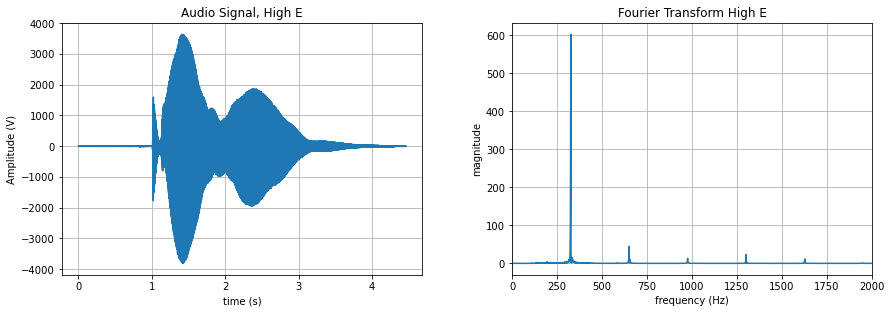

In [6]:
# visualize a wav file and its fft

from scipy.io import wavfile

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

rate, f = wavfile.read('Ehigh.wav')  # read the sample rate and the signal itself
Nt = f.size
dt = 1/rate
t = np.arange(0, Nt*dt, dt)

ax1.plot(t, f)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Amplitude (V)')
ax1.grid('on')
ax1.set_title('Audio Signal, High E')

freq = fftpack.fftfreq(Nt, dt)
u = fftpack.fft(f)
pidxs = np.where(freq > 0)
pfreq = freq[pidxs]
umag = abs(u)[pidxs]*2/Nt

ax2.plot(pfreq, umag)
ax2.set_xlim([0,2000])  # limit to freqs where the action is
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('magnitude')
ax2.grid('on')
ax2.set_title('Fourier Transform High E');

Do you see the greatest energy at 324 Hz, followed by its multiples? Does this match what Audacity produced above?

## Homework.

Select an object that makes a sound when "played." Record its sound in Audacity and compute and display its Fouier Transform in python. Change the object and repeat and graph the two "spectra" on the same frequency axis. Check out my example below. Submit a jupyter notebook documenting your work and using the Fourier weights to distinguish the two sounds.

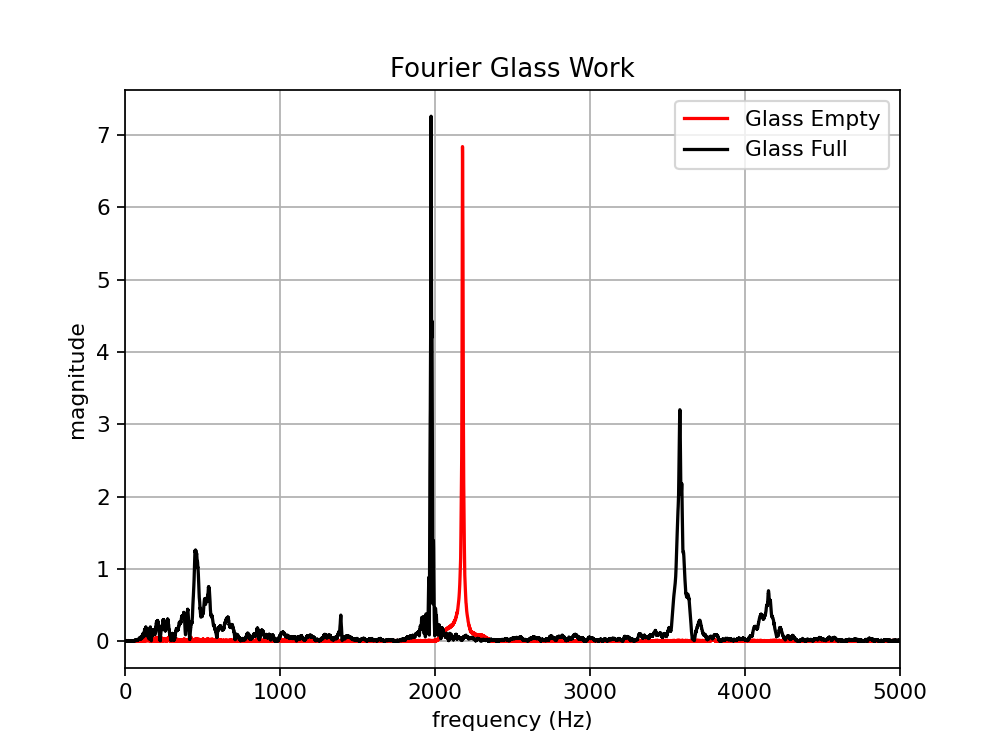

In [13]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAAA+gAAALuCAYAAAA9jTxNAAAgAElEQVR4XuydB5gVRdaGz4KKGDGgrgF1VWRVMK4YwYiuERVzDhhQMbLmrJgRBRNm0RUwYA6soqICBhBFUVRQghhAASUICP7Pqfl77uUyM7f7zq3uc7vfeh4fkemuOuf9zrT9dVVX/+2vv/76S2gQgAAEIAABCEAAAhCAAAQgAAEIJErgbxj0RPkzOAQgAAEIQAACEIAABCAAAQhAwBHAoFMIEIAABCAAAQhAAAIQgAAEIAABAwQw6AZEIAQIQAACEIAABCAAAQhAAAIQgAAGnRqAAAQgAAEIQAACEIAABCAAAQgYIIBBNyACIUAAAhCAAAQgAAEIQAACEIAABDDo1AAEIAABCEAAAhCAAAQgAAEIQMAAAQy6AREIAQIQgAAEIAABCEAAAhCAAAQggEGnBiAAAQhAAAIQgAAEIAABCEAAAgYIYNANiEAIEIAABCAAAQhAAAIQgAAEIAABDDo1AAEIQAACEIAABCAAAQhAAAIQMEAAg25ABEKAAAQgAAEIQAACEIAABCAAAQhg0KkBCEAAAhCAAAQgAAEIQAACEICAAQIYdAMiEAIEIAABCEAAAhCAAAQgAAEIQACDTg1AAAIQgAAEIAABCEAAAhCAAAQMEMCgGxCBECAAAQhAAAIQgAAEIAABCEAAAhh0agACEIAABCAAAQhAAAIQgAAEIGCAAAbdgAiEAAEIQAACEIAABCAAAQhAAAIQwKBTAxCAAAQgAAEIQAACEIAABCAAAQMEMOgGRCAECEAAAhCAAAQgAAEIQAACEIAABp0agAAEIAABCEAAAhCAAAQgAAEIGCCAQTcgAiFAAAIQgAAEIAABCEAAAhCAAAQw6NQABCAAAQhAAAIQgAAEIAABCEDAAAEMugERCAECEIAABCAAAQhAAAIQgAAEIIBBpwYgAAEIQAACEIAABCAAAQhAAAIGCGDQDYhACBCAAAQgAAEIQAACEIAABCAAAQw6NQABCEAAAhCAAAQgAAEIQAACEDBAAINuQARCgAAEIAABCEAAAhCAAAQgAAEIYNCpAQhAAAIQgAAEIAABCEAAAhCAgAECGHQDIhACBCAAAQhAAAIQgAAEIAABCEAAg04NQAACEIAABCAAAQhAAAIQgAAEDBDAoBsQgRAgAAEIQAACEIAABCAAAQhAAAIYdGoAAhCAAAQgAAEIQAACEIAABCBggAAG3YAIhAABCEAAAhCAAAQgAAEIQAACEMCgUwMQgAAEIAABCEAAAhCAAAQgAAEDBDDoBkQgBAhAAAIQgAAEIAABCEAAAhCAAAadGoAABCAAAQhAAAIQgAAEIAABCBgggEE3IAIhQAACEIAABCAAAQhAAAIQgAAEMOjUAAQgAAEIQAACEIAABCAAAQhAwAABDLoBEQgBAhCAAAQgAAEIQAACEIAABCCAQacGIAABCEAAAhCAAAQgAAEIQAACBghg0A2IQAgQgAAEIAABCEAAAhCAAAQgAAEMOjUAAQhAAAIQgAAEIAABCEAAAhAwQACDbkAEQoAABCAAAQhAAAIQgAAEIAABCGDQqQEIQAACEIAABCAAAQhAAAIQgIABAhh0AyIQAgQgAAEIQAACEIAABCAAAQhAAINODUAAAhCAAAQgAAEIQAACEIAABAwQwKAbEIEQIAABCEAAAhCAAAQgAAEIQAACGHRqAAIQgAAEIAABCEAAAhCAAAQgYIAABt2ACIQAAQhAAAIQgAAEIAABCEAAAhDAoFMDEIAABCAAAQhAAAIQgAAEIAABAwQw6AZEIAQIQAACEIAABCAAAQhAAAIQgAAGnRqAAAQgAAEIQAACEIAABCAAAQgYIIBBNyACIUAAAhCAAAQgAAEIQAACEIAABDDo1AAEIAABCEAAAhCAAAQgAAEIQMAAAQy6AREIAQIQgAAEIAABCEAAAhCAAAQggEGnBiAAAQhAAAIQgAAEIAABCEAAAgYIYNANiEAIEIAABCwSuPLKK+Wqq64KFdptt90mZ599dqhjLR303XffybrrrutCevPNN2WnnXayFF6dsQwdOlSeeuopefvtt2XixInyyy+/yJJLLikrr7yytGrVStq0aSOHHHKIrLnmmjX2c9xxx8kjjzwibdu2lbfeeqti8o4S6IABA2SPPfZwpzzzzDNywAEH1Hj6X3/95bj9+uuv7ueffvqptGzZssZjlXPTpk1Fz7nkkkvk2muvjRJSvY/929/+5vp46KGHRDWkQQACEIBAughg0NOlJ9lAAAIQKBsBDHrZUJa1o++//146duwor7zyStF+GzRoIEcddZToA5QVV1xxoeOzYNBnzJghTZo0kfnz58s555wj3bp1q5HZ559/Lptsskn1z+68807p1KlTjcc+99xz0r59e/ezV199tfoBQFExynQABr1MIOkGAhCAgFECGHSjwhAWBCAAgaQJ5Bt0NTDNmjWrNaRGjRrJ4osvnnTIkcevtBn0zz77zBnCSZMmuVx1lvyYY46RbbfdVlZZZRWZM2eOm01//fXX5fHHH5cvvvjCHffOO+/IDjvskDmDrglvtdVWMmzYMPfvDz/8sMYauffee+XUU08VrWNleNhhh8kTTzxR47FdunSRW265RRo2bOhm3JdbbrnIdVefEzDo9aHHuRCAAATsE8Cg29eICCEAAQgkQiDfoH/77beyzjrrJBIHg1YR+O2332TLLbeUb775xj0Mue++++TYY4+tFc+CBQvcEnZ99eCll17KrEHXmfPu3bvLYostJtOmTZOll156EWa6ykAfaJx88snSq1cv91rAhAkTamS7zTbbyPvvvy9bbLGFM/5xNwx63MQZDwIQgEC8BDDo8fJmNAhAAAIVQwCDbkuq//znP3LzzTe7oO644w4588wzQwX41VdfOXP6j3/8Y6Hjs7DEXRPWd88POuggl/v//vc/2W233Rbhpg+fxo0bJx988IHsueeebma8podSs2fPluWXX17mzZsnZ511ljP+cTcMetzEGQ8CEIBAvAQw6PHyZjQIQAACFUOgvgb9xx9/dO/8vvzyy8786IzuWmutJe3atZPzzjtP1l577RpZ6EZtuvGZzg4//PDDNR5TbGl6vonR2dGePXvKf//7X/n666/dLGr//v3de8TF+gkG19lUNcWvvfaay2Xu3LlullVzOf/886s3misMNjB+V1xxhShPzUc399JXBnSzsbCb6+m71Dre9OnTpUWLFjJq1CgJciy1oIoZdJ2pf/7559277rq0XuNt3LixW0mhJlZn5v/+97/XOvzYsWNdfm+88YZjpu+B60Zsq666qpvNV/4777zzIufrmA888IB89NFHMnnyZLfxnS7f1838dt99dzn88MNdHYVt2oeery3QIf9cfSVA+9OZda0N3UjuxRdflN69e7v39/ObbqYXxKwb9AXGPzhmzJgxrub1QYD2q8vgNe599tnHvQOvm8vV1AprXt9zv/vuu2XEiBGOgT6MCR4GFDPo+jrDvvvu62pFNwB84YUXZNlllw2Li+MgAAEIQCBhAhj0hAVgeAhAAAJWCdTHoOs70AceeKD8/vvvNaanpuuxxx5bxODoweU06GpydOnyu+++u1AcUQy6xqmbsv3xxx815qKmVc1/sHFY/kGBQb/88svd++BPPvnkQn2ENehqGNV0abvhhhvkggsuqHfZ1GXQ1dzp5mp1tZVWWskZWV3yXdjUlGu8OuNcW9t0002dAc1vp5xyiltiXlcLyyy/D32oMXr0aNlll13cA4P8pu+aH3HEEdU/U74XXXSRW+6u76bnt2uuuUZUS236AEofNgRN6+TEE090D29qaiussIJ74FG4F0BhzauJ13fc81v+bH1dBl1fZTj44IMdd+Xfr18/94CDBgEIQAAClUMAg145WhEpBCAAgVgJlGrQ1QhtvvnmziSogbn++uvdTLPOJuqnzC688EIZP368W3b93nvvydZbb71QXuU06GussYb89NNPosvDjzzySBePzqLrTO76669fdAY9f8duNXfnnnuuew9c3wFXc3n11VfLoEGD3OZi+l6yms78Fhh0jUN3X9eNyNT46YZ7wTvOm222WVFd1TCqcdRW04ZvRTuo4YBiBl03oOvQoYPbiG711VcXNeQ///yz6OfddKm9zuLrrP6XX3650HvdulJC89b8lLF+qq9169aiBlXP19l0NfZaJ/oZtKDprLPWiTbdpE13Uddl+VonOhut46mZ3nvvveX000+PlLI+YLn//vurZ8m1z6BpX3fddZcz3hqrPszZcccdZaONNnIrHfKbbtCnMTdv3tzFHzRd8aH1oblrzlrz2oeadV1BcvHFF1dvKKefcCtcPRLUfFAnyl1rTcfRGXRdcr/ddtu54Woz6PogSjX9888/5eijj5YHH3zQsaNBAAIQgEBlEcCgV5ZeRAsBCEAgNgJhd3FXs6oGNWg6c6cGbJlllnGbaKnJyG9qztXkTpkyxRk3NXz5rZwGXftVo3L88cfXyK2uJe76gEGNlBokXfb89NNPL7KsXM2QLrvWpc///ve/nRnLb4FB178LDGApAuoMb7CruJrc2pZKR+m72BL3uvqaOXOm6IMFXQavm9WddNJJ1YerAQ0eVHzyySfum+xhmhpSnR33sfnao48+Wr2hnj5IyX8opLFqzPr6gj4g0JUSwXvmqr0+mNCmS/T1U3W6WZ/OlKvhD5rmOHLkSPfAQms+WFIf/Fwf5uhKA90h/tBDD5U+ffrUWPP6l7orv27uV1uryaD36NHDvROv32bX5fC33357vV+BCKMZx0AAAhCAQPkJYNDLz5QeIQABCKSCQNjvoOe/K66z1TrbqjOJl1xyiVx77bU1slAjpoZMm77fvPHGG1cfV06Drt+2VuNUW6vLoKuxVyOmDyB0OXPhd8SDPnVGW2eZ1Tjpe9o6Uxy0wKCrydNPoy2xxBIl1Yaaf/3mtjY1kPkPRPI7VOOsJq2w6Uxq4VLn+hh07T/YtK7wk2Qff/yxM9na1ODqaoUwTQ2mvuevM+T6gKecTTd8CzbJ0+XjugeCNl3Kr7qqdlOnTq1+V1tnq4cMGSLPPvus7L///u7Y4cOHuwdL2nQvgWAHff10W2D4Cx9W5OcQ5KdaKJf8VwiCmg9WC+QvnS/kUGjQddZff1e11echUDl50xcEIAABCJROAINeOjvOhAAEIJBqAqUYdH23W989DwyNLnWvqQUbc+nP9D1xXfodtHIadP1m9U033VSrTnUZdF0Sr++Wq/kqfG85v0OdaQ9mTAt3CQ8Mur4XrO8Dl9p0Uzad4dVWl0FXM6wPCQqbLs0ODH7wszAGXVcE6OyzmlB9SDFr1qxF+i6c8dZj9IGExqmbo+nDGF32Xazp5nknnHCCNGjQwG20prPyNX0SrVg/tf1cZ7f1NQPdK0DrVJvmpw8EtE7VgAct+Na5bgCYv3O+mmxtuhlcYPjzHzYp+9oe5ARL5/V83XhPNS2s+X/9619uJ/m6WmDQ9QGSPgzR2XP9O91ErnPnzqXi4TwIQAACEDBCAINuRAjCgAAEIGCNQCnvoKtJ0N2qtdVlJPXnOoOoM5j6fnXXrl0XMSvl2MVd3y0+7bTTakVbl0HfaqutIn/nWg297jIetMCg62zzjTfeWLLEYZe4l8ug69J9fUAR5qHCeuut55a657dbb73V7W4fNH2fW1cZ6D/6SkBNs+r66TJdBh4YZZ3x15lsfZdbH9ro5mr1eadaddGl5Tq2zmBr03fD9X3xM844wxndoAV7D+S/gnHIIYe4Tf50hYga/aDpbva6pHy11VaTH374oVaNdYY+MO+6+ZzuRRC04KGUjtG3b9866yQw6LqPQbCXg5p1fe+cBgEIQAAClU8Ag175GpIBBCAAAS8ESjHouqT9sssuc0ZKDVddLZjRLDRH5ZxB11lZnSmurdVl0DfYYINFjGcx0IXjFX5mrdj5tf281E3iApZRZ9ADHTUe/ZSYvhetryHo8v1gmf51113nNq7T9/SVY2HTz5DpQwn9XFp+09pQI6omXk1tftP3u9Uwq+HUd+3zmy77Vg46S1zKJ+b0YU2wuZzuqK87u6v515ltNe76bnjQgk+z6esN+um1pZZaSnQDN31NofAdcp3p18/C6SoB3YCwtqYPPbQ/bfnL7PW/w9R80G+Qu346Tb+SoHro/gi6WoEGAQhAAAKVTwCDXvkakgEEIAABLwRKMejlmEHX70zrpmt1zaDrjK0aaG26M7wanPxW7FvRwbF1GXRd9qybe+m3sPWb2KW0chn0Uj+zVqpB1++C62sIOuusqwJqasHMcW0GPThHl8brbv36rr5+k1u/j65Nl4gr35q+0a3v0evGbYMHD3b66lJ0fb9eW7HXFmrTSfciCDas00+5aX3pZnC60kNzVQOe3zbccEP56quvZODAgW7X/WCZfs+ePRfaRT7sDLoa/WB/gtpm0Ouq+UKDrjP+OtuuDxh0TwJdtq97FdAgAAEIQKCyCWDQK1s/oocABCDgjUApBl031dIdz7XpUuXa3kHXJcI6g67tnnvuEf3+ddCCDdHqWu6rnzZr27atO8WXQdeZ42eeeUaKbTRXlwDlMugzZsxwvPSVAJ351U+OhZlFLsWg6ye9gp3L8zdJK8xzt912c+/mFzPo+eep8daHOMEGgcVeQQjO1eXh+u646q6z0PoFgOWWWy5S7evYmpf2pSsCdIm5LpuvLX59H15XROin9NSgBysxCnemz38oVdc76PqQIvgGuu4HoKsaglbKDLrGpp9j0370QYa+EqBL84NP1UWCw8EQgAAEIGCGAAbdjBQEAgEIQMAWgVIMethd3PWdXZ151Fa4i7t+Ek13ydbPeOkmWDU13SE+eG/dl0HXBwfB++u6TDvYwTuKSuUy6DpmsGu6/ll3O9fPaRVrpRh0fY9a37PWpkung03/8sfSByyamy7bjmLQgz6C/Qd0ubrWQpgW9uFPXX0FnwBcd911nUHXJfP6rv1jjz22yGm6bF2Xr+s782rQ9b81bjXhupFd0LQ2dHM3bXXt4q57M6iZr2sX9ygz6MHrFLrMXU25fq6wcePGbgd8/SY7DQIQgAAEKpMABr0ydSNqCEAAAt4JlGLQNaj99tvPLWWu7TvoupxYd/7W93xr+g667ureqVMnl58uc27ZsuVCuep7vmqW1Zho82XQdUm1mlCdrdUYdNl9bTt0axyjR48WXRad38pp0PX9bM1bl/frLLKaweBTX7UVQykGXU23GlHNX2eN1QjmN/0euM5mB59CKzToat71/Np2YNd3y//+97+7T/HpJ8L002C18csfN3/juXHjxjnTHLXpjv4XXHCBO01Xd+gDoMKvCAR9qp66WkHrWN+VV+61fQIu+A66LpPXlSOF30HXOtavART7DnopBl3j1ZUV+iBBd9vX9+X1lYBghUlURhwPAQhAAALJEsCgJ8uf0SEAAQiYJVCqQVdjowZcP7elxkY3/dIZvoYNGzqTqwZJDZbOJOqy3+Ab0gEINcRqbNUg6kynvmuru3trf/p5Kt2ETk1T8C6zL4Ou8agJ1QcOujxa38vWWWxd2q156bvL+g67Li/W3c413sJvrpfToGs8utpAWQa7hesmZ2rqtt12W2cKdWZX+emsrr43r599U0Otrw2oactvdX1mTXcED2aV9Zvh+j147V/z0w3kdGn7P//5T9HN1goNuq5+0NlifUVBx9WHG7q0XE2kxqWmXPtR/fUddN18Tps+TNDZaX3vXfPSd7713Wp9h12Xbut5anA1V2VeStNvm+vO8PmtpodAwc+bNm3qeAZNN8ULDH5+H2+//babtdaHDhq3Hqc5zJ0719WsztRrbrosX5fIa13kt1KXuOdvgKjvuGttDhs2zD0c0XE1BhoEIAABCFQWAQx6ZelFtBCAAARiI1CqQdcA1RjqO9zBLHdh0Pq+rBpAPaamprt46/JiNcaFTWepdVY3MFo+DbqOre+hqxGqLZcgvsLvgevfl9uga5+6AqFjx46LfNe8Jo5qgnUJtz4k0Vnr/FaXQdfdyvWhyIQJE2rUR78HrrPkapprMuj6mkJdTePS9881j6AFJrWu83RjuQEDBoh+2q2Upl8W0I3h9Nv12jQHfee+tvf5999/f3n++eerh9IHSoUGP/ihPhDRmlVTXlPTDeK0r+A99PxjymHQtT99v37XXXd1KwP0IdZrr71Wa7yl8OMcCEAAAhDwTwCD7p8xI0AAAhCoSAL1MeiasM586rJkncnTmWY127rRmc4A66xs4SxiIaTXX39ddEmyLtvV2Wo1gjorq7PYOqups+vafBt0HUNnP/WddM3lyy+/dLPB+pBBZ9X1/WN9T1s369K/y28+DHrQv75zrN/l1lUJatrVnOn4+p1vXXKts6f6/fRCYx6cX5dB12N0PwHdIE1fV1At1WDqvgCnnnqq2wgwqI9Cg64rHXTnc31IozGq2de+9HNgeqyaUf20ns7A5zddVaGGUnXXTfB0lYAu61dDrbPsapZ1bF3CXZ8WfCVA+9hrr73kpZdeqrW7/CXxylZ1Dz4zV9NJugy+W7duLgfVRFc06EMFXRqvG+PpjHxNrVwGXfvWBw5q0nV1gs7Y6wMNfZWEBgEIQAAClUEAg14ZOhElBCAAAQhAAAIQgAAEIAABCKScAAY95QKTHgQgAAEIQAACEIAABCAAAQhUBgEMemXoRJQQgAAEIAABCEAAAhCAAAQgkHICGPSUC0x6EIAABCAAAQhAAAIQgAAEIFAZBDDolaETUUIAAhCAAAQgAAEIQAACEIBAyglg0FMuMOlBAAIQgAAEIAABCEAAAhCAQGUQwKBXhk5ECQEIQAACEIAABCAAAQhAAAIpJ4BBT7nApAcBCEAAAhCAAAQgAAEIQAAClUEAg14ZOhElBCAAAQhAAAIQgAAEIAABCKScAAY95QKTHgQgAAEIQAACEIAABCAAAQhUBgEMemXoRJQQgAAEIAABCEAAAhCAAAQgkHICGPSUC0x6EIAABCAAAQhAAAIQgAAEIFAZBDDolaFT2aJs0qSJzJkzR/7+97+XrU86ggAEIAABCEAAAhCAAAQqj8APP/wgjRo1kmnTplVe8CmNGIOeUmFrS6tx48Yyb948adasWcYyJ924CcyePdsNqTVHg4BPAtSaT7r0nU+AWqMe4iJArcVFmnHGjx8viy++uAQ1B5HkCWDQk9cg1gj+8Y9/uF9AfVpGg4BPAv/73/9c97vvvrvPYegbAkKtUQRxEaDW4iLNONQaNRAXAV1Vq5MpY8eOjWtIxilCAIOesRLBoGdM8ATT5eYiQfgZG5pay5jgCaZLrSUIP2NDU2sZEzzBdDHoCcKvZWgMuj1NvEaEQfeKl87zCHBzQTnERYBai4s041Br1EBcBKi1uEgzDgbdXg1g0O1p4jUiDLpXvHSOQacGEiDAjWwC0DM6JLWWUeETSJtaSwB6RofEoNsTHoNuTxOvEWHQveKlcww6NZAAAW5kE4Ce0SGptYwKn0Da1FoC0DM6JAbdnvAYdHuaeI0Ig+4VL51j0KmBBAhwI5sA9IwOSa1lVPgE0qbWEoCe0SEx6PaEx6Db08RrRBh0r3jpHINODSRAgBvZBKBndEhqLaPCJ5A2tZYA9IwOiUG3JzwG3Z4mXiPCoHvFS+cYdGogAQLcyCYAPaNDUmsZFT6BtKm1BKBndEgMuj3hMej2NPEaEQbdK146x6BTAwkQ4EY2AegZHZJa8y/8X3/9JQsWLBD9d5bbW2+95dLfaaedsoyB3CMQ+Nvf/iYNGjQQ/XeUhkGPQiueYzHo8XA2MwoG3YwUqQ+EG9nUS2wmQWrNjBSpD4Ra8yOxmvHp06fLb7/9JrNmzcq8OVfKykLbcsst5wc6vaaSwGKLLeZqZqWVVhL9c5iGQQ9DKd5jMOjx8k58NAx64hJkJgBuZDMjdeKJUmuJS5CZAKi18kuts+WTJk2S33//vfydV3CP8+fPd9E3bNiwgrMg9KQINGrUSJo1axbKpGPQk1Kp9nEx6PY08RoRBt0rXjrPI8CNLOUQFwFqLS7SjEOtlb8GfvnlF/n5559dx02aNJFll11W1FxEXaZb/siS7TF4YKE8aBAIQ0Afds2cOdP9PumfV1xxRVl11VWLnopBL4oo9gMw6LEjT3ZADHqy/LM0OjeyWVI72VyptWT5Z2l0aq28auvS9jFjxsi8efNk5ZVXlqZNm5Z3gArujSXuFSxewqFPnTpVfvzxRzd7vv766xd92IVBT1iwGobHoNvTxGtEGHSveOk8jwA3spRDXASotbhIMw61Vt4a0Fm+0aNHu071/kRnzmlVBDDoVEKpBObOnesefGlr3rx50dckMOilkvZ3HgbdH1uTPWPQTcqSyqC4kU2lrCaTotZMypLKoKi18sr6559/ytdff+063WCDDUK9L1veCOz2hkG3q431yKL+XmHQ7SmKQbenideIMOhe8dJ5HgFuZCmHuAhQa3GRZhxqrbw1ENVIlHd0271h0G3rYzm6qL9XGHR7amLQ7WniNSIMule8dI5BpwYSIIBpSgB6Roek1sorfFQjUd7RbfeGQbetj+Xoov5eYdDtqYlBt6eJ14gw6F7x0jkGnRpIgACmKQHoGR2SWiuv8FGNRHlHt90bBt22Ppaji/p7hUG3pyYG3Z4mXiPCoHvFS+cYdGogAQKYpgSgZ3RIaq28wkc1EuUd3XZvGHTb+liOLurvFQbdnpoYdHuaeI0Ig+4VL51j0KmBBAhgmhKAntEhqbXyCh/VSJR3dNu91WbQX3jhBenXr58MGTJEfvrpJ9Edu1dYYQX55z//KW3atJHDDjvM/Tm/fffdd7LuuuvK2muvLfrnSmwPP/ywHH/88UVDP/bYY0WPzXKL+nuFQbdXLRh0e5p4jQiD7hUvnWPQqYEECGCaEoCe0SGptfIKH9VIlHd0270VGvSJEyfKIYcc4oy5tg033FBatGghSy21lEyZMorJ3E0AACAASURBVEU++ugj0e9f/+1vf5PLLrtMrrrqquoE02TQV111Vdlzzz1rFW+HHXaQk046yaS4O+20k7z99tvy5ptviv7ZV4v6e4VB96VE6f1i0EtnV5FnYtArUraKDJob2YqUrSKDptYqUraKDJpaK69sUY1EeUe33Vu+QZ88ebJstdVWMn78eDdL3rNnT2nZsuVCCeg35QcMGCDXXXedrLHGGtKnT59UGvS2bdvKW2+9ZVu8WqLDoFekbIkEjUFPBHtyg2LQk2OftZG5kc2a4snlS60lxz5rI1Nr5VUcg147z3yD3qFDB3n66aedOX/99ddl8cUXr/XEv/76S4YNG+YMfdDSNIOOQS/+Oxj194oZ9OJM4z4Cgx438YTHw6AnLECGhudGNkNix5zqiBEjRG9ed9xxR7eck1qLWYAMD0etlVf8qEaivKPb7i0w6D/88IN7p1yN92effSYbb7xx5MDrMuhq/PW99g8++EC+//579067vqu+zz77yIUXXigrr7zyIuPpcd26dZNXXnlFJkyY4H6+yiqrSKtWreSoo46Sgw46qPqcWbNmSa9eveSxxx6TcePGye+//y5NmzaV9ddfX9q1aycXXXRRqHyCd9CjGvT8WWv9/8U111wjH374oTRs2NA98Lj55ptlgw02EF2BcNttt8mDDz4oY8eOlRVXXNHloscvscQSC8V43HHHySOPPCIPPfSQy/mKK66QwYMHyx9//OFWNpx77rnudYTCByS1JapL3pWpjqfcVY+amvLea6+9ZNttt3Xj1dai/l5h0EOVYKwHYdBjxZ38YBj05DXISgTcyGZF6Xjz1NkjvanTm9Xbb79dOnfujEGPV4JMj8Z1rbzyRzUS5R3ddm+BQb///vvlvPPOk80331yGDx9eUtB1GfTFFltMlllmGWf811xzTWegdQb+559/lnXWWccZdzXUQZs0aZJsttlmosvudeO5TTfd1M3o6zvyn3zyiXtw+uqrr7rD1fSqQX7nnXekSZMmsv3228tyyy0n+tBh1KhRMn36dGdqw7T6GvSzzz5bevToIVtvvbXLU3NUI77aaqvJyJEj5dRTT3Vxt27dWpZcckn3rvjMmTPdxnRq2vNbYNBPOeUUtyGdPtDYYostnMl+99133f+f9FWDiy++2J2mewScf/75rn/d2G+PPfZw4wZNH4To/XmzZs0cV41L+yxs++23nzPvjz76qBx99NEY9DCFU6HHYNArVLhSw8agl0qO86IS4EY2KjGOD0NAdyueNm1a9aF6I0SthSHHMeUgQK2Vg2Kuj1AGfd48kYkTyztwXL2tuaZIHcvR6wojMOinn366m30+8cQTRc16Ka0ug/7UU0+5WVs1pUFT03zGGWfIAw88IGpC77nnnuqf6eZzV155pZx22mly1113LRTOjBkznNnVGV5tanLVoG+55Zbuz0svvXT18fPnz3d/t8suu4RKqb4GvUGDBu41gfbt27vx5syZI//+97/dhm36cEIfJrz88svuoYQ2zUPj1hpVwxz8vf4sMOj6Z50t11l47V+b7gOw7777uvN04z59sBK0Yu+g6+Z+1157rTP2avDzm+4/oPfw+qBDH4bk61UIMNTvVd5JzKCHKsFYD8Kgx4o7+cEw6MlrkJUIuJHNitLx5qlLFPMbBj1e/lkfjetaeSsglJH49luRf/yjvAPH1dvYsSLrrlvSaIFBP/TQQ93Mq86yXn/99Yv09cwzz8jzzz+/yN+redYd3rWV8g767Nmz3Wy3GkKd1Q2aPjDQvvv3719tdmtL8Mknn3RLvc866yzp3r17SRyCk8J+Zq0wrsAUH3nkke5BR3577rnnqnPQ1Vm77rrrQj8/4IAD5Nlnn3Wz5Pr5tqAFBl1n4seMGbPIEviOHTu6hyknnHCCe8gRtGIGXWfg9UHASiut5F4dyN9r4NJLL3WmvUuXLnLTTTfVyTLU71VeDxj0epWml5Mx6F6w2u0Ug25Xm7RFxo1s2hS1kQ8G3YYOWY2C61p5lQ9lJDDodRr0wLgVKqOfXFNzHcagf/HFF/Laa685s6nLunU2WZsabH2H/Ndff3XfWtem712r8dTPvN1www2y++67LzQznh/HN998U/0puBtvvFEOPPBA0c+kldICg17sM2v62pMuNy80xfrO+DHHHLPQ0J9//rlssskmzgjrAwl9Lz2/qRm+5ZZbpGvXrgu9Kx8YdF02r++tF7Zg5YC+Z//111+HNuh64MEHHyy6qqFv377V77HPmzfPLX/X5fHa33rrrYdBL6WIKugcDHoFiVWOUDHo5aBIH2EIcCMbhhLHRCWAQY9KjOPLSYDrWjlpilsGHBgY3ahL34depGXcoEdd4h5cI8MYdOWvS9gL37Eu1EBn4IN3otW8H3HEEc5AalPN9D10nR3WTc70/fT8pgb2ggsuEDWZ2tS06nvqupGcbnhWeE2vrcLqu8T9jTfeWGQ5fbCyYK211nKfsCtsupRfl/TrJnD656AFBl1XBejqgMKmm+HpTLguQ1fjH7RiM+h6XGDu9Vhdfq+tX79+oisp9PvvulFcsRbq9yqvE2bQixGN/+cY9PiZJzoiBj1R/JkanBvZTMkdW7IY9NhQM1ANBLiulbcsQhmJjL+DHmwSpyZYv2BRrEUx6Do7rLPE+t10NdL67rjuxh7sWr766qu7Dd2+/fbbhd7B1hh0Q7iXXnrJbQCnO4oHS/L1Peqrr756oTB1Yzldeq4bqA0aNEj0v7XpknI1nHV9Ni7oqL4GXc2umt78VmzpfzGDHmxUWqhJ0G/jxo3dCoQoBl2P1Z3gdcd+XdnQokUL2Xnnnd2333VJvm4UV6yF+r3CoBfDmOjPMeiJ4o9/cAx6/MyzOiI3sllV3m/eGHS/fOm9bgJc18pbIVGNRHlHt91bTZ9Z043LdEl2XS2KQd9mm23k/fffdzuD60Zx+U2Npe7urvt81GTQ84/V2XGd5dWl7/pnXTqun4arrQ0ZMkQOP/xw99k13YBOZ/GLNYsG/ZxzznGfmytswSy4LkXXZf5RDboy0U34dHZed5dXljrLrzoULsOviVvU3ytm0ItVX/w/x6DHzzzRETHoieLP1ODcyGZK7tiSxaDHhpqBaiDAda28ZRHVSJR3dNu9BQZdN2rT5eC6GdwOO+wgulS78Lvc+ZlEMejNmzd3rxjozLzO0Oc33dzspJNOcn9VzKAH5wUzvWrW9V3qulqwG3ynTp3kzjvvLCqGRYOuplnf2y9cAaAPHPTb74WfaNNPhOo1RP/Zbbfdas1Z9wHQVQ2qZYcOHdyGc7q7+yWXXFKUkx4Q9fcKgx4Ka6wHYdBjxZ38YBj05DXISgTcyGZF6XjzxKDHy5vRFibAda28FRHVSJR3dNu95Rt03UV9q622cu9J6/vbPXv2lFatWi2UgM506ye+9D1lbWHeQQ++q62G8u67765+H1wNu5rJYPf2fIOu3+DWJdj5nw/T8TQ23Zztl19+kaFDh7rviQ8cONB9zkw3ksvfX0D/Tg2qLnnXjeb0HfVizaJB15j1FQHdAC/4f5M+QNF367W2dXWC6hY0Neyaxx133CFnnnlmnSnrBnS6hF6bPgDQXd3DbrAX9fcKg16s+uL/OQY9fuaJjohBTxR/pgbnRjZTcseWLAY9NtQMVAMBrmvlLYuoRqK8o9vuLd+ga6T67WudlVbzq013Udelz/qe888//yyjR492x2jTWdfHH3+8eqa9tnet9d1xfS9bl6Vrf7rBm/al74nrWLoUXZeh5xt0/Y64vguts8c667788stXn6PGWz+rFmwgp5uo6TJw3U1evymuBlO/la7jTpkyRXQGX01ssNt8XYqE3cVddzvPfwe+ro3Z6vsOuj7Y0F3t1113XfdwQt+t13fydSM9jUHfx89v+jm8/fffXxo1auQegOj7/oHJV/75TVc26N/pgxfdIK5Pnz6hCzbq7xUGPTTa2A7EoMeG2sZAGHQbOmQhCm5ks6By/Dli0ONnzog5AlzXylsNUY1EeUe33VuhQddo1azp++JqgNWo62e35s6d6z6BppuJ6ey6fu+78P3vuozosGHDRD/Vpv/WpdW6y7ruUq7vP+s9Y6FBV/P+9NNPO5Ots+bTpk1zRlPNpC6JV2MfvCet71/37t3bGX79s87I65J93RFeTefJJ5/s/jtMC/sd9MLN9HwadDXnuifA5Zdf7h5m6AMK/e9zzz1XDjvssBrT0pUK9957r3z11VfVO7zXtIGdnqw7wSt/3SCubdu2YTC5Y6L+XmHQQ6ON7UAMemyobQyEQbehQxai4EY2CyrHnyMGPX7mjIhB91UDUY2Erzgs9luTQbcYZxZjCj6zpgZd/+yj6QOQ7bffXjbaaCO36V6UFvX3CoMehW48x2LQ4+FcdBR9OqabaxRruoxm7NixxQ6r9ecY9JLRcWJEAhj0iMA4PBQBDHooTBzkiQDXtfKCjWokyju67d4w6Hb18W3QdaWE7iWgewroZnMdO3aMBCPq7xUGPRLeWA7GoMeCufggX375pdsoo7b26quvuqVMhTtCFu954SMw6FGJcXypBLiRLZUc59VFAINOfSRJgOtaeelHNRLlHd12bxh0u/r4Muj6jrq+36+b9A0fPtzNnuufw3wnPp9W1N8rDLq9WsOg29NkkYj0Iq2/PPpNSv22Yps2bUqOGoNeMjpOjEiAG9mIwDg8FAEMeihMHOSJANe18oKNaiTKO7rt3jDodvXxZdCvvPJK0c/P6Xv5eq+vu73rytmoLervFQY9KmH/x2PQ/TOu9wj6/UNd3rLeeuu571UW3qBGGQCDHoUWx9aHADey9aHHubURwKBTG0kS4LpWXvpRjUR5R7fdGwbdtj6Wo4v6e4VBt6cmBt2eJotEtMMOO8h7771X4ycbooaPQY9KjONLJcCNbKnkOK8uAhh06iNJAlzXyks/qpEo7+i2e8Og29bHcnRRf68w6PbUxKDb02ShiMaMGeM+eaE3pfqZDP2+Y30aBr0+9Dg3CgFuZKPQ4tiwBDDoYUlxnA8CXNfKSzWqkSjv6LZ7w6Db1sdydFF/rzDo9tTEoNvTZKGILrvsMrn22mtl1113lddff73e0WLQ642QDkIS4EY2JCgOi0QAgx4JFweXmQDXtfICjWokyju67d4w6Lb1sRxd1N8rDLo9NTHo9jSpjkg/s6CbQ4wbN04ee+wxOfLII0NFqya8tjZhwgRZaaWVpHfv3qH64iAIlEpg9uzZ7tTGjRuX2gXnQWARAu3atVvo7/QzNNQahRIXAWqtvKT1gduyyy4rSy+9tKyxxhrSsGHD8g5Qwb0tWLDARd+gQYMKzoLQkyAwf/58+f7772XmzJny+++/i/qJutrRRx8tSy21VL0+45xEnmkeE4NuWN2BAwe6mXPdzfHHH38MbXQw6IZFzVBo3MhmSOwYU8WgxwiboRYhwHWtvEWBQa+dJwa9vLWWpd4w6JWvNgbdsIbHHHOMm+nWHdx79epVlkhZ4l4WjHQSggBLQUNA4pDIBFjiHhkZJ5SRANe1MsIUkahLccs7uu3eWOJuWx/L0UX9vWKJuz01Mej2NHERzZgxQ1ZbbTW3PEV3cN9uu+3KEikGvSwY6SQEAW5kQ0DikMgEMOiRkXFCGQlwXSsjTAx6nTAx6OWttSz1hkGvfLUx6EY1fPDBB+XEE0+U5s2by+jRo8sWJQa9bCjpqAgBbmQpER8EMOg+qNJnWAJc18KSCndcVCMRrtd0HIVBT4eOSWQR9feKGfQkVKp7TAy6PU1cRG3btpVBgwZJ165d5aKLLipblBj0sqGkIww6NZAAAQx6AtAZspoABr28xRDVSJR3dNu9YdBt62M5uqi/Vxh0e2pi0O1p4nZRDL59Pn78eLezabkaBr1cJOmnGAFuZIsR4uelEMCgl0KNc8pFgOtauUhW9RPVSJR3dNu91WbQX3jhBenXr58MGTJEfvrpJ5k7d66ssMIK8s9//lPatGkjhx12mPtzfvvuu+/cV4HWXntt0T9XYnv44Yfl+OOPrzP0/fffX5599tmS03vrrbdk5513dpNk+ueg1fb3JQ/k+cSov1cYdM+ClNA9Br0EaL5PueKKK+Tqq6+WPfbYQ1599dWyDodBLytOOquDADeylIcPAhh0H1TpMywBrmthSYU7LqqRCNdrOo4qNOgTJ06UQw45xBlzbRtuuKG0aNHCfR5rypQp8tFHH8nUqVNFr5GXXXaZXHXVVdUg0mTQV111Vdlzzz1rFHmLLbaQzp07l1wAGPSxJbPjxPISwKCXl2e9e9NvFa633nry7bffyhNPPOGehJazYdDLSZO+6iLAjSz14YMABt0HVfoMS4DrWlhS4Y7DoNfOKd+gT548WbbaaivRVZU6S96zZ09p2bLlQifrZ9kGDBgg1113nVt52adPn1Qa9MLZ7XCVFu4oDDoGPVyl+D8Kg+6fsakRMOim5Eh1MNzIplrexJLDoCeGnoFFhOtaecsAgx7OoHfo0EGefvppZ85ff/11WXzxxWs9USd6hg0b5gx90NI0g45BL/47GPX3iiXuxZnGfQQGPW7iCY+HQU9YgAwNz41shsSOMVUMeoywGWoRAlzXylsUUY1EeUe33Vswg/7DDz+4d8rVeH/22Wey8cYbRw68LoOuxl/fa//ggw/k+++/d++067vq++yzj1x44YWy8sorLzKeHtetWzd55ZVXZMKECe7nq6yyirRq1UqOOuooOeigg6rPmTVrlvTq1Usee+wxGTdunPz+++/StGlTt9dSu3btQm+EHLyDHsagF3tnPOpMebH+Igvi+YSov1cYdM+ClNA9Br0EaJV8Cga9ktWrrNi5ka0svSol2sQNepcuIvfeK3LSSSLdulUKNuIsEwGua2UC+f/dRDUS5R3ddm+BQb///vvlvPPOk80331yGDx9eUtB1GfTFFltMlllmGWf811xzTWegdQb+559/lnXWWccZdzXUQZs0aZJsttlmosvudeO5TTfd1M3o6zvyn3zyiey4447V+yfpsvuddtpJ3nnnHWnSpIlsv/32stxyy4k+dBg1apRMnz5d/vjjj1A5YdBDYXIHRf29wqCHZxvXkRj0uEgbGQeDbkSIDITBjWwGRE4gxUQN+vjxImuvnct6zBiRf/wjAQoMmRQBrmvlJR/VSJR3dNu9BQb99NNPd7PPJ554oqhZL6XVZdCfeuopN1u+5JJLVnetpvmMM86QBx54QE455RS55557qn+mm89deeWVctppp8ldd921UDgzZsyQkSNHyrbbbuv+/u2333YGfcstt3R/XnrppauPnz9/vvu7XXbZJVRKGPRQmDDo4TGZPhKDblqe8geHQS8/U3qsmQA3slSGDwKJGvR33hFp0yaX1muvibRr5yNN+jRKgOtaeYUJY9DnzZvnZmcrsemMdF3vi9eVU2DQDz30UDcjrcvNr7/++kVOeeaZZ+T5559f5O/VPOsO79pKeQd99uzZbrZbZ751tjxo+sBA++7fv7+0b9++TlmefPJJt/P8WWedJd27d6+XhGE+s6a72Gu8xZaks8R9YSmYQa9XaXo5GYPuBavdTjHodrVJW2TcyKZNURv5JGrQBw8W2X77HIhXXhGp5XM/NmgRRbkJcF0rL9EwBl2/aqP3LpXYxo4d65aBl9LCGvRLL73U7dxe2AKzGsagf/HFF/Laa6/JmDFjZObMmaJL07WpwdZ3yH/99Vf3rXVtDz30kJxwwgnuM2833HCD7L777gvNjOfH8c0331R/Cu7GG2+UAw88UPQzaaW0wKDX9Zm14KEEBv1P+frrrx3mDTbYQPQ1hroaBr2UivR7DgbdL19zvWPQzUmS2oC4kU2ttIkmlqhBHzpU5P+XbjoIL74osvfeifJg8HgJcF0rL28Meu08S13iHlwjwxh05a9L2B988ME6hdUZeN04Tpua9yOOOEL69u3r/lvNn76HrkvZdYM4fT89v912221ywQUXiK6E0Kabw+l76rqR3F577eW+2x6mscQ9DKWqY8L8XuX3hkEPzzauIzHocZE2Mg4G3YgQGQiDG9kMiJxAioka9A8+EGndOpe1Livdd98EKDBkUgS4rpWXfBgjkfUZ9GCTODXBI0aMKCpAFIN+yy23SJcuXdx309VI67vjuhv7Ekss4cZZffXV3YZuqoFuGJffdEO4l156yW0AN3jwYAkeKFx22WVy9dVXL3SsbiynS+LfffddGTRokOh/a9t1113dTvBhXgMop0EfOHCgG7twR/ioS9+LipHQAWF+rzDoCYkTclgMekhQaTkMg54WJe3nwY2sfY0qMcJEDfqwYSJ53xaW/v1FiryDWYmMibl2AlzXylsdYYxE1t9Bz//Mmm7Atskmm9QpQhSDvs0228j777/vPrOmG8XlN13arru76+fdajLo+ceqRv369XNL3/XPn3/+ufs0XG1tyJAhcvjhh7vPrukGdDqLX6xFMej6wEB3jN9iiy3cjvSFLVimj0GvIsMMerHqi//nGPT4mSc6IgY9UfyZGpwb2UzJHVuyiRp0nb3afPNcrk89JZL3vd/YIDBQYgS4rpUXfRiDXt4RK6e3YEZaN2rT5eC6GdwOO+wgb7zxRvUMd03ZRDHozZs3d+8q68y8ztDnN93B/ST9nKRIUYMenLfzzju7DdrUrB988MF1wg52g+/UqZPceeedRYWJYtDV+OuMv24Yp5+LK5yh1433NEYMOga9aOEldAAGPSHwSQ2LQU+KfPbG5UY2e5rHkXGiBv2TT0Ty36/EoMchuakxuK6VVw4Meu088w267qK+1VZbyfjx49372z179pRWrVotdLLOdA8YMED2/P+NK8O8g77ffvu52XOdwb777rur3wdXw96uXbvq3dvzZ9AfffRRadmypfsue37T2HTG+pdffpGhQ4dK69atRZeSz5kzx20kl79Rmf7dbrvt5pa860Zz+o56sRbFoGtf6623nugmfbrzve6AH7T77rvP5au8MOgY9GJ1l9TPMehJkU9oXAx6QuAzOCw3shkUPYaUTRn0J58U6dAhhqwZwgoBrmvlVQKDHs6g61H6qTmdlVbzq013Uddl5I0bN3azxKNHj67+HF2HDh3k8ccfr55pr+0za7oUXDd302Xp2p9u8KZ96XviOpYuRdfZ6HyDrp9We+6552SttdZys+7LL7989TlqvPWzasEGcvpptXPOOcfNZOu30HUHdv1Wuo47ZcoU0Rl8XWKvPy/Wohr0Pn36uGX02vThhs6o69J7XTGgMd18880Y9P+HzhL3YtUX/88x6PEzT3REDHqi+DM1ODeymZI7tmQTNeiffiqSvwwUgx6b7lYG4rpWXiUw6OENuh6ps746460GWI36Tz/9JHPnznWfQGvRooWbXT/yyCMXef+7ru+g6zva+qk2/bd+Yk13WT/uuOPct8v1nrHQoKt5f/rpp53J1lnzadOmuY3l1ODrkng19g0bNnSJ6WfWevfu7Qy//llXAuiSfd0RXpeZn3zyye6/w7SoBl371NcCdIZe391v1KiR6Dv3V155pfzxxx+iy/GZQa8ij0EPU4HxHoNBj5d34qNh0BOXIDMBcCObGaljTRSDHituBisgwHWtvCWBQY9m0MtLn97SSiDq7xUG3V4lYNDtaeI1Igy6V7x0nkeAG1nKwQcBUwa9Xz+RIhsh+WBAn8kR4LpWXvZRjUR5R7fdW/476LYjJTprBKL+XmHQrSkogkG3p4nXiDDoXvHSOQadGvBMIFGDPnKkSP7GTBh0z2rb6x6DXl5NohqJ8o5uuzcMum19LEcX9fcKg25PTQy6PU28RoRB94qXzjHo1IBnAqYMet++Iocc4jljurdEAINeXjWiGonyjm67Nwy6bX0sRxf19wqDbk9NDLo9TbxGhEH3ipfOMejUgGcCiRr0zz4TadkylyEG3bPa9rrHoJdXk6hGoryj2+4Ng25bH8vRRf29wqDbUxODbk8TrxFh0L3ipXMMOjXgmQAG3TNguq+TAAa9vAUS1UiUd3TbvWHQbetjObqov1cYdHtqYtDtaeI1Igy6V7x0jkGnBjwTMGXQ+/QROfRQzxnTvSUCGPTyqhHVSJR3dNu9YdBt62M5uqi/Vxh0e2pi0O1p4jUiDLpXvHSOQacGPBNI1KB//rnIJpvkMsSge1bbXvcY9PJqEtVIlHd0271h0G3rYzm6qL9XGHR7amLQ7WniNSIMule8dI5BpwY8EzBl0J94QuSwwzxnTPeWCGDQy6tGVCNR3tFt94ZBt62P5eii/l5h0O2piUG3p4nXiDDoXvHSOQadGvBMAIPuGTDd10kAg17eAlmwYIGMHj3adar3J40aNSrvABXcGwa9gsVLOPS5c+fKmDFjXBTNmzeXhg0b1hkRBj1hwWoYHoNuTxOvEWHQveKlcww6NeCZQKIGvXAXd2bQPattr3sMenk1+euvv5yRmDdvnqy88srStGnT8g5Qwb1h0CtYvIRDnzp1qvz444+y2GKLyfrrry+F/98sDA+DnrBgGHR7AsQdEQY9buLZHY8b2exq7zNzUwb9v/8VOfxwn+nStzECXNfKL8gvv/wiP//8s+u4SZMmsuyyy7qZ9GKmovyR2Orx999/dwEpDxoEwhDQFSkzZ850v0/65xVXXFFWXXXVoqdi0Isiiv0AZtBjR57sgBj0ZPlnaXRuZLOkdny5JmrQR44UadUqlywGPT7hjYzEda38QqiRmDRpkgSGtPwjVGaP8+fPd4EXW55cmdkRtW8C+pCrWbNmbha9WMOgFyMU/88x6PEzT3REDHqi+DM1ODeymZI7tmRNGfTHHxc54ojYcmeg5AlwXfOjgS51nz59ujPps2bNcrN/WW8scc96BZSWvxry5ZZbTlZaaaVQ5lxHwaCXxtrnWRh0n3QN9o1BNyhKSkPiRjalwiacVqIG/dNPRTbdNEfgscdEjjwyYSIMHycBrmv+SgHFxAAAIABJREFUaatZV4Ou/85ye+utt1z6O+20U5YxkHsEAvr/xwYNGkR+PQSDHgFyTIdi0GMCbWUYDLoVJdIfBzey6dc4iQxNGfTevUWOOioJDIyZEAGuawmBz+Cw1FoGRU8oZQx6QuDrGBaDbk8TrxFh0L3ipfM8AtxcUA4+CCRq0D/5RGSzzXJpYdB9SGy6T65rpuVJVXDUWqrkNJ0MBt2ePBh0e5p4jQiD7hUvnWPQqQHPBBI16CNGiGy+OQbds8aWu8c0WVYnXbFRa+nS03I2GHR76mDQ7WniNSIMule8dI5BpwY8EzBl0B99VOTooz1nTPeWCGCaLKmR7liotXTrayk7DLolNapiwaDb08RrRBh0r3jpHINODXgmkKhB//hjkS22yGWIQfestr3uMU32NElrRNRaWpW1lxcG3Z4mGHR7mniNCIPuFS+dY9CpAc8ETBn0Rx4ROeYYzxnTvSUCmCZLaqQ7Fmot3fpayg6DbkmNqlgw6PY08RoRBt0rXjrHoFMDngkkatCHDxfZcstchhh0z2rb6x7TZE+TtEZEraVVWXt5YdDtaYJBt6eJ14gw6F7x0jkGnRrwTCBRgz5smMhWW2HQPWtsuXtMk2V10hUbtZYuPS1ng0G3pw4G3Z4mXiPCoHvFS+cYdGrAMwFTBv3hh0WOPdZzxnRviQCmyZIa6Y6FWku3vpayw6BbUqMqFgy6PU28RoRB94qXzjHo1IBnAoka9I8+EvnXv3IZYtA9q22ve0yTPU3SGhG1llZl7eWFQbenCQbdniZeI8Kge8VL5xh0asAzAVMG/aGHRI47znPGdG+JAKbJkhrpjoVaS7e+lrLDoFtSoyoWDLo9TbxGhEH3ipfOMejUgGcCiRr0Dz8U2XrrXIYYdM9q2+se02RPk7RGRK2lVVl7eWHQ7WmCQbenideIMOhe8dI5Bp0a8EwgUYP+wQcirVtj0D1rbLl7TJNlddIVG7WWLj0tZ4NBt6cOBt2eJl4jwqB7xUvnGHRqwDMBUwb9wQdFjj/ec8Z0b4kApsmSGumOhVpLt76WssOgW1KjKhYMuj1NvEaEQfeKl84x6NSAZwKJGvT33xfZZptchhh0z2rb6x7TZE+TtEZEraVVWXt5YdDtaYJBt6eJ14gw6F7x0jkGnRrwTMCUQX/gAZETTvCcMd1bIoBpsqRGumOh1tKtr6XsMOiW1KiKBYNuTxOvEWHQveKlcww6NeCZQKIGfehQkW23zWWIQfestr3uMU32NElrRNRaWpW1lxcG3Z4mGHR7mniNCIPuFS+dY9CpAc8EEjXoQ4aIbLddLsP77xc58UTPGdO9JQKYJktqpDsWai3d+lrKDoNuSY2qWDDo9jTxGhEG3SteOsegUwOeCWDQPQOm+zoJYJookLgIUGtxkWYcDLq9GsCg29PEa0QYdK946RyDTg14JpCoQR88WGT77XMZMoPuWW173WOa7GmS1oiotbQqay8vDLo9TTDo9jTxGhEG3SteOsegUwOeCZgy6PfdJ3LSSZ4zpntLBDBNltRIdyzUWrr1tZQdBt2SGlWxYNDtaeI1Igy6V7x0jkGnBjwTSNSgv/eeyA475DLEoHtW2173mCZ7mqQ1ImotrcraywuDbk8TDLo9TbxGhEH3ipfOMejUgGcCpgx6r14iHTt6zpjuLRHANFlSI92xUGvp1tdSdhh0S2pUxYJBt6eJ14gw6F7x0jkGnRrwTCBRg/7uuyI77pjLEIPuWW173WOa7GmS1oiotbQqay8vDLo9TTDo9jTxGhEG3SteOsegUwOeCSRq0N95R6RNGwy6Z40td49psqxOumKj1tKlp+VsMOj21MGg29PEa0QYdK946RyDTg14JmDKoN97r8jJJ3vOmO4tEcA0WVIj3bFQa+nW11J2GHRLalTFgkG3p4nXiDDoXvHSOQadGvBMIFGDPmiQSNu2uQwx6J7Vttc9psmeJmmNiFpLq7L28sKg29MEg25PE68RYdC94qVzDDo14JmAKYN+zz0ip5ziOWO6t0QA02RJjXTHQq2lW19L2WHQLalRFQsG3Z4mMmPGDOnevbs8/fTTMmbMGJk/f77oL88222wjF198sWy00UYlR41BLxkdJ0YkwM1FRGAcHopAogb97bdFdtopF+fdd4ucemqouDkoHQS4rqVDx0rIglqrBJXSESMG3Z6OGHRjmowePVratWsn48ePl9VXX11at24tDRo0kLFjx8onn3wijzzyiBx11FElR41BLxkdJ0YkwM1FRGAcHopAogb9rbdEdt4Zgx5KqXQexHUtnbpazIpas6hKOmPCoNvTFYNuSJPffvtNNtlkE5k4caJ07dpVunTpIg0bNqyOcNKkSfLnn39Ks2bNSo4ag14yOk6MSICbi4jAODwUAVMG/a67RE47LVTcHJQOAlzX0qFjJWRBrVWCSumIEYNuT0cMuiFNzjvvPOnWrZucdtppcpfe+HloGHQPUOmyRgLcXFAYPggkatDffFNkl11yaWHQfUhsuk+ua6blSVVw1Fqq5DSdDAbdnjwYdCOazJkzR1ZbbTWZNm2afPvtt7LOOut4iQyD7gUrndZAgJsLysIHAVMG/c47RTp18pEmfRolwHXNqDApDItaS6GoRlPCoNsTBoNuRJPBgwfL9ttvLxtssIF89dVX8vbbb8vLL7/sDPtaa60l++67r2y66ab1jhaDXm+EdBCSADcXIUFxWCQCiRr0gQNFdt01F2/PniKnnx4pfg6ubAJc1ypbv0qKnlqrJLUqO1YMuj39MOhGNOnVq5eccsopsueee8ryyy8vffv2XSQy/fmdd9650HvpUcPHoEclxvGlEuDmolRynFcXgUQN+htviOy2Wy68Hj1EzjgDwTJEgOtahsROOFVqLWEBMjQ8Bt2e2Bh0I5rccMMNctFFF8liiy3mPqumf+7YsaMsu+yy8sorr8gZZ5wh06dPl8svv1yuuuqqOqNWE15bmzBhgqy00krSu3dvI5kTRloJzJ4926XWuHHjtKZIXgkQ0K9c5LcBAwZIXLW24scfy5YXXFA9/JedOsmE9u0ToMCQSRGIq9aSyo9x7RCg1uxokfZIjj76aFlqqaXcF6NoNghg0G3o4HZtv+SSS1w0nTp1cjPl+U2/id6hQwdZeuml5ccff5Rlllmm1sgx6EZEzXgY3FxkvAA8pZ+oQR8+XLa88MKcQT/tNJlwwAGeMqVbiwS4rllUJZ0xUWvp1NViVhh0e6pg0I1o0qNHD+ncubOLZsSIETW+b960aVOZMmWKvPHGG7JL/k7CEXJgiXsEWBxaLwIsz6sXPk6uhUCiS9xff11k991zkXXvLnLWWWiVIQJc1zIkdsKpUmsJC5Ch4Vnibk9sDLoRTV544QXZb7/9XDT6PXRd2l7Ytt56a/nwww/l8ccflyOOOKKkyDHoJWHjpBIIcHNRAjROKUogUYP+v/+J5C+xv+02kbPPLhozB6SHANe19GhpPRNqzbpC6YkPg25PSwy6EU0mTpzodmvXVttn1tZbbz33fshzzz1Xbeajho9Bj0qM40slwM1FqeQ4ry4Cpgx6t24i55yDYBkiwHUtQ2InnCq1lrAAGRoeg25PbAy6IU2CGfL7779fTjzxxIUiGzNmjGy44YZuAzk182ussUZJkWPQS8LGSSUQ4OaiBGicUpRAogZ9wACRPfbIxXjrrSLnnls0Zg5IDwGua+nR0nom1Jp1hdITHwbdnpYYdEOaPPvss3LAAQfI6quvLroz8cYbb+yi093bDzzwQBk4cKC0b99e+vfvX3LUGPSS0XFiRALcXEQExuGhCCRq0F97TWTPPXNx3nKLyHnnhYqbg9JBgOtaOnSshCyotUpQKR0xYtDt6YhBN6bJ2WefLbfffrssueSSsu2227rd2ocOHSqTJ092M+iDBg2SVVZZpeSoMeglo+PEiAS4uYgIjMNDETBl0G++WeT880PFzUHpIMB1LR06VkIW1FolqJSOGDHo9nTEoNvTRPr16+c+s6a7uc+ZM0fUVB900EHSpUsXWW655eoVMQa9Xvg4OQIBbi4iwOLQ0AQSNeivviry73/nYr3pJpEuXULHzoGVT4DrWuVrWCkZUGuVolTlx4lBt6chBt2eJl4jwqB7xUvneQS4uaAcfBAwZdBvvFHkP//xkSZ9GiXAdc2oMCkMi1pLoahGU8Kg2xMGg25PE68RYdC94qVzDDo14JlAogb9lVdE9torl+ENN4hccIHnjOneEgFMkyU10h0LtZZufS1lh0G3pEZVLBh0e5p4jQiD7hUvnWPQqQHPBBI16C+/LLL33rkMr79e5MILPWdM95YIYJosqZHuWKi1dOtrKTsMuiU1MOj21IghIgx6DJAZwhHg5oJC8EHAlEHv2lXkoot8pEmfRglwXTMqTArDotZSKKrRlDDo9oRhBt2eJl4jwqB7xUvneQS4uaAcfBBI1KC/9JLIPvvk0rruOpGLL/aRJn0aJcB1zagwKQyLWkuhqEZTwqDbEwaDbk8TrxFh0L3ipXMMOjXgmYApg37ttSKXXOI5Y7q3RADTZEmNdMdCraVbX0vZYdAtqVEVCwbdniZeI8Kge8VL5xh0asAzgUQN+osviuy7by7Da64RufRSzxnTvSUCmCZLaqQ7Fmot3fpayg6DbkkNDLo9NWKICIMeA2SGcAS4uaAQfBBI1KC/8ILIfvvl0rr6apHLLvORJn0aJcB1zagwKQyLWkuhqEZTwqDbE4YZdHuaeI0Ig+4VL53nEeDmgnLwQcCUQb/qKpHLL/eRJn0aJcB1zagwKQyLWkuhqEZTwqDbEwaDbk8TrxFh0L3ipXMMOjXgmUCiBv3550X23z+X4ZVXilxxheeM6d4SAUyTJTXSHQu1lm59LWWHQbekRlUsGHR7mniNCIPuFS+dY9CpAc8ETBl0Nedq0mmZIYBpyozUiSdKrSUuQWYCwKDbkxqDbk8TrxFh0L3ipXMMOjXgmUCiBv2550Tat89lqMvbdZk7LTMEME2ZkTrxRKm1xCXITAAYdHtSY9DtaeI1Igy6V7x0jkGnBjwTSNSgP/usyAEH5DLUDeJ0ozhaZghgmjIjdeKJUmuJS5CZADDo9qTGoNvTxGtEGHSveOkcg04NeCZgyqDrN9D1W+i0zBDANGVG6sQTpdYSlyAzAWDQ7UmNQbenideIMOhe8dI5Bp0a8Eyg0KAvWLBAXn/9dTfq7rvv7nf0/v1FDjwwN8bFF4tcd53fMendFAFMkyk5Uh0MtZZqeU0lh0E3JYcLBoNuTxOvEWHQveKlcww6NeCZgCmDftFFIl27es6Y7i0RwDRZUiPdsVBr6dbXUnYYdEtqVMWCQbenideIMOhe8dI5Bp0a8Eyg0KDPnz9f3njjDTeq9xn0Z54ROeigXIYXXihy/fWeM6Z7SwQwTZbUSHcs1Fq69bWUHQbdkhoYdHtqxBARBj0GyAzhCHBzQSH4IGDKoF9wgcgNN/hIkz6NEuC6ZlSYFIZFraVQVKMpYdDtCcMMuj1NvEaEQfeKl87zCHBzQTn4IFBo0P/8808ZOHCgG8r7DPrTT4t06JBL6z//EbnxRh9p0qdRAlzXjAqTwrCotRSKajQlDLo9YTDo9jTxGhEG3SteOsegUwOeCSRq0J96SuTgg3MZdukictNNnjOme0sEME2W1Eh3LNRauvW1lB0G3ZIaVbFg0O1p4jUiDLpXvHSOQacGPBMoNOjz5s2TN998043qfQa90KCff77IzTd7zpjuLRHANFlSI92xUGvp1tdSdhh0S2pg0O2pEUNEGPQYIDOEI8DNBYXgg0CiBv3JJ0UOOSSX1nnnidxyi4806dMoAa5rRoVJYVjUWgpFNZoSBt2eMMyg29PEa0QYdK946TyPADcXlIMPAoUGfe7cufLWW2+5obzPoBca9HPPFbn1Vh9p0qdRAlzXjAqTwrCotRSKajQlDLo9YTDo9jTxGhEG3SteOsegUwOeCSRq0Pv1Ezn00FyG55wj0q2b54zp3hIBTJMlNdIdC7WWbn0tZYdBt6RGVSwYdHuaeI0Ig+4VL51j0KkBzwQKDfqcOXPk7bffdqN6n0Hv21fksMNyGZ59tshtt3nOmO4tEcA0WVIj3bFQa+nW11J2GHRLamDQ7akRQ0QY9BggM4QjwM0FheCDgCmDftZZIt27+0iTPo0S4LpmVJgUhkWtpVBUoylh0O0Jwwy6PU28RoRB94qXzvMIcHNBOfggUGjQ//jjDxk0aJAbyvsMep8+Iocfnkurc2eR22/3kSZ9GiXAdc2oMCkMi1pLoahGU8Kg2xMGg25PE68RYdC94qVzDDo14JmAKYN+5pkid9zhOWO6t0QA02RJjXTHQq2lW19L2WHQLalRFQsG3Z4mXiPCoHvFS+cYdGrAM4FCgz579mx555133KjeZ9CfeELkiCNyGZ5xhkiPHp4zpntLBDBNltRIdyzUWrr1tZQdBt2SGhh0e2rEEBEGPQbIDOEIcHNBIfggkKhB/+9/RY48MpfW6aeL9OzpI036NEqA65pRYVIYFrWWQlGNpoRBtycMM+j2NPEaEQbdK146zyPAzQXl4INAoUGfNWuWvPvuu24o7zPohQa9UyeRO+/0kSZ9GiXAdc2oMCkMi1pLoahGU8Kg2xMGg25PE68RYdC94qVzDDo14JlAogb98cdFjjoql+Fpp4ncdZfnjOneEgFMkyU10h0LtZZufS1lh0G3pEZVLBh0e5p4jQiD7hUvnWPQqQHPBEwZ9FNPFbn7bs8Z070lApgmS2qkOxZqLd36WsoOg25JDQy6PTViiAiDHgNkhnAEuLmgEHwQKDToM2fOlPfee88N5X2J+2OPiRx9dC6tU04RueceH2nSp1ECXNeMCpPCsKi1FIpqNCUMuj1hmEG3p4nXiDDoXvHSeR4Bbi4oBx8EMOg+qNJnWAJc18KS4rj6EqDW6kuQ88MSwKCHJRXfcRj0+FibGAmDbkKGTATBzUUmZI49yUKDPmPGDBk8eLCLw/sMeu/eIscck8v55JNF7r03dgYMmBwBrmvJsc/ayNRa1hRPLl8MenLsaxsZg25PE68RYdC94qXzPALcXFAOPggkatAffVTk2GNzaXXsKNKrl4806dMoAa5rRoVJYVjUWgpFNZoSBt2eMBh0e5p4jQiD7hUvnWPQqQHPBAoN+u+//y5Dhgxxo3qfQcege1bXfveYJvsapSVCai0tStrPA4NuTyMMuj1NvEaEQfeKl84x6NSAZwKJGvRHHhE57rhchiedJHLffZ4zpntLBDBNltRIdyzUWrr1tZQdBt2SGlWxYNDtaeI1Igy6V7x0jkGnBjwTKDTov/32mwwdOtSN6n0GvdCgn3iiyP33e86Y7i0RwDRZUiPdsVBr6dbXUnYYdEtqYNDtqRFDRBj0GCAzhCPAzQWF4INAogb94YdFjj8+lxYG3YfEpvvkumZanlQFR62lSk7TyWDQ7cnDDLo9TbxGhEH3ipfO8whwc0E5+CBQaNCnT58u77//vhvK+wz6Qw+JnHBCLi398wMP+EiTPo0S4LpmVJgUhkWtpVBUoylh0O0Jg0G3p4nXiDDoXvHSOQadGvBMwJRB19n0Bx/0nDHdWyKAabKkRrpjodbSra+l7DDoltSoigWDbk8TrxFh0L3ipXMMOjXgmUChQZ82bZp88MEHblTvM+hqxnVZe9Aw6J7Vttc9psmeJmmNiFpLq7L28sKg29MEg25PE68RYdC94qVzDDo14JmAKYOuO7rrsndaZghgmjIjdeKJUmuJS5CZADDo9qTGoNvTxGtEGHSveOkcg04NeCZQaNCnTp0qH374oRvV+wy6vm+un1YL2rHHiujGcbTMEMA0ZUbqxBOl1hKXIDMBYNDtSY1Bt6eJ14gw6F7x0jkGnRrwTCBRg66fVOvYEYPuWWPL3WOaLKuTrtiotXTpaTkbDLo9dTDo9jTxGhEG3SteOsegUwOeCRQa9F9//VU++ugjN6r3GfRCg37MMSL6bXRaZghgmjIjdeKJUmuJS5CZADDo9qTGoNvTxGtEGHSveOkcg04NeCaQqEG/7z6Rk0/OZXj00SKPPuo5Y7q3RADTZEmNdMdCraVbX0vZYdAtqVEVCwbdniZeI8Kge8VL5xh0asAzgUKD/ssvv8iwYcPcqN5n0DHontW13z2myb5GaYmQWkuLkvbzwKDb0wiDbk8TrxFh0L3ipXMMOjXgmUCiBr1XL5FTTslleNRRIr17e86Y7i0RwDRZUiPdsVBr6dbXUnYYdEtqVMWCQbenideIMOhe8dI5Bp0a8Eyg0KBPmTJFhg8f7kb1PoNeaNCPPFLkscc8Z0z3lghgmiypke5YqLV062spOwy6JTUw6PbUiCEiDHoMkBnCEeDmgkLwQSBRg37vvSKnnppLC4PuQ2LTfXJdMy1PqoKj1lIlp+lkMOj25GEG3Z4mXiPCoHvFS+d5BLi5oBx8ECg06JMnT5aPP/7YDeV9Bv2ee0ROOy2X1hFHiDz+uI806dMoAa5rRoVJYVjUWgpFNZoSBt2eMBh0e5p4jQiD7hUvnWPQqQHPBEwZ9MMPF/nvfz1nTPeWCGCaLKmR7liotXTrayk7DLolNapiwaDb08RrRBh0r3jpHINODXgmUGjQf/75ZxkxYoQb1fsM+t13i3TqlMsQg+5ZbXvdY5rsaZLWiKi1tCprLy8Muj1NMOj2NPEaEQbdK146x6BTA54JmDLohx0m8sQTnjOme0sEME2W1Eh3LNRauvW1lB0G3ZIaVbFg0A1pctxxx8kjjzxSa0R77LGHvPrqq/WKGINeL3ycHIEANxcRYHFoaAKFBv2nn36STz75xJ3vfQb9rrtETj89F+uhh4r06RM6dg6sfAJc1ypfw0rJgFqrFKUqP04Muj0NMeiGNAkM+vbbby/rr7/+IpG1bNlSzjvvvHpFjEGvFz5OjkCAm4sIsDg0NIFEDfqdd4qccQYGPbRa6TuQ61r6NLWaEbVmVZn0xYVBt6cpBt2QJoFBf+ihh0T/7KNh0H1Qpc+aCHBzQV34IFBo0H/88Uf59NNP3VDeZ9ALDfohh4j07esjTfo0SoDrmlFhUhgWtZZCUY2mhEG3JwwG3ZAmGHRDYhBKvQlwc1FvhHRQA4FEDXrPniJnnpmL6uCDRfr1Q6cMEeC6liGxE06VWktYgAwNj0G3JzYG3ZAmGHRDYhBKvQlwc1FvhHQQwqD/8MMPMnLkyHhm0DHoma9JrmuZL4HYAFBrsaHO/EAYdHslgEE3pElg0I855hhZccUVZdasWbLaaqvJTjvtJDvvvHNZImWJe1kw0kkIAtxchIDEIZEJFM6gx2rQe/QQ6dw5F3OHDiJPPhk5B06oXAJc1ypXu0qLnFqrNMUqN14Muj3tMOiGNKlrF/fWrVtL3759Ze21165XxBj0euHj5AgEuLmIAItDQxMoNOiTJk2Szz77LJ4Z9DvuEDnrrFysBx0k8tRToWPnwMonwHWt8jWslAyotUpRqvLjxKDb0xCDbkiT7t27y+KLLy677rqrNGvWTKZOnSpDhgyRiy66SL755hu3s/vHH38syyyzTJ1RqwmvrU2YMEFWWmkl6d27t6HMCSWNBGbPnu3Saty4cRrTI6eECLRr126hkZ944glZaqmlYqm1tfr3lxZ33109/k877CCfXn55QiQYNgkCXNeSoJ7NMam1bOqeRNZHH320+//o2LFjkxieMWsggEGvgLL47bffZIsttpAxY8bITTfdJF26dMGgV4BuWQ+Rm4usV4Cf/DHofrjSazgCXNfCceKo+hOg1urPkB7CEcCgh+MU51EY9Dhp12OsHj16SOfOnd376G+++WbJPbHEvWR0nBiRAMvzIgLj8FAECpe4f//99/L555+7c71/Zu3220XOPjsX5wEHiDzzTKi4OSgdBLiupUPHSsiCWqsEldIRI0vc7emIQbenSY0RDRgwQPbYYw9p3ry5jB49uuSoMeglo+PEiAS4uYgIjMNDESg06BMnTpRRo0bFY9C7dxc55xwMeiil0nkQ17V06moxK2rNoirpjAmDbk9XDLo9TWqMqE+fPnL44Ye7pe7Dhg0rOWoMesnoODEiAW4uIgLj8FAEEjXot90mcu65uTjbtxfp3z9U3ByUDgJc19KhYyVkQa1VgkrpiBGDbk9HDLo9TWqM6KCDDpJnnnlGTj75ZLn33ntLjhqDXjI6ToxIgJuLiMA4PBSBQoOuG19+8cUX7lzvS9wLDfr++4s8+2youDkoHQS4rqVDx0rIglqrBJXSESMG3Z6OGHQjmuju7LpMs0OHDtKoUaPqqHSTkGuuuUauv/56adiwoQwfPlxatWpVctQY9JLRcWJEAtxcRATG4aEIJGrQu3UTOe+8XJwY9FCapekgrmtpUtN2LtSabX3SFB0G3Z6aGHQjmjz77LNywAEHSJMmTWTLLbeUVVddVSZPniwjRoxw/15iiSXczLl+K70+DYNeH3qcG4UANxdRaHFsWAKFBn38+PHy5ZdfutO9z6AXGvT99hN57rmwoXNcCghwXUuBiBWSArVWIUKlIEwMuj0RMehGNNFvD95+++3y4YcfynfffSe//PKLmzHX76HvvPPOcuaZZ8pGG21U72gx6PVGSAchCXBzERIUh0UikKhBv/VWkfPPz8W7774izz8fKX4OrmwCXNcqW79Kip5aqyS1KjtWDLo9/TDo9jTxGhEG3SteOs8jwM0F5eCDQKFBHzduXPWXLbzPoGPQfUhaUX1yXasouSo6WGqtouWrqOAx6PbkwqDb08RrRBh0r3jpHINODXgmkKhBv+UWkS5dchnus4/ICy94zpjuLRHANFlSI92xUGvp1tdSdhh0S2pUxYJBt6eJ14gw6F7x0jkGnRrwTCBRg37zzSL/+U8uw733FnnxRc8Z070lApgmS2qkOxZqLd36WsoOg25JDQy6PTViiAiDHgNkhnAEuLmgEHwWE572AAAgAElEQVQQKDToumfHV1995YbyvsQdg+5D0orqk+taRclV0cFSaxUtX0UFj0G3Jxcz6PY08RoRBt0rXjrPI8DNBeXgg0CiBv2mm0QuuCCX1l57ibz0ko806dMoAa5rRoVJYVjUWgpFNZoSBt2eMBh0e5p4jQiD7hUvnWPQqQHPBAoN+rfffitff/11PDPohQb93/8WefllzxnTvSUCmCZLaqQ7Fmot3fpayg6DbkmNqlgw6PY08RoRBt0rXjrHoFMDngkkatBvvFHkwgtzGWLQPattr3tMkz1N0hoRtZZWZe3lhUG3pwkG3Z4mXiPCoHvFS+cYdGrAM4FCgz527Fj55ptv3Kje30G/4QaRiy7KZbjnniKvvOI5Y7q3RADTZEmNdMdCraVbX0vZYdAtqVEVCwbdniZeI8Kge8VL5xh0asAzAVMGfY89RF591XPGdG+JAKbJkhrpjoVaS7e+lrLDoFtSA4NuT40YIsKgxwCZIRwBbi4oBB8ECg36mDFjRP/R5n0G/frrRS6+OJcWBt2HxKb75LpmWp5UBUetpUpO08lg0O3Jwwy6PU28RoRB94qXzvMIcHNBOfggYMqgt2sn8tprPtKkT6MEuK4ZFSaFYVFrKRTVaEoYdHvCYNDtaeI1Igy6V7x0jkGnBjwTKDTo+v65voceywx6164il1ySy3D33UUGDPCcMd1bIoBpsqRGumOh1tKtr6XsMOiW1KiKBYNuTxOvEWHQveKlcww6NeCZQKIG/brrRC69FIPuWWPL3WOaLKuTrtiotXTpaTkbDLo9dTDo9jTxGhEG3SteOsegUwOeCRQadP0Gun4LXZv3d9ALDfpuu+lmC54zpntLBDBNltRIdyzUWrr1tZQdBt2SGlWxYNDtaeI1Igy6V7x0jkGnBjwTSNSgX3utyGWX5TLEoHtW2173mCZ7mqQ1ImotrcraywuDbk8TDLo9TbxGhEH3ipfOMejUgGcChQb9q6++ku+++86N6n0GvdCg77qryOuve86Y7i0RwDRZUiPdsVBr6dbXUnYYdEtqVMWCQbenideIMOhe8dI5Bp0a8EwgUYN+zTUil1+ey3CXXUTeeMNzxnRviQCmyZIa6Y6FWku3vpayw6BbUgODbk+NGCLCoMcAmSEcAW4uKAQfBAoN+ujRo2XcuHFuKO8z6Bh0H5JWVJ9c1ypKrooOllqraPkqKngMuj25mEG3p4nXiDDoXvHSeR4Bbi4oBx8EEjXoV18tcsUVubR23llk4EAfadKnUQJc14wKk8KwqLUUimo0JQy6PWEw6PY08RoRBt0rXjrHoFMDngkUGvQvv/xSxo8fH88M+lVXiVx5ZS7DnXYSefNNzxnTvSUCmCZLaqQ7Fmot3fpayg6DbkmNqlgw6PY08RoRBt0rXjrHoFMDnglg0D0Dpvs6CWCaKJC4CFBrcZFmHAy6vRrAoNvTxGtEGHSveOkcg04NeCZQaNC/+OILmTBhghvV+zvoOnuus+hBa9tW5K23PGdM95YIYJosqZHuWKi1dOtrKTsMuiU1qmLBoNvTxGtEGHSveOkcg04NeCZgyqC3aSPy9tueM6Z7SwQwTZbUSHcs1Fq69bWUHQbdkhoYdHtqxBARBj0GyAzhCHBzQSH4IFBo0EeNGiUTJ050Q3mfQdcN4nSjuKBh0H1IbLpPrmum5UlVcNRaquQ0nQwG3Z48zKDb08RrRBh0r3jpPI8ANxeUgw8CiRp0/Qa6fmotaDvuKDJokI806dMoAa5rRoVJYVjUWgpFNZoSBt2eMBh0e5p4jQiD7hUvnWPQqQHPBAoN+ueffy7ff/+9G9X7DHqhQd9hB5F33vGcMd1bIoBpsqRGumOh1tKtr6XsMOiW1KiKBYNuTxOvEWHQveKlcww6NeCZQKIG/bLLRK69NpchBt2z2va6xzTZ0yStEVFraVXWXl4YdHuaYNDtaeI1Igy6V7x0jkGnBjwTKDTon332mUyaNMmN6n0GvdCgb7+9yLvves6Y7i0RwDRZUiPdsVBr6dbXUnYYdEtqVMWCQbenideIMOhe8dI5Bp0a8EwgUYN+6aUi112Xy3C77UTee89zxnRviQCmyZIa6Y6FWku3vpayw6BbUgODbk+NGCLCoMcAmSEcAW4uKAQfBAoN+siRI+WHH35wQ3mfQb/kEpGuXTHoPoStkD65rlWIUCkIk1pLgYgVkgIG3Z5QzKDb08RrRBh0r3jpPI8ANxeUgw8Cpgz6ttuKDB7sI036NEqA65pRYVIYFrWWQlGNpoRBtycMBt2eJl4jwqB7xUvnGHRqwDOBQoP+wQcfyLRp0+KZQb/4YpHrr89luM02IkOGeM6Y7i0RwDRZUiPdsVBr6dbXUnYYdEtqVMWCQbenideIMOhe8dI5Bp0a8Eyg0KCffPLJ0qFDBwy6Z+50X0UA00QlxEWAWouLNONg0O3VAAbdniZeI8Kge8VL5xh0asAzgUKDrsMNGDAgHoN+0UUiN9yQy7B1a5GhQz1nTPeWCGCaLKmR7liotXTrayk7DLolNapiwaDb08RrRBh0r3jpHINODXgmkKhBv/BCkRtvzGW49dYi77/vOWO6t0QA02RJjXTHQq2lW19L2WHQLamBQbenRgwRYdBjgMwQjgA3FxSCDwIYdB9U6TMsAa5rYUlxXH0JUGv1Jcj5YQlg0MOSiu84ZtBDsl6wYIG8/PLLMnToUJk8ebK0bt1aTjjhBHe2/vfUqVNlvfXWk4YNG4bsMZnDMOjJcM/iqNxcZFF1/zknatAvuEDkpptySf7rXyIffOA/aUYwQ4DrmhkpUh8ItZZ6ic0kiEE3I0V1IBj0EJp89NFHcvjhh8vYsWPlr7/+Er1BPPbYY+XBBx90Z+u/O3bsKP3795f99tsvRI/JHYJBT4591kbm5iJriseTrymDvtVWIh9+GE/ijGKCANc1EzJkIghqLRMym0gSg25ChoWCwKAX0eTbb7+VLbbYQqZPny777ruvtGnTRrp06SLHHXdctUHXn6222mrOxAem3Z7UVRFh0K0qk764uLlIn6YWMkrUoP/nPyI335zDgEG3UBKxxsB1LVbcmR6MWsu0/LEmj0GPFXeowTDoRTCdeOKJ8tBDD8k999wj+jkfbQ0aNFjIoOvfqYmfN2+ejBw5MhT4pA7CoCdFPnvjcnORPc3jyNiUQd9yS5GPPoojbcYwQoDrmhEhMhAGtZYBkY2kiEE3IkReGBj0Ipo0a9ZMmjRpIp9++mn1kTUZ9P3331/ee+89mTJlij2V8yLCoJuWJ1XBcXORKjnNJJOoQe/SReSWW3IstthCZNgwM2wIxD8Brmv+GTNCFQFqjUqIiwAGPS7S4cfBoBdh1ahRI2nfvr307du3ToN+8MEHy4svviizZ88OTz+BIzHoCUDP6JDcXGRUeM9pJ2rQzz9f5NZbMeieNbbcPdc1y+qkKzZqLV16Ws4Gg25PHQx6EU1WWWUVadGihQwaNKhOg65L3HX2fPz48fZUzosIg25anlQFx81FquQ0k4wpg7755iLDh5thQyD+CXBd88+YEaoIUGtUQlwEMOhxkQ4/Dga9CKu99tpL3nzzTRk1apSsu+667ujCJe4jRoyQLbfcUnQWvU+fPuHpJ3AkBj0B6BkdkpuLjArvOe1EDfp554l065bLcLPNRD7+2HPGdG+JANc1S2qkOxZqLd36WsoOg25JjapYMOhFNHnhhRdE3y/ffPPN5cknn3S7oOcbdJ0x15/rO+oDBw6Utm3b2lM5LyIMuml5UhUcNxepktNMMhh0M1JkMhCua5mUPZGkqbVEsGdyUAy6Pdkx6CE0OeWUU+S+++6Thg0bSqtWreTjjz+WtdZaS9Zcc03Rb6Tr7u2dO3eW7t27h+gt2UMw6Mnyz9Lo3FxkSe34ck3UoJ97rshtt+WS3XRTkREj4kuekRInwHUtcQkyEwC1lhmpE08Ug564BIsEgEEPqUmPHj3k2muvlcmTJy90xoorriiXXnqpnH322SF7SvYwDHqy/LM0OjcXWVI7vlwTNejnnCOS/yC2VSuRTz6JL3lGSpwA17XEJchMANRaZqROPFEMeuISYNDrI8GCBQtk+PDh8t1334n+WWfR//Wvf8liiy1Wn25jPReDHivuTA/GzUWm5feWPAbdG1o6DkGA61oISBxSFgLUWlkw0kkIAhj0EJBiPoQZ9JiBJz0cBj1pBbIzPjcX2dE6zkwTNei6Uur223Pptmwp8umncabPWAkT4LqWsAAZGp5ay5DYCaeKQU9YgBqGx6Db08RrRBh0r3jpPI8ANxeUgw8Cpgz6JpuIjBzpI036NEqA65pRYVIYFrWWQlGNpoRBtycMBr1Ak0cffbReKh1zzDH1Ot/3yRh034TpPyDAzQW1UG4Cf/31l/uKRn7bdttt5aqrrnJ/tfvuu5d7yIX7O+sskTvuyP0dBt0vb4O9c10zKEpKQ6LWUiqswbQw6PZEwaAXaKI3fzXN0BSTTm8c9bz58+cXOzTRn2PQE8WfqcG5uciU3LEkq9fXwj0/2rdvL506dYrHoHfuLNKjRy7XjTcW+eyzWHJnEBsEuK7Z0CELUVBrWVDZRo4YdBs65EeBQS/Q5LjjjlvEoE+dOlWef/559/f6mbV11lnHnaWbxen3z7Xtu+++ssIKK8hDDz1kT+W8iDDopuVJVXDcXKRKThPJ/Pnnn7L44osvFMv+++8vp59+ejIGfaONRD7/3AQbgoiHANe1eDgzigi1RhXERQCDHhfp8ONg0IuwmjJlirRu3VpWX311ueuuu6SlbgqU1z777DM3e/P999/L0KFDpWnTpuHpJ3AkBj0B6BkdkpuLjArvMe158+bJEksskZxBP/NMkZ49c+Nj0D2qbbNrrms2dUljVNRaGlW1mRMG3Z4uGPQimpx66qnyzDPPyJgxY2TZZZet8ejffvtN1l9/fdGllr169bKncl5EGHTT8qQqOG4uUiWniWTmzp0rjRo1WiiW/fbbT8444wz3d97fQS806P/8p8ioUSbYEEQ8BLiuxcOZUZhBpwbiI4BBj4912JEw6EVIrbnmmrLddttJv3796jzykEMOkcGDB8vEiRPDsk/kOAx6ItgzOSg3spmU3WvSc+bMkSWXXHKhMfT1ojPVOMdh0PVBwJ135sZv0ULkiy+85kzntghwXbOlR5qjodbSrK6t3DDotvTQaDDoRTRp3LixtGvXTp577rk6j9T3IAcMGCCzZ88ui8q66Vzbtm3lnXfecf19/PHHstlmm9W7bwx6vRHSQUgC3FyEBMVhoQn88ccfotfk/LbPPvtIZ928DYMemiMHlk6A61rp7DgzGgFqLRovji6dAAa9dHa+zsSgFyG74YYbyqRJk+SLL74QnU2vqemseYsWLWSNNdaQ0aNHl0WrHj16uJtO3ZhOzToGvSxY6SRGAtxcxAg7I0PNmjVLll566YWy3XvvveUs/fxZHAZdN6O7667c+BtuKPLllxmhT5pKgOsadRAXAWotLtKMg0G3VwMY9CKadO3aVS699FLRmefrrrtODj744Orv8KpxfvLJJ+Xiiy+Wb7/9Vq655hr35/o27Us3o2vTpo2MGjVKxo0bh0GvL1TOj50ANxexI0/9gDNnzpRlllkmOYOun3O7++7c+M2bi5TpoWzqxUtJglzXUiJkBaRBrVWASCkJEYNuT0gMehFNdNdg3YTotddec7PZ+okfnSnXP+vMuf5cjboug3/hhRcW+QRQVMm1L93o6P3335fPP//cmXQMelSKHG+BADcXFlRIVwwzZsxYZLPOvfbaS84++2yXqPdN4jDo6SqoErLhulYCNE4piQC1VhI2TiqBAAa9BGieT8GghwC8YMECueOOO9w/+u3z/KbfRP8/9r4E3qbqff8JIWSevmY/VKbIFBmLSqnMJWWuhJI0ShkaEckQDYiQlEwZqr/IEApRSGQqU6YkyZj+n3df995z7rmz85793r2f9fn06d59936H53nPsp6z1l5LNiiS5ejp06dPhrXEb3nnnXcgO8eLL7Er9inQLxlWGnABAQ4uXADd4y5PnDiB7NmzB2V522234fHHH4+MQO/WDXj77Vj/ZcoA27Z5HHWmF4gA+zXWQ6QQYK1FCmn6oUC3VwMU6CnkRGbN5cxzaTKTntB76Sk069y+Z88eVKhQAeXLl8eKFSucpfQU6KlBks9YQICDCwsseCsGOdIyR44cQUk1btwYvXv3dkegly4N/PKLt0BmNokiwH6NBRIpBFhrkUKafijQ7dUABbohTmQmaPHixc775uXKlXMio0A3RBBDSRECHFykCC7enAwEjh8/jpw5cwbdeeutt+KJJ56IjEB/+GHgnXdi/VOgJ4M1b93Cfs1bfFrOhrVmmR1vxUaBbo9PCnQjnEycOBGdOnVC//79MWDAgJioUiPQZUO7hJrM0ufJkweTJ082kjnD8CoC0UcOxj0Wy6v5Mi99BOQd9BYtWgQ5qlatGl544QXnmnatlX3zTRRZsCDG/z+FCuGbiRP1E6cHMwiwXzNDhecDYa15nmIzCbZr1w5ZsmTBzp07zcTk90Ao0JOogBdffDHZNSIbx0UPFJP9EIADBw44M+aFChVyZs8zZsxIgZ4SAHmvSQQ4uDBJS5oOSpa4t2rVKiiHqlWrol+/fu4I9P/9D99MmpSmMWXwKUOA/VrK8OLdqUeAtZZ67PhkyhCgQE8ZXpG4mwI9CZTlPfDos8jj3irXo5vsvi6///vvvynmrWnTppg3b57z3nmtWrWCnk/NDHpiAcjsunT68qUAGxHQRIDL8zTR9afto0ePIm/evEHJy87tTz31lHNNfRf3hx4C3nsv1r+sVtqxw59k+DRr9ms+Jd6FtFlrLoDuU5dc4m6PeAr0JDgZOHBgvHfIzu6yu/rSpUud/3fu3BlFixZ1lqintImwz5o1K2SpZty2evVqnDlzBjJLJOf/duzY0fkvtY0CPbXI8bmUIsDBRUoR4/1JIXDkyBHky5cv6LZGjRrh6aefdkeglywJcElgUrR56u/s1zxFp+lkWGum6fFUcBTo9uikQL9ETkQ8d+/eHZ9//jnWrVuHggULpthi4Ex8Ug/HfUc9qfvj/p0CPaWI8f7UIsDBRWqR43MJIXD48GHkz5/fPYH+4IPAuHGx/kuUAHbtImE+QoD9mo/IdjlV1prLBPjIPQW6PbIp0MPAiYh0Eb6yC/u4wMFbGGxziXsYQKQJVxDg4MIV2D3t9NChQyhQoEBQjg0bNsQzzzzjXFNf4v7AA8D48RTonq6yxJNjv+Zj8iOcOmstwoD72B0Fuj3yKdDDxIm8R75mzRrs378/TBajzFCghxVOGosgAhxcRBBsn7g6ePBgyCqlm266Cc8++6w7Ar14cWD3bp+gzzQFAfZrrINIIcBaixTS9EOBbq8GKNDDxInM3CxfvhynT58Ok0UK9LACSWMRR4CDi4hD7nmHsrmlnHYR2G688Ub06dMnMgK9SxdgwoRY98WKAb/+6nncmWAsAuzXWA2RQoC1Fimk6YcC3V4NUKCHgZOVK1dCBoky271169YwWIw1wRn0sMJJYxFEgIOLCILtE1eyQqlw4cJB2TZo0ADPPfccBbpPasDtNNmvuc2Af/yz1vzDtduZUqC7zUCofwr0JDhJ7Bz0EydOOIJ84cKFkF3dX3nllZillvaojoqIm8RZZcZ7cXFw4T1O3c5o3759KFKkiHsCvXNn4P33Y/0XLQr89pvbsNB/BBFgvxZBsH3uirXm8wKIYPoU6BEEO5muKNCTACqxc9CjH5Vd2Lt27Yq33nrLOQvdcqNAt8yOt2Lj4MJbfFrIZu/evc5xloGtfv366Nu3r3NJfZO4Tp2AiRNj3cuXBXv2WICGMUQIAfZrEQKabrjfAWsgYghQoEcM6mQ7okBPAqoBAwYkKLozZszoLLeUJZbF5F3ENNAo0NMASR4JkQNZjxBpKI09e/aE9LX16tXD888/T4FuiCcvh8J+zcvs2sqNtWaLDy9HQ4Fuj10KdHucqEZEga4KL40HIMDBBcsh3Aj89ttvKC47pwe0unXr4oUXXoiMQO/YEZg0Kda7vA+/d2+406Q9wwiwXzNMjsdCY615jFDD6VCg2yOHAj0JTmRAmC1bNuTOnTvRO48dOwZ5J936TDoFur0PoVcj4uDCq8y6l9fu3btRsmRJOwJddpTft889QOg54giwX4s45L51yFrzLfURT5wCPeKQJ+mQAj0JiNKnT4+OHTti/Pjxid754IMP4v3338f58+eTBN3NGyjQ3UTfX745uPAX35HIdteuXc5Gl4GtTp066Nevn3NJ/R30Dh2ADz6IdU+BHgnaTflgv2aKDk8Hw1rzNL2mkqNAN0WHEwwFehKcyCZxItAnBJ59G88zItDlnn///dceywERUaCbpsdTwXFw4Sk6TSSzc+dOlCpVKiiW2rVro3///u4I9P/9D9i/3wQ2DCIyCLBfiwzO9AJuEsciiBgCFOgRgzrZjijQwyTQW7dujfnz5+Off/5JNvhu3EiB7gbq/vTJgaw/edfMeseOHShdunSQixtuuAGymac09Rn09u2ByZNj/RcsCBw4oJkybRtDgP2aMUI8HA5rzcPkGkuNAt0YIZxBj58Qee88upUoUQKtWrXC0KFD471ZlrRv2bIFbdu2dc7n3bx5sz2WAyKiQDdNj6eC4+DCU3SaSGb79u0oU6ZMUCy1atXCwIEDIyPQ27UDpkyhQDdRDe4EwX7NHdz96JW15kfW3cmZAt0d3BPzyhn0eNCJPvtc/vTff/8l62xzue/ll1/Gc889Z49lCnTTnHg1OA4uvMqse3n98ssvuOqqq+wI9AIFgN9/dw8Qeo44AuzXIg65bx2y1nxLfcQTp0CPOORJOqRAjwcimTW/7LLLnL/IbHqWLFmQN2/eeMGMPgu9efPmeOSRR5Il5pNkRfEGzqArgkvTQQhwcMGCCDcC27Ztw9VXXx1ktmbNmnjxxReda+pL3O+/H5g6NdZ//vzAwYPhTpP2DCPAfs0wOR4LjbXmMUINp0OBbo8cCvQkOEnuJnH2qI0/Igr0tMJU2o+Tg4u0z6G1DH7++WeULVs2KKzrr78eL730EgW6NbI8Gg/7NY8SazAt1ppBUjwaEgW6PWIp0JPgZOnSpShYsGDIrI09KpMXEQV68nDiXZeOAAcXl44hLQQjIPt9lCtXLuhijRo1nNeLpKnPoN93H/Dhh7H+8+UDDh0iTT5CgP2aj8h2OVXWmssE+Mg9Bbo9sinQ7XGiGhEFuiq8NB6AAAcXLIdwI/DTTz+hfPny7gn0tm2BadNi/curT4cPhztN2jOMAPs1w+R4LDTWmscINZwOBbo9cijQ43ASvYN74cKFkT59eucd9JS0YsWKpeT2iN9LgR5xyH3rkIML31KvlricklGhQoUg+9WrV8crr7ziXFOfQadAV+M2rRhmv5ZWmEr7cbLW0j6HaSUDCnR7TFGgx+FE3jmX/2SmRnYLDtzRPSn6ZGM5OXbNcqNAt8yOt2Lj4MJbfFrIZtOmTahYsWJQKNWqVcOrr74aGYF+773ARx/F+s+TBzhyxAI0jCFCCLBfixDQdAPWGosgUghQoEcK6eT7oUCPg1X0Du6LFy9GyZIlEbije3Jg3bVrV3Juc+0eCnTXoPedYw4ufEe5esIbN27EtddeG+SnatWqeO2119wR6LlzA0ePqudNB3YQYL9mhwuvR8Ja8zrDdvKjQLfDRXQkFOj2OFGNiAJdFV4aD0CAgwuWQ7gR+OGHH1C5cuUgs1WqVMGgQYMiI9DbtAGmT4/1T4EeborN22O/Zp4izwTIWvMMleYToUC3RxEFuj1OVCOiQFeFl8Yp0FkDighs2LAB1113nXsC/Z57gI8/jvWfKxfwxx+KGdO0NQQomqwx4t14WGve5dZaZhTo1hgBKNDtcaIaEQW6Krw0ToHOGlBEYP369ZAZ88Amgn3w4MHOJfVN4uIK9Jw5gWPHFDOmaWsIUDRZY8S78bDWvMuttcwo0K0xQoGeIkb27NmD/fv348yZMwk+V69evRTZjPTNFOiRRty//ji48C/3Wpl///33kHfOA5sseR8yZEhkBPrddwOffBLrngJdi2qzdtmvmaXGc4Gx1jxHqdmEKNDtUcMZ9GRw8sknn6Bv377YsWNHondzF/dkgMlbfIMABxe+oTpiia5btw6ya3tgq1SpEl5//XV3BHqOHMCff0YsfzpyHwH2a+5z4JcIWGt+Ydr9PCnQ3ecgbgQU6ElwMnPmTLRu3Rr//fcfcubMCZmBvvLKKxN8asmSJfZYDoiIM+im6fFUcBxceIpOE8msXbsWcu55YJNd3YcOHRoZgd66NTBjRqz77NmB48dNYMMgIoMA+7XI4Ewv4DFrLIKIIUCBHjGok+2IAj0JqGrUqAGZtZFjfHr37o0MGTIkG1yLN1KgW2TFmzFxIOtNXt3Mas2aNZA+mQLdTRb87Zv9mr/5j2T2rLVIou1vXxTo9vinQE+CkyxZsqBixYr49ttv7bGXiogo0FMBGh9JFQIcXKQKNj6UCALSD9esWTPoDumfhw0b5lxT3ySuVSvg009j/ctqqr/+Imc+QoD9mo/IdjlV1prLBPjIPQW6PbIp0JPgJE+ePGjYsCE+Djxaxx6PyY6IAj3ZUPHGS0SAg4tLBJCPhyCwevVq1KpVK+h6hQoV8MYbb0RGoLdsCcycGes/WzbgxAky5SME2K/5iGyXU2WtuUyAj9xToNsjmwI9CU6aNGmC3bt3Y/PmzfbYS0VEFOipAI2PpAoBDi5SBRsfSgSBVatW4YYbbgi6o3z58hg+fDgFOisnIgiwX4sIzHQCvoPOIogcAhTokcM6uZ4o0JNASt55rFOnDsaMGYMuXbokF1ez91Ggm6XGc4FxIOs5Sl1PaOXKlahdu7Z7Ar1FC2DWrFj/WbMCf//tOi4MIHIIsF+LHNZ+98Ra83sFRET/9BYAACAASURBVC5/CvTIYZ1cTxToSSC1bNkyLFiwwNkl+J577kHjxo1RtGhRpEuXLt4neQ56ckuP93kdAQ4uvM5w5PP75ptvnC9MA1u5cuXw5ptvOpfU30GPK9CzZAFOnow8EPToGgLs11yD3neOWWu+o9y1hCnQXYM+QccU6ElwIkJczjeXY9bk/4k1noNur8AZkXsIcHDhHvZe9bxixQrUrVs3KL2yZctixIgRkRHozZsDs2fH+qdA92qpJZgX+zXfUe5awqw116D3nWMKdHuUU6AnwUmDBg2SFOaBJngOur0iZ0TuIMDBhTu4e9mrrGiqX79+UIrXXHMNRo4cGRmB3qwZMGdOrP8rrgD++cfLkDO3OAiwX2NJRAoB1lqkkKYfCnR7NUCBbo8T1Yj4DroqvDQegAAHFyyHcCOwdOlSyJemge3qq6/GqFGj3BHomTMDp06FO03aM4wA+zXD5HgsNNaaxwg1nA4Fuj1yKNDtcaIaEQW6Krw0ToHOGlBE4Ouvv8aNN97onkBv2hSYOzfWPwW6Its2TVM02eTFi1Gx1rzIqs2cKNDt8UKBbo8T1Ygo0FXhpXEKdNaAIgLyCtFNN90U5OGqq67C6NGjnWvqm8TFFeiZMgGnTytmTNPWEKBossaId+NhrXmXW2uZUaBbYwSgQE+CE3nnMTktY8aMyJs3L0qXLp2c2127hwLdNeh955iDC99Rrp7w4sWL0bBhwyA/ZcqUwVtvvRUZgX7XXcBnn8X6z5gROHNGPW86sIMA+zU7XHg9Etaa1xm2kx8Fuh0uoiOhQE+Ck+hd3JNLXfbs2dGuXTu8/PLLkJ+tNQp0a4x4Nx4OLrzLrVuZffXVV2jUqFGQe/lSdMyYMZER6HfeCcybR4HuVgEY8Mt+zQAJPgmBteYTog2kSYFugIQ4IVCgJ8GJbEh0/vx5rFy50rkzV65cKF68uHPs2m+//YZjx445u7xff/31OHz4MHbv3o0LFy5AzuZdtWoVsmXLZop1CnRTdHg6GA4uPE2vK8lJTd1yyy3uCfQ77gDmz4/1f/nlwNmzrmBBp+4gwH7NHdz96JW15kfW3cmZAt0d3BPzSoGeBCenTp1yZmyOHz+OoUOHonHjxkFPfPHFF3jqqadw5ZVXYtGiRTh06BDat28POa/3xRdfRN++fU2xToFuig5PB8PBhafpdSW5L7/8ErfeemuQ71KlSmHs2LHONfV30Js0ARYsiPWfIQNw7pwrWNCpOwiwX3MHdz96Za35kXV3cqZAdwd3CvRLwP25555zlk/+8ssvyJcvX7yWRJTLRkUPP/wwBg0ahH379kGO/pH/1q1bdwnew/8oBXr4MaXF+BHg4IKVEW4E5AvRuF+SSp/29ttvR0ag3347sHAhBXq4iU1D9tivpSGy0niorLU0TmAaCp8C3R5ZnEFPghOZnalUqRJmzpyZ6J0tWrTAhg0bsHPnTue+evXqOb//9ddfplinQDdFh6eD4eDC0/S6ktznn3+O2267Lch3yZIl8c4770RGoIvvzz+P9Z8+PXD+vCtY0Kk7CLBfcwd3P3plrfmRdXdypkB3B/fEvFKgJ8HJFVdcgTvuuAOffPJJone2bt0a8+bNgyyJl9a2bVtH1J82dgQPBbq9D6FXI+LgwqvMupfXwoULcbvMYge0EiVK4N13342MQJdXnL74ItZ7unTAv/+6Bwg9RxwB9msRh9y3DllrvqU+4olToEcc8iQdUqAnAZEM/k6ePOnMjMt75vE1mSUX4Zs1a1b8+uuvzi3ynuTGjRuxf//+JEmI5A0U6JFE29++OLjwN/8a2S9YsABN5D1wtwS6vP/+5ZcU6BrkphGb7NfSCFEeCJO15gES00gKFOj2iKJAT4KT3r17480338QNN9yAkSNHokqVKkFPrF+/Hj179nR2eX/88cedjeSkFS5c2DkTfenSpaZYp0A3RYeng+HgwtP0upLc/PnznRVNgU1O1XjvvfecS+qbxMkO8v/v/8W6v+wy4MIFV7CgU3cQYL/mDu5+9Mpa8yPr7uRMge4O7ol5pUBPghOZHa9Tpw42bdrkHKcmAlcGhNJktlxm1uXItYoVK2L58uXO2efff/+9M8sju7uLwLfUKNAtseHtWDi48Da/bmT32Wef4a677gpyXaxYMYwbNy4yAv3mm4FFi4JT/+8/N6CgT5cQYL/mEvA+dMta8yHpLqVMge4S8Im4pUBPBici0vv06YNJkybhn3/+CXoiS5Ys6NixI1599VVHnFtvFOjWGfJOfBxceIdLK5nMnTsXTZs2DQqnaNGiGD9+fGQEeqNGwFdfUaBbKQgX4mC/5gLoPnXJWvMp8S6kTYHuAuhJuKRATwEnIs5ldlyOUZMmy9hlybuI9LTSKNDTClNpP04OLtI+h9YymDNnDpo1a+aeQG/YEFi8mALdWmFEMB72axEE2+euWGs+L4AIpk+BHkGwk+mKAj2ZQHnlNgp0rzBpPw8OLuxzlNYinD17Npo3bx4UdpEiRTBhwgTnmvo76DfdBCxZEgybvIMu76Kz+QIB9mu+oNlEkqw1EzT4IggKdHs0U6Db40Q1Igp0VXhpPAABDi5YDuFGYNasWWjRokWQWVnJ9P7770dGoN94I/D11xTo4SY2Ddljv5aGyErjobLW0jiBaSh8CnR7ZFGgp4CTLVu2YNu2bZB30mVjuPha+/btU2Ax8rdSoEcec7965ODCr8zr5T1z5ky0bNkyyEGhQoUwceLEyAj0Bg2AuCdzyDnoch46my8QYL+mT/OPP/6IXr16Oa8RygaQmTJl0ndq0ANrzSApHg2JAt0esRToyeBkxYoV6Nq1K37++ecE7xbBLru8/yuDNcONAt0wOR4LjYMLjxFqIJ0ZM2agdevWQZHIwEI28JSmvsS9fn1g2bJgJM6fB9KnN4AOQ4gEAuzX9FGWL+Hkyzhp/fr1w8CBA/WdGvTAWjNIikdDokC3RywFehKcbN68GTVq1MCpU6ecs9B///137Nq1C23atMH27duxYcMGnD9/3tlZOEeOHDFLLe1RHRURBbpVZrwXFwcX3uPU7Yw++eQT3H333RTobhPhY//s1/TJl8mOwJbQikX9SNz1wFpzF38/eadAt8c2BXoSnLRr1w4ffvgh3nvvPXTu3BmdOnXCBx98EDNTLrPqcu348eNYvXq1+aPWKNDtfQi9GhEHF15l1r28PvroI9x7771BARQsWNDpk6Wpz6DXqwcsXx4MwLlzQIYM7oFCzxFFgP2aPtwU6FEYs9b0a40eohCgQLdXCRToSXBSrFgxZM2aFfL+ubS4Al2uHT161JmZ7tKlC9544w17LAdERIFumh5PBcfBhafoNJGMfFl63333BcVSoEABTJ48OTICvW5dYMWKYCzOngUuv9wEPgxCHwH2a/oYBwr09OnTO6sU/dhYa35k3Z2cKdDdwT0xrxToSXCSOXNm3HHHHZB3H6U9+OCDzpE+J0+ehPwtusnZvBs3bsSOHTvssUyBbpoTrwbHwYVXmXUvrylTpkBWNQW2/PnzQ65LU59Br1MH+OYbCnT3SsB1z+zX9CkIFOgZM2bEmTNn9J0a9MBaM0iKR0OiQLdHLAV6EpzI7Ezt2rVjNix58sknMXz4cGzduhWlS5eOebpVq1ZYsGAB/vnnH3ssU6Cb5sSrwXFw4VVm3ctLNoPr2LGjewK9dm1g5cpgAEQ8ZMzoHij0HFEE2K/pwx0o0GUiRPYA8mNjrfmRdXdypkB3B/fEvFKgJ8FJtWrVnN3Z16xZ49wps+cyiy4ivWfPns41mU0vVaoUsmTJgp07d9pjmQLdNCdeDY6DC68y615ect657AUS2PLly4epU6c6l9Rn0G+4AVi1KhiA06cBnx4D5V4luOeZ/Zo+9oEC/YorrjA/8aGFCGtNC1najYsABbq9mqBAT4KTJ554Am+99Rb27duHPHny4PDhwyhevDguXLiAxx57DEWKFHE2KPr++++dgaNsJpfaJud9fvXVV/jhhx9w8OBB57x12Rm+cuXKzqyRvHsZd/OUlPriO+gpRYz3pxYBDi5SixyfSwgB6SPlC9LAljdvXmcjz4gI9Fq1gNWrKdB9XKLs1/TJp0CPwpi1pl9r9BCFAAW6vUqgQE+Ck++++w59+/bF008/HTM7M2bMGDz66KMxT8oRICLU165dC3kfMrWtQoUKztL58uXLO/ayZcuG3377Dd9++63zhUDz5s2dd+HTpUuXWhc8Zi3VyPHBlCLAwUVKEeP9SSHw7rvvomvXrkG3yRen06ZNi4xAr1kT+Pbb4DBl+W3AfiRJ5cC/p20E2K/p8xco0GVloqxS9GNjrfmRdXdypkB3B/fEvFKgp5ITEeOffvop/vjjD1xzzTXO7u45c+ZMpbWox1atWgUR6VdeeWWQHTmLvWHDhs6suszWx90kKSVOOYOeErR476UgwMHFpaDHZ+ND4O2330a3bt2C/pQ7d27I8WvS1Je4X3898N13waHJviNXXEHCfIIA+zVdomUyQnZuj25yis7ff/+t69SoddaaUWI8GBYFuj1SKdDtcRJvRC+99BL69evniPPoM39TEzoFempQ4zOpQYCDi9SgxmcSQ0BWL/Xo0cM9gV6jBnBxP5KYICjQfVW07Nd06T537hxk5/boJisJT5w4oevUqHXWmlFiPBgWBbo9UinQ7XESb0SDBg1Cnz59nPcvZZlnahsFemqR43MpRYCDi5QixvuTQmD06NFBrxfJ/bly5cL06dOdR9Vn0KtXB9auDQ5Tlt9myZJU6Py7RxBgv6ZL5OnTpyEbw1Gg8x103Uqj9UAEKNDt1QMFego42bNnD/bv35/omZz16tVLgcXk3bpr1y40aNDAeR997ty5uPPOO5P3YDx3UaCnGjo+mEIEOJBNIWC8PUkERo0aFXN6RvTN8mrRxx9/HBmBXq0asG5dcJyy/DZr1iRj5w3eQID9mi6Pspw98DU/+Vk2zPVjY635kXV3cqZAdwf3xLxSoCeDkylTpmDAgAEQoZwomJddhvPnzyfDYuK3yI7EX375JWSp1969e7Fy5UpnkzjZrO7FF1+8JPsU6JcEHx9OAQIcXKQALN6aLARGjBiBXr16Bd0rJ1188sknkRHoVasC339PgZ4strx5E/s1XV6PHz8etJ8PBXoEVgbpUkrraQABCnR7JFGgJ8HJpEmTnOPTZKd22S24ZMmSkE1LEmpLliy5ZJZlACoD0eiWIUMGR5g//vjjyJyM3YJFhCfUZBWA5DF58uRLjpMGiEBiCJyS3a0h+2dxAy1WSngQmDlzJmSjuMAmuzxH7+KuXWvXd++O7Nu3B/lfPGcO/mWNh4fgNGCF/ZouSTJb3qpVqxgn8vmePXu2rlOj1llrRonxYFiyv5V81nbu3OnB7NJmShToSfAmR57J0Wdjx45Fly5dLumIs5SWiHTO8mEZP348Ro4ciUqVKmHhwoVJHuVGgZ5SpHm/BgIcXGig6m+bcnLGO++8455A79YN2XfsCBbos2fjX76D7pvCZL+mS/WxY8dwzz33xDiRCZFZs2bpOjVqnbVmlBgPhkWBbo9UCvQkOJEZmZo1ayIcM+OXQj93cb8U9PisGwhwKagbqHvb57Bhw/Dkk08GJSlLYEW4S1PfJK5yZeCHH4JBPn4cyJ7d28AzuxgE2K/pFoPs81O4cOEYJ/IKy59//qnr1Kh11ppRYjwYFpe42yOVAj0JTooXL44qVaq4/g2ubBAnsWTPnh3yjlZqG99BTy1yfC6lCHBwkVLEeH9SCAwdOhRPPfVU0G1yDJMsfY+IQK9UCfjxx+Awjx0DcuZMKnT+3SMIsF/TJVJewytWrFiME9kEUmbV/dhYa35k3Z2cKdDdwT0xrxToSXDSs2dPzJgxw1lqnpz3v7UolqVO8n6INDmGJFOmTKlyRYGeKtj4UCoQ4OAiFaDxkUQRGDJkCJ555pmgewKXwKrPoF97LbBxY3CMf/whZ72ROZ8gwH5Nl+jdu3c7e/1ENzlG8Q/5jPmwsdZ8SLpLKVOguwR8Im4p0JPgRL65vf76651ZdNmcSL7NdaPNnz8fd9xxB4oWLeoct5baRoGeWuT4XEoR4OAipYjx/qQQGDx4MJ599ln3BHrFisCmTcFhHj0K5M6dVOj8u0cQYL+mS+T27dtRpkyZGCe5c+fGUfmM+bCx1nxIukspU6C7BDwF+qUBL9/e1q9f3znyrGrVqihSpEi8m8VddtllzoZuqWlr167Fxo0b0aZNm5Bdr5ctW4b7778fsvRLdnN/4YUXUuPCeYYCPdXQ8cEUIsDBRQoB4+1JIjBo0CD06dMn6L7AXZ7VZ9ArVAA2bw6O8/BhIG/eJGPnDd5AgP2aLo+yKe8111xDgQ6AtaZba7QeiwAFur1q4Ax6EpycPHkSLVu2dDpKOWotsSYC/d9//00Vy3KMSPPmzZ13zOVLAPmwnDhxAvJt8pYtWxybrVu3xtSpU3H55ZenygcFeqph44OpQICDi1SAxkcSReDVV19F3759g+6RjTznzJnjXHNFoB86BOTLR+Z8ggD7NV2iN2/ejAryRdjFxhn0CPRrupTSehpAgALdHkkU6ElwIu+gjx49Gvny5cN9992H0qVLJ3oOeocOHVLFsuxc+t5770Fmy3/55RccPnzY+UKgYMGCqF69OsSuLHG/1MYZ9EtFkM8nFwEOZJOLFO9LLgKvvPIKnn/++aDbZW+QuXPnRkagly8P/PRTcLgHDwL58yc3Bd6XxhFgv6ZL4I8//ugcKRvd8uTJgyNHjug6NWqdtWaUGA+GRYFuj1QK9CQ4keM+zp49C/lHQwo4rTcK9LTOYNqJn4OLtMNVWok0+rjJwHhlw8zPPvssMgK9XDng4oqmmBgOHAAKFkwrEDLOS0SA/dolApjE499//72zipACnUvcdSuN1gMRoEC3Vw8U6ElwIjsE33rrrTHH+NijMGURUaCnDC/enXoEOJBNPXZ8Mn4EZA+O/v37B/0xogK9bFng55+Dg9u/H/DAl7esueQhwH4teTil9q41a9agRo0aMY/L6sVD8hqJDxtrzYeku5QyBbpLwCfilgI9CU5k93YpXNlF3QuNAt0LLKaNHDi4SBs8paUoBwwYgIEDBwaFnDFjRsybN8+5pv4OumxetXVrMGT79gGFCqUlGBnrJSDAfu0SwEvGo6tXr0atWrUo0LlJXDKqhbeECwEK9HAhGT47FOhJYDlu3DjIe+iyw3qpUqXCh7xLlijQXQLeh245kPUh6copy+y5zKIHNtk0M/oLVHWBfvXVwLZtwVnu3QsULqycOc1bQYD9mi4TK1asQN26dWOc5M+fHwdlnwcfNtaaD0l3KWUKdJeAT8QtBXoyOHnqqafw4Ycf4uWXX3ZmaOSYtbTaKNDTKnNpL24OLtIeZ9Yj7tevH+Q99MCWIUMGLFiwwLmkLtCvugr45ZdgmH77DSha1Dp0jC9MCLBfCxOQCZhZunQpGjRoQIHOGXTdQqP1IAQo0O0VBAV6EpykT58+2azJMWvnz59P9v1u3EiB7gbq/vTJgaw/edfMWnZwl53cXRPoZcoA27cHp/jrr0CxYppp07YhBNiv6ZLx1VdfoVGjRhToFOi6hUbrFOjGa4ACPQmC0qVLlyIKL1y4kKL7I30zBXqkEfevPw5k/cu9VuZyBrqchR7Y5EvUhQsXOpfUZ9BLlwZ27AhOb/duoHhxrZRp1xgC7Nd0Cfnyyy+djXmjG49Zi0C/pkspracBBDiDbo8kCnR7nKhGRIGuCi+NByDAgSzLIdwI9OnTB4MGDQoyK1+ifv7555ER6LIPyc6dwWnJ7yVLhjtV2jOKAPs1XWLkdZUmTZrEOMmVKxf++OMPXadGrbPWjBLjwbAo0O2RSoFujxPViCjQVeGlcQp01oAiAs8++ywGDx4c5EFeLfriiy8iI9D/7/+AXbuCM5QZdbnO5gsEKJp0af7ss89w1113xTjJnj07jh8/ruvUqHXWmlFiPBgWBbo9UinQ7XGiGhEFuiq8NE6BzhpQROCZZ57BkCFDQjzIslhp6kvcZaZclrQHNnkn3QMnfCjS5inTFE26dM6ePRvNmzePcZI1a1b8/fffuk6NWmetGSXGg2FRoNsjlQLdHieqEVGgq8JL4xTorAFFBOREjaFDh7on0EuUAGRTuMAmu7rLu+lsvkCAokmX5hkzZqB169YxTjJnzoxTp07pOjVqnbVmlBgPhkWBbo9UCnR7nKhGRIGuCi+NU6CzBhQRePLJJzFs2DD3BLpsBifHqgW2rVsBOX6NzRcIUDTp0jx9+nS0adMmxknGjBlx5swZXadGrbPWjBLjwbAo0O2RSoFujxPViCjQVeGlcQp01oAiAr1798bw4cNDPMg76PIuuvoSdzlObc+eYP8//wxcfbVi1jRtCQGKJl02pk6divvvvz/GiZzSYP34Wi1EWGtayNJuXAQo0O3VBAW6PU5UI6JAV4WXxinQWQOKCDz++ON48803QzzILu6ym7u6QC9aFNi7N9j/li3ANdcoZk3TlhCgaNJl44MPPkCHDh2CnPz333+6To1aZ60ZJcaDYVGg2yOVAt0eJ6oRUaCrwkvjFOisAUUEevXqhREjRrgn0IsUAfbtC/a/eTNQrpxi1jRtCQGKJl02JkyYgC5dugQ5uXDhgrNCxm+NteY3xt3LlwLdPewT8kyBbo8T1Ygo0FXhpXEKdNaAIgI9e/bEqFGjQjwsXLgQshRWfQa9cGFg//5g/5s2AeXLK2ZN05YQoGjSZeO9997DQw89FOTk3LlzyJAhg65jg9ZZawZJ8WhIFOj2iKVAt8eJakQU6Krw0jgFOmtAEYFHH30Uo0ePdk+gFyoEHDgQ7H/jRqBCBcWsadoSAhRNumy8/fbb6NatW5CT06dPI1OmTLqODVpnrRkkxaMhUaDbI5YC3R4nqhFRoKvCS+MU6KwBRQR69OiBMWPGhHhYsGCBM8OmPoP+v/8Bv/8e7P/HH4GKFRWzpmlLCFA06bIhX8DJF3GB7eTJk8iSJYuuY4PWWWsGSfFoSBTo9oilQLfHiWpEFOiq8NI4BTprQBGB7t27Y+zYsSEe5s+fj8svv9wdgb5hA1CpkmLWNG0JAYomXTZkjwnZayKwnThxAtmyZdN1bNA6a80gKR4NiQLdHrEU6PY4UY2IAl0VXhqnQGcNKCIgS19lCWzcFjGBXrAgcPBgsPv164HKlRWzpmlLCFA06bIxbNgwPPnkk0FO/vzzT+TIkUPXsUHrrDWDpHg0JAp0e8RSoNvjRDUiCnRVeGmcAp01oIhA165d8e6774Z4mDdvHjJmzKg/g16gAHDoULD/778HrrtOMWuatoQARZMuG0OGDMEzzzwT5OTo0aPInTu3rmOD1llrBknxaEgU6PaIpUC3x4lqRBToqvDSOAU6a0ARAdndWXZ5jtsiJtDz5wcOHw52v3YtULWqYtY0bQkBiiZdNl599VX07ds3yMmhQ4eQL18+XccGrbPWDJLi0ZAo0O0RS4FujxPViCjQVeGlcQp01oAiAg888ADGjx8f4uGzzz5zdnlW3yRORMKRI8H+16wBqlVTzJqmLSFA0aTLxksvvYR+/foFOfn9999RQFav+Kyx1nxGuIvpUqC7CH4CrinQ7XGiGhEFuiq8NE6BzhpQRKBLly6YMGGCewI9b17g6NFg/999B1Svrpg1TVtCgKJJl40BAwZg4MCBQU727duHQnLEoc8aa81nhLuYLgW6i+BToNsD342IKNDdQN2fPjm48Cfvmll37twZ77//foiLuXPnInPmzPoz6HnyAH/8Eez/22+BGjU006ZtQwiwX9Ml4/nnn8crr7wS5OS3335D0aJFdR0btM5aM0iKR0OiQLdHLGfQ7XGiGhEFuiq8NB6AAAcXLIdwI9CxY0dMmjQpxOycOXNwxRVX6Av0nDmB48eD/a9aBdSsGe5Uac8oAuzXdInp06cPBg0aFORk9+7dKF68uK5jg9ZZawZJ8WhIFOj2iKVAt8eJakQU6Krw0jgFOmtAEYEOHTrggw8+cE+gZ88OnDgR7H/lSqBWLcWsadoSAhRNumw89dRTGDp0aJCTHTt2QMYufmusNb8x7l6+FOjuYZ+QZwp0e5yoRkSBrgovjVOgswYUEWjXrh2mTJninkDPmhX4559g/998A9xwg2LWNG0JAYomXTZ69+6N4cOHBznZtm0bypQpo+vYoHXWmkFSPBoSBbo9YinQ7XGiGhEFuiq8NE6BzhpQROD+++/H1KlTQzzMnj0bWbJk0V/injkzcOZMsP/ly4E6dRSzpmlLCFA06bLRs2dPjBo1KsjJli1bcM011+g6NmidtWaQFI+GRIFuj1gKdHucqEZEga4KL41ToLMGFBFo27Ytpk2bFuJh1qxZyJo1q75Az5gROHcu2P+yZUDduopZ07QlBCiadNno0aMHxowZE+Rk8+bNKFeunK5jg9ZZawZJ8WhIFOj2iKVAt8eJakQU6Krw0jgFOmtAEYF7770XH330kXsCPX164MKFYP9LlwL16ilmTdOWEKBo0mXj4YcfxjvvvBPk5Mcff0TFihV1HRu0zlozSIpHQ6JAt0csBbo9TlQjokBXhZfGKdBZA4oItGnTBtOnT3dPoF92WWh2S5YADRooZk3TlhCgaNJl44EHHsD48eODnKxfvx6VK1fWdWzQOmvNICkeDYkC3R6xFOj2OFGNiAJdFV4ap0BnDSgicPfdd+OTTz4J8TBz5kxky5ZNd4m7zJzLDHrctngxcOONilnTtCUEKJp02ejUqRMmTpwY5GTdunWoUqWKrmOD1llrBknxaEgU6PaIpUC3x4lqRBToqvDSOAU6a0ARgdatW2PGjBkhHj799FNceeWVugL9/Hng8stDs/vqK+CmmxSzpmlLCFA06bIR30kN3333HapXr67r2KB11ppBUjwaEgW6PWIp0O1xohoRBboqvDROgc4aPoPpoAAAIABJREFUUESgZcuWkNnyuC0iAl12b5dd3OO2RYuAhg0Vs6ZpSwhQNOmyEd9GkKtWrULNmjV1HRu0zlozSIpHQ6JAt0csBbo9TlQjokBXhZfGKdBZA4oItGjRArJje9wms+rZs2fXnUE/dQrIkiU0uy+/BG6+WTFrmraEAEWTLhv33HMPPv744yAnK1asQO3atXUdG7TOWjNIikdDokC3RywFuj1OVCOiQFeFl8Yp0FkDigg0b94ccua5KwL977+BK68Mze6LL4BbblHMmqYtIUDRpMtGfKtkli1bhro+PMqQtaZba7QeiwAFur1qoEC3x4lqRBToqvDSOAU6a0ARgaZNm2Lu3LkhHmTjuBw5cujOoB8/DuTMGZrd558Dt96qmDVNW0KAokmXjWbNmmHOnDlBTpYsWYIGPjwpgbWmW2u0ToFuuQYo0C2zoxAbBboCqDQZLwIcXLAwwo3AXXfdhc8++8wdgX7sGJA7d2hKCxYAt90W7lRpzygC7Nd0ibnjjjswf/78ICeLFi1CQx/u88Ba0601WqdAt1wDFOiW2VGIjQJdAVSapEBnDUQEgfgG7+JY3lnNmTOn7gz6kSNAvnyheYqYuP32iORPJ+4jQNGky8Ftt92Gz2VVSkD78ssvdT/buiml2jprLdXQ8cEUIsAl7ikELAK3U6BHAGRLLijQLbHh7Vg4uPA2v25k16RJEyyQGes4bfr06ciVK5fuIP7QIaBAgdC0580DmjRxAw76dAEB9mu6oN98882QGfPAtnDhQjRu3FjXsUHrrDWDpHg0JAp0e8RSoNvjRDUiCnRVeGk8AAEOLlgO4Ubg9ttvhwzWXRHoBw4AhQqFpiRL7u+4I9yp0p5RBNiv6RJz0003Qd45D2zz5s2DfDnnt8Za8xvj7uVLge4e9gl5pkC3x4lqRBToqvDSOAU6a0ARgfiWv4q7iMyg79sHFCkSmp1saHXXXYpZ07QlBCiadNmoX78+ZNf2wCabxsn+E35rrDW/Me5evhTo7mFPgW4Pe1ciokB3BXZfOuXgwpe0qyYty1y/kGPN4rSPPvoIuXPn1l3i/ttvQPHiofnJsW9Nm6rmTeN2EGC/psuFnHe+cuXKICezZs2C7O7ut8Za8xvj7uVLge4e9hTo9rB3JSIKdFdg96VTDi58Sbtq0rfeeitkw6i4bdq0aciTJ4+uQN+9GyhZMjS/WbMAH4oHVaING2e/pktOzZo18e233wY5mTFjBuR8dL811prfGHcvXwp097CnQLeHvSsRUaC7ArsvnXJw4UvaVZO+5ZZbEF1XgY4iItB37ABKlw7N79NPgRYtVPOmcTsIsF/T5aJatWpYt25dkBN5heXuu+/WdWzQOmvNICkeDYkC3R6xfAfdHieqEVGgq8JL4wEIcHDBcgg3AvHt8Cw+IiLQt20Drr46NKUZMwAfzu6Fm9u0Yo/9mi5T1113HTZs2BDk5MMPP8S9996r69igddaaQVI8GhIFuj1iKdDtcaIaEQW6Krw0ToHOGlBEoFGjRvjqq69CPMgAPm/evLpL3H/+GShbNjS7Tz4BWrVSzJqmLSFA0aTLRsWKFbFp06YgJ1OmTMF9992n69igddaaQVI8GhIFuj1iKdDtcaIaEQW6Krw0ToHOGlBEoGHDhli8eHGIh6lTpyJfvny6An3zZqBChdDsPv4YaN1aMWuatoQARZMuG2XLlsXP8mVYQJs0aRLat2+v69igddaaQVI8GhIFuj1iKdDtcaIaEQW6Krw0ToHOGlBEIL4zksWdzLDlz59fV6Bv3Ahce21odh99BNxzj2LWNG0JAYomXTbKlCmD7du3BzkZP348OnfurOvYoHXWmkFSPBoSBbo9YinQ7XGiGhEFuiq8NE6BzhpQRODGG2/E119/HeIhIgJd3ou97rrQ7KZNA9q0Ucyapi0hQNGky4aMUXbt2hXi5J9//sEVV1yh69yYddaaMUI8HA4Fuj1yKdDtcaIaEQW6Krw0ToHOGlBEwFWB/v33QNWqodlNnQq0bauYNU1bQoCiSZeNYsWKYc+ePSFOBg4ciH79+uk6N2adtWaMEA+HQ4Fuj1wKdHucqEZEga4KL41ToLMGFBFo0KABli5dGuJh8uTJKFCggO4S9zVrgBo1QrObPBm4/37FrGnaEgIUTbpsFCpUCAcOHAhxcuedd2Lu3Lm6zo1ZZ60ZI8TD4VCg2yOXAt0eJ6oRUaCrwkvjFOisAUUE6tevj2XLlrkj0FevBmrVCs1u4kSgQwfFrGnaEgIUTbpsyF4Shw8fDnHSvHlzzJw5U9e5MeusNWOEeDgcCnR75FKg2+NENSIKdFV4aZwCnTWgiEC9evWwfPnyEA8ffPABChYsqDuDvnIlULt2aHYTJgCdOilmTdOWEKBo0mUjT548+OOPP0KctGrVCp/IkYY+aqw1H5HtcqoU6C4TEI97CnR7nKhGRIGuCi+NU6CzBhQRqFu3LlasWBHiQY5hkgHGzTffrOddvhioVy/U/nvvAQ88oOeXlk0hQNGkS0eOHDnw119/hThp06YNpsmGjD5qrDUfke1yqhToLhNAgW6PgEhHRIEeacT964+DC/9yr5V5nTp18M0337gj0OXd9wYNQlN75x3goYe0UqZdYwiwX9MlJGvWrJAd2+O2++67zzlO0U+NteYntt3NlQLdXfzj884ZdCOcnDt3ztn8aP78+c4A9Ndff8Wff/7pbHwks0aPP/44qlWrdsnRUqBfMoQ0kEwEOLhIJlC8LdkI1K5dGytlqXmcFpEZ9MWLgYYNQ2MdMwbo1i3ZOfDGtI0A+zVd/jJlyoSzZ8+GOJFz0OU8dD811pqf2HY3Vwp0d/GnQLeHf0xEixYtilmeKbuYVq1aFfIP1Y8//oht27Yhffr0eOutt9C1a9dLyoIC/ZLg48MpQICDixSAxVuThcANN9yAVatWhdw7ceJESL+pusR90SIgviX0o0cDPXokK37elPYRYL+my2GGDBnw77//hjjp3r27MwbyU2Ot+Yltd3OlQHcXfwp0e/jHRLR48WKMHTvWmSmXQWh0+++//zBy5Ej06tUL8g/Xpk2bcPXVV6c6Ewr0VEPHB1OIAAcXKQSMtyeJQK1atbBadlOP095//30ULlxYV6B/8QXQuHFojCNGAD17Jhk7b/AGAuzX9HiU8U66dOnidfDYY4/hzTff1HNu0DJrzSApHg2JAt0esVzibo+TeCOSmSGZZX/xxRfxwgsvpDpqCvRUQ8cHU4gABxcpBIy3J4lAzZo18e2337oj0BcuBG6/PTTGN94AHn88ydh5gzcQYL+mx+P58+dx+eWXx+vgkUcewahRo/ScG7TMWjNIikdDokC3RywFuj1O4o3o6aefxuuvv46HHnoI78imRKlsFOipBI6PpRgBDi5SDBkfSAKB66+/Ht999507An3ePODOO0MjHDoUeOIJcucTBNiv6RF9+vRpXHHFFfE6ePjhh51Vhn5qrDU/se1urhTo7uIfn3cKdHucxBtR8+bNMXv2bPTv3x8DBgxIddQU6KmGjg+mEAEOLlIIGG9PEoEaNWpgzZo1IfdNmDABRYoU0V3iPmcO0KxZaIyDBwNPP51k7LzBGwiwX9Pj8eTJk8iWLVu8Dh544AG8J0ca+qix1nxEtsupUqC7TEA87inQ7XESEtHmzZtx3XXXQZZ/rV+/HpUqVUp11BToqYaOD6YQAQ4uUggYb08SgerVq2Pt2rUh98nuzkWLFtUV6LNmAS1ahMb42mvAs88mGTtv8AYC7Nf0eDx27Bhy584dr4NOnTpBvojzU2Ot+Yltd3OlQHcX//i8U6Db4yQoIjkPVI4W2rBhAzp27AjZDCmpJiI8obZnzx7kyZMHkydPTsoM/04ELgmBU6dOOc8ntGTxkozzYV8i0KNHD/zyyy8hucvuzjKDrllr+ZctQ6WXXw7xvb1jR+xq29aXfPgxafZreqwfPXoU9957b4yDsmXLYsuWLc7vjRo1grzq56fGWvMT2+7m2q5dO2TJkgU7d+50NxB6j0GAAt1wMchRI61atXKWtlesWNE5/zeh5V+BaVCgGybVR6FxcOEjsiOUqhy1tH37dlcEeoGlS3HtK6+ECvT27bHr/vsjhADduI0A+zU9Bvbv3+9MREQ3WTkoqwal3XjjjejTp4+ec4OWWWsGSfFoSBTo9oilQLfHiRORHDci/1B98MEHKFOmDJYtW4aCBQtecrRc4n7JENJAMhHg8rxkAsXbko1AlSpVYgbsgQ+NGzcOxYoV013iPm0aEN9Mef/+wCXsC5Ls5HmjCQTYr+nRIK/zVahQIcZBs2bNnAkKaa1bt8bHH3+s59ygZdaaQVI8GhKXuNsjlgLdHieOOO/atauzIUrx4sUdcS6Dz3A0CvRwoEgbyUGAg4vkoMR7UoJAQgI9uq+U4yjV2tSpQHwz5XLs5YsvqrmlYVsIsF/T40P2l5B9JqLb/fffjylTpji/tmjRAp9++qmec4OWWWsGSfFoSBTo9oilQLfHCR599FGMHj0ahQsXdsR5YkvWUxo+BXpKEeP9qUWAg4vUIsfnEkJAlrzKfhxx27vvvosSJUrozqB/8AHQoUNoaM89B8Sz9J0sehMB9mt6vC5fvhz16tWLcdCtW7eYo9XuuusuzJGTFHzUWGs+ItvlVCnQXSYgHvcU6MY46d27N4YPH+4sZ1+6dCmuuuqqsEZIgR5WOGksEQQ4uGB5hBuBypUr44cffnBHoE+cCHTqFJqS7OAuO7mz+QIB9mt6NAu2t9xyi+MgXbp06NWrF9544w3n99tvvx3z58/Xc27QMmvNICkeDYkC3R6xFOiGOJENUAYNGoT8+fNjyZIlKFeuXNijo0APO6Q0mAACHFywNMKNgBwx+eOPP4aYfeedd1CyZEndGfTx44EHHghN6amngCFDwp0q7RlFgP2aHjFz585F06ZNHQeyo/QjjzyCIRc/WyLcv/jiCz3nBi2z1gyS4tGQKNDtEUuBboSTwH+YatWqleDMeZ06dfBAfIPEZOZBgZ5MoHjbJSPAwcUlQ0gDcRC49tprsXHjRncE+rvvAl27hnLSuzcwbBi58gkC7Nf0iJZN4O655x7HgRwHK3vxvPrqq87vDRs2xKJFi/ScG7TMWjNIikdDokC3RywFuhFOJk6ciE7xLZ+ME1+HDh0g96a2UaCnFjk+l1IEOLhIKWK8PykE5LjJTZs2hdz29ttvO3t1qG4S9/bbQLduoSH26gUMH55U6Py7RxBgv6ZH5KRJk2KOWZM9eDp37oyXXnrJcVi/fn18/fXXes4NWmatGSTFoyFRoNsjlgLdHieqEVGgq8JL4wEIcHDBcgg3AnIEkxzFFLdFRKC/9RbwyCOhKT36KDByZLhTpT2jCLBf0yNGPseyMZy00qVLQ85m7i/HGAKoXbs2VqxYoefcoGXWmkFSPBoSBbo9YinQ7XGiGhEFuiq8NE6BzhpQRKB8+fL46aefQjyMHTsWpUqV0p1BHzUK6NkzNLsePYDRoxWzpmlLCFA06bEhG+TKRrnSZLVMmzZt0LdvX+f3mjVrYtWqVXrODVpmrRkkxaMhUaDbI5YC3R4nqhFRoKvCS+MU6KwBRQRk48wtW7a4I9DffBN4/PHQ7B5+GBg7VjFrmraEAEWTHhuynL1fv36OA9mLp1mzZnjmmWec36tVq4Y1a9boOTdombVmkBSPhkSBbo9YCnR7nKhGRIGuCi+NU6CzBhQRKFu2LH7++Wd3BLoc9/TEE6HZPfQQ8M47ilnTtCUEKJr02Hj66afx+uuvOw5k13b578knn3R+lyMW169fr+fcoGXWmkFSPBoSBbo9YinQ7XGiGhEFuiq8NE6BzhpQROCaa67B1q1bQzyMGTPGeWdVdZM4EQ5PPx2aXZcuwLhxilnTtCUEKJr02OjevTvkdRVpLVu2RN26dZ2z0KXJ/hPxneCgF437lllr7nPglwgo0O0xTYFujxPViCjQVeGlcQp01oAiAldffTW2bdsW4uGtt95CmTJldAX64MHAs8+GZienb0yYoJg1TVtCgKJJj4327dtj8uTJjgP5uUaNGs5Z6NJk9Ux8+0/oReO+Zdaa+xz4JQIKdHtMU6Db40Q1Igp0VXhpnAKdNaCIwFVXXYVffvklxMPo0aMhf1OdQZfzmC9uWBUUQPv2wKRJilnTtCUEKJr02GjVqhU+/fRTx4Hs5l6pUiU8LHs8AM4XcPF9OacXjfuWWWvuc+CXCCjQ7TFNgW6PE9WIKNBV4aVxCnTWgCICMkjfvn27OwJdzmO+uIFVUAD33w9cnPVTTJ2mjSBA0aRHRJMmTbBgwQLHgezmLrPmDz74oPN7yZIlsXPnTj3nBi2z1gyS4tGQKNDtEUuBbo8T1Ygo0FXhpXEKdNaAIgLynvmOHTvcEegDBwIDBoRmd++9wIcfKmZN05YQoGjSY+Omm27CkiVLHAdyvJp83jvJKyQAihYtit9++03PuUHLrDWDpHg0JAp0e8RSoNvjRDUiCnRVeGmcAp01oIiAnHUe3yzaqFGjIO+nqy5xl9lzmUWP2+6+G5g+XTFrmraEAEWTHhtytNrq1asdBy+//DKKFy+Odu3aOb+LgNi/f7+ec4OWWWsGSfFoSBTo9oilQLfHiWpEFOiq8NI4BTprQBEB6b927doV4mHkyJGQHd5VBfrzzwOvvBKaXatWwCefKGZN05YQoGjSY0OOUvvhhx8cB8OGDUOhQoVwr6xQAZAvXz4cOnRIz7lBy6w1g6R4NCQKdHvEUqDb40Q1Igp0VXhpnAKdNaCIgKsCvU8fYNCg0OyaNwdmzlTMmqYtIUDRpMdG4CkNcnSiiPLWrVs7DnPlyoU//vhDz7lBy6w1g6R4NCQKdHvEUqDb40Q1Igp0VXhpnAKdNaCIgGwUtXv37hAPI0aMcDaUUp1Bf+YZYMiQ0OyaNgVmz1bMmqYtIUDRpMdGsWLFsGfPHsfB+++/74jyZs2aOb9feeWV+Ouvv/ScG7TMWjNIikdDokC3RywFuj1OVCOiQFeFl8Yp0FkDigiUKFECv/76qzsC/cknZd1taHZ33AF89pli1jRtCQGKJj02ZMb8yJEjjoOPPvoI2bJlwx3y+QKQOXNmnDp1Ss+5QcusNYOkeDQkCnR7xFKg2+NENSIKdFV4aZwCnTWgiIBsGhXfTs5vvvkmypUrpzuD3rs3MHx4aHa33w7Mn6+YNU1bQoCiSY8NEeQnT550HMyZMweZMmVC48aNnd8zZMiAc+fO6Tk3aJm1ZpAUj4ZEgW6PWAp0e5yoRkSBrgovjVOgswYUEQhcAhvoJiIC/bHHgJEjQ7O79Vbg888Vs6ZpSwhQNOmw8d9//zki/MKFC46DL7/8EunTp0fDhg1jHMrfLrvsMp0ADFplrRkkxaMhUaDbI5YC3R4nqhFRoKvCS+MU6KwBRQTkLOS9e/eGeBg+fDjKly+vO4P+yCPAW2+FZnfzzaImFLOmaUsIUDTpsHH27Flnxjy6LV++3BHr9evXj7kmM+gi4v3SWGt+Ydr9PCnQ3ecgbgQU6PY4UY2IAl0VXhqnQGcNKCJQpEgR7Nu3zx2B3r07MHZsaHY33QR89ZVi1jRtCQGKJh02jh8/jpw5c8YYX7t2Lc6cOYPatWvHXJN30OVddL801ppfmHY/Twp09zmgQLfHQUQjokCPKNy+dsbBha/pV0m+cOHC2L9/f4jtN954AxUqVNCdQe/aFXj33dC8ZIbv669V8qVRewiwX9Ph5Pfff4eIhOi2efNm5330GjVqxFw7ceKEs3GcXxprzS9Mu58nBbr7HFCg2+MgohFRoEcUbl874+DC1/SrJF+oUCEcOHDAHYH+4IPAuHGhedWtCyxbppIvjdpDgP2aDie7du2CjE+i286dO/Hnn3+iSpUqMdfkHHQ5es0vjbXmF6bdz5MC3X0OKNDtcRDRiCjQIwq3r51xcOFr+lWSl0GEzLTFbcOGDUPFihV1Z9A7d5bDmUPzuuEG4JtvVPKlUXsIsF/T4eSnn35y9pGIbvJF3OHDh3HttdfGXDt06BDkKDa/NNaaX5h2P08KdPc5oEC3x0FEI6JAjyjcvnbGwYWv6VdJvmDBgjh48GCI7aFDhzoD+Ztlwzat1rEjMGlSqPWaNYFVq7S80q4xBNiv6RCybt06VKtWLca4zJ6LSC9btmzMNXm9JXAZvE4kdqyy1uxw4fVIKNDtMcxN4uxxohoRBboqvDQegAAHFyyHcCNQoEAByCxa3BYRgd6uHTBlSmhK1asD330X7lRpzygC7Nd0iFmxYgXqyusiF5tsEPfbb7+hTJkyMdd+/fVXyFGLfmmsNb8w7X6eFOjucxA3Agp0e5yoRkSBrgovjVOgswYUEcifP7+z7NUVgX7ffcCHH4ZmV7UqsHatYtY0bQkBiiYdNgTXW265xTGeLl06nD9/HiLIS5YsGeNwx44dQe+p60RixyprzQ4XXo+EAt0ewxTo9jhRjYgCXRVeGqdAZw0oIiDvnx45ciTEw+uvv45KlSrpLnFv0waYPj00u8qVgfXrFbOmaUsIUDTpsDF37lw0bdrUMZ41a1b8/fff2Lt3L4oWLRrjcOvWrbjqqqt0AjBolbVmkBSPhkSBbo9YCnR7nKhGRIGuCi+NU6CzBhQRyJs3L44ePRriYciQIahcubKuQG/dGpgxIzQ72cTqhx8Us6ZpSwhQNOmwMX36dLSRL8EAyOdcVsrIfhOy70R0k6PXypUrpxOAQausNYOkeDQkCnR7xFKg2+NENSIKdFV4aZwCnTWgiECePHkgRy3FbRER6C1bAjNnhmYnO09v2qSYNU1bQoCiSYeNiRMnolOnTo5xmTWX98/lyzgR69Ftw4YNzkoZvzTWml+Ydj9PCnT3OYgbAQW6PU5UI6JAV4WXxinQWQOKCCQk0AcPHozrrrtOdwa9WTNgzpyo7NKlAy5ciPpZdpn+6SfFrGnaEgIUTTpsjB07Ft27d3eMyzJ2Wc5+/Phx5MyZM8bh2rVrUVX2fPBJY635hGgDaVKgGyAhTggU6PY4UY2IAl0VXhqnQGcNKCKQO3duHDt2LMRDRAT6XXcBn30W5TtTJuDMmaif5Z3YrVsVs6ZpSwhQNOmwMXz4cPTu3dsxLrPkMlv+zz//OO+jR7fVq1fj+uuv1wnAoFXWmkFSPBoSBbo9YinQ7XGiGhEFuiq8NE6BzhpQRCBXrlyQ85HjtkGDBqFKlSq6M+hNmgALFkS5zpYN+PvvqJ9LlQK2b1fMmqYtIUDRpMPGq6++ir59+zrGRYSLGD979iwyyZdhF9vy5ctRp04dnQAMWmWtGSTFoyFRoNsjlgLdHieqEVGgq8JL4xTorAFFBGS5qyx7dUWg33Yb8PnnUa5z5QKiZ/LlGKidOxWzpmlLCFA06bDRr18/vPTSS47xBg0aYMmSJbhw4QLSp08f41Cuyd/80lhrfmHa/Twp0N3nIG4EFOj2OFGNiAJdFV4ap0BnDSgikCNHDvz1118hHl577TXn3dSbb75Zz7uc0fz//l+U/fz5gUOHon4uVgz49Vc9v7RsCgGKJh06nn76achxidIaN26MhQsXOj+LQBehLk2wb9SokU4ABq2y1gyS4tGQKNDtEUuBbo8T1Ygo0FXhpXEKdNaAIgLZs2fHiRMnQjzI8thq1arpCvSGDYHFi6N8FykC7N0b+/OePYpZ07QlBCiadNh49NFHMXr0aMd4s2bNMGvWLOdnWeIuS92lLViwALfJShafNNaaT4g2kCYFugES4oRAgW6PE9WIKNBV4aVxCnTWgCICV155Jf6Ofvc7wE9EBLosrV26NMrr//1f7LL2//0P2L9fMWuatoQARZMOGw8++CDGjRvnGL/33nvx4YcfOj/LJnGyWZy0uXPn4s4779QJwKBV1ppBUjwaEgW6PWIp0O1xohoRBboqvDROgc4aUEQgW7ZsOHnyZIgHOTd5/PjxujPosjnVN99E+b766tid2wsUAH7/XTFrmraEAEWTDhvt2rXDlClTHONyHvqECROcnwP3nZg5cyaaN2+uE4BBq6w1g6R4NCQKdHvEUqDb40Q1Igp0VXhpnAKdNaCIQOBsWlw38s6qvLuq1mrVAlavjjJfsSKwcWPUz3nzAocPq7mlYVsIUDTp8NGqVSt8+umnjvFu3bphzJgxFz9eeXH06FHn5+nTp+Puu+/WCcCgVdaaQVI8GhIFuj1iKdDtcaIaEQW6Krw0ToHOGlBEIEuWLDh16lS8HmbPno2mTZvqea9RA1izJsp+1arAunVRP+fODVwUEHrOadkKAhRNOkzccccdmD9/vmNczkMfNmyY83PBggVx8OBB5+epU6eibdu2OgEYtMpaM0iKR0OiQLdHLAW6PU5UI6JAV4WXxinQWQOKCFxxxRU4ffp0vB5mzJiBli1b6nkXUf7991H2ZTZ91aqon3PkAOI5m10vEFp2EwGKJh30GzZsiMUXN2F87rnn8MorrziO5PWVvRc3ZJw0aRLat2+vE4BBq6w1g6R4NCQKdHvEUqDb40Q1Igp0VXhpnAKdNaCIQObMmXHmzJl4Pagvf61cGfjhhyjf9eoBy5ZF/XzllUA8R78pwkDTLiJA0aQDfu3atbFy5UrHuJyH/vzzzzs/lyxZErt373Z+lk3kunTpohOAQausNYOkeDQkCnR7xFKg2+NENSIKdFV4aZwCnTWgiEDgkUtx3agvf5X3zjdtinIrZzEvWhT18xVXABd3mVZMnaaNIEDRpENE1apV8f3FFSpyHvqTTz7pOCpTpgy2b9/u/Pz222+ja9euOgEYtMpaM0iKR0OiQLdHLAW6PU5UI6JAV4WXxinQWQOKCGTMmBHnzp2L14P68tdy5YAtW6J8N2kCXHxfFhkzAgnM6itCQdMuIUDRpAN8uXLlsOXi52vUqFF45JFHHEeB1+Wc9B49eugEYNAqa80gKR4NiQLdHrEU6PY4UY1Aw9PuAAAgAElEQVSIAl0VXhqnQGcNKCJw+eWX4/z58/F6kGPWOnfurOddjlbbti3Kvhz1NGtW1M/p0gH//qvnl5ZNIUDRpEOHjE127drlGA9cyn7ttddi48UTE4YPH45evXrpBGDQKmvNICkeDYkC3R6xFOj2OFGNiAJdFV4ap0BnDSgikCFDBvybgBh+55138NBDD+l5L10a2LEjyn6bNsBHH8X6unABuOwyPd+0bAYBiiYdKgoVKoQDBw44xuU89Pvuu8/5uUqVKli/fr3zc+DSd50obFllrdniw8vRUKDbY5cC3R4nqhFRoMcP76pVqzBixAg8+uijkM1q2C4dAQ4uLh1DWghGIH369LggYjieJucmy/nJaq1kSeDiZlXo0AGYNCnWlSy7z5BBzTUN20GA/ZoOF7ly5cKfF09DkPPQW7Ro4TiqUaMG1lw83vC1117Ds88+qxOAQausNYOkeDQkCnR7xFKg2+NENSIK9FB4N2zYgOuuuy7mD7LMrkSJEqo8+ME4Bxd+YDmyOSYm0NXfTy1WDNizJyphmal/993Y5OVs9syZIwsGvbmCAPs1HdgDj1CU89Bvv/12x1H9+vWx7OKJCbKzu+zw7pfGWvML0+7nSYHuPgdxI6BAt8eJakQU6KHwXhZnaWqdOnWwfPlyVR78YJyDCz+wHNkc06VLh//++y9ep4EbS6lEVbgwsH9/lOlHHwVGjYp1c+IEkC2bilsatYUA+7Xw8yGfaflsR7evvvoKN910k/Nr06ZNMXfuXOfnq666Clu3bg1/AEYtstaMEuPBsCjQ7ZFKgW6PE9WIKNCTFuh58uTBkSNHVHnwg3EOLvzAcmRzjPtlWqB3eUWlZ8+eegEVLAgcPBhl/4kngGHDYn0dOwbkzKnnm5bNIMB+LfxUnD59GjKDHt3kPPRatWo5v1arVg3r1q2L+dupU6eQ2SerVVhr4a81WowfAQp0e5VBgW6PE9WIKNCTFuhyx9mzZyE7RrOlHgEOLlKPHZ+MH4HEBLr6Ds/58gHRX9w99xzw6quxQcr1PHlImw8QYL8WfpLl3XN5Bz26yXno0a+ddejQAR988EHM32RH9woVKoQ/CIMWWWsGSfFoSBTo9oilQLfHiWpEFOih8MpSuiVLlgT9YcKECejUqZMqF143zsGF1xmObH5xl8HG9f7GG2/g8ccf1wsqd25AZsqlDRwI9O8f6+v334ECBfR807IZBNivhZ8K2b1ddnGPbj/99BPKli3r/PrNN99AXjuLbgsXLkTjxo3DH4RBi6w1g6R4NCQKdHvEUqDb40Q1Igr0UHhl13ZZUhfYXnjhBbz44ouqXHjdOAcXXmc4svnJ7u2ySVxCbejQoXhClp5rtRw5gL/+irI+aBAQuJv03r2AvKPO5nkE2K+Fn2LZmFXGJtEt7katgStnpk2bhjZyzKEPGmvNByQbSZEC3QgRAWFQoNvjRDUiCvRQeKtWrQpZUhfY1GfjVFm2YZyDCxs8eCUKOf9czkFPqA0ZMgRPPfWUXrqyCdzJk1H2hw8HAmfr5fi14sX1fNOyGQTYr4WfCpkxL1++fIxhmVEvKHs+XGxlypTB9u3bnd/Uj1MMf3qptshaSzV0fDCFCFCgpxCwCNxOgR4BkC25oEAPZUMGBjJACGz9+/fHgAEDLFGX5mLh4CLNUWY64PPnzye6L8TgwYPx9NNP6+Ugm1idPh1l/623gB49Yn2JeChVSs83LZtBgP1a+KmQL8jli/LoJu+k55AVKxdb4Fnor7zyCp6TPSB80FhrPiDZSIoU6EaICAiDAt0eJ6oRUaCHwluqVCns3Lkz6A+9evWCbDrFlnoEOLhIPXZ8MhSBc+fOIWPGjAlC89prr+HZwGXn4QZRfJ87F2V13DjggQdiPfz8M3D11eH2SHsGEWC/Fn5S5BUzedUsusmu7pkyZYr5/eabb8aiRYuc3+UzLp91PzTWmh9YtpEjBboNHgKjoEC3x4lqRBToofAWLlwY+6PPN774Z9kgTjaKY0s9AhxcpB47PhmKgJysEDhoj3vHq6++ij59+uhAJ2evy/vv0WewT5kC3H9/rK/Nm4Fy5XR806opBNivhZ8OOfe8UaNGjmF531xeZwl877x58+aYPXu28/cePXpg9OjR4Q/CoEXWmkFSPBoSBbo9YinQ7XGiGhEFeii8cu75H3/8EfSHG264wdk9li31CHBwkXrs+GQoAmfOnEn0/OOXX34Zffv21YHu7FkgYEYPIhaaNYv19cMPwLXX6vimVVMIsF8LPx3z58/HHXfc4RiW89D/+eefICft2rXDFPlSDIAcuzZx4sTwB2HQImvNICkeDYkC3R6xFOj2OFGNiAI9FN6sWbOGDAjkLjnWiS31CHBwkXrs+GQoArLsVQbvCTU5dUFOX1Bpx48DOXPGmv7qK6Bhw9jf160DqlRRcU2jthBgvxZ+Pj799FO0atXKMSznocf9wrx79+4YO3as8/eWLVtixowZ4Q/CoEXWmkFSPBoSBbo9YinQjXCydetWfP7551izZg3Wrl2Lbdu2OQJx1qxZaBY4U3OJ8VKghwIoO0PLkrq4TZa9S6fFljoEOLhIHW58Kn4ETp06hSxZsiQIz8CBA9GvXz8d+A4eBAJ2lcbq1UDNmrG+vv0WqFFDxzetmkKA/Vr46ZDZcZkllyb/5sZ95Uw2f3z99dedv99yyy344osvwh+EQYusNYOkeDQkCnR7xFKgG+FENiUbMWJESDQU6LoEJbYz9HfffYfq1avrBuBh6xxceJhcF1KTZa+y2iWhJuJcRLpK+/VXoESJWNObNgEVKsT+Lq/D3HCDimsatYUA+7Xw8zFu3Dg8+OCDjmGZRNixY0eQE1kdIyerSPPT62estfDXGi3GjwAFur3KoEA3won8AyWz5tWqVXOOG+nSpQuWLl3KGXRlfv7++29ceeWV8XqRfxyjN65RDsOT5jm48CStriV18uRJZJOzyBNosrxdBvIqbetW4JprYk2LYA8893zZMqBuXRXXNGoLAfZr4edj1KhR6Nmzp2O4XLly2CybLgY0OVGld+/ezpVrr70WP8ieDz5orDUfkGwkRQp0I0QEhEGBbo8TJ6IGDRpQoEeAmyNHjiBfvnzxepL34lq0aBGBKLzpgoMLb/LqVlaJfZkmMT3//PN46aWXdMLbsAG47rpY20eOAHnzxv6+eDFw4406vmnVFALs18JPhyxfl2Xs0mSCQl7zC2zvvfceHnroIedSyZIlQ45FDX9ENiyy1mzw4IcoKNDtsUyBbo8TCvQIcrJ3714ULVo0Xo9yzJoct8aWOgQ4uEgdbnwqfgSSEuhyxJoctabS5J3zWrViTZ88CWTPDkTvXfHll8DNN6u4plFbCLBfCz8f8sVa9P4Rch76ihUrgpxMmzYNbdu2da7JF+qHDh0KfxAGLbLWDJLi0ZAo0O0RS4FujxMK9Ahysn37dpQpUyZej+3bt8ekSZMiGI23XHFw4S0+3c7mxIkTyC6iOIH27LPP4rXXXtMJ8+uvg2fIRZjLjvJy/Jq0BQuA227T8U2rphBgvxZ+Op577rmYz27Dhg2xaNGiICfz5s3DnXfe6VyL7xi28EdkwyJrzQYPfoiCAt0eyxTo9jihQI8gJ5s2bULFihXj9Zg3b14cPnw4gtF4yxUHF97i0+1s/vrrL+TIkSPBMGSJ7ODBg3XCXLgQuP32KNsZMwJnzgCyYV30ec1z5wIXBYROALRqBQH2a+FnQt4vl/fMpcl56J999lmQk6+//ho3BrxCcu7cOcjpK15vrDWvM2wnPwp0O1xER0KBbo+TSxbosgtqQm3Pnj3IkycPJk+ebDTzyIYlG/M98sgj8TqVDfvUlsxGNk1XvMmxWNISO7valcDoNE0iIJvENW/ePMHYH3vsMTRp0kQlt3wrVqDyxQ3ozmXJgq9nz0aDZs1w+UWBvqFfPxyuU0fFN43aQoD9Wvj5GDlyJGSWXFrdunUhGz4Gtrj/TsvpNomd6BD+CN2xyFpzB3c/epVjDuUY0507d/oxfZM5U6CbpOXSNomjQE8+qTKDHr07rDx12223YaHMll08zmXAgAHJN8Y7gxDg4IIFEU4E5B30xDZtfPTRR2OWwYbTr9gquGQJKl5cPn8mVy4smz4d9Vu2RMYTJxxXPzz/PA7Vqxdut7RnEAH2a+EnZciQITHL2m+++WY89dRTQU5kYkFOtoluH374IWSFm9cba83rDNvJjwLdDhfRkVCg2+PEiYi7uEeGGHnXTQYE0i677DLIu3CvvPKK83v9+vUhS+vYUocAl+elDjc+FT8Cx44dQ+7cuROE5/HHH8cbb7yhA9/77wOdO0fZluPVdu8GChQAojermjYNaNNGxzetmkKA/Vr46WjZsiVmzpzpGO7evTveeuutICf79u1DkSJFYq5t2bIF1wQeexj+kExYZK2ZoMEXQXCJuz2aKdDtcUKBHkFO4m4+I7vJPvnkk04ElStXxvr16yMYjbdccXDhLT7dzuaPP/5wXs9JqPXq1SvmPdawxzpmDNCjR5TZq68Gfv4ZKFQIOHAg6pq8MnT//WF3S4P2EGC/Fn5OGjdujC+++MIxLLPnMqMe2I4fP46cOXPGXFqzZg3kFTSvN9aa1xm2kx8Fuh0uoiOhQLfHiRMRZ9AjQ8yMGTPQunVrx1muXLmcTab8eN6qBtocXGig6l+bR48eTXRZa8+ePTFixAgdgGRm/oknomxXrgzIF3fFigF79kRdkxn2jh11fNOqKQTYr4Wfjjp16uCbb75xDMtrZf379w9y8u+//wZtCrdkyRJnjOT1xlrzOsN28qNAt8MFBbo9LoIiokCPDEFTpkyBvHsjTToo2Um2zcWlqjJbd+TIkcgE4kEvHFx4kFQXU5LPopyBnFCTzR5HjRqlE6Gcr963b5TtmjWBVasA2Yxz166oa++9BzzwgI5vWjWFAPu18NNx3XXXYcOGDY7h119/PWYVW6An2cAq+p1s2eVddnv3emOteZ1hO/lRoNvhggLdHhcU6C5wMm7cODz44IOO55IlS2L06NExO0FnzJgRZ+Q4JbZUIcDBRapg40MJICBHHubPnz9BfHr06OF8flWa7Cr98stRpmXmbskS4KqrgF9+ibr29ttA164qrmnUFgLs18LPx1VXXYVfLn6WxowZg27duoU4kc9+9LGnskncvffeG/5AjFlkrRkjxMPhUKDbI5dL3I1w8v333zubo0S3n376CSdOnID8wyVLr6XJB0iOF7mUJju8y7fQB6LfnbwUYx54VjajiT5mTTadefvtt4OWzvnlvFUNKjm40EDVvzYPHTqEArIxWwJNBvUyuFdpsqv00KFRpm+7DViwAKhQAdi8Oeram28Cjz2m4ppGbSHAfi38fBQuXBj79+93DE+aNAnt27cPcVKqVKmYI6DefffdmC/Wwx+NHYusNTtceD0SCnR7DFOgG+FEdgu/8cYbE42mePHi2C27B19Co0APBm/YsGFBm8K99957qF69esxNsjlN9uzZLwFx/z7KwYV/udfIXDZvlM9rQq1r167OF2wq7dFHgejZeTmLXXacrlEDWLMmyp0cwfbssyquadQWAuzXws9Hjhw58NdffzmGP/3003iPU6xUqRJ+/PFH5x45rUFObfB6Y615nWE7+VGg2+EiOhIKdHucqEZEgR4Mrxyp9vzzzzsXa9asifHjx6N8+fIxN8m3+tJxsaUcAQ4uUo4Zn0gYATkGMbEmr6rIzJpKk/fLx4+PMi1Laz/8MGqp+9KlUdekD3npJRXXNGoLAfZr4eVDVqnJ62TRLaEN4GrXro2VK1c6tw0cOBD9+vULbyAGrbHWDJLi0ZAo0O0RS4FujxPViCjQg+F94YUX8PLFd0tlY76JEyeiRIkSMTfJe3GlS5dW5cSrxjm48Cqz7uSVlEB/4IEHICtgVFrbtoCcdS6tSxdg3DigSZOope7SevcGEpndV4mJRl1BgP1aeGE/ePAgChYsGGNUZskrVqwY4iSpo9jCG5UNa6w1Gzz4IQoKdHssU6Db40Q1Igr0YHjlzNWhF98tlQHA5MmTg3aKlp1lZWkdW8oR4OAi5ZjxiYQRSEqgd+rUCRMmTNCBUJa1z54dZfuRRwDZLV6OZ5wxI+raww8DY8fq+KZVUwiwXwsvHZs3b0YF2c/hYtu3bx8KFSoU4qRVq1bO8veoj9vDGOuDzxtrLby1RmsJI0CBbq86KNDtcaIaEQV6MLyyQZxsFCetadOmkN1hs2bNGnOTLKmrVauWKideNc7BhVeZdSevpAR6hw4dnBUwKu3WW4Evv4wy/fTTwODBQIcOwAcfRF2TTa0mTVJxTaO2EGC/Fl4+li1bhvr168cYPX36NDJlyhTipEuXLjFfwMkO7vJvtdcba83rDNvJjwLdDhfRkVCg2+NENSIK9GB4O3fujPfff9+52LZtW8i56OnTp8d///3nXJN/IBs1aqTKiVeNc3DhVWbdySspgd6uXTt8EC2Ywx1ivXrA8uVRVvv3BwYMAOQoqOhN6Vq1Aj75JNxeac8gAuzXwkuKnEzTokULx6h8Of7333/H6+CJJ55wNoeTdtttt2FB9Osl4Q3HlDXWmik6PB0MBbo9einQ7XGiGhEFejC8bdq0wfTp052L0ZtMZcuWDSdPnnSuzZ4925lZZ0s5AhxcpBwzPpEwAkkJ9Pvuu8/5gk2lyckOa9dGmZbZc5lFf+IJ2U466lr00WsqzmnUEgLs18LLxrhx42KOTEvspJqXXnopZmM4WdUWvWFceKOxZY21ZosPL0dDgW6PXQp0e5yoRkSBHgzvnXfeiXnz5jkXe/XqheHDhyN//vw4fPiwc23q1KnOzDpbyhHg4CLlmPGJ1At01WWvcrLDTz9FBTdyJCDHrr3wAnBxg0nIEt2vvyZ9PkCA/Vp4SQ48SaVq1apYG/1FWBw3o0aNQs+ePZ2r11xzDbZs2RLeQAxaY60ZJMWjIVGg2yOWAt0eJ6oRUaAHw3vTTTdBjnWR9txzz0EGCyVLlow5b16+3Zd33xJqshQ+qZk9VUING+fgwjA5aTC0pD5n99xzDz766COdzEqWBHbvjrItO7hLnzBoENCnT9Q1mWH/7jsd37RqCgH2a+Glo3v37jEbvt11112YM2dOvA5kA9f2stcD4Oz6fuDAgfAGYtAaa80gKR4NiQLdHrEU6PY4UY2IAj0YXjn7/Ntvv3UuijgXkV6uXLmYb+dHjhyJR2W2LJ7Wu3dvZ8ZdluX99NNPyJIliyp3ac04BxdpjTG78coXYenSpUs0wNatW+Pjjz/WSSJvXuDo0Sjb8krM3XdHzaQ/9ljUNZlh37RJxzetmkKA/Vp46WjWrFmMKO/WrRvGjBkTrwNZ6SYr3qRlzpwZp06dCm8gBq2x1gyS4tGQKNDtEUuBbo8T1Ygo0IPhleNd5JgXaSNGjHCW0FWrVg3r1q1zrg0ePBhPy/umcdqJEyeQPXv2mKuyOZVsUsUWiwAHF6yGcCFw7tw5ZMyYMVFzLVu2xIzoY8/C5TjajuwqffZs1G/z5wO33x41k/7gg1HXZIZ9585we6U9gwiwXwsvKdWrV49Z1v7yyy+jb9++8TpYsWIF6tatG/M3Eegi1L3cWGteZtdWbhTotviQaCjQ7XGiGhEFejC8JUqUwK+//upcHD9+PGRXdxkEyGBAWv/+/TFAdmyO02QprbzzGtiid35XJTANGefgIg2RZTxUGYwntUKlefPmmDlzZvgzEWEeeOzTsmWACAU55um++6L85c8PHDwYft+0aA4B9mvhpUTOPI9erj5hwgR06tQpXgebNm1CxYoVY/4mz8hSdy831pqX2bWVGwW6LT4o0O3xoR4RBXowxHnz5sXRi0tXZTf3u+++G7feeiu+vHjmscyeyyx63Cb/cN5yyy0U6IlULAcX6h9n3ziIu2IlvsTltAU5dSHsTfoHWeIe3davBypXliMegObNo65mywacOBF21zRoDwH2a+Hj5Pz5886Z5xcuXHCMfvHFFyH/rkZ727t3L4oWLRrjXDaJk83ivNxYa15m11ZuFOi2+KBAt8eHekQU6MEQyxK5M2fOOBfnz5+P22+/HTITFz3Qf+SRRyC7x8ZtspRW3nkNbJxBD0aJgwv1j7NvHBw7dgy5c+dONF95P3Xu3Lnhx0Q2h5Ml7NFt+3agVClAvsS79daoq/J+/PnzwGWXhd8/LZpCgP1a+OjYt28fihQpEmNQZsnLy34O8TQ5+lSOQI1uq1atguwh4+WmWWsyrpFNcLt27QrZqI/N3whQoNvjn0vc7XGiGhEFeiy8cd9rXbp0KerVq+ccqzZt2jTnRtnBXf4Ri9sCz26N/tvZs2dx+eWXq/KXloxrDi7SEg6M9dIRkGMP5fjDxFqTJk1ijky8dI8BFjZuBK69NvaCLGWXWL75Bv+/vfOAlqLKuvBRTIAKRhwVZcacE2ZFMSIjJswYURQdI4qKioo6YMKMWRFzZswYUBBEHR3M/GDANAqiDCqY07+++169V12vQ3V3VXd11z5rueR1V92wz+2qu+9JtsUWzZ//8INZ69aRdq3GkoeAnmvR6eTf//63bbzxxk0NchDXvn37rB1wAE4eCqzuyJNPPmndunWLbjAJbCmutTZ9+nSDkHmShnCBBKo3UUMSQU+UOtxgRNCTp5NYRySC3gzvN998Y4ssskjTB9RfpQ7r4Ycf7uLRkVy1lS+55BLr379/hq4gEbjMSxoQiGtzIXzThwAbSGJV88lOO+1kTzzxRPTgTJhgtvnmze1+/70ZFRvefLPB1d2Tr77KdIWPfiRqMQEI6LkWnRLwVMNjDWndurVhJc9XTpFrfvrpJ3f9XXfd1SIPTHQjS0ZLca01Qgn8hxtpOOxIhkaTOwoR9OTpRgQ9eTqJdUQi6M3wBt3rJk+ebKussorL5O65teeqy0qm2cGDB2fo6oMPPrAVcH2ViKBrDUSKwKeffurKGeYTckeMGjUq0n5dY5D+v/+9oV08ZAiJwZX9ww/NVlyxub+PPjLr1Cn6/tViohCIizQlapIVGszVV1/dVMZ0xRVXtPfffz9vz0HyPmbMGNtqq60qNNrKdxPXWsNDEE9BT1SFpvK6TVqPIuhJ04gs6MnTSMwjEkFvBnjKlCkZSWZIQrPMMsvYgAED7IILLnAXbrvttvbss8+20Mp2221no0ePzvic0mzrr79+zBqsnebj2lzUDgIaaVQITJ06teDhF79Jb81F1a9rx5+tfYklzGbMaGie/3fo0NwVrvBrrhlp12oseQjouRadTkjCevHFF7sGt9lmmxbv1GBP2azreM3gPVOPEtda69u3r11//fVNkA0aNMjOOuuseoRQcwqJgAh6SKAqeJks6BUEOwldiaA3awFCTc1zT3B5b9eunVGLdeDAge5jktCQjCbMRuG5556zrl27JkHNiRhDXJuLRExOg6goAu+9957zbsknYTb4JQ162DCzY45puHXllc2mTGn4NzHnbds2N8lzos6TVpWEX53dpOdadArt1auXc1VHDjroIBsxYkTexvfYYw8bOXJkxjVUU8Flux4lrrV22mmnZVSnOf744+3yyy+vRwg1p5AIiKCHBKqCl4mgVxDsJHQlgt6sBZLCbb311k0fkDRunnnmscsuu8z69evnPqfu6ltvvdVCddlO8qnB7MXTJUHX1R5DXJuLas9L/VcegUmTJuXM7uyNht/y888/H/3gzj/frPHAzkho9fLLDX38+afZPPOYNZaIclndt98++v7VYqIQ0HMtOnVwoI2bOgJpHDJkSN7GKYW67777triGMm35YtejG3FlW4prrf3jH/+wa665pmkyvXv3bsq7U9kZqrekICCCnhRNNI9DBD15Ool1RCLozfA++uijRow5Qi1WL/nMDTfc4EqPIOD1IbGmPnn11Vdto402aqGn4cOH2yGHHBKr/mqp8bg2F7WEgcYaDQIckq2zzjp5GyMW1dvsR9NrYysnnWR26aUNf5A1+sknm5tv187su+8a/n7ooea66JEOQI0lCQE916LTxuqrr27UM0ew4GLJzSeffPKJdcqS5+Hdd9812qo3iWut4a1w++23N8FFydj77ruv3uDTfIpAQAS9CLAqdKkIeoWATko3IujNmiAxysEHH+w+4OH0xRdfuH/feeeddsABB7h/U9rpS8oqmblya3369MmpyjAbjKSsg0qMI67NRSXGrj6ShcDEiRNdhYV8ssUWW9i4ceOiH/iBB5rdcUdDu/vt1xCT7skyy5g1PjcM99yDDoq+f7WYKAT0XItOHVQ9mTlzpmuQxGXZrOP+3oKl1rzvzjvvPDvzzDOjG1hCWoprreHpRwZ9T2JLsJkQHDWMwgiIoBfGqNJXiKBXGvEq9yeC3qyAYcOG2TGNsaUrr7yykTQO8ZcgadWqlf3888/GxqBQjXMlWslc3HFtLqr8E1L3VUDglVdecfkg8slmm21mL1KbPGrBau7FuB53nNkVVzT3QFz8e+81/E2s+tFHR9272ksYAnquRaMQ6pn736kkXSWPRCEJ5o7xrucdXW8S11rLluR29uzZtuCCC9YbhJpPSARE0EMCVcHLRNArCHYSuhJBb9YCmdrJ2I5gnaMOOvLmm2/aur76xljQZ8yY4eLR8wlx60OHDk2CmhMxhrg2F4mYnAZRUQQg3ljI80muhI5lD5TKDK+/3tAMpRUbnxnub5JM/uc/Dd9R+eHUU8vuTg0kGwE916LRz/Tp053nmieEsRR6x/p7Dsaci6CH18uGG27YtN/x31WPGIZHJd1XiqAnT/8i6MnTSawjEkFvhheXuH/+85/uA3+CKch4B1/5pDfeeMO5v3fv3j2vbpRoJRMebWRj/SmnqvFgQsdskycvBJb2yAUSMX16Q7O33GJ26KHNXZBkcuzYhr9xsT3vvMi7V4PJQkDPtWj08c4772QQct6xfsJeqBfi1a+88kp32bcOYRAAACAASURBVHLLLWfEp9ebxLXWqIhBZYyg4C0433zz1RuMmk8IBETQQ4BU4UtE0CsMeLW7E0Fv1oD/Bd+jRw975JFH3Je///67e0mRGRZ5+umn7dNPP7XDDz88r/p69uxpDzzwQLVVnJj+49pcJGaCGkjFEMD9FbfMfELJRBI4Riq//GK2wAINGduRZ54x849j553NHn+84TsSXKlUUaTwJ7ExPdei0Urw0K1YcujPCbP88svbxx9/HM3AEtRKXGstV8b7Yg9JEgSVhlImAiLoZQIYw+0i6DGAmuQmRdCbtYPFm8zryP777++Sw3lCcrivvvrK/cnnvPzPOOOMvKrt1q2bPenP8JzkhVCBscW1uajA0NVFwhDw54XINbT111/fiE+NVLDK+bNGk3F61VWbuyBp3D33NPxNwslbb420ezWWPAT0XItGJw8++KDtueeerrGFFlrIvvOqIYRsniRnXlnTtm3b2pw5c0LeWTuXxbHWMDyQWyebFBtmUDtIaqSFEBBBL4RQ5b8XQa885lXtUQS9GX5Ki3gWb8qqXXfddU1fkjTu/fffd39fe+21NnnyZLvCnxzKzEgKh7X93HPPdddtueWW9sILL1RVv0nqPI7NRZLmp7FUDoHHH3/cdsZanUfIG/G6Fyse1dDGj+eH3dza7Nlm/kRKxJxfdFHD95tvbsb1krpGQM+1aNTrL2f617/+1aZOnVpUw+PHj3fvXE9++OEHa926dVFtJP3iONbaSy+9ZCTUzCbPP/+8C/eTpA8BEfTk6VwEPXk6iXVEIujN8GLxxjKHnHzyyXbxxRc3fYm7rGeNI5kcieMoA+MXSPvDDz9spzYmhvInmotViTXSeBybixqZuoYZMQJ+a5nX9BFHHGFs8j1Ze+213e80UsE6jpUcad/ebNaszOavusqMzO4IlvXGms6RjkGNJQoBPdeiUcfgwYObvNJKCU/h/bvaaqs1Deazzz6zZZddNprBJaSVONZaLvd2pnz//fc3eTUkBAINo0IIiKBXCOgiuhFBLwKserhUBL1Zi5y+cwqPnH322XbOOec0fUm5F06TkdNPP90lnyIO1pNevXrZHXfcYVdffbUde+yxjfvzVe3/tEFvwiiOzUU9/AY1h+IRwNMFjxe/fP3110b9Xu8gbc0117S33367+Mbz3cGh3SmnNFxBFYe33sq8mkO7/fdv+Gzxxc0aw2KiHYRaSxICeq5Fo42TTjrJLr30UtdYKeFh/P6XWGKJpsHgPeOvvhLNKKvbStRrDY+/eeaZJ2NSJNgjxw6Ct2Dfvn2rO2n1XhUERNCrAnveTkXQk6eTWEckgt4MLxbviRMnug8uuugi69+/f9OXfus6xIDTem/zTyk1SqohxLATy47UaybZUhdk1JuLUseh+2ofgXvuucf28yzZjdOZNWuWOyAbOHBg0wSJYyWeNTIh8VtjpmjbaSezJ57IbPrpp8123LHhs7nnNvv114b/S+oWAT3XolHtwQcfbLfddptrzDvwLqZlyCZ11L3SYOilUCLJYtpPwrVRr7WPPvrI2AP6heoX//73v91H559/fsFcO0nARWOIHgER9OgxLbdFEfRyEayx+9NK0L///nsbOXKk4QbLfwjucRBvZNiwYXb00Uc3aTPoBrb00ku7UmvIrbfeamwukHvvvdf23Xdf9+/FFlvMONWXNCAQ9eZCuKYXAbxVDjzwwAwAvvnmG7vmmmuch4sn1EonD0Q+N86iUOzZ0+yhhxpu6dPHzOdS7z7jgG+DDZqbnDnTbNFFi+pCF9cWAnquRaMvckqQWwKhosrlJVRAWHzxxW0mvzkzF4LmvYujGWH1W4l6rY0aNcp24qCxUX766SfbY4897InGg8cTTjjBLrvssupPXCOoOAIi6BWHvGCHIugFIaqvC9JK0P0bdpLRkJSG0iyeaxeW8EMOOaRJ2cEN/vzzz2+UgUEeffTRpoRVjz32mFGiDVlggQXsxx9/rK8FU8Zsot5clDEU3VrjCHAodqi//riZffvtty6xo5cDwpsini64u0ciG21k5pVuIxmkz1rv2sc1dPnlm7uaMsVs5ZUj6VqNJBMBPdei0csmm2ziQscQEq36PWHC9rDqqqvaFH5zZnbVVVfZMcccE/bWmrgu6rXmT8znefz5PRkOOOAAu/3222sCGw0yWgRE0KPFM4rWRNCjQLGG2kgjQf/1119dXXO/4BbnP33HEr733ns3XdKlSxcbN25cVs2SBZXNBUKcOvHqnhRby7WGlk7RQ416c1H0AHRD3SDgr3nsTQp39uuvvz4jNMX7TUaWiXiuuZoxvOUWs8AhgX3/fWZW9wkTzDbdtG5w10RaIqDnWjSrYqWVVrIPPvjANYYnzFFHHVV0w3jMvPjii+6+YB6ZohtL4A1Rr7XzzjvPzjrrLDfTjTfe2F5++WUXrudZzbGue9b0BMKhIcWIgAh6jOCW2LQIeonA1eptaSLo77zzji2yyCJG3U9Oi/0CQW/Tpk2TxdtvFee6W265xQ477LCsan7vvfeMzQVCUrjVV1+96Tos8h07dqzV5RHpuKPeXEQ6ODVWUwiQvMgfgsLgZ8+ebTfeeGNTPghvQg899FBTfeSyJklJtYUXbm6Cig877JDZ5J9/mrVpY/bTTw2fP/KIWaNHTVl96+bEIqDnWjSq4d1MmAoSPCAP28Nuu+3mKqkg//jHP1xOinqSqNcaGHEYguy6665GdQx/Nv0NN9ywKR69nnDUXAojIIJeGKNKXyGCXmnEq9xfWgh6165dbcyYMQ5tkrqRMdYTEsAR+9aqVaumz8jQ7reEP/jggznLjcyYMaMpe2waMsmWumSj3lyUOg7dV/sI4L56nFfOrHE6c+bMsZtvvtnFr/oFa3uuw7WikLjwQrPTTmu+BWvfCiu0bAIX98YsyHbddWZHHllUN7q4thDQc618ff32228uwZsnwfdv2B74nXOYjuyzzz5GMsl6kqjXmr86DdVnrrzySleq8sjGZ1Yp9ejrCe80z0UEPXnaF0FPnk5iHVFaCHq+JFEkp+HEvm3btk1Y+93W+ZBEU1tttVVWXbC58Mh9VBuNWJVepcaj3lxUaRrqtooIYGG74IILnNUHi7lfSPxI7ohg3GmwIkPJw/e7t9PIH3+YBT/jc54TL7zQ0A2EfsiQkrvUjclHQM+18nXEIXeHDh2aGnrjjTdsnXXWKbph8k/we0fI4O7ppuiGEnpDuWsN6/iXX37pytnNPffc7j9PvINMvzGCChiEDknSh4AIevJ0LoKePJ3EOqI0EPRffvnFSOqWS4hbI6O7v4bqW2+9ZWtR57hRiI3z3NiD7XhlXbzPIeu40SM9e/Y0ajZL0pfFHYvuXXfdZZ06dbIdgq7QWhAlIXDOOefYoEGDst77ww8/2IgRI1rErp522mk2JAqSHCTjuLNnEyo6NJaLMio6UBtdUrcIlEua6haYIiYWDA3773//a8sss0wRLTRcevHFF9spp5zi/k0NdGqh15OUs9aCRgpi9TfffPMmeCithkv72LFjzZ+zQ3l06mkFhZ+LCHp4rCp1pQh6pZBOSD/1TtApuULyt3yyxhprOBd3iJQnEPIVfO6rbP79FnbvOojXU8Si+iT4Ipw0aZIr4ZZ2KWdzUYvY+eP7SDDIQZCkPATyecJQMYGMw0cccUSLToKHaEWPgtjYRRZpvo0EVo2xmy3aOuccM+8QYcMNzRprChfdp26oCQTS9lyLQyk8H0nE6gm/ZaqgFCt40PTu3dvdtuyyy9pnn31WbBOJvr7UtZYtMW5wonggkYfn3Xffzah6Uao3Q6KB1OAKIiCCXhCiil8ggl5xyKvbYb0T9DD1jzmp58XnT+5GjXMeUH7J1la20+XgdcTWYcUvRmbNmmXrr7++O+EmM3W2w4Fi2kvCtaVuLpIw9lLG4F8HZPknbEJSPAIcllGbFysbISS5hBq+1Ec//PDDW1yCR0uYZ0HOxik1dNBBzV9Taq1z5+yX33mn2QEHNHzXrp3ZrFnZXeGLh0J3JBCBtD3X4lABycl233131zTvOryPSpFHHnnEJTtDWrdubRys15OUutb8id9y4eEdYmbzOCz7gLOelJCSuYigJ0/RIujJ00msIxJBJ+lyG+fWhXuXJxDk9u3bZ2CfbYOf7cXlL13iNVDMC27y5MkZFvelllrKpk2bFus6qETjpW4uKjG2OPrwr5eVV165qT5vHH3Va5skdDz55JNDTQ+Cfvfdd7eoj87NbPjLOuTabDMz/wFLLvd2OnvtNTPfs8SmTzfzxdeGmowuqhkE0vZci0Mx/rKJXj3uUvqZMGFChtu2ZxUupa0k3lPqWttyyy1t/PjxOae07777umenJ8G9Dvk+FlxwwSRCojHFhIAIekzAltGsCHoZ4NXirUkl6BBa/0kusWQ9evSwgQMHNmUYLYR3GPd2rw1c3P/+97+7P3k54RLmz+rO53379nXWbE+Id8tGHhi7P/kK1//+++8tPss1/rAHAYXmn7TvS91cJG0eYcYTtEKQ8AhXQUlxCLApZJMdRvBmIdnjQX5Ld+ONHHBx0FWyhI0/pwOSKmE59+S558y6di25a92YbATS9FyLSxMkfhwwYIBrHs+x//znPyV1RcnTVVZZpeneTz75pEVJ1ZIaTshNpaw1Di4pYcf/c0nQw2jHHXe0p59+uunySy65JKPyTULg0DBiREAEPUZwS2xaBL1E4Gr1tiQQdG/z7BFTrF1kD/UEcusny2QZxeW1kPCC4UUTRqiX6mV/5mX2v//9r8VtuL2fccYZjsCfeeaZBna5hHrM/ljYsBsFEsrttddeLZotm2CEASHma0rZXMQ8pNiaJ1OunxButNFG9sorr8TWXz02HKyIUGiOHIrcf//91qtXrxaXsnHPleSxULv24YdmK67YfFn//maNmaJz3rvccmZe/OtVV5kdc0zBbnRBbSKQpudaXBrq37+/QQKR7bffPoMcFtNn8FB+4sSJtt5667VogkN08lVwcFpKtvhixhTltaWstZdfftk23XTTvMMIevgFD5h32WWXpvryUc5HbSUXARH05OlGBD15Ool1RNUk6MENuFeurHPnzhkn6Iceeqgrn+SXMC7j/nqehUA88cQT7bLLLnOXgcmHbMrLkGBSuWeffda23Xbbgi3mipMNZpUv2FACLyhlc5HAaYQaUjBMARdDSvVJwiPw7bfftggzyXc3Xi8c3uGuGZRcG/VQowlaz3Fh32CD/LeStf+ZZxquOeEEs8ZnS6j+dFFNIZCm51pciuEdf+utt7rm99tvP1f9ohThMH+++eZrqqLCIT2EPyj+9+yoUaNCH+SXMqYo7yllrVGSkoSlCIfGJ5xwglHZwpNcexOMEcSuIxhMCPsLehVGOTe1lSwERNCTpQ9GI4KePJ3EOqJqEvQgGeVE+4ADDgiVzKkQQR8zZox19bmVUmMVq2YY2WCDDew1NuFlSseOHY1yMch1110XyjU/F0GnbimHCLUspWwuanW+QasFhzNshCThEcBjpZhSSxzwkSQqm3cNOSb8WaJDj+Ktt8yC9Zhz1T/3N3rYYWa33NLwyZ57mt1/f+gudWFtIZCm51pcmsFC++ijj7rm8WS7Cq+TEoVyqV9//bW7G6IP4feLn7DyOblnKDFWC1LKWiPkh70V0r17d3vsscds1VVXNbyKCCvwSHhw/u+8806LUrP+yja1gJfGWDoCIuilYxfXnSLocSGb0HarRdCnT5/eIks6EEG8w2RbzkfQOelddNFFWyC+8MIL23fEh4aQQgcAIZpwBwQcFCAnnXRSkwtfrnvzZVrlOy9GL0zfSbymlM1FEucRZkzB8IptttnGRo8eHeZWXdOIQDCetBAwWM+whnm5JPzXk2OCzWnRErSeEyfbaFXK29b555sNHNhwCTGxkycX3bVuqA0E0vRci0sjm222WVOVi3POOcfOPvvskruCfE6ZMsXdD9H3Qte8BrPtLzzvvZI7rdCNpaw1/3yxip/PsynEXgs3dxJrepUzHn74YeMgRZIOBETQk6dnEfTk6STWEVWLoGNNzOZ6BjHGnapQmZV8BJqX+7nnntsCN6xxn3/+eSg8oyDoxKATi46EieHKdzBxyCGHGBsXarqXlY061OzjuaiUzUU8I4m/1WAugVqy0sSPTrgeSAxJwqiwQqKj5557zrbbbrsWt6CPnj17hm2q4TpyBmyySeY95Kbw10PP1eITT5g1Jp10l4S9r7gR6uoEIJCm51pccJPYjQM5JBupLqbfLbbYwl588UV3C3sB3puezJgxw/CmCwolHCH2SZdi1xr15KlS48nNN9/cVCc+zFz9exLaCZuwM0zbuibZCIigJ08/IujJ00msI6oWQScG6sILL2wxt7AWdE53qS+eTfbZZx+77777Mr4iuzMva2KDC0mnTp3so48+KnRZwe/J8n7KKac0XUfiORLQZRPiZ4md8wuuef7SJ953uLrj8l5rUuzmotbm5x8vGyF/PW42f2wCJeERGDduXFFu6Tw7KCVEvH82WXfdde22227LcNvMORpixvv1a/l1vvJq/qtnzjRbfPHmT8aONevSJfzkdWXNIJCm51pcSllsscWaErPyzsuWRyJs37vttltTQjNir0kA6wmu3tmqPGRzhQ/bXyWvK3atcf0O5MNolLDJar3rg0aDKAwXlcRLfZWOgAh66djFdacIelzIJrTdahF0TrUHDRrUAhUSxWAtLiRs3jkpzyZY5oPxvrxYyKT96quvFmranRL7T50L3pDjgpEjR2bEwy6wwALGiTaCO+4888zj/r333nu7+HR/Ejks7sTT5pJaccnzj7/YzUWpuCfhPn/ZIMaz9NJLh/beSML4kzCGjTfeuKjYUH7j/L75neeS1q1bGwkc80rnzmbZyjz9+qtZ4282FD5+93jIOSRdUncIpOm5FofyeBdy2O6Rv1yJ3cL23bt376akssGEc7m81I499li78sorw3ZRtevCrrU333zT5b+BkHsJ4hh0sJxaoYmIoBdCqH6/F0FPnm5F0JOnk1hHFDVBJ7ETJ9i4mULCsQpTO5xY7H79+rmELMjOO+9sxIWWKvlKrQVfKlinIcOMqVAccDk1WINzCSZZ4XtvExIcIxZx8PGEMd9yyy05E8tRJ7YY999ScY7yvrCbiyj7rFZb6NKrCsAYqOc9e/bsag2n5vot1r3d+21R7aBQ2aScVqCg1duPGqS/2DJ5uNLOmNHcSljre81pK90DTtNzLWpN//zzz85yzgGmJ+W+204++WQbOnSoa65bt2725JNPun+Tf6Zdu3Y5p1AL1uFCa405zD333FnnWEqYVfCgGQMDhgaEg070l8srMOq1ovYqi4AIemXxDtObCHoYlOromqgJup94QlBIjuVtmHFj87KrhkkElw9mYrv9LsTetW+88UZG3VO/i9vuu+9u//rXv/Jqr9wENcHGg/PkZLsQgfBw8lvZg+3uuuuuBedSyjIdNmyYS6rz0EMPGXhFKYU2F1H2Ve22DjzwQLvjjjsyhhGVZ0a151aJ/vv06WM33XRTUV2xOSU5VNhYUp4V7rcIcT7uODOfK2yLjksh13vtZfbAA81NKQ69KH3WysVpeq5FqZNch2nFumEHx/TPf/7TzjzzTPcx3jSvNB6skWQVwukJiekmTJjQ9HcteKUVWmtXXHGFK6OWTQgrHDJkSFEqRBeE/HnCwSmhQn6M+a4WDjeKmrgudkmc8TibOnWq0EgIAiLoCVFEpYYRJUHnJBxy6RdOrKln7AmkE0ti+/bty5oi7vFnnXVWUxu5To5JGuWVW/OXG8nVOcnlBnrZl8saYcPNlG/BVdcTCAEkvZDksrT774v6pfj888+7AxVPSKjnt2wUGnOh7wttLgrdX0vfk0n8CRKF+SRqPGsJj2LHetxxxxVdaonfA7kjeKaFFfcbCmZqD94cpqxatg5ff93Mn+SuVy+zwKFN2HHquuQikKbnWpRayHVI/9NPP9n8889fclf+MmorrbRSU/K5zTffPIOQT5w4McML7YUXXsiZv6LkwUR8Y6G1hpU8V4nYSy65xFWTKUZ4PuL95YUFkdtnr732alFpR++2YlCtjWtF0JOnJxH05Okk1hFFSdDLtYoXM1H/i5f7cGPLVkbJ/7LHms7LO59AqnbaaadihlLw2lJw8ch3PpfdfInyCg4qywXBcZ566ql22GGH2ZprruksEWwOPPe2UtovtLkopc2k3uMvG+SNsVYyBScB02WXXbbomH1+M8XWTicqPGfqtuWXNyNZZCECnw+w4L2lWOKToBCNIScCaXqu5QKBQ/dPP/3UVl999dBlUrO5YlOl5Kuvviprtd1zzz1Ntc9zee3xOaVe/YlmsT5zMJhkybfWCItjXrlCqTAWeCGGxcwRi7lnVMDDkHj9oCFmgw02yHkwUExfujY5CIigJ0cX3khE0JOnk1hHFBVBLxTfFcck/BbkQw891EgwFxT/Nbkyx/vvKTf+Lds8iyXoxOxTos0T5gC+fA5p9uT++++3PffcMzJow4yTlz8n6qVImjayq622WouKAbha5ktgVgqm9XgPrqa5KjTkmy+/k5kzZ7pShGGFK7PSgWeeMctSri1su03XBQm63NyLhjDpN6TpuZZNFxBdNvP+91UhnT322GPWo0ePFpetvfbaoTzM8rX/1FNPudhzhEMAiCu5Z/zZzEeNGmU77rijSwbrJW4luSwJ6pIs+dZa0Fsv316omDmStHfEiBHuFowXXbp0McIFomq/mLHo2sohIIJeOazD9iSCHhapOrkuKoL+/vvv28orrxwrKuutt54RA5VtI5CLXPoJejBuKttgyXxKvfQopW/fvo5cZ5PTTz/dBg8enPFVLtd1ErL4LdhRx6GHIehLLLGEUUu2FPE2FxB8LMxIvtJzpfSRhHvY5LH5Cwrzz1ajOwljTtIYwqzDbOPldzNnzhxbaKGFiprOHDNr693BxjPweyyqseDFZ59tdu65mZ9Om2a21FJlNaubk4NA2gk6uWAoK+kJLtZYVPNJrt94x44dnSW+HAlWcvjmm29ahNThsk18bTAJWtLj0POtNX/8+VJLLWUPPPBAU6WbL7/80pZccsmSYGXvwh4GITSR5+tnn33Woi25uZcEb2JvEkFPnmpE0JOnk1hHFBVBh2SeccYZJY2VMQQTUeCufvDBBxs1zT0hcdkee+zR9DcJ5yZNmuReQkF3OUggVmf/RoAyKscff3zT/VjavKR1fNiqVSuXlZT/RylsBtq2baIATU17bvrMFRd9f8bZXP3757P88svbxx9/HGqoJM9CP1jcs9WYJYFZWMt4qbHvbC7oG1LulzgORUKBEtNFuTaf+SoPxDSUmmqWjXS2jMBYu3r27OnKH+YT1iXWMipHFCNjzIw0OFtMmGCdOnd2eSNIjBTJQd2HH5qtuGLL4fCM+e47szZtihmqrk0gAmkm6NlCy3B/hiR7uSB47+IWze+TfDSQvFzPyFLipINL4sMPP7QVfb+5Dz74IONvrvfeYXfeeacdcMABTU1gaffnYUnacsu31ni33nvvvW7I7JN430Qhb7/9tuHZ4AlhDOy7gkL44FFHHRVFl2ojAQiIoCdACYEhiKAnTyexjigKgo7r7iabbFLyOEnedtttt2Xc379/f7vooovs6quvdhlDybaKK51nec3X2fnnn5/1sMAfm8b9wSyunDBz0hyHZNuQ8OIjvrsYCbbDgQNZW/2ZVoPtMSdO1D3xsOXvYpNqcc/kyZOdWyAJ70gag/cE4QNeXfdc8yG5DKf62aRU0l8MdsVeS81YygPyosJlPYwEs9767xk+fLjhLihpiQAWuGxVGbiSzf62227rDtzyCWsoX5mhQrhDLP761782xVLixsmzx/vN4ZZLiAe1lYuSfDHsgwaZYbWfd96imtTF0SLAO4yymBwKF3qOBXuuB4K+6KKL2qxZs9zULr74YqNUWT4htwveXGG9XagMwrs8m2A1xyIbVSnK4IE4lVso/eoX731DHpdgQrowHgDRrr7wreVba35d5NoDhe+p+UoS+7I+Cj1/8Q7zxldKP7onWQiIoCdLH4xGBD1BOsHd6vLLL3fklVNgXLLICA4ZIg4oComCoId9SecaLye9WMj8km2TENY6Nm3atAxC6rVLltatttqqqRsII3HcnlCeiURecQjJ1qhr7hdeeMW641511VVZE9lsvfXWRsb6bLrI9hmkp3PnzqE3WGEw4QX97LPPOssJ69Xfb76ScbRNSbe11lrLkTQ2bGGFjVa+9cdBAthzGEKteeIMw0g2a+5dd91lJBpkc0oJQcYa9LZg7HgEZBN+y34PjjDjqOdrcEfHLZPERdlCAry5412DBe7xxx/PC0eYygfF4ul5tQTXWK4DJdY5Fn8Od/CMcesjX331XAOihjrVHnBLLSdJXbETroPrwR8LH7/7fHWvmSrEcLnllsuYNW7P/lwfhSCpdYIOeX344YczpklFD/YbJAW79tprMw6Ay33fB/HM9b4uhHu+7/HE4RmO9OvXzz37PRk3blyT6zefZZvP0UcfbZQcDQq/b96blGj0C7/3qHHJNr9cay2YA+j222/P8AwoB0vu5fmcLT6ffSj7KoSDLbzjcu1peG+CPcacYvc95Y5f9xePgAh68ZjFfYcIetwIh2wfMsoGD8KDZYdSYSRAGjuWvMNmWOOwPJcr5RJ0XKyxOpUqbM5xa/MTZ9oiKUm2+YV5CeZ6Wb777rsZFutTTjnFWek92XTTTTPKsJQ6p2z3oa/evXuX/VIPHjL4Gwwml/O+y4UZL1x/4pwo5+uvP0u76Nd7kRfqB51gwfGTenTqD2Pgbywj3sEOmwN+M0gwVt/fH+sdd/9CVrIw64x2/USt0AHS2Wef7Ur4kRwJ11BPqPcNmUiDgBcHYe+9917o6eIWi3Uvn5eIXxdhdRd2AKzb4IFo8HCNeeHlTbrnOwAAIABJREFUQ7iNJzfeeGOzVwCZqUuMATXKVC68cNjh1t11HMzsvPPObl5YYTkk8wtEjM/Jj0HIklcDm2s4oMtXeSLXWimmmkdSCDrPRFy0wQGXZMhSmISJYX4vXqnUQgcepSy+OMgtnmm87xEItb/0WLC/YAy9Nwfv4IC54+GDazeeFhxaZJNKeIFlW2v5DuBL0Ue2e5gzpW2Dwm+TkqLBZ54/bp34dX6f/ncu3oz+8MWoxql2okNABD06LKNqSQQ9KiTLbMeL6SYxGi9dLzYTwk4mTSwzbHKDp//FdlsOQSeZC3HQ5ciMiy6yGTvsYGuuu25GM5zgYxUOSpjNRK4XJZ+vv/767vSbhHZ4Jvhd87dae20bw8l4DBYrNgjBEielvNALlZEKtsnaqVZiMv9GKKg3Xti4PRYrWDWCG3SvjfHjxxu1bsOsESz25DTItdHKVgIo27XMEWJO9v8w4Rf55pvrUKpYjJJ2PQctxIWDVSnirSOsmv4DNVzOPeLG7/ill15yzYfRfynjyHYPm/eFF17YVllllayHDmSJJgSkQ4cONvHJJ+2XwYNt88ZxFjWGyy4zO+GEom4p92LILYcOkD3ICs9jzw06THJH9Ob3MPGXsSrk+eKNHZfzYPjThRdeaByuIugd0pRPeE+S74PwBDxfcNeFNOyyyy4ZB2XBNni3YYmH4DPebLlJsMzi0cZzCaJXybXnH2++0A48t6hykk0oaVZq8jB/e1jhOTAtRUp5DxbqJ5fFl/c/z2q/BNep9x17LryeWINhhHV64IEHhrm05Gv8BB3cjjzySOMgMChRJ7vzZ8b390WIQDDnB3vUMHsODtKLzRcSFjjylZC0rlDiYsKY2GuOHDmyqRIBHlvkISFfT6GD/LDjqcXrRNCTpzUR9ATohIcrMcNYzNl0BuO7eSjfcMMNznVr6NChZY24VIJ+7rnnGhbBUmXC8cfbmldcYeRb/pbsoIGG3jn4YFvjqquok9KQSOnzz806drQzzeyfeTrl5Bx35lzCJo244i233NJlI2dj7cm2ZvbswIGZWZd/+gnfrYb/Csns2WaUIMtC8NnYsjH0SykbEzYTxMyxRnIJ1+BizhqCPEQh6DrbCXq+tok3x8LNSxC30eDcX3zxxQyLYxTj5MUatpQZyYo8wuH1zct5hRVWiGIoblOMSx+6KEYgtN4BAZsM/u0vY0RbxMvy24cUcCiRTSBYrIVsCQq5nk0MBCTqUIegnsMednAfidnwEsLKzhonDIU8B0gwySMbPDaOPCNJTuSFRpAgiQ0X/ULeTjnmGFvylVesIX1SMoQgCGpF/G5mz5kZGQ6WDTO0L74w85W0CnNL8BoOlChjFyTJbFSLSZCVyzqN/rIdrmYbKyFF6Dqb5CJO3rWQbg4/wghz5WCPRFblSL5DR69dCPuQIUNK7obfJePFG4AcCDyP+I36SQ/EmgMD752Sq2yZNwiSpmXDKpgkrdRBUycb76BHHnmkqYl8h6neRUF381L7D97H8+C6665r0Zz/eeL/MtsBeiljCb7TeYbhLYVXA+8afhf89tBdrsMcDsOWXnppdzBGWBWHe9yPgCnr3isJlys0qJS9Rb75Zgv5wgKOJXyNNdbImjQuDH7ZxslneGbiMVXMgZd3AIwRIxgm53+nMq5sB1rk5iG00i+EfnCQVy0hvATvDQ7Z/In6KjEeEfRKoFxcHyLoxeEVy9WeGzMPKJJ4BQWCics7L+5iN//Btool6GyKeWkE3bX97b5jZkS05crpzvdrBAYyV+Bvinhk27CSJqpdHtSJJvzkpJPM+vc3I47TE9xEN96YJ7MZJ85dutj0116zv2y4YdMlVE51jsdcS+Im/2aO67D4Und8zhwzkrvhtjp1qtnSS5tts43ZhAkNbT32mBkJd556yowNNfFv66zT4mVT6ku0mJdWsQuUDQTryy9sAiGuENpipctaa9kLgQMTXugQTIQ2PffJYtuO4noy+LLZveOOO1zsOB4rUQn6JbkZuQHKFRKTsZkmhp08BEHB5RpLn2eRYI146yvojZIt83KutQgJIxYVCRPjzTjYRFI+sBTBakFeiIkTJzpPFw54PLda2l522WWdJZRDCTwmsgkEB7LAs+2YddZxv3Uk+IzBOlyu10Mpc/TuYQ4cUvnlZTNjKz7dzHDQ3cHMOGLjb/4jgwZ+CAP69bNpX37pyjeiFzb9wWRXXrt4OpFgE2Lud8Hne8g0OGSraxxmbi+//LJbcySM5ECklPXeq1cvt7ZJPonO4rKqhZlPmGvAm428Z8XPdU/Qldr73XFwx4bbq97B/RD6Pn36FHRJ93uNcB+Hb/we2EyHTXDK852QI8gj68YTPuOA06sLHgYL7xrv2RA89Am+q7w8JdxHKTa/63kx/RW6Ft0EyRb3EP5w3nnn5by9mHcrz/XggRZEEI8Nkopy8MQzORiv7u+ccCtKx2IsQP/es7bQ/LxDtmzX0WYhy3Gh9rN978fmpJNOcqGJSL7EqIX64TCVg3x/297vAgzZCxOmgSs9RHXvvfd2lm2eWRxUcHDhX8OF+uPdxN41LM6053nmFWqbtY8XBfsZDi/wniLxIUl8OVxG+I3xN89+79Al2C6hGcyJvQm5goJy1llnFWUsCfPezjY3EfRCGq/89yLolce8RY9ePUs2p9myXvNC9iyjpSQa83fYRNDfests8cXtj2+/tbk9IoaVdp557Lc5c2yTrbdu4RoWHDgbSyiqV1QouCH2rsdiHrTrBq/9wcwaaEGm/Glmc+fREUU+wtpIfjQzf5GjlcwsfGRs8QvlcjM7sfG2r8xscX8Txx1HYgGzPn3McBXECo9llLjVW281+/rrhqu7drW5nn+++M4bMc+VB/s3LI677+5ITFAXg5df3gb87W+26fjx9nJjnHdJA2i86fN557Wl2Rj+8IOzIIJL/pzB5fRmRmq+zOj/8toLe/efn31mm+6+u7382mthb6n6dS+NGmV9+vWzd7KU0fEP7o4LL7RdDj3Uxj74oF06fLjt06OH9cX7pAzZbOWV7fkJE2w+PE0++cRsscUoGcBOvsGTZuZM+3DUKJswbpztcuSR1o5DsHvuaTggowyQl2mfZ9m++7YYiX9d412CpaXYePgypqdbE4zAjC+/tMXbtbO5F1ggwaOMd2iXDhpkW/fo4cLAwsifhKzgYQZm/H/UqIYDcH67HGQvuqj98eWX1srnkTRn6lRry++TRKD8frfcssE77YcfzCiPiLcRddB5z3TvbkY4CPk6SLSI50iPHg3edOPGmeFOziH800+brbSSGePhWTHXXHbiKac49/Sg3LfPPrYXzwvGxBi4f/HFG/pdc0178qmnrHvIfCDsRYbutpudXKJrfxiMi7nm41NPtaXatLH5wW6hhcx22qlh/0DYHl4q4DZlilmnTjBFM/Z3GCMarfNOd8jPP5txqIw+KBOJPmbMsD9//dWu+fFH23LAAFubz/iOqiTzzmtz0V8ZQuZ9PEXfYm3UgLRbeGEX0jHtiy9sf1+ZvlKH/tLo0bbBlluWdTj54+zZdvf99zccuJ58sq2QwzNpgfnmsx232cZuv/Zae+DSS+2+8ePt7Y8+ss+/+cb+vt12ttRCC9ndTz3lDlw5RAiWQC51jrqvfARE0MvHsOwWcF0nVo6TNv6fTbAqQc5LKdXlbw+Cns1KX8okoJCL+W7EyS+bHS0b+Q6SwsZXRdZh5CL+XDzTzDIdyXPPJEj2cYg7spSJV/ie4PzPxzIQYgxUH0c/QWz/bWbNfgRm25nZaF97Mxqteu7dbWZUmcbSt5mZ4XUwKkTf3iV4ReAdkU1+MbP5i2ir0KWcWR8buIhCQmHXB7feYGYU6NnDzJY2s1vN7FMzy+6U29wZVWJxW17HzLJtOU4yswb7gxlOobsWmkydfb9/40EbBzNgVAkhjzO4I0HXWlyAqZ9crmA1wYJfbvLMcseRtvspXjg8MOl874kgPv5nYjH3JRXnBc2M4K3MaOv8o51qZqR7vcnM+pgZ/mcEEPAu4P3A855nH1Lse/Z7M2NMlRLvXRfszwstyTWOXAaA283MH13utYM3S6tKTSpPPxxA31zlcQR/N0HMGB7GldIykVR5cintngTQIujJUb4IegJ0ccQRR7jEH2eccYZRzzKbEKuJBYjTMrKP5xNIeC6hzEy+eOYwcEBEiPoOvqjIqQ3pJWbcX12c6OngtVER9HzEPttcSDXkRR3NwWUwzISrfA2OvVs2jmEvMyNCt9CmkkwF/cyMQ5SGaLYGwYGqc2A+XzTGx/IxGzY2brkkuKHBJffpPNf7yX62y2hvWiMZ5nuK3uFJQfohz/vAfx+2nmcCB0Pe97nWAt4bs0PokIrtmcX/mm8in20wly+kc3UzIx+7V3UezP1HbOS7JdcB6b78OuPQIrPYU4gB1tglbMwKrdM4p8R6uOTCC23hdu2cK7VfiPv0J4PCNZVkZP6yeLgX42KJtYeEfrgl45btF2LiPXdNYn5vvfVWl0gT129iSYlp5N4ky+GNzwh+b/5nBWMOeh0Vmgekgd8FdumfGg+8KKLIgVcxcr2ZHdGYrwTfiOChIJ44Qc8q3j8cJuYTnv0c4vkPBgnPyqyanb8NDpzxHCNs6y/FTCqma73fGeud51HmCs3/LM83JNrl2bykmTU7xsc0iQia5fnN+9EvYfYHd5lZL99N2OGPN7OJZgbp7Nt4+OFdUs1nmjeGaj9bGcdTjQf2/HtlM5vSuHfwZ3ThYAMjQTbvyAhUntEEqf3CPGmp49OQcrJZCPJrmaI46hEmvz0R9GTpSAQ9AfogFonSS/nipZJA0D1raiHIIIXkemcjQ7GcR7PcQP5lTugRLGqZVUYzb3jWzLxq1lgJeBEgnO6Hr6Dd3CabuyScghfC0f89xBVcKerEBiHbST4WX16EWA79aU7YpBSyVoMpG5IeISwf2B3JN4Dlnc19vg1LmA1SNhwIi4AsNBRSa2nBYW1x0OBVsYdI5HJWLRQmQfuFxsn3RA+D7UiSCzYS7+DYOZAgqp0DKqzxhVztsXhRfTdoDQy261khyIMfNqQj2MaFZnZqMYuujGsJM8ieR7qMRou49fd557XnCtRRp1yQV6qPPBvEPpKAjrhCyv5lSx6It5OXT4EM8+sGqlFkGyKeT8RR+gV3STJhV0JuM7NsBTqDHlC5xsLv3QtjynUNoUKEDOWSML9B/73B3+NaJEpsvGAwMfk5OtrYzPAQytdWrjHyG4P0Yy3OCEfy3cAzwHtv8THvkhDpRPOquVPjO7B746EEFwctwqwervO8cLwGOWxoiHZtkDAWXsgJz4J6FDy9PPNFEJt882UvARk/zswlss0nhd6l3IvnFodFeBSylv06ytY26wjBEws9432Q68DpjsCBQjX1iLHgTTM72nfIj0GGA2jm4e0NeMcVX8Ml/8w4POLgnWcB71l+P+AIUWf/yXPCL9c2HrbwGfs/753K4d+OjaQ9M2VcdZDlsIA0sNU4FBNBr47Oc/Uqgp4AfSTVxR3y1b9xc5YvDtxBSLKtNdZoiB178kkX200xHIhiriRvkELyXeM23USYiS3zZ+odNsyssQ4uBwRRukQnQPVlDQGSiqV8n8YT7LIaK+NmXpLBHAPbNJ6wl7N5fcHM7m6cXxSn2/c04oTli3VJZD/W/yja9sPHBg5M/OEfxcAbJERBDxS/5SLoBfJJ40YTjwvyHmBR2qBxnn5XfzajftJ2f6M3ySaNG1S8KrCcrWlmuRzBOSzCZZ2NBJujxAgJCXkWFRCSepG0Cut6mPrRXnNeuaBiEkyRSIrEfyT82XXXhgAHyj+RfIkSZnhPkWiIpFNY4tko+et5e78DrNKeNQqXZA6E/AIxyJXakUOssxqfx2xqSz2k5LmDhRtvETxoWDthakdAnCHQCOSDtUpbZNtnnXJQy+e5NqbMlRwihVynefewyeX9VfC9lWONZCNhePXkCk3BcwDPMdI5NlRwbxAOGv3vP+/36oXC4F6OB04+4ffvf45yiPpYo1U3m7WcNYKXEQeFWIe9Qzm8eLIH0BX6pdTW9xw8sVegakJZstdeZvc21oIgJ4ZPMDr4D8Eh9leE6Ixr0IN3wMt7otCBAM2iUzw98ESpBnELMbWCl6ATxv9E4ErvcJ3fbFffdxy+Y5DxSD7PQLxzeLfx7g7z/OJwhH0EB27BNwK/TZ4nfjw5WIcc8/4jjIaCdrnr5zQbDugHHfE79bfHwU+hwsSEz3m/Yw7ieJ56wnMWDw5POLhjb5XLoEVoCvtuPFxZk2MLaiXzAhH0IgGL+XIR9JgBDtN8VZLETeP8USIE4kPAX8M1vl7UshAw01rTKqgUAlprlUJa/WitaQ1UCoGlO3SwBdq2VQx6pQAP0Y8IegiQ4r4kbJk1LD3lJjYqtsxa3HNX+/WLgDYX9avbpM1May1pGqnf8Wit1a9ukzYzrbWkaaR+x6Mya8nTrQh6AnRC0jbKAM2cOdPFQFJ+wi99+/Z19W9xhR86FKfm0kUEvXTsdGdxCGhzURxeurp0BLTWSsdOdxaHgNZacXjp6tIR0ForHTvdWRwCIujF4VWJq0XQK4FyiD4GDx7s4hCpSTp69Ghr31ibnH9369bNWrVqZcQxLrdcebmfRdBDKEOXRIKANheRwKhGQiCgtRYCJF0SCQJaa5HAqEZCIKC1FgIkXRIJAiLokcAYaSMi6JHCWXpjZBPu3r27Pfvss7bYYotZ165dXfKgMWPG2J9//mnDhw/PKAtUak8i6KUip/uKRUCbi2IR0/WlIqC1Vipyuq9YBLTWikVM15eKgNZaqcjpvmIREEEvFrH4rxdBjx/j0D1A0i+//HJXN5dYc7L44u4+YMAA69KlS+h28l0ogh4JjGokBALaXIQASZdEgoDWWiQwqpEQCGithQBJl0SCgNZaJDCqkRAIiKCHAKnCl4igVxjwancngl5tDaSnf20u0qPras9Ua63aGkhP/1pr6dF1tWeqtVZtDaSnfxH05OlaBD15Ool1RCLoscKrxn0IaHOh5VApBLTWKoW0+tFa0xqoFAJaa5VCWv2IoCdvDYigJ08nsY5IBD1WeNW4CLrWQBUQ0Ea2CqCntEuttZQqvgrT1lqrAugp7VIEPXmKF0FPnk5iHZEIeqzwqnERdK2BKiCgjWwVQE9pl1prKVV8FaattVYF0FPapQh68hQvgp48ncQ6IhH0WOFV4yLoWgNVQEAb2SqAntIutdZSqvgqTFtrrQqgp7RLEfTkKV4EPXk6iXVEIuixwqvGRdC1BqqAgDayVQA9pV1qraVU8VWYttZaFUBPaZci6MlTvAh68nQS64hE0GOFV42LoGsNVAEBbWSrAHpKu9RaS6niqzBtrbUqgJ7SLkXQk6d4EfTk6STWEYmgxwqvGhdB1xqoAgLayFYB9JR2qbWWUsVXYdpaa1UAPaVdiqAnT/Ei6MnTSawjEkGPFV41LoKuNVAFBLSRrQLoKe1Say2liq/CtLXWqgB6SrsUQU+e4kXQk6eTWEckgh4rvGpcBF1roAoIaCNbBdBT2qXWWkoVX4Vpa61VAfSUdimCnjzFi6AnTyexjkgEPVZ41bgIutZAFRDQRrYKoKe0S621lCq+CtPWWqsC6CntUgQ9eYoXQU+eTmIdkQh6rPCqcRF0rYEqIKCNbBVAT2mXWmspVXwVpq21VgXQU9qlCHryFC+CnjydxDoiEfRY4VXjIuhaA1VAQBvZKoCe0i611lKq+CpMW2utCqCntEsR9OQpXgQ9eTqJdUQi6LHCq8ZF0LUGqoCANrJVAD2lXWqtpVTxVZi21loVQE9plyLoyVO8CHrydBLriETQY4VXjYugaw1UAQFtZKsAekq71FpLqeKrMG2ttSqAntIuRdCTp3gR9OTpJNYRiaDHCq8aF0HXGqgCAtrIVgH0lHaptZZSxVdh2lprVQA9pV2KoCdP8SLoydNJrCMSQY8VXjUugq41UAUEtJGtAugp7VJrLaWKr8K0tdaqAHpKuxRBT57iRdCTp5NYRySCHiu8alwEXWugCghoI1sF0FPapdZaShVfhWlrrVUB9JR2KYKePMWLoCdPJ7GOqHXr1vbrr7/acsstF2s/alwI/Pjjjw4E1pxECMSJgNZanOiqbT8CWmtaD5VCQGutUkirn08//dTmnXde89acEKk+AiLo1ddBRUcw99xzu/46depU0X7VWfoQ+Oyzz9ykO3bsmL7Ja8YVRUBrraJwp7ozrbVUq7+ik9daqyjcqe7s448/dvP/448/Uo1DkiYvgp4kbVRgLLi4I1OnTq1Ab+oizQhoraVZ+5Wdu9ZaZfFOc29aa2nWfmXnrrVWWbzT3JvWWvK0L4KePJ3EOiL9CGOFV437ENBa03KoFAJaa5VCWv1orWkNVAoBrbVKIa1+tNaStwZE0JOnk1hHpB9hrPCqcRF0rYEqIKDnWhVAT2mXWmspVXwVpq21VgXQU9ql1lryFC+CnjydxDoi/QhjhVeNi6BrDVQBAT3XqgB6SrvUWkup4qswba21KoCe0i611pKneBH05Okk1hHpRxgrvGpcBF1roAoI6LlWBdBT2qXWWkoVX4Vpa61VAfSUdqm1ljzFi6AnTyexjkg/wljhVeMi6FoDVUBAz7UqgJ7SLrXWUqr4Kkxba60KoKe0S6215CleBD15Ool1RPoRxgqvGhdB1xqoAgJ6rlUB9JR2qbWWUsVXYdpaa1UAPaVdaq0lT/Ei6MnTiUYkBISAEBACQkAICAEhIASEgBAQAilEQAQ9hUrXlIWAEBACQkAICAEhIASEgBAQAkIgeQiIoCdPJxqREBACQkAICAEhIASEgBAQAkJACKQQARH0FCpdUxYCQkAICAEhIASEgBAQAkJACAiB5CEggp48nWhEQkAICAEhIASEgBAQAkJACAgBIZBCBETQU6h0TVkICAEhIASEgBAQAkJACAgBISAEkoeACHrydKIRCQEhIASEgBAQAkJACAgBISAEhEAKERBBT4nSf/vtN7v88svttttusw8++MBat25tG2+8sZ122mnWpUuXlKCgafoRmDJlio0aNcpeffVVe+211+y9996zP//800aOHGm77bZbTrC+/vprO/fcc+2RRx6xadOm2eKLL2477LCDnXPOObb88svnvO/NN9+0888/38aOHWvfffedu3bvvfe2AQMGWJs2bXLex3hYu9zPOl599dWtb9++1rt3bym0BhD49ddfnc4ff/xxe/HFF+2TTz6xb775xjp06GBbbrmlnXjiida5c+esM9FaqwEFJ2yIN910k40ePdo9L7788kv3rGnXrp2tu+66dsghh1ivXr1srrnmajFqrbWEKbLGhsO7c6uttrJx48a5kb/++utuzWUTrbUaU24Chsuza8SIETlHsuOOO7r9XFC01hKgvBKHIIJeInC1dBsb5O7du9uzzz5riy22mHXt2tVmzpzpNs3I8OHD7aCDDqqlKWmsESBwwgkn2BVXXNGipXwE/b///a9tuummxv9XWmklW3/99W3y5MluM9y+fXu3OVlzzTVbtPn0009bjx497JdffnH3d+zY0ZG1zz//3G1iXnjhBVtooYVa3AfpHzRokM0333y27bbb2vzzz2/PPPOMff/993bYYYcZm3FJshHgubP99tu7QS699NK2wQYbOD2+9dZb7lCoVatWNmzYMDvyyCMzJqK1lmy9JnV0PH84fFxjjTVs2WWXtQUXXNA+/fRTe+WVV+yPP/6w3Xff3R544AGbe+65m6agtZZUbdbOuK666io77rjj3OEPZD0XQddaqx2dJmmkHkHffPPNbcUVV2wxtLXWWstOOukkvUOTpLQyxyKCXiaAtXD74MGD7YwzzrD11lvPWRYWWWQRN2w2zjvttJPbILNRXm655WphOhpjRAhAbtE71ktIE4SXQ5t8BB1LOQQZ6/WNN97YtMn1iDSbY8i6f/OLBWuFFVYwTnJvvfVWO/jgg90MfvrpJ2epf+qpp+yoo46ya665JmNmEyZMMF5GCy+8sCP+a6+9tvuezfYWW2xhn332md17773OCi9JLgLPPfecXXvttc5SvtlmmzUNlE3slVdeaRwUzTPPPPbOO+/YKqus0vS91lpydZrkkb300kvukDB44Pfuu++6Qz6s6niSHXjggVprSVZkDY3to48+MggS3oiTJk1yXkK5CLqeazWk2AQN1SPoGNT4dxjRWguDUnKvEUFPrm4iGRkuwUsttZSzmLNx2WSTTTLaxWp1ww03WL9+/Wzo0KGR9KlGahOBrbfeOi9Bf+ONN9whDwc8WAH8bumQLVzPsabj+o613BPc0yFn2VywaKdTp06O0E+fPt0WXXTRpvsg7w8//LANGTLEhWL45e6777b999/fWfD/85//1CbgGrVDAOs6h4WETQwcONB9prWmxREHAuedd56dddZZjpxD0rXW4kA5XW3y7uMZhocGh0CQ9FwEXc+1dK2NKGdbLEHXWosS/eq0JYJeHdwr1iuuw8RFQYI45Q3KmDFjnMs7Fk5i0yXpRaAQQYdAnX322e70llPcoHhW9KDr+TbbbGPPP/98hvXcf6/X7+23324HHHCA++rnn392LvNY2T/++OMWse18zvdch0Udl3lJbSJwyimn2MUXX2xHHHGEXX/99W4SWmu1qcukj/qCCy5wOS/69OnjDqa11pKuseSPj2cWOVHwBjr22GPdXisXQddzLfn6TOoIiyXoWmtJ1WT4cYmgh8eqJq8kxhgX0p49e7q4u6DMnj3buRAjuCJniwOuyYlr0EUjUIigE7v5r3/9y4i1O+aYY1q0/+ijj9ouu+zSwqqNVXzWrFn29ttvZ41PJ27q0ksvzfDiwE2e2HRyJuAan01wy584cWILi33RE9cNVUXAW1cc/nDIg2itVVUlddk5B9Q84zjQ83v5aK3VpborMinCrAinIN/B+PHjnSdYPoKaNDnOAAAXoUlEQVSutVYRtdRlJx5BJ18Ue6offvjBecfyTMPIFhSttdpfBiLota/DvDPAdf2yyy5zJJ3/ZxMy3ELOcxGoOodI02tEoBBBx52cuDpI+q677toCN77jGj+p9jIoczGZu1lrQWFdsk79h0hsoOkDkk672YTvuS7XgYEUm3wEcAklbIJQHPS8zjrruEFrrSVfd0kf4V133WUkpyRJKqE05LQgSRz5WLAueaK1lnRNJnd85PAhxwbPLkK8kHwEXWstubpM+sjyZXGnIhP5ePxVdLTWkq7RwuMTQS+MUU1fgdsoybzYlFDiKpsss8wy9sUXX7gNDBm2JelEoBBBX3nlle399993SeK22267FiDxHdeQcR3Xc4R1xfpC2CiTDCworE/WKQlNSBiHsLmmHBJJ4rBMZBO+5zqSIOK2KqktBLAAoF9i5YJhE1prtaXLJI42WKWCZw/EnHwYCyywQNOQtdaSqL3kj4mEp4ceeqgL+/I8fwoRdK215Os1qSMkl8+8887rEl2S0BmvRPJKsfchPJXM7hwUUbUC0VpLqibDj0sEPTxWNXklsXZk6z7zzDONBDnZRAS9JlUb+aALEXTKqvEiIKEXL4mgZCPolFGj1FGxBP3OO+908ehka/fqygb7E0GPfAlUrMHff//d9txzT+eNQfZjDge9jQWD0FqrmCrqvqMff/zRpk6dajfffLOLE8ZL48knn7Qll1zSzV1rre6XQOQTnDZtmrOYUzYSUsShtCf5LOhaa5GrIvUN4qWItfzDDz+0iy66yPr376/nWp2sChH0OlFkrmnIxb3OFRzh9AoRdLlMRQh2ipsi6zEWc7Jos2ElkSWxdH7RWkvxAolx6tmyuGutxQh4nTZNeNVjjz3mvLuCXodyca9TpSd4WoT5HXfccS4enYS8iJ5rCVZYyKGJoIcEqlYvU5K4WtVc5cddiKAr6UjldVJvPULOKe1IWAPxcpBz3PWCorVWb5pPxnxIEMe6IzHqt99+6waltZYM3dTSKOaaay5r27atde7cucWwX375ZRfiRRJTvII4jPTqVmut1ZKWa2es5NqgjC1u7VOmTNFzrXZUl3ekIuh1oshc0whbZu1vf/ubc5GRpBeBQgQ9bNmO3r17O3dST8KWWcOiSn1iRGXW6nMdUobo6quvdnkJeDbx3MkmWmv1qf9qzwp39zZt2rhhUKpx/vnnD13ST8+1amsvOf1D0MOKP0Zdz7WwqOm6YhC45557bL/99suooKO1VgyCybxWBD2ZeolsVGRHxn105syZLqHEJptsktE29Tup44kr/NChQyPrVw3VHgKFCDrJvMi4TYkPyst4G11mimWUUjP/93//16LsGclNSMzECe+oUaMygCG7Mi6BlKchro8M8J7stttu9vDDD9uQIUPstNNOy7gv2wup9hBP14i9cBueR2PHjnWn/blEay1da6NSs3388cdt5513to4dO7pya4jWWqXQT0c/+VzctdbSsQYqPUsq4Dz00EMu2S77eT3XKq2BePoTQY8H10S1SpZrsrgTkzJ69Ghr3769Gx//7tatm7Vq1cree++9rK6miZqIBhMrAoUIOp2TaZ0s7ocddpjdcMMNjlgjgwYNcplsqQlLDXPvc74jickKK6zg6pmT+fbggw9292Alh4RD2o866ii75pprMuZH4jCyfOOOSqwfycQQDgdIHscGm9Iie++9d6y4qPHyESDT7AUXXOAScxEj55Ukytey1lr5uKethddee82VC913332tdevWGdPHY4PEkzw/sC4NHDiw6XuttbStlPjmm4+g6x0aH+713DKJCCdNmuQSq+L14wkeQeTVwIjBPn7ixIm29tpr67lWJ4tBBL1OFJlvGpS36t69u8u+jYWya9eu9r///c/GjBnjLJ/Dhw9vIk0pgENTbESAh/nRRx/dhAcvgNmzZzvL5iKLLOI+/8tf/mIjR45suobNLUlxyM7OdVjUJ0+e7Eg5Nc7JuO4RaT/QlE/r0aOHK7W22WabuczuEHAs6GRV5r6FFlqohW5wD2QzTZZcSrvxf9bxnDlzLOhyKsUmEwGvpj2jY+3kspxz6HL44YdrrSVTjTUxKqoCEOfLoR4xwDy/eKZRfQLvHmSvvfYyqkRQssgTPddqQr01MchCBF1rrSbUmKhBes81jGs81zp06GBfffWV8/7h/+yLsJx7uQ70XEuU+koejAh6ydDV1o0QI1yNR4wY4WLNqQOLuzuWrS5dutTWZDTaSBDggIbDmnxCQqWPP/444xIs4VjMIV7Tp093hz5YoPiM63MJJJ7TXtyb2TTjZrrPPvvY6aefnuEuH7wf1y3WLi+jP/74w1ZbbTUjNAMrviT5CHj1gguNFM8KrvWL1loh1PS9H4EvvvjCJSDEWk7ZRzavHEITVrHhhhu6g2hc3LOJ1prWUhQIFCLo9KG1FgXS6WmDMpEkfH711VfdfoyQVSzmJFhlD0dul1xeaVprtbtORNBrV3cauRAQAkJACAgBISAEhIAQEAJCQAjUEQIi6HWkTE1FCAgBISAEhIAQEAJCQAgIASEgBGoXARH02tWdRi4EhIAQEAJCQAgIASEgBISAEBACdYSACHodKVNTEQJCQAgIASEgBISAEBACQkAICIHaRUAEvXZ1p5ELASEgBISAEBACQkAICAEhIASEQB0hIIJeR8rUVISAEBACQkAICAEhIASEgBAQAkKgdhEQQa9d3WnkQkAICAEhIASEgBAQAkJACAgBIVBHCIig15EyNRUhIASEgBAQAkJACAgBISAEhIAQqF0ERNBrV3cauRAQAkJACAgBISAEhIAQEAJCQAjUEQIi6HWkTE1FCAgBISAEhIAQEAJCQAgIASEgBGoXARH02tWdRi4EhIAQEAJCQAgIASEgBISAEBACdYSACHodKVNTEQJCQAgIASEgBISAEBACQkAICIHaRUAEvXZ1p5ELASEgBIRAIwL/+te/7MILL7S3337bvv/+e/fprFmzrH379sKoRhGYOXOmrbTSSrbRRhvZqFGjmmbx8ccf21//+lf3959//plzdmPGjLGuXbva8ssvb9xTqtD/F198YVOmTLG2bduW2ozuEwJCQAgIASEQCgER9FAw6SIhIASEgBBIKgKvv/66I3HIdtttZx06dHD/vuaaa6xNmzZJHbbGVQCBY445xoYNG2avvvqqde7cuWoE/amnnrJu3brZWWedZYMGDZLehIAQEAJCQAjEioAIeqzwqnEhIASEgBCIG4Gzzz7bzj33XDvzzDPtvPPOi7s7tV8BBD788ENbddVVbfvtt7cnnngio8dKW9DpfOONN7Z33nnHPvroI1tyySUrgIC6EAJCQAgIgbQiIIKeVs1r3kJACAiBOkGgd+/eNnz4cPffIYccUiezSvc0+vXrZ5dddpndf//9tueee1adoF977bV29NFH2+DBg23AgAHpVo5mLwSEgBAQArEiIIIeK7xqXAgIASEgBOJC4JxzzsnpcoxVne9vvfVWO/TQQ+3ggw92Mep8jkV22rRp9o9//MMuv/xyN7yff/7ZbrjhBrvrrrts0qRJ7m/inCGHp5xyii200EItpvHLL7/YJZdc4vr49NNPbbHFFrOdd97Zzj//fOvfv7+NGDGixaHB1ltvbWPHjrXnn3/e+HdQ8n3/xx9/2B133OH6e+ONN1ys/TLLLGM9evSw008/vcm132vTP/errrrK4fHAAw/Y9OnT3bV777238zzIFQbw4osv2pVXXmn8/6uvvnLx/CussILtsssudvzxx1vr1q2tT58+dtNNNzkcTjrppKyqPvXUU+2iiy5yxBaCW0h++uknW3rppY35fvnllzb//PNHStA7depkn3zySd5hBA97yGcAZowLK/pcc81VaBr6XggIASEgBIRASQiIoJcEm24SAkJACAiBaiNAYjj+Gz9+vOESvfnmm9uKK67ohrXbbru5/zyS2r17d5dADvK35ZZbuuRia6+9tiOtkK+ddtrJXnnlFVt00UVt/fXXtwUXXNDFPn/++ee2xhpr2AsvvOC+8+T33393ZJzkZRDcbbbZxhFJEpMtvPDCttZaa9kjjzwSGUHnMKBnz5722GOPubFtsMEG7kAAoj516lRH1Bnj3/72t6YxenMHh/fff98dSmy44YY299xzu2sh+Mw76EJOA4QKEHONrLvuus7dHJz+7//+zx1GQFIhum+99Zats846Dvf33nuvBXHloKNjx45Gwjd0xD2F5JlnnrEddtjB0Nnjjz/e4vJyXdxPPvlk+/rrr1u0y4HAPffcY7/++qvddtttduCBB2Zcs8kmm7g1Qs4DMJEIASEgBISAEIgDARH0OFBVm0JACAgBIVAxBHBrz2atZgAeSeXfEL777ruvRSZuiO9DDz1k+++/v+HKDMFGIPN9+/Z1bUPWIG2eYHk/8cQTHeGElJMpHPn222/t73//u7M6I0FLbKkWdKzTl156qW277bbOir7UUku59iGVAwcOdJZpDh4g3p4E537nnXc2ZbWHTJN4bfbs2e4e7vXkwQcfdJ4D4ICLOWTZL1j/OcRo166d+5h7OSR5+umnXcy4X+jzgAMOcJhwuBBGzjjjDDcfrPvMLSjlEvRcYzjhhBPsiiuusE033dSee+45W2CBBTIuRd/ofejQoYYLvkQICAEhIASEQBwIiKDHgaraFAJCQAgIgYohEIagzzfffM6KvNxyy2WMC6s6lnQswCQBC7pT//DDD84qjQUYd2vPis5nWJEhoBB7v2BVxsKKlT4Kgo61d9lll3Uu5R988IGznPsFkg5hfvPNN91/zAfxCDru+dwXTG6Giz+Z7vEiwPXfE+4Hl5tvvtmI7y8k9957r+277762xx57GOTeL1tssYU7rMASzgFJGIHMY9XPFn/O/X6CHqa9MGXWyBZP1nj0+vLLL9sSSyzRoukbb7zRjjjiCHfgcPvtt4fpWtcIASEgBISAECgaARH0oiHTDUJACAgBIZAkBMIQdNyTX3rppRbDvvjii12MOdZTkpJlE1zZIZiU28Ka/NlnnzmiP++88xoEfp555mlxGwQdshwFQYeoEi+Oq/rIkSOzjtErSXb99dc7Eol4BB2rPVbvoBCXftxxx7nruQ/BDZ44a6zH33zzTYsDi2yd4xKOJ8GMGTNcbDf3I97hB9/h3o5rfRjBDf+1115zVmzqmAfFT9DJLZBLiLVHZ4UIOocBxNVzkMEawZ0/m3ieBXgJ4C0gEQJCQAgIASEQBwIi6HGgqjaFgBAQAkKgYgiEIegQXCy9QfGsyGEGi2t5r169nIUVN2iIJ1b0bAKZfvjhhyMh6N4hQpgxkqAOF3HEI+hB93yvHX8SOf6NEGPNYcYqq6xikydPDtOlu4b64Fji/dZ4sp4TMnDBBRcYieLCykorreQs/sH65979Ubq4c4iCiz7hDJD5bAcCXr9ebDwHCP/+97/DTkfXCQEhIASEgBAoCgER9KLg0sVCQAgIASGQNATCEHQsrR4J9Y//qKOOsuuuu87FY5MMLp8cfvjhhsu2R9DJ8k6CtmxSKkHv0qWLjRs3LiPLO9nnTzvtNGfZpR53PvGS43FNNgLuvzcfQacvEsKFFSzvWKrJdA6B/vHHH50lneR2eBxkcxnP1bZnQR89erRLvheUqAj6F1984fD873//G6pEn2dBx4sCMi8RAkJACAgBIRAHAiLocaCqNoWAEBACQqBiCJRD0ElGhsUZAjxkyJBQY/a7uENEW7Vq1eK+XC7ukDsssWR4pzxaUCC5ZEn3l2Gj9BuWe+K877777lBjLJWg4xb+l7/8pSgXd29AjA8vBdzwaYfDD8aN50Ex4oUUhIlBJ84/l5C8D4t4Nhd3MthzGDJx4kSnfzwPCgll+I488kjFoBcCSt8LASEgBIRAWQiIoJcFn24WAkJACAiBaiNQDkGHoFGyDIsxSeKyke1s88N6jiUXwgwx9QvtkGgtW5I4arJjucZtnXJffnn33XddeTbu8xN0yC4x78RI41LvZZkvhHspFnTa9JLEBePnC/VHJnfcxXfccUcXy06yPD6j/F0xcuaZZ9o///lP5zbvlXrz31+uBZ2kervvvrs7JEF3HICEqWvuZXknmz4Z3SVCQAgIASEgBOJAQAQ9DlTVphAQAkJACFQMgXIIOoPcddddHVkjTp0yW14JM28CEEKSxBGv7gkkjdJnEPWxY8e6Wt/Id9995+qj46aOBEku2b8POuggF79OQjKvL+qtQxqJu0b8BJ2/jz/+eLvyyiudRZhs4iussEIGvpB4rNeM0UtaVypBf+CBB2yvvfZyZdRw66a0m1+wTK+33npNZdb83/E5tdkRiD4x3sXKs88+68q15arRXi5B94g2Bwe40Qcz9+caL+7wxJ6rDnqxGtX1QkAICAEhUAwCIujFoKVrhYAQEAJCIHEIlEvQyVaOuznW3jZt2rgSaRDuWbNmuazk1AynRBkk2JPffvvNlQ3DXZ17ILEQPcjrggsu6MgppD9I0InJ3mijjRxxpWQbMe24W0P8sOTz/YQJE1oQdD7fb7/9XL12ssczRkj+nDlzXIw38eK///67i/326neXStCZI5br8847z00X0o2HAXhMmjTJueBjyaf/oNx0003Wp08f9zEJ4qgjX6yQsG2ZZZZx86G0XZBAl0PQvfAExsRBSrBknTdWL9+A9/f//vc/d5hCXD1zD2NxL3beul4ICAEhIASEAAiIoGsdCAEhIASEQE0jUC5BZ/IQbmKl+Q8L8LfffuvIG/XHt9pqK+vZs6dtttlmGTj9/PPPzlV9xIgRjrRyPVZf4trJWs7n2dzEqWt++umn26OPPmoQPw4DiNXmM9zDscgHLehex8R333LLLc7Szr1YuSGNjI0EcdzvSTkEnTY4bMBqz4EBfS2yyCKuXjweB5Rn8w4C/KB45Bl3fJKwcVhRiuD+P3ToULvvvvucNT9bH3xWbAx62BrqQb1RLx7vBHQ7YMCAUqake4SAEBACQkAIhEJABD0UTLpICAgBISAEhEB4BPIdGoRvpfau9JLuUWJt2LBhJU+A7PiUesPVnTrl1Rbc26nrDsHHm0IiBISAEBACQiAuBETQ40JW7QoBISAEhEBqEUgjQccFfrXVVrOvvvrKucJDsMuRY4891q6++uqc9dDLabuYeymp1q1bN+f2T+I6iRAQAkJACAiBOBEQQY8TXbUtBISAEBACqUQgTQQdN3+sy7jEE+NNDDolycoV3OpxqacuejXrjnu10slF0LZt23KnpfuFgBAQAkJACORFQARdC0QICAEhIASEQMQIpImgb7311i5uvkOHDrbnnnu6uPzWrVtHjKiaEwJCQAgIASGQDgRE0NOhZ81SCAgBISAEhIAQEAJCQAgIASEgBBKOgAh6whWk4QkBISAEhIAQEAJCQAgIASEgBIRAOhAQQU+HnjVLISAEhIAQEAJCQAgIASEgBISAEEg4AiLoCVeQhicEhIAQEAJCQAgIASEgBISAEBAC6UBABD0detYshYAQEAJCQAgIASEgBISAEBACQiDhCIigJ1xBGp4QEAJCQAgIASEgBISAEBACQkAIpAMBEfR06FmzFAJCQAgIASEgBISAEBACQkAICIGEIyCCnnAFaXhCQAgIASEgBISAEBACQkAICAEhkA4ERNDToWfNUggIASEgBISAEBACQkAICAEhIAQSjoAIesIVpOEJASEgBISAEBACQkAICAEhIASEQDoQEEFPh541SyEgBISAEBACQkAICAEhIASEgBBIOAIi6AlXkIYnBISAEBACQkAICAEhIASEgBAQAulAQAQ9HXrWLIWAEBACQkAICAEhIASEgBAQAkIg4QiIoCdcQRqeEBACQkAICAEhIASEgBAQAkJACKQDARH0dOhZsxQCQkAICAEhIASEgBAQAkJACAiBhCMggp5wBWl4QkAICAEhIASEgBAQAkJACAgBIZAOBETQ06FnzVIICAEhIASEgBAQAkJACAgBISAEEo6ACHrCFaThCQEhIASEgBAQAkJACAgBISAEhEA6EBBBT4eeNUshIASEgBAQAkJACAgBISAEhIAQSDgC/w9UUN9MAxiZIQAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data), width=400, height=200)